<a href="https://colab.research.google.com/github/peterbabulik/QuantumWalker/blob/main/QCA_QCA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## Case Study 4: Emergent Complexity in Quantum-Driven Cellular Automata (QCA)

This phase of the project investigates the emergence of complex dynamics from a novel type of Cellular Automaton where the local update rules for classical "cell types" are influenced by underlying quantum interactions. The goal is to explore if such hybrid quantum-classical systems can generate computationally rich behavior, potentially hinting at Turing completeness, and to use Machine Learning as a tool to quantify this complexity.


### 4.1. Concept: Quantum-Driven Cellular Automaton (QCA)

The implemented QCA model consists of:

1.  **1D Lattice of Qunodes:** A line of `N` sites, where each site `i` is a "qunode" possessing a classical type `Type_i(t)` (e.g., A, B, or C) at time step `t`.
2.  **Initial Quantum State Preparation:** At the beginning of each QCA time step, a quantum state for the `N` qunodes is prepared. This preparation can depend on the current classical types of the qunodes (e.g., Type A maps to qubit state `|0⟩`, Type B to `|1⟩`) or be a uniform superposition (e.g., all qubits in `|+⟩`).
3.  **Type-Dependent Quantum Interactions:** Local unitary quantum gates `U(Type_i, Type_{i+1})` are applied between neighboring qunodes `i` and `i+1`. The specific unitary applied depends on the classical types of the interacting pair (e.g., `U_AA` for an A-A pair, `U_AB` for an A-B pair). These interactions entangle the qunodes.
4.  **Quantum Outcome Extraction:** After the quantum interactions, a local quantum property is extracted for each qunode. In these experiments, this was the marginal probability `P(q_i=1)` of measuring the `i`-th qunode's qubit in the `|1⟩` state, derived from the global post-interaction statevector.
5.  **Classical Type Update Rule:** The classical type of each qunode `Type_i(t+1)` for the next time step is determined by a classical CA-like rule that takes as input:
    *   The current types in its local neighborhood (e.g., `Type_{i-1}(t), Type_i(t), Type_{i+1}(t)`).
    *   The quantum outcomes (e.g., `P(q_i=1)`) from the corresponding qunodes.
6.  **Iteration:** Steps 2-5 are repeated, allowing the classical types to evolve dynamically based on the underlying quantum processes.

This creates a hybrid system where quantum evolution influences classical information, which in turn gates the next quantum evolution.

### 4.2. Exploring QCA Rule Space & Emergent Dynamics

A variety of QCA configurations were simulated by varying:
*   Number of qunode types (2 types: A, B; then 3 types: A, B, C).
*   Initial classical type patterns (e.g., random, seeded, alternating).
*   Initial quantum state preparation methods (e.g., "hadamard\_all", "basis\_from\_type").
*   Quantum interaction unitaries for AA, BB, AB (and CC, AC, BC for 3 types), using gates like `CX`, `CZ`, `RZZ`, `SWAP`, `Identity`.
*   Classical type update rules and their parameters (e.g., simple thresholds on `P(1)`, more complex neighborhood logic).

**Key Observations from Type Evolution Plots:**
*   **Sensitivity:** The emergent spacetime patterns of qunode types were highly sensitive to all components of the QCA rule.
*   **Simple Dynamics:** Many rule configurations quickly led to static fixed points or simple periodic patterns (e.g., static bands, alternating stripes). This was often seen with "hadamard\_all" initial quantum states combined with simple thresholding rules, as the resulting `P(q_i=1)` values tended towards 0.5, not triggering type changes.
*   **Complex Dynamics (`Exp2TypeComplex_N16_D200`):** One notable 2-type configuration (`initial_types="seed_A"`, `initial_quantum_state_prep="basis_from_type"`, all interactions as `CX`, and sensitive type-update thresholds `~0.5`) generated visually complex, chaotic-looking dynamics with propagating glider-like structures and evolving domain boundaries over 200+ steps. This pattern did not appear to be simply periodic or static.
    *(Image: Insert your plot for `Evo of Types Exp2TypeComplex_N16_D200` here)*

### 4.3. Machine Learning (LSTM) as a Probe for QCA Complexity

To quantitatively assess the complexity and predictability of the emergent QCA dynamics, a Long Short-Term Memory (LSTM) neural network was trained for various QCA rule sets.

*   **Methodology:**
    1.  The `type_history` (spacetime pattern of classical types) from a QCA run was used as a dataset.
    2.  This data was converted into sequences: input `X_ml` consisted of a window of `W` previous QCA states (rows of types), and the target `y_ml` was the subsequent QCA state.
    3.  A standardized LSTM architecture was trained to predict `y_ml` from `X_ml`.
    4.  The LSTM's validation accuracy on unseen sequences served as a metric:
        *   **High Accuracy (~95-100%):** Indicates the QCA dynamics are regular, periodic, or simple enough for the LSTM to learn and predict effectively.
        *   **Low Accuracy (< ~70-80%):** Suggests the QCA dynamics are more complex, chaotic, or computationally irreducible, making them hard for the LSTM to predict from local history.

*   **Results:**
    *   For QCA rule sets that produced visually simple/static/periodic patterns, the LSTM achieved **100% validation accuracy** (e.g., `ExpB_ComplexRule_MixedInteract_Hadamard`, `ExpC_ComplexRule_Basis_NoHomo` from the multi-rule tests).
    *   For the visually complex `Exp2TypeComplex_N16_D200` (2-type QCA), the LSTM achieved a significantly lower validation accuracy of approximately **53.53%**. This quantitatively supports the observation that its dynamics are hard to predict and computationally richer.
        *(Image: Insert your LSTM Acc/Loss plots for `Exp2TypeComplex_N16_D200` here)*

### 4.4. Ouroboros Loop: Automated Exploration for Complex QCA Rules

To systematically search the vast parameter space for QCA rules that generate complex (hard-to-learn) dynamics, an "Ouroboros Loop" was implemented:

1.  **Loop Structure:**
    *   Start with an initial QCA configuration.
    *   **Iterate:**
        a.  Run the QCA with current parameters to generate `type_history`.
        b.  Train an LSTM on this history and record its validation accuracy.
        c.  **Adapt QCA Parameters:**
            *   If LSTM accuracy is high (QCA is too predictable), "sabotage" by significantly perturbing QCA parameters (e.g., randomly change interaction unitaries, initial quantum state prep, or type update thresholds).
            *   If LSTM accuracy is low (QCA is complex, desired!), make smaller perturbations to explore the neighborhood of this "interesting" rule set, or log it as a candidate.
    *   Keep track of the QCA configuration that yields the *lowest* LSTM accuracy.

2.  **Initial Ouroboros Run Results:**
    *   The loop successfully identified a 3-type QCA configuration (`Ouro_S1` in the test run) that dropped LSTM accuracy to ~61% from an initial 100%.
    *   Further iterations sometimes moved parameters into regions of simpler dynamics (LSTM accuracy back to 100%) due to the nature of the random perturbations, highlighting the need for more sophisticated search/optimization strategies within the loop.
    *   A `CircuitError` was encountered when the random perturbation selected a 1-qubit gate for a 2-qubit interaction slot, which was subsequently fixed by ensuring only 2-qubit gates are chosen for interactions.

### 4.5. Conclusions for QCA & QCA-ML Case Study

*   **Emergent Classical Computation from Quantum Rules:** This work successfully demonstrates that a hybrid system, where local quantum interactions influence the state of classical information units (qunode types), which in turn gate the next quantum interactions, can lead to emergent Cellular Automaton behavior.
*   **Rich Dynamical Regimes:** The QCA model exhibits a wide range of dynamics, from simple fixed points and periodic patterns to highly complex, chaotic-looking evolutions, depending sensitively on the initial types, initial quantum state preparation, the specific quantum interaction unitaries, and the classical type update rules.
*   **ML as a Complexity Probe:** Using an LSTM (or other sequence-learning ML models) to predict the QCA's type evolution serves as a powerful heuristic method to quantify the computational complexity or irreducibility of the emergent dynamics. Low LSTM predictability points to potentially richer computational capabilities within the QCA.
*   **Promising Candidate for TC-like Behavior:** The 2-type QCA configuration (`Exp2TypeComplex_N16_D200`: all `CX` interactions, `basis_from_type` quantum initialization, sensitive 2-type update thresholds) stands out as generating the most visually complex and least ML-predictable dynamics so far, making it a prime candidate for further investigation into glider properties and potential Turing completeness.
*   **Ouroboros Loop for Rule Discovery:** The automated parameter search loop is a viable, albeit initial, approach to exploring the vast rule space of these QCAs. More advanced search heuristics could enhance its efficiency in finding "islands of complexity."

This research into Quantum-Driven Cellular Automata opens up new avenues for understanding emergent computation at the quantum-classical boundary and provides a novel framework for potentially discovering new computational paradigms, aligning with the project's overarching theoretical goal of understanding reality as an algorithmic process.

---

In [1]:
!pip install qiskit qiskit_aer

In [6]:
import numpy as np
import qiskit # ADDED IMPORT for qiskit.circuit.library
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace, entropy, Operator
import matplotlib.pyplot as plt
import time # Added for unique circuit names

# --- Parameters ---
N_QUNODES = 6 # Number of quantum information units (qunodes)
DEPTH = 1 # We will only run for 1 step in this conceptual demo for circuit visualization

# Qunode Types (Classical Labels)
TYPE_A = 0
TYPE_B = 1

# --- Initial State ---
# Each qunode has a quantum state (qubit) and a classical type
initial_quantum_states_list = [np.array([1,0], dtype=complex) for _ in range(N_QUNODES)] # All |0> initially
np.random.seed(42) # For reproducible initial types
initial_types = np.random.choice([TYPE_A, TYPE_B], size=N_QUNODES)

# --- Interaction Unitaries (2-qubit examples) ---
# These would act on pairs of qunodes
U_AA = Operator(qiskit.circuit.library.CXGate())
U_BB = Operator(qiskit.circuit.library.CZGate())
ab_qc = QuantumCircuit(2)
ab_qc.rzz(np.pi/4, 0, 1) # Example RZZ(pi/4) for A-B interaction
U_AB = Operator(ab_qc)

simulator = AerSimulator(method='statevector') # Not used in this simplified demo main loop

# --- History ---
# For this demo, type_history will be static as we only show step 0 interactions
type_history = np.zeros((DEPTH + 1, N_QUNODES), dtype=int)
type_history[0, :] = initial_types.copy()

# --- Main Loop (Simplified for Conceptual Circuit Building) ---
print("Initial Qunode Types:", type_history[0])

# We will build the circuit only for the first conceptual step (step=0)
# to show the structure of type-dependent interactions.
# A full evolution would require managing a global statevector and defining type update rules.

step = 0 # Focus on the interactions at the initial step based on initial_types

if step == 0 :
    # Create a quantum circuit with one qubit for each qunode position
    # Classical registers are not strictly needed if we're just visualizing the unitary structure
    final_step_qc = QuantumCircuit(N_QUNODES, name=f"typed_interactions_step_{step}")

    print("\nInitializing qunodes to |+> state for interaction visualization...")
    for i in range(N_QUNODES):
        final_step_qc.h(i)
    final_step_qc.barrier(label="init_plus")

    print("\nInteraction Graph for Step 0 based on initial types:")
    for i in range(N_QUNODES - 1): # Iterate over neighboring pairs
        q_i_idx = i       # Qubit index for the first qunode in the pair
        q_j_idx = i + 1   # Qubit index for the second qunode in the pair

        q_i_type = type_history[step, q_i_idx]
        q_j_type = type_history[step, q_j_idx]

        op_to_apply = None
        op_name = ""

        if q_i_type == TYPE_A and q_j_type == TYPE_A:
            op_to_apply = U_AA
            op_name = "U_AA (CX)"
        elif q_i_type == TYPE_B and q_j_type == TYPE_B:
            op_to_apply = U_BB
            op_name = "U_BB (CZ)"
        elif (q_i_type == TYPE_A and q_j_type == TYPE_B) or \
             (q_i_type == TYPE_B and q_j_type == TYPE_A):
            op_to_apply = U_AB
            op_name = "U_AB (RZZ)"

        if op_to_apply:
            print(f"  Applying {op_name} between Qubit {q_i_idx} (Type {q_i_type}) and Qubit {q_j_idx} (Type {q_j_type})")
            # Apply the 2-qubit operator to the specified qubits in final_step_qc
            final_step_qc.append(op_to_apply, [q_i_idx, q_j_idx])

        # Add a barrier after each interaction for visual clarity in the circuit diagram
        if i < N_QUNODES - 2: # Don't add barrier after the very last interaction
            final_step_qc.barrier()

    print("\nConceptual Quantum Circuit for one step of typed interactions:")
    try:
        display(final_step_qc.draw(output='mpl', fold=-1, initial_state=True))
    except Exception:
        print(final_step_qc.draw(output='text', fold=-1))

# The actual evolution of `type_history` based on quantum outcomes is the next complex step.
# For example:
# new_types = type_history[step, :].copy()
# ... (quantum evolution leading to measurement or expectation value) ...
# ... (rule to update new_types based on outcome) ...
# type_history[step+1, :] = new_types

print("\n--- Conceptual Demo Complete ---")
print("This script constructed a circuit showing type-dependent interactions for one step.")
print("It does not yet evolve the types themselves to form an emergent CA.")

Initial Qunode Types: [0 1 0 0 0 1]

Initializing qunodes to |+> state for interaction visualization...

Interaction Graph for Step 0 based on initial types:
  Applying U_AB (RZZ) between Qubit 0 (Type 0) and Qubit 1 (Type 1)
  Applying U_AB (RZZ) between Qubit 1 (Type 1) and Qubit 2 (Type 0)
  Applying U_AA (CX) between Qubit 2 (Type 0) and Qubit 3 (Type 0)
  Applying U_AA (CX) between Qubit 3 (Type 0) and Qubit 4 (Type 0)
  Applying U_AB (RZZ) between Qubit 4 (Type 0) and Qubit 5 (Type 1)

Conceptual Quantum Circuit for one step of typed interactions:
     ┌───┐ init_plus ┌──────────┐ ░              ░              ░              ░             
q_0: ┤ H ├─────░─────┤0         ├─░──────────────░──────────────░──────────────░─────────────
     ├───┤     ░     │  Unitary │ ░ ┌──────────┐ ░              ░              ░             
q_1: ┤ H ├─────░─────┤1         ├─░─┤0         ├─░──────────────░──────────────░─────────────
     ├───┤     ░     └──────────┘ ░ │  Unitary │ ░ ┌──────────┐ 

Interaction Rules (The "Algorithm"):
This is the core. We define local unitary interactions between neighboring qunodes based on their types. These unitaries will entangle them.
Rule 1 (A-A Interaction): If site i has Type A and site i+1 has Type A, apply U_AA to (|ψ_i⟩, |ψ_{i+1}⟩).
Rule 2 (B-B Interaction): If site i has Type B and site i+1 has Type B, apply U_BB to (|ψ_i⟩, |ψ_{i+1}⟩).
Rule 3 (A-B Interaction): If site i has Type A and site i+1 has Type B (or vice-versa), apply U_AB to (|ψ_i⟩, |ψ_{i+1}⟩).
Rule 4 (Interaction with Environment 'E'):
U_AE if A is next to E.
U_BE if B is next to E.
These could be simpler, perhaps just single-qubit operations on A or B, or no operation.
Choice of Unitaries U_AA, U_BB, U_AB:
These should be simple 2-qubit entangling gates.
To make interactions "type-dependent" and potentially lead to emergent rules, they should be different.
Examples:
U_AA = CNOT
U_BB = CZ
U_AB = RZZ(θ) (a parameterized ZZ interaction) or SWAP (less dynamic for CA) or a different controlled rotation.


Initial Types: [0 1 0 0 0 1 0 0 0 1]

--- QCA Step 1/50 ---
  Outcomes P(1): [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:     [0 1 0 0 0 1 0 0 0 1]

--- QCA Step 2/50 ---
  Outcomes P(1): [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:     [0 1 0 0 0 1 0 0 0 1]

--- QCA Step 3/50 ---
  Outcomes P(1): [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:     [0 1 0 0 0 1 0 0 0 1]

--- QCA Step 4/50 ---
  Outcomes P(1): [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:     [0 1 0 0 0 1 0 0 0 1]

--- QCA Step 5/50 ---
  Outcomes P(1): [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:     [0 1 0 0 0 1 0 0 0 1]

--- QCA Step 6/50 ---
  Outcomes P(1): [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:     [0 1 0 0 0 1 0 0 0 1]

--- QCA Step 7/50 ---
  Outcomes P(1): [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:     [0 1 0 0 0 1 0 0 0 1]

--- QCA Step 8/50 ---
  Outcomes P(1): [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:     [0 1 0 0 0 1 0 0 

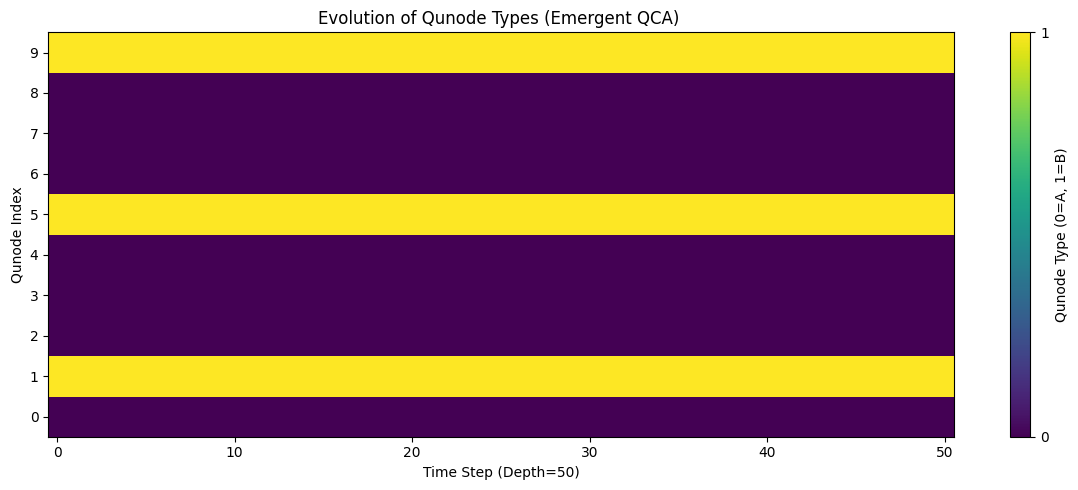


--- Example Interaction Circuit (from first step) ---
     ┌───┐ init_plus ┌─────────┐                                                                ┌─────────┐
q_0: ┤ H ├─────░─────┤0        ├────────────────────────────────────────────────────────────────┤1        ├
     ├───┤     ░     │  RZZ_AB │┌─────────┐                                                     │         │
q_1: ┤ H ├─────░─────┤1        ├┤0        ├─────────────────────────────────────────────────────┤         ├
     ├───┤     ░     └─────────┘│  RZZ_AB │                                                     │         │
q_2: ┤ H ├─────░────────────────┤1        ├──■──────────────────────────────────────────────────┤         ├
     ├───┤     ░                └─────────┘┌─┴─┐                                                │         │
q_3: ┤ H ├─────░───────────────────────────┤ X ├──■─────────────────────────────────────────────┤         ├
     ├───┤     ░                           └───┘┌─┴─┐┌─────────┐                 

In [7]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, Operator # partial_trace, entropy removed as not used in this version
import matplotlib.pyplot as plt
import time # For unique circuit names if needed, not strictly used in this version

# --- Parameters ---
N_QUNODES = 10       # Number of quantum information units (qunodes) on the 1D lattice
DEPTH = 50         # Number of CA evolution steps (time steps)

# Qunode Types (Classical Labels)
TYPE_A = 0
TYPE_B = 1

# --- Interaction Unitaries (2-qubit examples) ---
# These will act on pairs of qunodes based on their types.
# Make sure these are defined using qiskit.circuit.library for proper Operator conversion
U_AA_gate = qiskit.circuit.library.CXGate()
U_BB_gate = qiskit.circuit.library.CZGate()
ab_qc_gate = QuantumCircuit(2, name="RZZ_AB")
ab_qc_gate.rzz(np.pi / 3, 0, 1) # A slightly stronger RZZ interaction
U_AB_gate = ab_qc_gate # This is an instruction, can be converted to Operator if needed or appended directly

# If you want to use them as Operator objects (optional, append can take Instructions)
# U_AA = Operator(U_AA_gate)
# U_BB = Operator(U_BB_gate)
# U_AB = Operator(U_AB_gate)


class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 u_aa, u_bb, u_ab, # Pass gate objects or instructions
                 threshold_A_to_B: float = 0.55,
                 threshold_B_to_A: float = 0.45):
        self.num_qunodes = num_qunodes
        if len(initial_types) != num_qunodes:
            raise ValueError("Length of initial_types must match num_qunodes.")

        self.current_types = initial_types.copy()
        self.type_history = [self.current_types.copy()]

        self.u_aa = u_aa
        self.u_bb = u_bb
        self.u_ab = u_ab

        self.threshold_A_to_B = threshold_A_to_B
        self.threshold_B_to_A = threshold_B_to_A

        self.simulator = AerSimulator(method='statevector')
        self.circuit_visualization_list = [] # To store one circuit for visualization

    def _build_interaction_circuit(self) -> QuantumCircuit:
        """Builds the quantum circuit for one step of interactions based on current types."""
        qc_step = QuantumCircuit(self.num_qunodes, name=f"QCA_step_interaction")

        # 1. Initialize all qunodes to |+> state
        for i in range(self.num_qunodes):
            qc_step.h(i)
        if self.num_qunodes > 0: qc_step.barrier(label="init_plus")

        # 2. Apply type-dependent 2-qubit interactions between neighbors
        # Assuming periodic boundary for interactions (qunode N-1 interacts with qunode 0)
        for i in range(self.num_qunodes):
            q_i_idx = i
            q_j_idx = (i + 1) % self.num_qunodes # Neighbor with periodic boundary

            # Ensure interaction is only applied once per pair if symmetric (e.g. i < q_j_idx for non-periodic)
            # For periodic, each qubit interacts with its "right" neighbor.
            # For a more standard 1D CA interaction, we might only do i and i+1 up to N-2

            q_i_type = self.current_types[q_i_idx]
            q_j_type = self.current_types[q_j_idx]

            op_to_apply = None
            op_name = "" # For potential print statements

            if q_i_type == TYPE_A and q_j_type == TYPE_A: op_to_apply,op_name = self.u_aa, "U_AA"
            elif q_i_type == TYPE_B and q_j_type == TYPE_B: op_to_apply,op_name = self.u_bb, "U_BB"
            elif (q_i_type == TYPE_A and q_j_type == TYPE_B) or \
                 (q_i_type == TYPE_B and q_j_type == TYPE_A): op_to_apply,op_name = self.u_ab, "U_AB"

            if op_to_apply:
                # print(f"  Applying {op_name} between Qubit {q_i_idx} and Qubit {q_j_idx}")
                qc_step.append(op_to_apply, [q_i_idx, q_j_idx])

            # Optional: Barrier after each interaction pair for visualization
            # if self.num_qunodes > 1: qc_step.barrier()
            # Simplified: one barrier after all interactions in a type of layer

        return qc_step

    def step(self):
        """Performs one step of the Quantum Cellular Automaton evolution."""
        interaction_qc = self._build_interaction_circuit()
        if not self.circuit_visualization_list : # Store first one
             self.circuit_visualization_list.append(interaction_qc.copy())


        # Simulate to get the final statevector
        final_statevector_obj = Statevector(interaction_qc)

        # Extract marginal probabilities P(q_i = 1)
        quantum_outcomes_p1 = np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):
            # Statevector.probabilities([q_idx]) returns [P(0), P(1)] for that qubit
            probs_qi = final_statevector_obj.probabilities([i])
            quantum_outcomes_p1[i] = probs_qi[1] if len(probs_qi) == 2 else 0.0

        # Apply classical type update rule
        new_types = self.current_types.copy()
        for i in range(self.num_qunodes):
            current_type_i = self.current_types[i]
            p1_i = quantum_outcomes_p1[i]

            if current_type_i == TYPE_A and p1_i > self.threshold_A_to_B:
                new_types[i] = TYPE_B
            elif current_type_i == TYPE_B and p1_i < self.threshold_B_to_A:
                new_types[i] = TYPE_A

        self.current_types = new_types
        self.type_history.append(self.current_types.copy())
        return quantum_outcomes_p1 # Return for potential logging

    def run(self, num_steps: int):
        """Runs the QCA for a given number of steps."""
        print("Initial Types:", self.current_types)
        for step_num in range(num_steps):
            print(f"\n--- QCA Step {step_num + 1}/{num_steps} ---")
            outcomes = self.step()
            print(f"  Outcomes P(1): {np.round(outcomes, 2)}")
            print(f"  New Types:     {self.current_types}")
        print("\n--- QCA Simulation Complete ---")

    def get_type_history_as_array(self) -> np.ndarray:
        return np.array(self.type_history)

    def plot_type_evolution(self, title_suffix=""):
        history_arr = self.get_type_history_as_array()
        plt.figure(figsize=(12, max(4, self.num_qunodes // 2)))
        plt.imshow(history_arr.T, cmap='viridis', aspect='auto', interpolation='nearest', origin='lower')
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})")
        plt.ylabel("Qunode Index")
        plt.title(f"Evolution of Qunode Types (Emergent QCA) {title_suffix}")
        plt.colorbar(label="Qunode Type (0=A, 1=B)", ticks=[TYPE_A, TYPE_B])
        plt.yticks(np.arange(self.num_qunodes))
        plt.tight_layout()
        plt.show()

    def visualize_example_interaction_circuit(self):
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (from first step) ---")
            circuit_to_draw = self.circuit_visualization_list[0]
            try:
                # For Jupyter display if available
                from IPython.display import display
                display(circuit_to_draw.draw(output='mpl', fold=-1, initial_state=True))
            except ImportError:
                print(circuit_to_draw.draw(output='text', fold=-1))
        else:
            print("No interaction circuit stored for visualization (run at least one step).")


# --- Main Execution ---
if __name__ == "__main__":
    np.random.seed(42) # For reproducible initial types
    initial_qunode_types = np.random.choice([TYPE_A, TYPE_B], size=N_QUNODES)
    # Or define a specific pattern:
    # initial_qunode_types = np.array([TYPE_A, TYPE_B, TYPE_A, TYPE_B, TYPE_A, TYPE_B, TYPE_A, TYPE_B, TYPE_A, TYPE_B])


    qca = QuantumCellularAutomaton(
        num_qunodes=N_QUNODES,
        initial_types=initial_qunode_types,
        u_aa=U_AA_gate, # Pass the gate/instruction
        u_bb=U_BB_gate,
        u_ab=U_AB_gate,
        threshold_A_to_B=0.52, # Slightly adjusted thresholds
        threshold_B_to_A=0.48
    )

    qca.run(DEPTH)
    qca.plot_type_evolution()
    qca.visualize_example_interaction_circuit()

    print("\n--- Script Complete ---")



===== Running Experiment: Exp1_CX_CZ_RZZ_HadamardInit_SimpleThresh =====
Initial Types: [0 1 0 0 0 1 0 0]

--- QCA Step 1/30 ---
  P(1):[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:[0 1 0 0 0 1 0 0]

--- QCA Step 2/30 ---
  P(1):[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:[0 1 0 0 0 1 0 0]

--- QCA Step 3/30 ---
  P(1):[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:[0 1 0 0 0 1 0 0]

--- QCA Step 4/30 ---
  P(1):[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:[0 1 0 0 0 1 0 0]

--- QCA Step 5/30 ---
  P(1):[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:[0 1 0 0 0 1 0 0]

--- QCA Step 6/30 ---
  P(1):[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:[0 1 0 0 0 1 0 0]

--- QCA Step 7/30 ---
  P(1):[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:[0 1 0 0 0 1 0 0]

--- QCA Step 8/30 ---
  P(1):[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:[0 1 0 0 0 1 0 0]

--- QCA Step 9/30 ---
  P(1):[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
  New Types:[0 1 0 0 0 1 0 0]

--- QCA Step 10/30 ---
  P(1):[0.5 0.5 0.5 0.

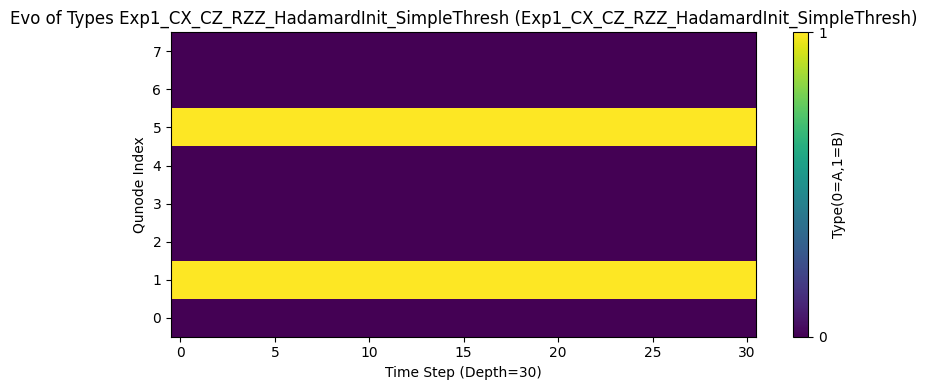

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
     ┌───┐ init_state                                                        ┌───┐ interactions 
q_0: ┤ H ├─────░───────■─────────────────────────────────────────────────────┤ X ├──────░───────
     ├───┤     ░       │ZZ(π/4)                                              └─┬─┘      ░       
q_1: ┤ H ├─────░───────■─────────■─────────────────────────────────────────────┼────────░───────
     ├───┤     ░                 │ZZ(π/4)                                      │        ░       
q_2: ┤ H ├─────░─────────────────■──────────■──────────────────────────────────┼────────░───────
     ├───┤     ░                          ┌─┴─┐                                │        ░       
q_3: ┤ H ├─────░──────────────────────────┤ X ├──■─────────────────────────────┼────────░───────
     ├───┤     ░                          └───┘┌─┴─┐                          

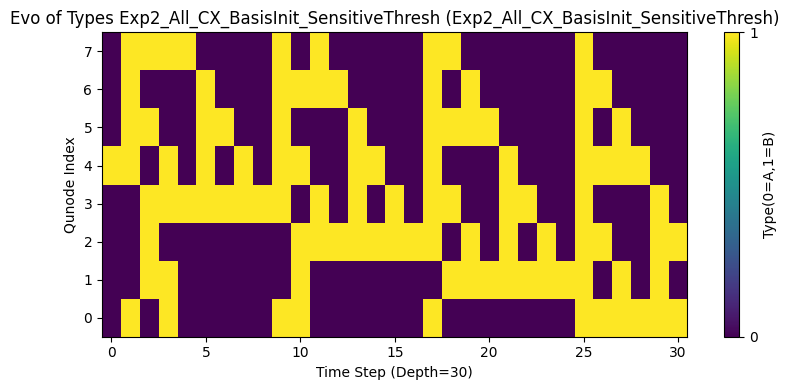

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
           init_state                                    ┌───┐ interactions 
q_0: ──────────░────────■────────────────────────────────┤ X ├──────░───────
               ░      ┌─┴─┐                              └─┬─┘      ░       
q_1: ──────────░──────┤ X ├──■─────────────────────────────┼────────░───────
               ░      └───┘┌─┴─┐                           │        ░       
q_2: ──────────░───────────┤ X ├──■────────────────────────┼────────░───────
               ░           └───┘┌─┴─┐                      │        ░       
q_3: ──────────░────────────────┤ X ├──■───────────────────┼────────░───────
     ┌───┐     ░                └───┘┌─┴─┐                 │        ░       
q_4: ┤ X ├─────░─────────────────────┤ X ├──■──────────────┼────────░───────
     └───┘     ░                     └───┘┌─┴─┐            │        ░       
q_5: ──

In [7]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict # CORRECTED: Dict imported

# --- Parameters ---
N_QUNODES_DEFAULT = 8
DEPTH_DEFAULT = 30

# Qunode Types (Classical Labels)
TYPE_A = 0
TYPE_B = 1

# --- Standard Gate Objects (Instructions) ---
GATES = {
    "H": HGate(), "X": XGate(), "I": IGate(), "CX": CXGate(), "CZ": CZGate(),
    "SWAP": SwapGate(), "RZZ_PIO4": RZZGate(np.pi/4), "RXX_PIO4": RXXGate(np.pi/4),
    "RYY_PIO4": RYYGate(np.pi/4),
}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict,
                 type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"
                ):
        self.num_qunodes = num_qunodes
        if len(initial_types) != num_qunodes: raise ValueError("initial_types length mismatch.")
        self.current_types = initial_types.copy()
        self.type_history = [self.current_types.copy()]
        self.quantum_outcome_history = []
        self.interaction_config = interaction_config
        self.type_update_rule_config = type_update_rule_config
        self.initial_quantum_state_prep = initial_quantum_state_prep
        self.simulator = AerSimulator(method='statevector')
        self.circuit_visualization_list = []

    def _get_interaction_unitary(self, type1, type2):
        if type1 == TYPE_A and type2 == TYPE_A: return self.interaction_config.get("AA", GATES["I"])
        if type1 == TYPE_B and type2 == TYPE_B: return self.interaction_config.get("BB", GATES["I"])
        if (type1 == TYPE_A and type2 == TYPE_B) or \
           (type1 == TYPE_B and type2 == TYPE_A): return self.interaction_config.get("AB", GATES["I"])
        return GATES["I"]

    def _build_interaction_circuit(self) -> QuantumCircuit:
        qc_step = QuantumCircuit(self.num_qunodes, name=f"QCA_step_interaction")
        if self.initial_quantum_state_prep == "hadamard_all": [qc_step.h(i) for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep == "basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i] == TYPE_B: qc_step.x(i)
        # else "zero_all" is default
        if self.num_qunodes > 0: qc_step.barrier(label="init_state")
        interaction_applied = False
        for i in range(self.num_qunodes):
            q_j_idx = (i + 1) % self.num_qunodes
            op_to_apply = self._get_interaction_unitary(self.current_types[i], self.current_types[q_j_idx])
            if op_to_apply is not None and op_to_apply.name != 'id':
                qc_step.append(op_to_apply, [i, q_j_idx]); interaction_applied = True
        if interaction_applied and self.num_qunodes > 1 : qc_step.barrier(label="interactions")
        return qc_step

    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy(); rule_params = self.type_update_rule_config
        for i in range(self.num_qunodes):
            my_p1 = quantum_outcomes_p1[i]
            if self.current_types[i] == TYPE_A and my_p1 > rule_params.get("thresh_A_to_B", 0.55): new_types[i] = TYPE_B
            elif self.current_types[i] == TYPE_B and my_p1 < rule_params.get("thresh_B_to_A", 0.45): new_types[i] = TYPE_A
        return new_types

    def step(self):
        interaction_qc = self._build_interaction_circuit()
        if not self.circuit_visualization_list : self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj = Statevector(interaction_qc)
        quantum_outcomes_p1 = np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):
            probs_qi = final_statevector_obj.probabilities([i])
            quantum_outcomes_p1[i] = probs_qi[1] if len(probs_qi) == 2 else 0.0
        self.quantum_outcome_history.append(quantum_outcomes_p1.copy())
        new_types = self._apply_type_update_rule(quantum_outcomes_p1)
        self.current_types = new_types
        self.type_history.append(self.current_types.copy())
        return quantum_outcomes_p1

    def run(self, num_steps: int, verbose: bool = False):
        if verbose: print("Initial Types:", self.current_types)
        for step_num in range(num_steps):
            outcomes = self.step()
            if verbose: print(f"\n--- QCA Step {step_num+1}/{num_steps} ---\n  P(1):{np.round(outcomes,2)}\n  New Types:{self.current_types}")
        if verbose: print("\n--- QCA Sim Complete ---")

    def get_type_history_as_array(self) -> np.ndarray: return np.array(self.type_history)
    def plot_type_evolution(self, title_suffix="", experiment_label=""):
        history_arr=self.get_type_history_as_array(); plt.figure(figsize=(max(8,history_arr.shape[0]//5),max(4,self.num_qunodes//2)))
        plt.imshow(history_arr.T,cmap='viridis',aspect='auto',interpolation='nearest',origin='lower'); plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})")
        plt.ylabel("Qunode Index");plt.title(f"Evo of Types {experiment_label}{title_suffix}");plt.colorbar(label="Type(0=A,1=B)",ticks=[TYPE_A,TYPE_B]);plt.yticks(np.arange(self.num_qunodes));plt.tight_layout();plt.show()
    def visualize_example_interaction_circuit(self):
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try: from IPython.display import display; display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError: print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else: print("No interaction circuit stored.")

# --- Main Execution ---
if __name__ == "__main__":
    output_base_dir = "qca_explorations_output" # Changed dir name
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    experiments_to_run = [
        {
            "label": "Exp1_CX_CZ_RZZ_HadamardInit_SimpleThresh", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "random", "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": {"AA": GATES["CX"], "BB": GATES["CZ"], "AB": GATES["RZZ_PIO4"]},
            "type_update_rule_config": {"name": "simple_threshold", "thresh_A_to_B": 0.55, "thresh_B_to_A": 0.45}
        },
        {
            "label": "Exp2_All_CX_BasisInit_SensitiveThresh", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "seed_A", "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA": GATES["CX"], "BB": GATES["CX"], "AB": GATES["CX"]},
            "type_update_rule_config": {"name": "simple_threshold", "thresh_A_to_B": 0.501, "thresh_B_to_A": 0.499}
        },
        # Add more experiments here
    ]

    for exp_config in experiments_to_run:
        print(f"\n\n===== Running Experiment: {exp_config['label']} =====")
        np.random.seed(42)
        n_q = exp_config["n_qunodes"]
        if exp_config["initial_types_pattern"] == "random": initial_types = np.random.choice([TYPE_A, TYPE_B], size=n_q)
        elif exp_config["initial_types_pattern"] == "alternating": initial_types = np.array([TYPE_A if i%2==0 else TYPE_B for i in range(n_q)])
        elif exp_config["initial_types_pattern"] == "seed_A": initial_types = np.full(n_q,TYPE_A,dtype=int); initial_types[n_q//2 if n_q>0 else 0]=TYPE_B
        elif exp_config["initial_types_pattern"] == "seed_B": initial_types = np.full(n_q,TYPE_B,dtype=int); initial_types[n_q//2 if n_q>0 else 0]=TYPE_A
        else: initial_types = np.random.choice([TYPE_A, TYPE_B], size=n_q)

        qca = QuantumCellularAutomaton(
            num_qunodes=n_q, initial_types=initial_types,
            interaction_config=exp_config["interaction_config"],
            type_update_rule_config=exp_config["type_update_rule_config"],
            initial_quantum_state_prep=exp_config["initial_quantum_state_prep"]
        )
        qca.run(exp_config["depth"], verbose=True) # Set verbose=True for detailed step output

        plot_title = f" ({exp_config['label']})"
        qca.plot_type_evolution(title_suffix=plot_title, experiment_label=exp_config['label'])

        if qca.circuit_visualization_list:
            circuit_fn = os.path.join(output_base_dir, f"interaction_circuit_{exp_config['label']}.png")
            try:
                qca.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True,filename=circuit_fn)
                print(f"Interaction circuit saved to {circuit_fn}")
            except Exception as e_draw: print(f"Circuit plot save fail:{e_draw}. Text:\n{qca.circuit_visualization_list[0].draw(output='text',fold=-1)}")
        history_fn = os.path.join(output_base_dir, f"type_history_{exp_config['label']}.npy")
        np.save(history_fn, qca.get_type_history_as_array()); print(f"Type history saved to {history_fn}")
    print("\n--- All Configured Experiments Complete ---")



===== Running Expanded Experiment: Exp2Long_N9_D100 =====
N_Qunodes: 9, Depth: 100
Initial Types: seed_A
Initial Quantum Prep: basis_from_type
Interactions: {'AA': Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), 'BB': Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), 'AB': Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])}
Type Update: {'name': 'simple_threshold', 'thresh_A_to_B': 0.501, 'thresh_B_to_A': 0.499}


QCA Steps: 100%|██████████| 100/100 [00:00<00:00, 172.22it/s]


QCA run for Exp2Long_N9_D100 took 0.59 seconds.


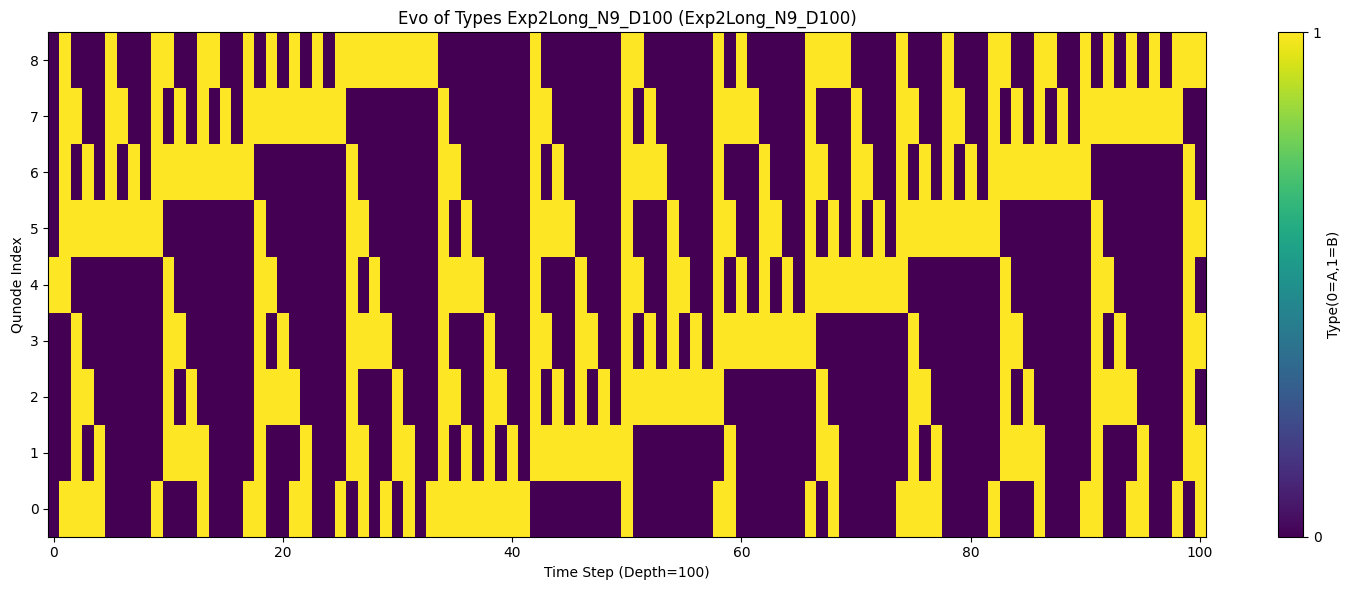

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.".
Type history saved to qca_long_run_exp2/type_history_Exp2Long_N9_D100.npy
Quantum outcome history saved to qca_long_run_exp2/quantum_outcomes_P1_Exp2Long_N9_D100.npy

--- Experiment Exp2Long_N9_D100 Complete ---


In [15]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict

# --- Parameters for this specific run ---
# These will define the "Exp2-like" configuration
N_QUNODES_EXP = 9      # Increased number of qunodes
DEPTH_EXP = 100         # Significantly increased depth
INITIAL_TYPES_PATTERN_EXP = "seed_A" # One B in a sea of A's
INITIAL_QUANTUM_STATE_PREP_EXP = "basis_from_type" # |0> for A, |1> for B
INTERACTION_CONFIG_EXP = {"AA": GATES["CX"], "BB": GATES["CX"], "AB": GATES["CX"]} # All CX
TYPE_UPDATE_CONFIG_EXP = {"name": "simple_threshold", "thresh_A_to_B": 0.501, "thresh_B_to_A": 0.499} # Sensitive
EXPERIMENT_LABEL = f"Exp2Long_N{N_QUNODES_EXP}_D{DEPTH_EXP}"

# Qunode Types (Classical Labels)
TYPE_A = 0
TYPE_B = 1

# --- Standard Gate Objects (Instructions) ---
GATES = {
    "H": HGate(), "X": XGate(), "I": IGate(), "CX": CXGate(), "CZ": CZGate(),
    "SWAP": SwapGate(), "RZZ_PIO4": RZZGate(np.pi/4), "RXX_PIO4": RXXGate(np.pi/4),
    "RYY_PIO4": RYYGate(np.pi/4),
} # Add more gates if needed for other experiments

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict,
                 type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"
                ):
        self.num_qunodes = num_qunodes
        if len(initial_types) != num_qunodes: raise ValueError("initial_types length mismatch.")
        self.current_types = initial_types.copy()
        self.type_history = [self.current_types.copy()]
        self.quantum_outcome_history = [] # To store P(1) for each qunode at each step
        self.interaction_config = interaction_config
        self.type_update_rule_config = type_update_rule_config
        self.initial_quantum_state_prep = initial_quantum_state_prep
        self.simulator = AerSimulator(method='statevector')
        self.circuit_visualization_list = [] # To store one example circuit

    def _get_interaction_unitary(self, type1, type2):
        if type1 == TYPE_A and type2 == TYPE_A: return self.interaction_config.get("AA", GATES["I"])
        if type1 == TYPE_B and type2 == TYPE_B: return self.interaction_config.get("BB", GATES["I"])
        if (type1 == TYPE_A and type2 == TYPE_B) or \
           (type1 == TYPE_B and type2 == TYPE_A): return self.interaction_config.get("AB", GATES["I"])
        return GATES["I"]

    def _build_interaction_circuit(self) -> QuantumCircuit:
        qc_step = QuantumCircuit(self.num_qunodes, name=f"QCA_step_interaction")
        if self.initial_quantum_state_prep == "hadamard_all": [qc_step.h(i) for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep == "basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i] == TYPE_B: qc_step.x(i)
        # else "zero_all" is default (qubits start in |0>)
        if self.num_qunodes > 0: qc_step.barrier(label="init_state")
        interaction_applied = False
        for i in range(self.num_qunodes):
            q_j_idx = (i + 1) % self.num_qunodes # Periodic boundary neighbor
            op_to_apply = self._get_interaction_unitary(self.current_types[i], self.current_types[q_j_idx])
            if op_to_apply is not None and op_to_apply.name != 'id': # Don't append Identity if it's the placeholder
                qc_step.append(op_to_apply, [i, q_j_idx]); interaction_applied = True
        if interaction_applied and self.num_qunodes > 1 : qc_step.barrier(label="interactions")
        return qc_step

    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy(); rule_params = self.type_update_rule_config
        # Example Rule: Thresholding (as before)
        for i in range(self.num_qunodes):
            my_p1 = quantum_outcomes_p1[i]
            if self.current_types[i] == TYPE_A and my_p1 > rule_params.get("thresh_A_to_B", 0.55): new_types[i] = TYPE_B
            elif self.current_types[i] == TYPE_B and my_p1 < rule_params.get("thresh_B_to_A", 0.45): new_types[i] = TYPE_A
        return new_types

    def step(self):
        interaction_qc = self._build_interaction_circuit()
        if not self.circuit_visualization_list : self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj = Statevector(interaction_qc) # Simulate
        quantum_outcomes_p1 = np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):
            probs_qi = final_statevector_obj.probabilities([i])
            quantum_outcomes_p1[i] = probs_qi[1] if len(probs_qi) == 2 else 0.0
        self.quantum_outcome_history.append(quantum_outcomes_p1.copy())
        new_types = self._apply_type_update_rule(quantum_outcomes_p1)
        self.current_types = new_types
        self.type_history.append(self.current_types.copy())
        return quantum_outcomes_p1

    def run(self, num_steps: int, verbose: bool = False):
        if verbose: print("Initial Types:", self.current_types)
        # Use tqdm for progress bar if available, otherwise simple print
        try:
            from tqdm import tqdm
            step_iterator = tqdm(range(num_steps), desc="QCA Steps")
        except ImportError:
            step_iterator = range(num_steps)
            print("tqdm not found, using simple print for progress.")

        for step_num in step_iterator:
            outcomes = self.step()
            if verbose:
                print(f"\n--- QCA Step {step_num+1}/{num_steps} ---\n  P(1):{np.round(outcomes,2)}\n  New Types:{self.current_types}")
            elif not isinstance(step_iterator, range) : # if tqdm is used
                 pass # tqdm handles progress
            elif (step_num + 1) % (max(1, num_steps // 10)) == 0 or step_num == num_steps -1 : # print progress occasionally
                print(f"  QCA Step {step_num + 1}/{num_steps} completed...")
        if not isinstance(step_iterator, range): step_iterator.close()
        if verbose or isinstance(step_iterator, range): print("\n--- QCA Simulation Complete ---")


    def get_type_history_as_array(self) -> np.ndarray: return np.array(self.type_history)
    def plot_type_evolution(self, title_suffix="", experiment_label=""):
        history_arr=self.get_type_history_as_array();
        # Adjust figsize based on depth and number of qunodes for better visibility
        fig_width = max(10, history_arr.shape[0] * 0.15)
        fig_height = max(6, self.num_qunodes * 0.5)
        plt.figure(figsize=(fig_width, fig_height))
        plt.imshow(history_arr.T,cmap='viridis',aspect='auto',interpolation='nearest',origin='lower');
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})")
        plt.ylabel("Qunode Index");plt.title(f"Evo of Types {experiment_label}{title_suffix}");
        plt.colorbar(label="Type(0=A,1=B)",ticks=[TYPE_A,TYPE_B]);plt.yticks(np.arange(self.num_qunodes));plt.tight_layout();plt.show()
    def visualize_example_interaction_circuit(self):
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try: from IPython.display import display; display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError: print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else: print("No interaction circuit stored.")

# --- Main Execution ---
if __name__ == "__main__":
    output_base_dir = "qca_long_run_exp2" # New directory for this specific run
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    # --- Configuration for the Expanded Exp2 ---
    exp_config = {
        "label": EXPERIMENT_LABEL, # Uses global EXPERIMENT_LABEL
        "n_qunodes": N_QUNODES_EXP,
        "depth": DEPTH_EXP,
        "initial_types_pattern": INITIAL_TYPES_PATTERN_EXP,
        "initial_quantum_state_prep": INITIAL_QUANTUM_STATE_PREP_EXP,
        "interaction_config": INTERACTION_CONFIG_EXP,
        "type_update_rule_config": TYPE_UPDATE_CONFIG_EXP
    }

    print(f"\n\n===== Running Expanded Experiment: {exp_config['label']} =====")
    print(f"N_Qunodes: {exp_config['n_qunodes']}, Depth: {exp_config['depth']}")
    print(f"Initial Types: {exp_config['initial_types_pattern']}")
    print(f"Initial Quantum Prep: {exp_config['initial_quantum_state_prep']}")
    print(f"Interactions: {exp_config['interaction_config']}")
    print(f"Type Update: {exp_config['type_update_rule_config']}")

    np.random.seed(42) # Ensure initial type pattern is reproducible if "random"

    n_q = exp_config["n_qunodes"]
    if exp_config["initial_types_pattern"] == "random": initial_types = np.random.choice([TYPE_A, TYPE_B], size=n_q)
    elif exp_config["initial_types_pattern"] == "alternating": initial_types = np.array([TYPE_A if i%2==0 else TYPE_B for i in range(n_q)])
    elif exp_config["initial_types_pattern"] == "seed_A": initial_types = np.full(n_q,TYPE_A,dtype=int); initial_types[n_q//2 if n_q>0 else 0]=TYPE_B
    elif exp_config["initial_types_pattern"] == "seed_B": initial_types = np.full(n_q,TYPE_B,dtype=int); initial_types[n_q//2 if n_q>0 else 0]=TYPE_A
    else: initial_types = np.random.choice([TYPE_A, TYPE_B], size=n_q)

    qca = QuantumCellularAutomaton(
        num_qunodes=n_q, initial_types=initial_types,
        interaction_config=exp_config["interaction_config"],
        type_update_rule_config=exp_config["type_update_rule_config"],
        initial_quantum_state_prep=exp_config["initial_quantum_state_prep"]
    )

    run_start_time = time.time()
    qca.run(exp_config["depth"], verbose=False) # Set verbose=False for long runs
    run_end_time = time.time()
    print(f"QCA run for {exp_config['label']} took {run_end_time - run_start_time:.2f} seconds.")

    plot_title = f" ({exp_config['label']})"
    qca.plot_type_evolution(title_suffix=plot_title, experiment_label=exp_config['label'])

    if qca.circuit_visualization_list:
        circuit_fn = os.path.join(output_base_dir, f"interaction_circuit_{exp_config['label']}.png")
        try:
            qca.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True,filename=circuit_fn)
            print(f"Interaction circuit saved to {circuit_fn}")
        except Exception as e_draw: print(f"Circuit plot save fail:{e_draw}.")

    history_fn = os.path.join(output_base_dir, f"type_history_{exp_config['label']}.npy")
    np.save(history_fn, qca.get_type_history_as_array()); print(f"Type history saved to {history_fn}")

    # Save quantum outcome history too
    outcome_hist_fn = os.path.join(output_base_dir, f"quantum_outcomes_P1_{exp_config['label']}.npy")
    np.save(outcome_hist_fn, np.array(qca.quantum_outcome_history)); print(f"Quantum outcome history saved to {outcome_hist_fn}")

    print(f"\n--- Experiment {exp_config['label']} Complete ---")



===== Running Experiment: Exp2_Baseline_All_CX_BasisInit_SensitiveThresh =====


QCA Steps (12Q): 100%|██████████| 60/60 [00:00<00:00, 163.97it/s]


QCA run for Exp2_Baseline_All_CX_BasisInit_SensitiveThresh took 0.37s.


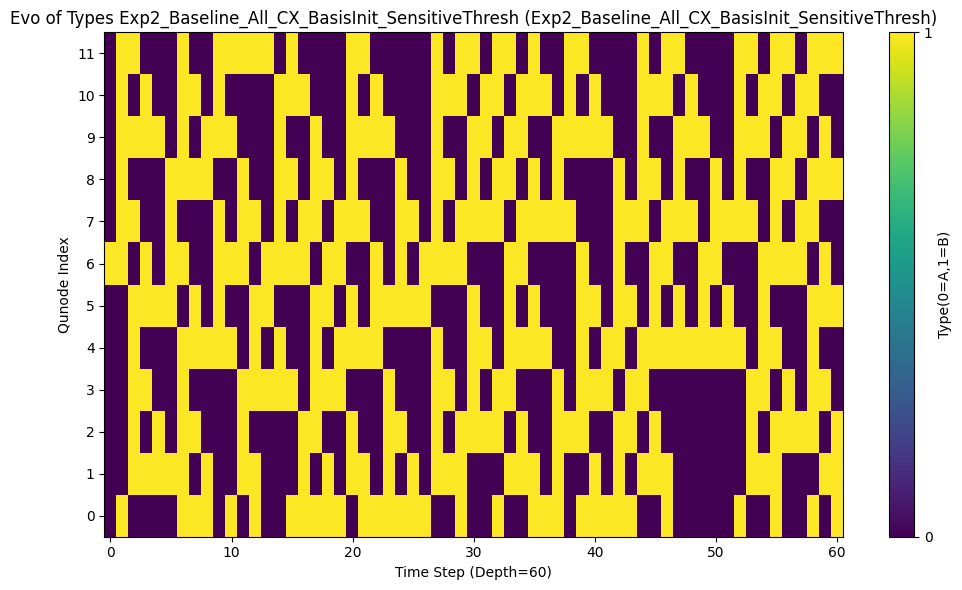

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
            init_state                                                        ┌───┐ interactions 
 q_0: ──────────░────────■────────────────────────────────────────────────────┤ X ├──────░───────
                ░      ┌─┴─┐                                                  └─┬─┘      ░       
 q_1: ──────────░──────┤ X ├──■─────────────────────────────────────────────────┼────────░───────
                ░      └───┘┌─┴─┐                                               │        ░       
 q_2: ──────────░───────────┤ X ├──■────────────────────────────────────────────┼────────░───────
                ░           └───┘┌─┴─┐                                          │        ░       
 q_3: ──────────░────────────────┤ X ├──■───────────────────────────────────────┼────────░───────
                ░                └───┘┌─┴─┐                           

QCA Steps (12Q): 100%|██████████| 60/60 [00:00<00:00, 151.60it/s]


QCA run for Exp_SWAP_Interactions_HadamardInit took 0.40s.


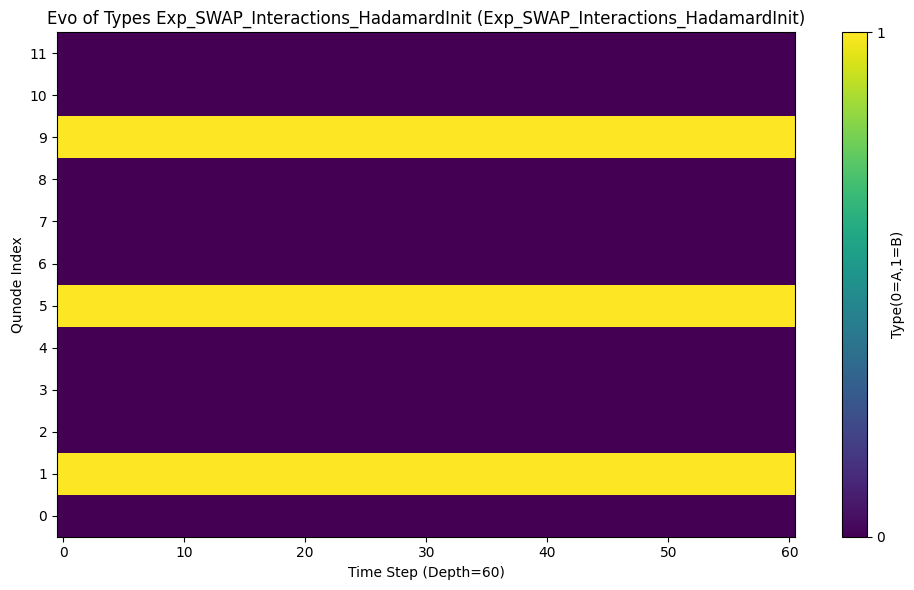

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
      ┌───┐ init_state                                      interactions 
 q_0: ┤ H ├─────░───────X────────────────────────────────X───────░───────
      ├───┤     ░       │                                │       ░       
 q_1: ┤ H ├─────░───────X──X─────────────────────────────┼───────░───────
      ├───┤     ░          │                             │       ░       
 q_2: ┤ H ├─────░──────────X──X──────────────────────────┼───────░───────
      ├───┤     ░             │                          │       ░       
 q_3: ┤ H ├─────░─────────────X──X───────────────────────┼───────░───────
      ├───┤     ░                │                       │       ░       
 q_4: ┤ H ├─────░────────────────X──X────────────────────┼───────░───────
      ├───┤     ░                   │                    │       ░       
 q_5: ┤ H ├─────░───────────────────X──X

QCA Steps (12Q): 100%|██████████| 60/60 [00:00<00:00, 251.57it/s]


QCA run for Exp_MixedGates_BasisInit_StdThresh took 0.24s.


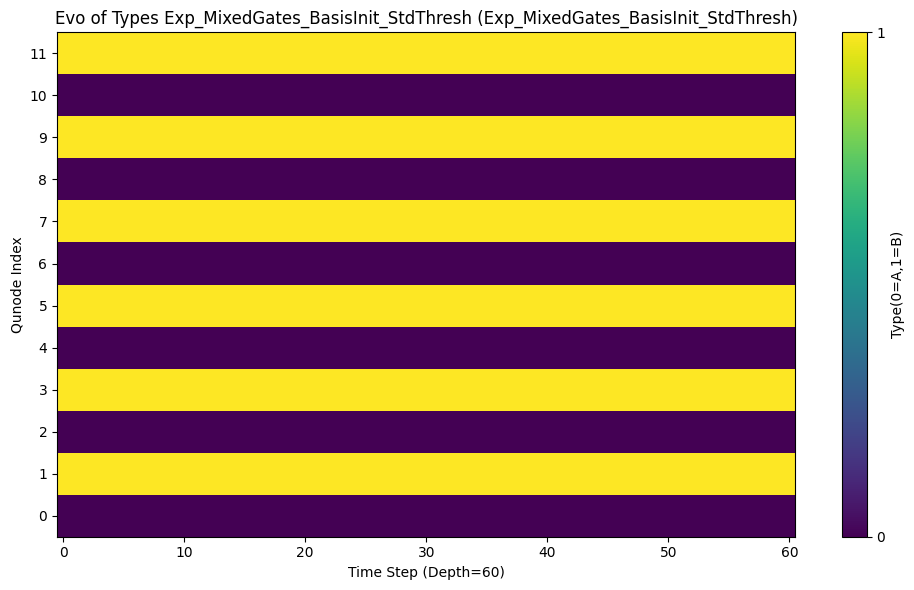

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
            init_state                                                                                                                          interactions 
 q_0: ──────────░───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────■──────────────░───────
      ┌───┐     ░       │ZZ(π/2)                                                                                                      │              ░       
 q_1: ┤ X ├─────░───────■─────────■───────────────────────────────────────────────────────────────────────────────────────────────────┼──────────────░───────
      └───┘     ░                 │ZZ(π/2)                                                                                            │              ░       
 q_2: ──────────░─────────────────■─────────■───────────────────

QCA Steps (12Q): 100%|██████████| 60/60 [00:00<00:00, 211.86it/s]


QCA run for Exp_NeighborInfluenceRule_HadamardInit took 0.29s.


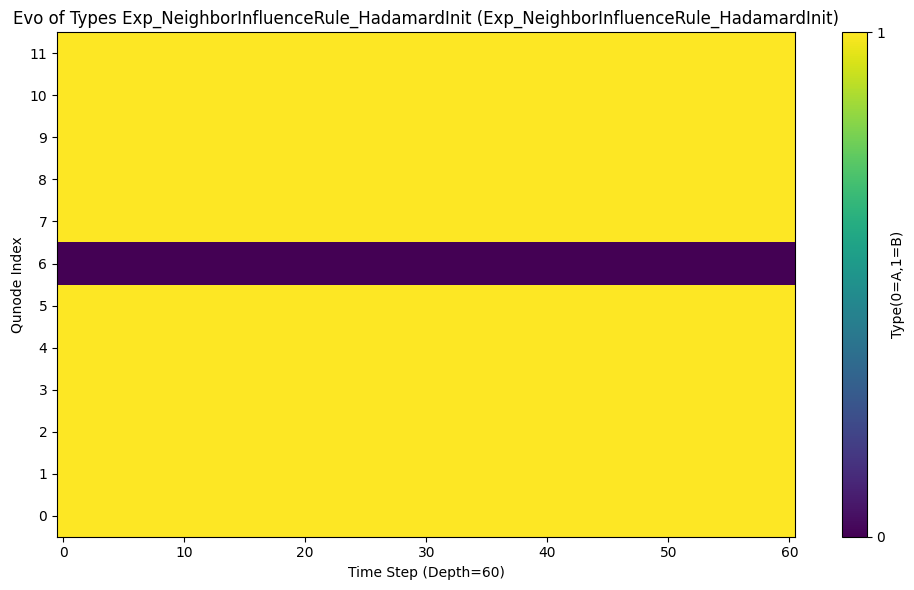

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
      ┌───┐ init_state ┌───────────┐                                                                                                                            ┌───────────┐ interactions 
 q_0: ┤ H ├─────░──────┤0          ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1          ├──────░───────
      ├───┤     ░      │  Ryy(π/4) │┌───────────┐                                                                                                               │           │      ░       
 q_1: ┤ H ├─────░──────┤1          ├┤0          ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────┤           ├──────░───────
      ├───┤     ░      └───────────┘│  Ryy(π/4) │┌───────────┐                                        

QCA Steps (12Q): 100%|██████████| 60/60 [00:00<00:00, 218.78it/s]


QCA run for Exp_BasisInit_CZ_vs_CX_SensitiveThresh took 0.28s.


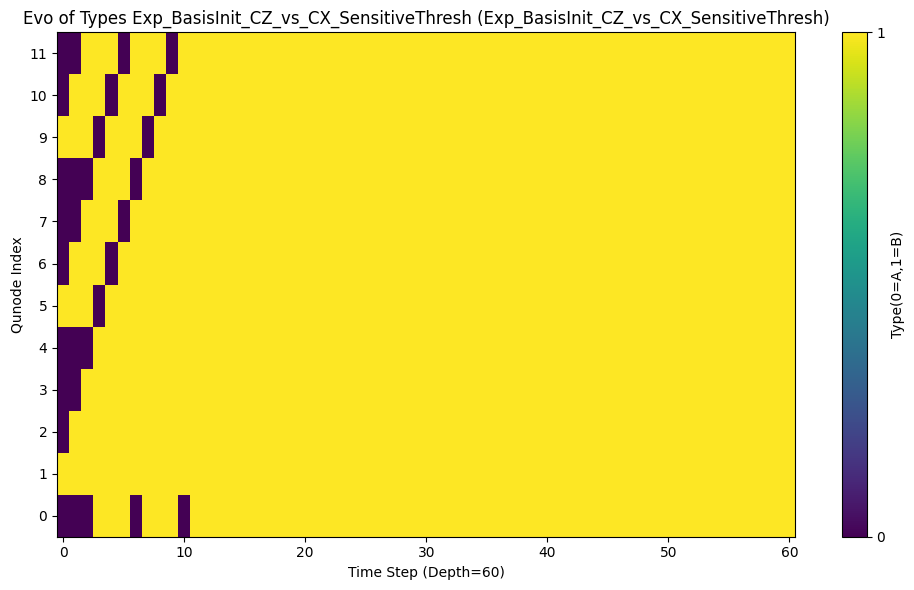

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
            init_state                                                  interactions 
 q_0: ──────────░────────■───────────────────────────────────────────■───────░───────
      ┌───┐     ░      ┌─┴─┐                                         │       ░       
 q_1: ┤ X ├─────░──────┤ X ├──■──────────────────────────────────────┼───────░───────
      └───┘     ░      └───┘┌─┴─┐                                    │       ░       
 q_2: ──────────░───────────┤ X ├─■──────────────────────────────────┼───────░───────
                ░           └───┘ │                                  │       ░       
 q_3: ──────────░─────────────────■──■───────────────────────────────┼───────░───────
                ░                    │                               │       ░       
 q_4: ──────────░────────────────────■───■───────────────────────────┼───────░──

QCA Steps (12Q): 100%|██████████| 60/60 [00:00<00:00, 292.76it/s]


QCA run for Exp_MixedInit_CX_CZ_RZZ_SensitiveThresh took 0.21s.


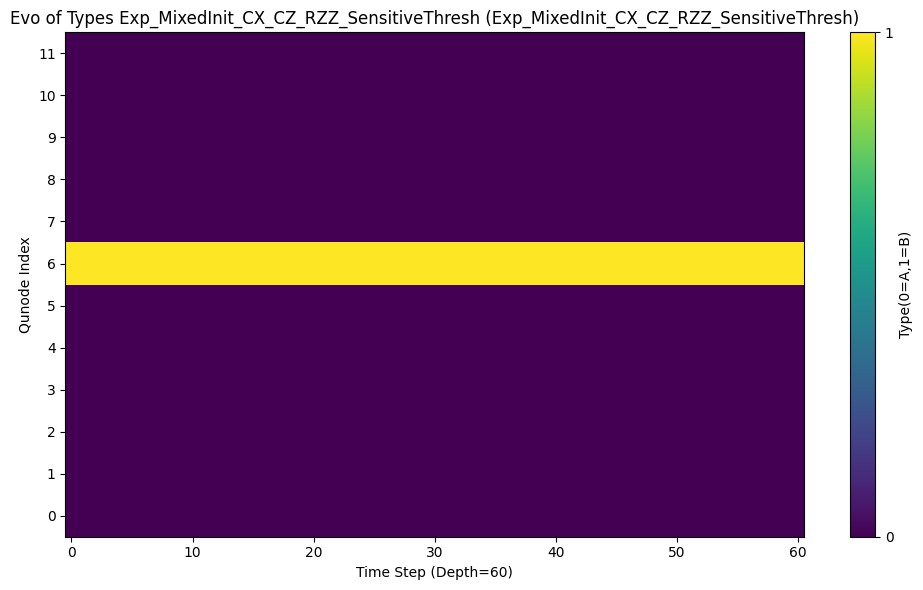

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
            init_state                                                                  ┌───┐ interactions 
 q_0: ──────────░────────■──────────────────────────────────────────────────────────────┤ X ├──────░───────
                ░      ┌─┴─┐                                                            └─┬─┘      ░       
 q_1: ──────────░──────┤ X ├──■───────────────────────────────────────────────────────────┼────────░───────
                ░      └───┘┌─┴─┐                                                         │        ░       
 q_2: ──────────░───────────┤ X ├──■──────────────────────────────────────────────────────┼────────░───────
                ░           └───┘┌─┴─┐                                                    │        ░       
 q_3: ──────────░────────────────┤ X ├──■─────────────────────────────────────────────────┼───────

In [16]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate, SGate, TGate
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm # For progress bar

# --- Parameters ---
N_QUNODES_DEFAULT = 10 # Default for new experiments
DEPTH_DEFAULT = 50   # Default for new experiments

# Qunode Types (Classical Labels)
TYPE_A = 0
TYPE_B = 1

# --- Standard Gate Objects (Instructions) ---
GATES = {
    "H": HGate(), "X": XGate(), "I": IGate(), "S": SGate(), "T": TGate(),
    "CX": CXGate(), "CZ": CZGate(), "SWAP": SwapGate(),
    "RZZ_PIO4": RZZGate(np.pi/4), "RZZ_PIO2": RZZGate(np.pi/2), # Stronger RZZ
    "RXX_PIO4": RXXGate(np.pi/4), "RYY_PIO4": RYYGate(np.pi/4),
}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict,
                 type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"
                ):
        self.num_qunodes = num_qunodes
        if len(initial_types) != num_qunodes: raise ValueError("initial_types length mismatch.")
        self.current_types = initial_types.copy()
        self.type_history = [self.current_types.copy()]
        self.quantum_outcome_history = []
        self.interaction_config = interaction_config
        self.type_update_rule_config = type_update_rule_config
        self.initial_quantum_state_prep = initial_quantum_state_prep
        self.simulator = AerSimulator(method='statevector')
        self.circuit_visualization_list = []

    def _get_interaction_unitary(self, type1, type2):
        key = tuple(sorted((type1, type2))) # Ensures (A,B) and (B,A) use the same AB rule
        if key == (TYPE_A, TYPE_A): return self.interaction_config.get("AA", GATES["I"])
        if key == (TYPE_B, TYPE_B): return self.interaction_config.get("BB", GATES["I"])
        if key == (TYPE_A, TYPE_B): return self.interaction_config.get("AB", GATES["I"])
        return GATES["I"] # Should not happen with 2 types

    def _build_interaction_circuit(self) -> QuantumCircuit:
        qc_step = QuantumCircuit(self.num_qunodes, name=f"QCA_step_interaction")
        if self.initial_quantum_state_prep == "hadamard_all": [qc_step.h(i) for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep == "basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i] == TYPE_B: qc_step.x(i)
        elif self.initial_quantum_state_prep == "mixed_A0_BH": # Type A starts |0>, Type B starts |+>
             for i in range(self.num_qunodes):
                if self.current_types[i] == TYPE_B: qc_step.h(i)
        # else "zero_all" is default
        if self.num_qunodes > 0: qc_step.barrier(label="init_state")
        interaction_applied = False
        # Apply interactions to all unique pairs (i, i+1) with periodic boundary
        for i in range(self.num_qunodes):
            q_j_idx = (i + 1) % self.num_qunodes
            op_to_apply = self._get_interaction_unitary(self.current_types[i], self.current_types[q_j_idx])
            if op_to_apply is not None and op_to_apply.name.lower() != 'id': # Check name for identity
                qc_step.append(op_to_apply, [i, q_j_idx]); interaction_applied = True
        if interaction_applied and self.num_qunodes > 1 : qc_step.barrier(label="interactions")
        return qc_step

    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy(); rule_params = self.type_update_rule_config
        rule_name = rule_params.get("name", "simple_threshold")

        if rule_name == "simple_threshold":
            for i in range(self.num_qunodes):
                my_p1 = quantum_outcomes_p1[i]
                if self.current_types[i] == TYPE_A and my_p1 > rule_params.get("thresh_A_to_B", 0.55): new_types[i] = TYPE_B
                elif self.current_types[i] == TYPE_B and my_p1 < rule_params.get("thresh_B_to_A", 0.45): new_types[i] = TYPE_A

        elif rule_name == "neighbor_influence_threshold":
            # Example: Flip if own P1 is extreme OR if neighbors of other type have extreme P1s
            for i in range(self.num_qunodes):
                my_p1 = quantum_outcomes_p1[i]
                left_idx = (i - 1 + self.num_qunodes) % self.num_qunodes
                right_idx = (i + 1) % self.num_qunodes
                left_p1 = quantum_outcomes_p1[left_idx]
                right_p1 = quantum_outcomes_p1[right_idx]
                left_type = self.current_types[left_idx]
                right_type = self.current_types[right_idx]

                if self.current_types[i] == TYPE_A:
                    # Flip to B if self is very |1>-like OR if B neighbors are very |0>-like (less intuitive for this rule)
                    if my_p1 > rule_params.get("thresh_A_to_B_self", 0.6): new_types[i] = TYPE_B
                    elif (left_type == TYPE_B and left_p1 < rule_params.get("thresh_B_neighbor_influence", 0.4)) or \
                         (right_type == TYPE_B and right_p1 < rule_params.get("thresh_B_neighbor_influence", 0.4)):
                        if np.random.rand() < rule_params.get("prob_neighbor_flip", 0.1): # Probabilistic flip
                             new_types[i] = TYPE_B
                elif self.current_types[i] == TYPE_B:
                    if my_p1 < rule_params.get("thresh_B_to_A_self", 0.4): new_types[i] = TYPE_A
                    elif (left_type == TYPE_A and left_p1 > rule_params.get("thresh_A_neighbor_influence", 0.6)) or \
                         (right_type == TYPE_A and right_p1 > rule_params.get("thresh_A_neighbor_influence", 0.6)):
                        if np.random.rand() < rule_params.get("prob_neighbor_flip", 0.1):
                             new_types[i] = TYPE_A
        # Add more rules here based on rule_name
        return new_types

    def step(self): # ... (Identical to previous, calls _apply_type_update_rule)
        interaction_qc=self._build_interaction_circuit()
        if not self.circuit_visualization_list:self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj=Statevector(interaction_qc)
        quantum_outcomes_p1=np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):probs_qi=final_statevector_obj.probabilities([i]);quantum_outcomes_p1[i]=probs_qi[1]if len(probs_qi)==2 else 0.0
        self.quantum_outcome_history.append(quantum_outcomes_p1.copy())
        new_types=self._apply_type_update_rule(quantum_outcomes_p1)
        self.current_types=new_types;self.type_history.append(self.current_types.copy())
        return quantum_outcomes_p1

    def run(self, num_steps: int, verbose: bool = False): # ... (Identical, uses tqdm if available)
        if verbose:print("Initial Types:",self.current_types)
        try:it_range=tqdm(range(num_steps),desc=f"QCA Steps ({self.num_qunodes}Q)")
        except ImportError:it_range=range(num_steps);print("tqdm not found, using simple print.")
        for sn in it_range:
            o=self.step()
            if verbose:print(f"\n--- QCA St {sn+1}/{num_steps} ---\n P(1):{np.round(o,2)}\n NewTy:{self.current_types}")
            elif not isinstance(it_range,range):pass
            elif(sn+1)%(max(1,num_steps//10))==0 or sn==num_steps-1:print(f" QCA St {sn+1}/{num_steps} done...")
        if not isinstance(it_range,range):it_range.close()
        if verbose or isinstance(it_range,range):print("\n--- QCA Sim Complete ---")

    def get_type_history_as_array(self): return np.array(self.type_history) # Identical
    def plot_type_evolution(self,title_suffix="",experiment_label=""): # Identical
        h_arr=self.get_type_history_as_array();fig_w=max(10,h_arr.shape[0]*0.15);fig_h=max(6,self.num_qunodes*0.5)
        plt.figure(figsize=(fig_w,fig_h));plt.imshow(h_arr.T,cmap='viridis',aspect='auto',interpolation='nearest',origin='lower')
        plt.xlabel(f"Time Step (Depth={h_arr.shape[0]-1})");plt.ylabel("Qunode Index");plt.title(f"Evo of Types {experiment_label}{title_suffix}")
        plt.colorbar(label="Type(0=A,1=B)",ticks=[TYPE_A,TYPE_B]);plt.yticks(np.arange(self.num_qunodes));plt.tight_layout();plt.show()
    def visualize_example_interaction_circuit(self): # Identical
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- Main Execution ---
if __name__ == "__main__":
    output_base_dir = "qca_multi_rule_explorations"
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    # --- Define Multiple Experiment Configurations ---
    experiments_to_run = [
        { # Same as Exp2 previously, for baseline
            "label": "Exp2_Baseline_All_CX_BasisInit_SensitiveThresh", "n_qunodes": 12, "depth": 60, # Reduced N for faster multi-run
            "initial_types_pattern": "seed_A", "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA": GATES["CX"], "BB": GATES["CX"], "AB": GATES["CX"]},
            "type_update_rule_config": {"name": "simple_threshold", "thresh_A_to_B": 0.501, "thresh_B_to_A": 0.499}
        },
        { # Try SWAP interactions
            "label": "Exp_SWAP_Interactions_HadamardInit", "n_qunodes": 12, "depth": 60,
            "initial_types_pattern": "random", "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": {"AA": GATES["SWAP"], "BB": GATES["SWAP"], "AB": GATES["SWAP"]}, # All SWAP
            "type_update_rule_config": {"name": "simple_threshold", "thresh_A_to_B": 0.55, "thresh_B_to_A": 0.45}
        },
        { # Different interactions for AA, BB, AB with basis_from_type init
            "label": "Exp_MixedGates_BasisInit_StdThresh", "n_qunodes": 12, "depth": 60,
            "initial_types_pattern": "alternating", "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA": GATES["CX"], "BB": GATES["CZ"], "AB": GATES["RZZ_PIO2"]}, # RZZ(pi/2)
            "type_update_rule_config": {"name": "simple_threshold", "thresh_A_to_B": 0.6, "thresh_B_to_A": 0.4} # Wider thresholds
        },
        { # Using the new "neighbor_influence_threshold" rule (example)
            "label": "Exp_NeighborInfluenceRule_HadamardInit", "n_qunodes": 12, "depth": 60,
            "initial_types_pattern": "seed_B", "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": {"AA": GATES["RXX_PIO4"], "BB": GATES["RYY_PIO4"], "AB": GATES["RZZ_PIO4"]},
            "type_update_rule_config": {
                "name": "neighbor_influence_threshold",
                "thresh_A_to_B_self": 0.65, "thresh_B_to_A_self": 0.35,
                "thresh_B_neighbor_influence": 0.3, "thresh_A_neighbor_influence": 0.7, # Example thresholds
                "prob_neighbor_flip": 0.25 # Chance to flip based on neighbor influence
            }
        },
        { # Another variant with basis_from_type and specific interactions
            "label": "Exp_BasisInit_CZ_vs_CX_SensitiveThresh", "n_qunodes": 12, "depth": 60,
            "initial_types_pattern": "random", "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA": GATES["CZ"], "BB": GATES["CZ"], "AB": GATES["CX"]}, # AB is different
            "type_update_rule_config": {"name": "simple_threshold", "thresh_A_to_B": 0.501, "thresh_B_to_A": 0.499}
        },
        { # Exploring a different initial quantum state prep
            "label": "Exp_MixedInit_CX_CZ_RZZ_SensitiveThresh", "n_qunodes": 12, "depth": 60,
            "initial_types_pattern": "seed_A", "initial_quantum_state_prep": "mixed_A0_BH", # Type A=|0>, Type B=|+>
            "interaction_config": {"AA": GATES["CX"], "BB": GATES["CZ"], "AB": GATES["RZZ_PIO4"]},
            "type_update_rule_config": {"name": "simple_threshold", "thresh_A_to_B": 0.51, "thresh_B_to_A": 0.49}
        },
    ]

    for exp_config in experiments_to_run: # ... (Loop for running experiments - identical to previous) ...
        print(f"\n\n===== Running Experiment: {exp_config['label']} ====="); np.random.seed(42)
        n_q=exp_config["n_qunodes"]
        if exp_config["initial_types_pattern"]=="random":initial_types=np.random.choice([TYPE_A,TYPE_B],size=n_q)
        elif exp_config["initial_types_pattern"]=="alternating":initial_types=np.array([TYPE_A if i%2==0 else TYPE_B for i in range(n_q)])
        elif exp_config["initial_types_pattern"]=="seed_A":initial_types=np.full(n_q,TYPE_A,dtype=int);initial_types[n_q//2 if n_q>0 else 0]=TYPE_B
        elif exp_config["initial_types_pattern"]=="seed_B":initial_types=np.full(n_q,TYPE_B,dtype=int);initial_types[n_q//2 if n_q>0 else 0]=TYPE_A
        else:initial_types=np.random.choice([TYPE_A,TYPE_B],size=n_q)
        qca=QuantumCellularAutomaton(num_qunodes=n_q,initial_types=initial_types,interaction_config=exp_config["interaction_config"],type_update_rule_config=exp_config["type_update_rule_config"],initial_quantum_state_prep=exp_config["initial_quantum_state_prep"])
        run_st_tm=time.time(); qca.run(exp_config["depth"],verbose=False); run_end_tm=time.time()
        print(f"QCA run for {exp_config['label']} took {run_end_tm-run_st_tm:.2f}s.")
        plot_title=f" ({exp_config['label']})"; qca.plot_type_evolution(title_suffix=plot_title,experiment_label=exp_config['label'])
        if qca.circuit_visualization_list:
            circ_fn=os.path.join(output_base_dir,f"interaction_circuit_{exp_config['label']}.png")
            try:qca.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True,filename=circ_fn);print(f"Circuit saved to {circ_fn}")
            except Exception as e_draw:print(f"Circuit plot save fail:{e_draw}. Text:\n{qca.circuit_visualization_list[0].draw(output='text',fold=-1)}")
        hist_fn=os.path.join(output_base_dir,f"type_history_{exp_config['label']}.npy");np.save(hist_fn,qca.get_type_history_as_array());print(f"Type history saved to {hist_fn}")
        out_hist_fn=os.path.join(output_base_dir,f"quantum_outcomes_P1_{exp_config['label']}.npy");np.save(out_hist_fn,np.array(qca.quantum_outcome_history));print(f"Quantum outcome history saved to {out_hist_fn}")
    print("\n--- All Configured Experiments Complete ---")



===== Running Experiment: Exp3Type_SimpleInteractions_SeedA =====


QCA Steps (10Q): 100%|██████████| 40/40 [00:00<00:00, 463.84it/s]

QCA run for Exp3Type_SimpleInteractions_SeedA took 0.09s.



<ipython-input-19-fc7af00d227e>:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 3) # Get 3 distinct colors


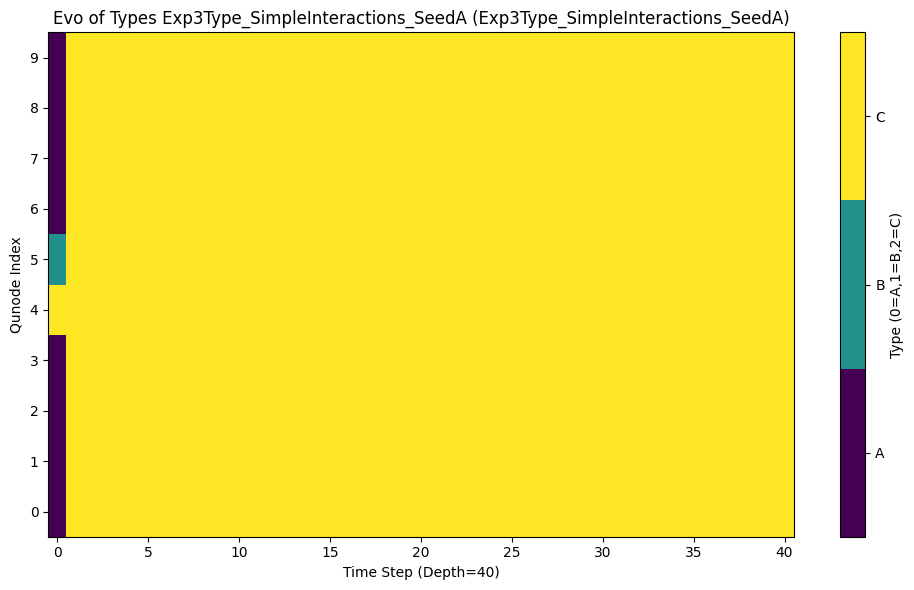

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
           init_state                                                 ┌───┐ interactions 
q_0: ──────────░────────■─────────────────────────────────────────────┤ X ├──────░───────
               ░      ┌─┴─┐                                           └─┬─┘      ░       
q_1: ──────────░──────┤ X ├──■──────────────────────────────────────────┼────────░───────
               ░      └───┘┌─┴─┐                                        │        ░       
q_2: ──────────░───────────┤ X ├──■─────────────────────────────────────┼────────░───────
               ░           └───┘┌─┴─┐                                   │        ░       
q_3: ──────────░────────────────┤ X ├──■────────────────────────────────┼────────░───────
               ░                └───┘┌─┴─┐                              │        ░       
q_4: ──────────░─────────────────────┤ X ├─■

QCA Steps (10Q): 100%|██████████| 40/40 [00:00<00:00, 288.99it/s]

QCA run for Exp3Type_AllCX_Hadamard_Sensitive took 0.14s.



<ipython-input-19-fc7af00d227e>:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', 3) # Get 3 distinct colors


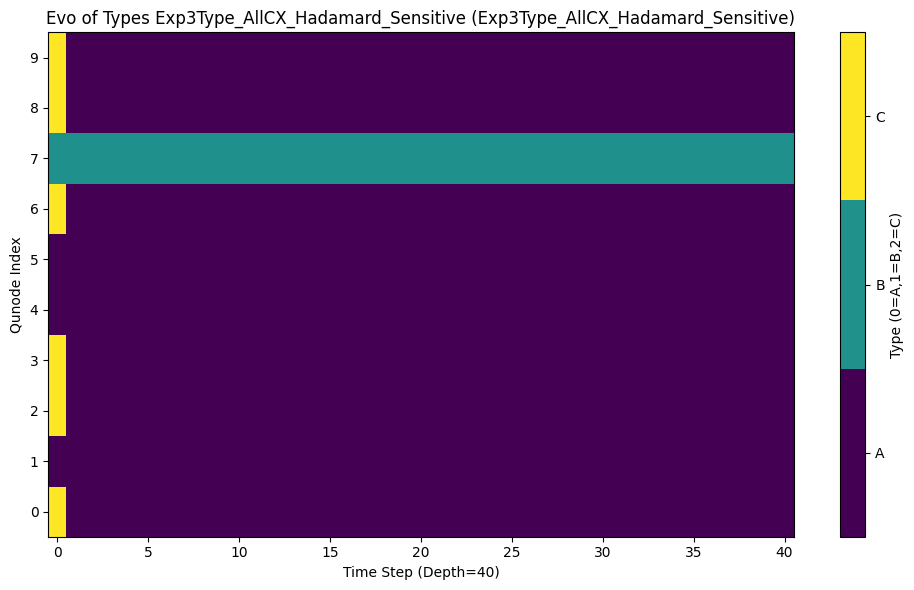

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
     ┌───┐ init_state                                              ┌───┐ interactions 
q_0: ┤ H ├─────░────────■──────────────────────────────────────────┤ X ├──────░───────
     ├───┤     ░      ┌─┴─┐                                        └─┬─┘      ░       
q_1: ┤ H ├─────░──────┤ X ├──■───────────────────────────────────────┼────────░───────
     ├───┤     ░      └───┘┌─┴─┐                                     │        ░       
q_2: ┤ H ├─────░───────────┤ X ├──■──────────────────────────────────┼────────░───────
     ├───┤     ░           └───┘┌─┴─┐                                │        ░       
q_3: ┤ H ├─────░────────────────┤ X ├──■─────────────────────────────┼────────░───────
     ├───┤     ░                └───┘┌─┴─┐                           │        ░       
q_4: ┤ H ├─────░─────────────────────┤ X ├──■────────────────────────┼─

In [19]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate, SGate, TGate, CCXGate # Added CCX
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm

# --- Parameters ---
N_QUNODES_DEFAULT = 10
DEPTH_DEFAULT = 40 # Reduced depth for faster multi-rule tests with 3 types

# Qunode Types (Classical Labels)
TYPE_A = 0
TYPE_B = 1
TYPE_C = 2 # New Type C

# --- Standard Gate Objects (Instructions) ---
GATES = {
    "H": HGate(), "X": XGate(), "I": IGate(), "S": SGate(), "T": TGate(),
    "CX": CXGate(), "CZ": CZGate(), "SWAP": SwapGate(), "CCX": CCXGate(), # Added Toffoli
    "RZZ_PIO4": RZZGate(np.pi/4), "RZZ_PIO2": RZZGate(np.pi/2),
    "RXX_PIO4": RXXGate(np.pi/4), "RYY_PIO4": RYYGate(np.pi/4),
}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict,
                 type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"
                ):
        self.num_qunodes = num_qunodes
        if len(initial_types) != num_qunodes: raise ValueError("initial_types length mismatch.")
        self.current_types = initial_types.copy()
        self.type_history = [self.current_types.copy()]
        self.quantum_outcome_history = []
        self.interaction_config = interaction_config
        self.type_update_rule_config = type_update_rule_config
        self.initial_quantum_state_prep = initial_quantum_state_prep
        self.simulator = AerSimulator(method='statevector')
        self.circuit_visualization_list = []

    def _get_interaction_unitary(self, type1, type2):
        # Ensure consistent key order for symmetric interactions
        key_tuple = tuple(sorted((type1, type2)))

        if key_tuple == (TYPE_A, TYPE_A): return self.interaction_config.get("AA", GATES["I"])
        if key_tuple == (TYPE_B, TYPE_B): return self.interaction_config.get("BB", GATES["I"])
        if key_tuple == (TYPE_C, TYPE_C): return self.interaction_config.get("CC", GATES["I"]) # New
        if key_tuple == (TYPE_A, TYPE_B): return self.interaction_config.get("AB", GATES["I"])
        if key_tuple == (TYPE_A, TYPE_C): return self.interaction_config.get("AC", GATES["I"]) # New
        if key_tuple == (TYPE_B, TYPE_C): return self.interaction_config.get("BC", GATES["I"]) # New
        return GATES["I"]

    def _build_interaction_circuit(self) -> QuantumCircuit: # Mostly same, uses _get_interaction_unitary
        qc_step = QuantumCircuit(self.num_qunodes, name=f"QCA_step_interaction")
        if self.initial_quantum_state_prep == "hadamard_all": [qc_step.h(i) for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep == "basis_from_type":
            for i in range(self.num_qunodes): # Type A=|0>, B=|1>, C=|0> (example)
                if self.current_types[i] == TYPE_B: qc_step.x(i)
                # elif self.current_types[i] == TYPE_C: qc_step.h(i) # Example if C starts as |+>
        elif self.initial_quantum_state_prep == "mixed_A0_BH_CH":
             for i in range(self.num_qunodes):
                if self.current_types[i] == TYPE_B: qc_step.h(i)
                elif self.current_types[i] == TYPE_C: qc_step.h(i); qc_step.x(i) # Example |->
        if self.num_qunodes > 0: qc_step.barrier(label="init_state")
        interaction_applied = False
        for i in range(self.num_qunodes):
            q_j_idx = (i + 1) % self.num_qunodes
            op_to_apply = self._get_interaction_unitary(self.current_types[i], self.current_types[q_j_idx])
            if op_to_apply is not None and op_to_apply.name.lower() != 'id':
                qc_step.append(op_to_apply, [i, q_j_idx]); interaction_applied = True
        if interaction_applied and self.num_qunodes > 1 : qc_step.barrier(label="interactions")
        return qc_step

    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy(); rule_params = self.type_update_rule_config
        rule_name = rule_params.get("name", "simple_threshold_3types") # New default rule name

        if rule_name == "simple_threshold_3types":
            for i in range(self.num_qunodes):
                my_p1 = quantum_outcomes_p1[i]
                current_t = self.current_types[i]
                if current_t == TYPE_A:
                    if my_p1 > rule_params.get("thresh_A_to_B", 0.60): new_types[i] = TYPE_B
                    elif my_p1 < rule_params.get("thresh_A_to_C", 0.20) : new_types[i] = TYPE_C # Example: if very low P(1)
                elif current_t == TYPE_B:
                    if my_p1 < rule_params.get("thresh_B_to_A", 0.40): new_types[i] = TYPE_A
                    elif my_p1 > rule_params.get("thresh_B_to_C", 0.80) : new_types[i] = TYPE_C # Example: if very high P(1)
                elif current_t == TYPE_C: # Rules for Type C to transition
                    if  0.40 < my_p1 < 0.60 : new_types[i] = TYPE_A # Example: if P(1) is balanced, go to A
                    # Add more C -> A or C -> B rules
        # elif rule_name == "your_more_complex_3type_rule":
            # ... implement more complex logic involving neighbors ...
        return new_types

    def step(self): # ... (Identical)
        interaction_qc=self._build_interaction_circuit()
        if not self.circuit_visualization_list:self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj=Statevector(interaction_qc)
        quantum_outcomes_p1=np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):probs_qi=final_statevector_obj.probabilities([i]);quantum_outcomes_p1[i]=probs_qi[1]if len(probs_qi)==2 else 0.0
        self.quantum_outcome_history.append(quantum_outcomes_p1.copy())
        new_types=self._apply_type_update_rule(quantum_outcomes_p1)
        self.current_types=new_types;self.type_history.append(self.current_types.copy())
        return quantum_outcomes_p1
    def run(self, num_steps: int, verbose: bool = False): # ... (Identical)
        if verbose:print("Initial Types:",self.current_types)
        try:it_range=tqdm(range(num_steps),desc=f"QCA Steps ({self.num_qunodes}Q)")
        except ImportError:it_range=range(num_steps);print("tqdm not found, using simple print.")
        for sn in it_range:
            o=self.step()
            if verbose:print(f"\n--- QCA St {sn+1}/{num_steps} ---\n  P(1):{np.round(o,2)}\n  NewTy:{self.current_types}")
            elif not isinstance(it_range,range):pass
            elif(sn+1)%(max(1,num_steps//10))==0 or sn==num_steps-1:print(f"  QCA St {sn+1}/{num_steps} done...")
        if not isinstance(it_range,range):it_range.close()
        if verbose or isinstance(it_range,range):print("\n--- QCA Sim Complete ---")
    def get_type_history_as_array(self): return np.array(self.type_history) # Identical
    def plot_type_evolution(self, title_suffix="", experiment_label=""): # Modified for 3 types
        history_arr=self.get_type_history_as_array();fig_w=max(10,history_arr.shape[0]*0.15);fig_h=max(6,self.num_qunodes*0.5)
        plt.figure(figsize=(fig_w,fig_h));
        # Use a colormap that distinguishes 3 types well, ensure vmin/vmax cover all types
        cmap = plt.cm.get_cmap('viridis', 3) # Get 3 distinct colors
        plt.imshow(history_arr.T,cmap=cmap,aspect='auto',interpolation='nearest',origin='lower', vmin=-0.5, vmax=2.5)
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})")
        plt.ylabel("Qunode Index");plt.title(f"Evo of Types {experiment_label}{title_suffix}");
        cbar = plt.colorbar(label="Type (0=A,1=B,2=C)",ticks=[TYPE_A,TYPE_B,TYPE_C]);
        cbar.ax.set_yticklabels(['A', 'B', 'C']) # Label ticks
        plt.yticks(np.arange(self.num_qunodes));plt.tight_layout();plt.show()
    def visualize_example_interaction_circuit(self): # Identical
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- Main Execution ---
if __name__ == "__main__":
    output_base_dir = "qca_3type_explorations"
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    experiments_to_run = [
        {
            "label": "Exp3Type_SimpleInteractions_SeedA",
            "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "seed_A_with_C", # e.g. A A A C B A A A
            "initial_quantum_state_prep": "basis_from_type", # A=|0>, B=|1>, C=|0> (example)
            "interaction_config": { # Need rules for CC, AC, BC
                "AA": GATES["CX"], "BB": GATES["CZ"], "AB": GATES["RZZ_PIO4"],
                "CC": GATES["SWAP"], # Example for CC
                "AC": GATES["CX"],   # Example for AC (A controls X on C)
                "BC": GATES["CZ"]    # Example for BC (B controls Z on C)
            },
            "type_update_rule_config": {
                "name": "simple_threshold_3types",
                "thresh_A_to_B": 0.60, "thresh_A_to_C": 0.15, # If P1(A) very low, becomes C
                "thresh_B_to_A": 0.40, "thresh_B_to_C": 0.85, # If P1(B) very high, becomes C
                # Add rules for C -> A, C -> B if needed
                # For example, if C is an "excited" state that decays:
                "thresh_C_to_A": 0.5, # If P1(C) is around 0.5 (mixed after H), goes to A
                "prob_C_decay_to_A": 0.2 # Small prob to decay to A each step regardless of P1
            }
        },
        {
            "label": "Exp3Type_AllCX_Hadamard_Sensitive",
            "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "random_ABC", # Random A, B, or C
            "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": { # All interactions are CX
                "AA": GATES["CX"], "BB": GATES["CX"], "CC": GATES["CX"],
                "AB": GATES["CX"], "AC": GATES["CX"], "BC": GATES["CX"]
            },
            "type_update_rule_config": { # Sensitive thresholds
                "name": "simple_threshold_3types",
                "thresh_A_to_B": 0.51, "thresh_A_to_C": 0.10,
                "thresh_B_to_A": 0.49, "thresh_B_to_C": 0.90,
                "thresh_C_to_A": 0.50 # C tends to become A if P1 is balanced
            }
        },
    ]

    for exp_config in experiments_to_run:
        print(f"\n\n===== Running Experiment: {exp_config['label']} ====="); np.random.seed(42)
        n_q=exp_config["n_qunodes"]
        # Prepare initial types for 3 types
        if exp_config["initial_types_pattern"] == "random_ABC": initial_types = np.random.choice([TYPE_A, TYPE_B, TYPE_C], size=n_q)
        elif exp_config["initial_types_pattern"] == "alternating_ABC": initial_types = np.array([ (TYPE_A if i%3==0 else (TYPE_B if i%3==1 else TYPE_C)) for i in range(n_q)])
        elif exp_config["initial_types_pattern"] == "seed_A_with_C":
            initial_types = np.full(n_q,TYPE_A,dtype=int)
            if n_q > 0: initial_types[n_q//2]=TYPE_B
            if n_q > 1: initial_types[n_q//2 -1 ]=TYPE_C # Place C next to B
        else: initial_types = np.random.choice([TYPE_A, TYPE_B, TYPE_C], size=n_q) # Default

        qca = QuantumCellularAutomaton(
            num_qunodes=n_q, initial_types=initial_types,
            interaction_config=exp_config["interaction_config"],
            type_update_rule_config=exp_config["type_update_rule_config"],
            initial_quantum_state_prep=exp_config["initial_quantum_state_prep"]
        )
        run_st_tm=time.time(); qca.run(exp_config["depth"],verbose=False); run_end_tm=time.time() # verbose=False for loops
        print(f"QCA run for {exp_config['label']} took {run_end_tm-run_st_tm:.2f}s.")
        plot_title=f" ({exp_config['label']})"
        qca.plot_type_evolution(title_suffix=plot_title,experiment_label=exp_config['label'])
        if qca.circuit_visualization_list: # ... (Save circuit and history - same as before)
            circ_fn=os.path.join(output_base_dir,f"interaction_circuit_{exp_config['label']}.png")
            try:qca.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True,filename=circ_fn);print(f"Circuit saved to {circ_fn}")
            except Exception as e_draw:print(f"Circuit plot save fail:{e_draw}. Text:\n{qca.circuit_visualization_list[0].draw(output='text',fold=-1)}")
        hist_fn=os.path.join(output_base_dir,f"type_history_{exp_config['label']}.npy");np.save(hist_fn,qca.get_type_history_as_array());print(f"Type history saved to {hist_fn}")
        out_hist_fn=os.path.join(output_base_dir,f"quantum_outcomes_P1_{exp_config['label']}.npy");np.save(out_hist_fn,np.array(qca.quantum_outcome_history));print(f"Quantum outcome history saved to {out_hist_fn}")
    print("\n--- All Configured Experiments Complete ---")



===== Running Experiment: ExpA_3TypeBaseline_AllCX_Basis_Sensitive =====


QCA Steps (10Q): 100%|██████████| 40/40 [00:00<00:00, 377.14it/s]

QCA run for ExpA_3TypeBaseline_AllCX_Basis_Sensitive took 0.11s.



<ipython-input-20-d28e29717056>:187: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', num_distinct_types)


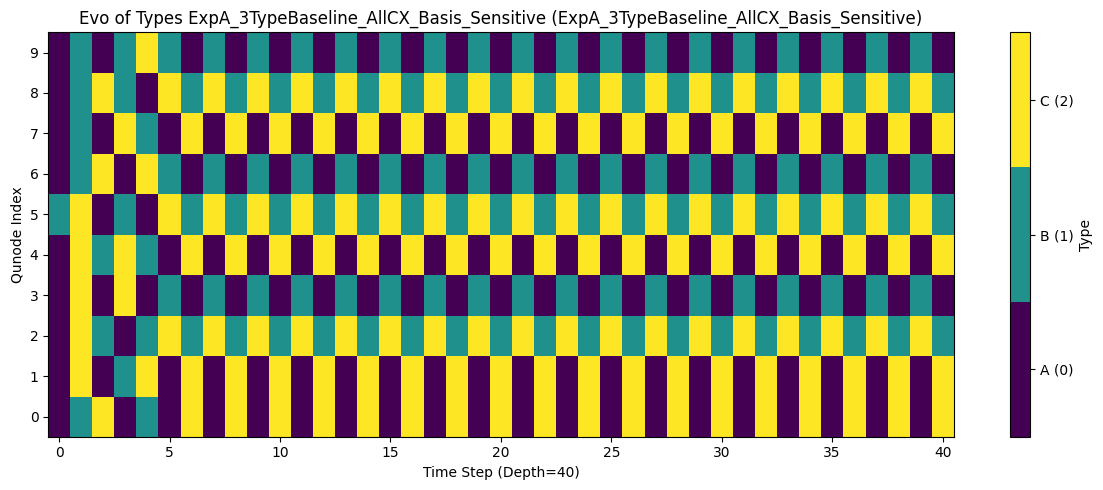

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
           init_state                                              ┌───┐ interactions 
q_0: ──────────░────────■──────────────────────────────────────────┤ X ├──────░───────
               ░      ┌─┴─┐                                        └─┬─┘      ░       
q_1: ──────────░──────┤ X ├──■───────────────────────────────────────┼────────░───────
               ░      └───┘┌─┴─┐                                     │        ░       
q_2: ──────────░───────────┤ X ├──■──────────────────────────────────┼────────░───────
               ░           └───┘┌─┴─┐                                │        ░       
q_3: ──────────░────────────────┤ X ├──■─────────────────────────────┼────────░───────
               ░                └───┘┌─┴─┐                           │        ░       
q_4: ──────────░─────────────────────┤ X ├──■────────────────────────┼─

QCA Steps (10Q): 100%|██████████| 40/40 [00:00<00:00, 216.91it/s]

QCA run for ExpB_ComplexRule_MixedInteractions_Hadamard took 0.19s.



<ipython-input-20-d28e29717056>:187: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', num_distinct_types)


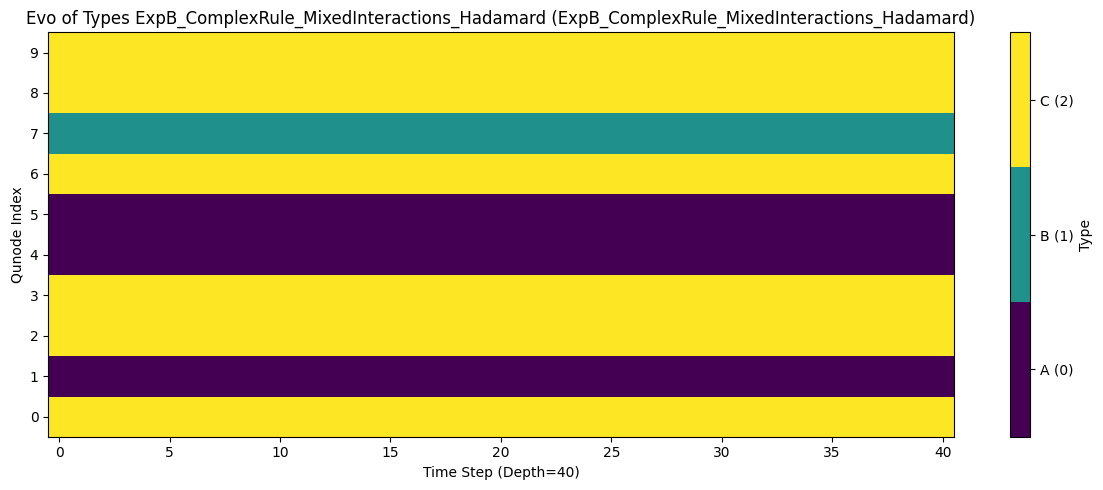

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
     ┌───┐ init_state                                              interactions 
q_0: ┤ H ├─────░───────■────────────────────────────────────────X───────░───────
     ├───┤     ░       │                                        │       ░       
q_1: ┤ H ├─────░───────■──■─────────────────────────────────────┼───────░───────
     ├───┤     ░          │                                     │       ░       
q_2: ┤ H ├─────░──────────■──X──────────────────────────────────┼───────░───────
     ├───┤     ░             │                                  │       ░       
q_3: ┤ H ├─────░─────────────X──■───────────────────────────────┼───────░───────
     ├───┤     ░                │ ┌───────────┐                 │       ░       
q_4: ┤ H ├─────░────────────────■─┤0          ├─────────────────┼───────░───────
     ├───┤     ░                  │  Rxx(π/4

QCA Steps (12Q): 100%|██████████| 50/50 [00:00<00:00, 208.82it/s]
<ipython-input-20-d28e29717056>:187: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', num_distinct_types)


QCA run for ExpC_ComplexRule_Basis_NoHomoInteract took 0.24s.


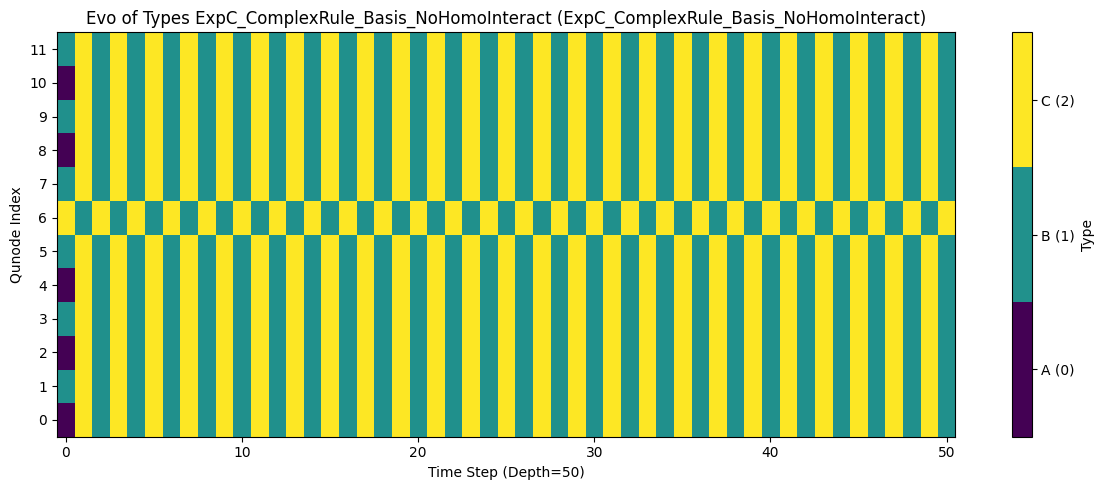

Circuit plot save fail:"The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'.". Text:
            init_state                                                                                                            interactions 
 q_0: ──────────░───────■───────────────────────────────────────────────────────────────────────────────────────────────■──────────────░───────
      ┌───┐     ░       │ZZ(π/2)                                                                                        │              ░       
 q_1: ┤ X ├─────░───────■─────────■─────────────────────────────────────────────────────────────────────────────────────┼──────────────░───────
      └───┘     ░                 │ZZ(π/2)                                                                              │              ░       
 q_2: ──────────░─────────────────■─────────■───────────────────────────────────────────────────────────────────────────┼─────────────

In [20]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate, SGate, TGate, CCXGate # Added CCX
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm # For progress bar, ensure it's installed: pip install tqdm

# --- Parameters ---
N_QUNODES_DEFAULT = 10
DEPTH_DEFAULT = 40   # Default depth for new experiments

# Qunode Types (Classical Labels)
TYPE_A = 0 # Often visually dark/purple
TYPE_B = 1 # Often visually mid-range/green-teal
TYPE_C = 2 # Often visually bright/yellow

# --- Standard Gate Objects (Instructions) ---
GATES = {
    "H": HGate(), "X": XGate(), "I": IGate(), "S": SGate(), "T": TGate(),
    "CX": CXGate(), "CZ": CZGate(), "SWAP": SwapGate(), "CCX": CCXGate(),
    "RZZ_PIO4": RZZGate(np.pi/4), "RZZ_PIO2": RZZGate(np.pi/2), # Stronger RZZ
    "RXX_PIO4": RXXGate(np.pi/4), "RYY_PIO4": RYYGate(np.pi/4),
}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict,
                 type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"
                ):
        self.num_qunodes = num_qunodes
        if len(initial_types) != num_qunodes: raise ValueError("initial_types length mismatch.")
        self.current_types = initial_types.copy()
        self.type_history = [self.current_types.copy()]
        self.quantum_outcome_history = []
        self.interaction_config = interaction_config
        self.type_update_rule_config = type_update_rule_config
        self.initial_quantum_state_prep = initial_quantum_state_prep
        self.simulator = AerSimulator(method='statevector')
        self.circuit_visualization_list = [] # Store one example circuit

    def _get_interaction_unitary(self, type1, type2):
        key_tuple = tuple(sorted((type1, type2))) # e.g. (A,B) -> (0,1); (B,A) -> (0,1)

        if key_tuple == (TYPE_A, TYPE_A): return self.interaction_config.get("AA", GATES["I"])
        if key_tuple == (TYPE_B, TYPE_B): return self.interaction_config.get("BB", GATES["I"])
        if key_tuple == (TYPE_C, TYPE_C): return self.interaction_config.get("CC", GATES["I"])
        if key_tuple == (TYPE_A, TYPE_B): return self.interaction_config.get("AB", GATES["I"])
        if key_tuple == (TYPE_A, TYPE_C): return self.interaction_config.get("AC", GATES["I"])
        if key_tuple == (TYPE_B, TYPE_C): return self.interaction_config.get("BC", GATES["I"])
        return GATES["I"]

    def _build_interaction_circuit(self) -> QuantumCircuit:
        qc_step = QuantumCircuit(self.num_qunodes, name=f"QCA_step_interaction")

        if self.initial_quantum_state_prep == "hadamard_all":
            for i in range(self.num_qunodes): qc_step.h(i)
        elif self.initial_quantum_state_prep == "basis_from_type":
            for i in range(self.num_qunodes): # Type A=|0>, B=|1>, C can be |0> or |1> or |+>
                if self.current_types[i] == TYPE_B: qc_step.x(i)
                elif self.current_types[i] == TYPE_C: qc_step.x(i) # Example: C starts as |1> like B
        elif self.initial_quantum_state_prep == "mixed_A0_BH_CH": # A=|0>, B=|+>, C=|+> (or |->)
             for i in range(self.num_qunodes):
                if self.current_types[i] == TYPE_B: qc_step.h(i)
                elif self.current_types[i] == TYPE_C: qc_step.h(i); # C starts as |+>
                                                    # qc_step.x(i) # C starts as |->
        # else "zero_all" is default (qubits start in |0> by default)

        if self.num_qunodes > 0: qc_step.barrier(label="init_state")

        interaction_applied_this_step = False
        # Apply interactions to all unique pairs (i, i+1) with periodic boundary
        for i in range(self.num_qunodes):
            q_j_idx = (i + 1) % self.num_qunodes

            # Interaction happens between i and q_j_idx
            op_to_apply = self._get_interaction_unitary(self.current_types[i], self.current_types[q_j_idx])

            if op_to_apply is not None and op_to_apply.name.lower() != 'id':
                qc_step.append(op_to_apply, [i, q_j_idx])
                interaction_applied_this_step = True

        if interaction_applied_this_step and self.num_qunodes > 1 : qc_step.barrier(label="interactions")

        return qc_step

    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy()
        rule_params = self.type_update_rule_config
        rule_name = rule_params.get("name", "simple_threshold_3types")

        if rule_name == "simple_threshold_3types":
            for i in range(self.num_qunodes):
                my_p1 = quantum_outcomes_p1[i]
                current_t = self.current_types[i]
                if current_t == TYPE_A:
                    if my_p1 > rule_params.get("thresh_A_to_B", 0.60): new_types[i] = TYPE_B
                    elif my_p1 < rule_params.get("thresh_A_to_C", 0.20) : new_types[i] = TYPE_C
                elif current_t == TYPE_B:
                    if my_p1 < rule_params.get("thresh_B_to_A", 0.40): new_types[i] = TYPE_A
                    elif my_p1 > rule_params.get("thresh_B_to_C", 0.80) : new_types[i] = TYPE_C
                elif current_t == TYPE_C:
                    if my_p1 > rule_params.get("thresh_C_to_B", 0.55): new_types[i] = TYPE_B # C becomes B if P1 high
                    elif my_p1 < rule_params.get("thresh_C_to_A", 0.45): new_types[i] = TYPE_A # C becomes A if P1 low
                                                                          # Else C remains C

        elif rule_name == "quantum_neighborhood_logic_v1": # More complex rule example
            p1_low = rule_params.get("p1_low_thresh", 0.33)
            p1_mid_low = rule_params.get("p1_mid_low_thresh", 0.45)
            p1_mid_high = rule_params.get("p1_mid_high_thresh", 0.55)
            p1_high = rule_params.get("p1_high_thresh", 0.67)

            for i in range(self.num_qunodes):
                my_type = self.current_types[i]
                my_p1 = quantum_outcomes_p1[i]

                left_idx = (i - 1 + self.num_qunodes) % self.num_qunodes
                right_idx = (i + 1) % self.num_qunodes
                left_type = self.current_types[left_idx]
                right_type = self.current_types[right_idx]

                # Example rules (these are arbitrary and for experimentation)
                if my_type == TYPE_A:
                    if left_type == TYPE_B and right_type == TYPE_B and my_p1 > p1_mid_high: new_types[i] = TYPE_B # Surrounded by B, becomes B if excited
                    elif (left_type == TYPE_C or right_type == TYPE_C) and my_p1 > p1_high: new_types[i] = TYPE_B # Next to C, strongly excited A becomes B
                    elif my_p1 < p1_low : new_types[i] = TYPE_C # Very low P1 for A might become C
                elif my_type == TYPE_B:
                    if left_type == TYPE_A and right_type == TYPE_A and my_p1 < p1_mid_low: new_types[i] = TYPE_A # Surrounded by A, becomes A if calmed
                    elif (left_type == TYPE_C or right_type == TYPE_C) and my_p1 < p1_low : new_types[i] = TYPE_A # Next to C, very calm B becomes A
                    elif my_p1 > p1_high: new_types[i] = TYPE_C # Very excited B might become C
                elif my_type == TYPE_C: # C is less stable
                    if left_type == TYPE_A and right_type == TYPE_A : new_types[i] = TYPE_A # Assimilation by A
                    elif left_type == TYPE_B and right_type == TYPE_B : new_types[i] = TYPE_B # Assimilation by B
                    elif my_p1 < p1_mid_low : new_types[i] = TYPE_A # Tends to A if calm
                    elif my_p1 > p1_mid_high : new_types[i] = TYPE_B # Tends to B if excited

        return new_types

    def step(self):
        interaction_qc = self._build_interaction_circuit()
        if not self.circuit_visualization_list : self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj = Statevector(interaction_qc)
        quantum_outcomes_p1 = np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):
            probs_qi = final_statevector_obj.probabilities([i])
            quantum_outcomes_p1[i] = probs_qi[1] if len(probs_qi) == 2 else 0.0
        self.quantum_outcome_history.append(quantum_outcomes_p1.copy())
        new_types = self._apply_type_update_rule(quantum_outcomes_p1)
        self.current_types = new_types
        self.type_history.append(self.current_types.copy())
        return quantum_outcomes_p1

    def run(self, num_steps: int, verbose: bool = False):
        if verbose: print("Initial Types:", self.current_types)
        try:
            step_iterator = tqdm(range(num_steps), desc=f"QCA Steps ({self.num_qunodes}Q)")
        except NameError: # tqdm not imported
            step_iterator = range(num_steps)
            print("tqdm not found, using simple print for progress.")

        for step_num in step_iterator:
            outcomes = self.step()
            if verbose:
                print(f"\n--- QCA Step {step_num+1}/{num_steps} ---\n  P(1):{np.round(outcomes,2)}\n  New Types:{self.current_types}")
            elif not isinstance(step_iterator, range) : # if tqdm is used
                 pass
            elif (step_num + 1) % (max(1, num_steps // 20)) == 0 or step_num == num_steps -1 :
                print(f"  QCA Step {step_num + 1}/{num_steps} completed...")
        if not isinstance(step_iterator, range): step_iterator.close()
        if verbose or isinstance(step_iterator, range) and not ( (step_num + 1) % (max(1, num_steps // 20)) == 0 or step_num == num_steps -1 ):
             print("\n--- QCA Simulation Complete ---") # Print if last progress wasn't printed

    def get_type_history_as_array(self) -> np.ndarray: return np.array(self.type_history)

    def plot_type_evolution(self, title_suffix="", experiment_label=""):
        history_arr=self.get_type_history_as_array()
        fig_w=max(12, history_arr.shape[0] * 0.1) # Make wider for more steps
        fig_h=max(5, self.num_qunodes * 0.4)
        plt.figure(figsize=(fig_w,fig_h));

        num_distinct_types = len(np.unique(history_arr))
        cmap = plt.cm.get_cmap('viridis', num_distinct_types)

        plt.imshow(history_arr.T,cmap=cmap,aspect='auto',interpolation='nearest',origin='lower',
                   vmin=TYPE_A - 0.5, vmax=max(TYPE_A, TYPE_B, TYPE_C) + 0.5) # Adjust vmin/vmax
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})")
        plt.ylabel("Qunode Index");plt.title(f"Evo of Types {experiment_label}{title_suffix}");

        # Colorbar setup for 3 types
        if num_distinct_types <=3 : # Assuming types are 0, 1, 2
            cbar = plt.colorbar(label="Type",ticks=[TYPE_A,TYPE_B,TYPE_C]);
            cbar.ax.set_yticklabels(['A (0)', 'B (1)', 'C (2)'])
        else: # Generic colorbar if more types somehow appear
            cbar = plt.colorbar(label="Type");

        plt.yticks(np.arange(self.num_qunodes));plt.tight_layout();plt.show()

    def visualize_example_interaction_circuit(self): # Identical
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- Main Execution ---
if __name__ == "__main__":
    output_base_dir = "qca_3type_complex_rules_output"
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    # N_QUNODES_DEFAULT and DEPTH_DEFAULT defined at the top of the script

    experiments_to_run = [
        { # Baseline Exp2-like adapted for 3 types (C won't appear if rules don't make it)
            "label": "ExpA_3TypeBaseline_AllCX_Basis_Sensitive",
            "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "seed_A", # One B in As, no Cs initially
            "initial_quantum_state_prep": "basis_from_type", # A=0, B=1, C=1 (example)
            "interaction_config": {"AA":GATES["CX"],"BB":GATES["CX"],"CC":GATES["CX"],
                                   "AB":GATES["CX"],"AC":GATES["CX"],"BC":GATES["CX"]},
            "type_update_rule_config": {
                "name": "simple_threshold_3types",
                "thresh_A_to_B": 0.501, "thresh_A_to_C": 0.05, # A becomes C if P1 very low
                "thresh_B_to_A": 0.499, "thresh_B_to_C": 0.95, # B becomes C if P1 very high
                "thresh_C_to_A": 0.45,  "thresh_C_to_B": 0.55  # C can become A or B
            }
        },
        {
            "label": "ExpB_ComplexRule_MixedInteractions_Hadamard",
            "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "random_ABC",
            "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": {
                "AA": GATES["RXX_PIO4"], "BB": GATES["RYY_PIO4"], "CC": GATES["SWAP"],
                "AB": GATES["RZZ_PIO2"], "AC": GATES["CZ"],       "BC": GATES["CX"]
            },
            "type_update_rule_config": {
                "name": "quantum_neighborhood_logic_v1", # USING THE NEW COMPLEX RULE
                "p1_low_thresh": 0.30, "p1_mid_low_thresh": 0.48,
                "p1_mid_high_thresh": 0.52, "p1_high_thresh": 0.70,
            }
        },
        {
            "label": "ExpC_ComplexRule_Basis_NoHomoInteract",
            "n_qunodes": N_QUNODES_DEFAULT + 2, "depth": DEPTH_DEFAULT + 10, # Slightly larger and deeper
            "initial_types_pattern": "seed_C_in_AB_alternating",
            "initial_quantum_state_prep": "basis_from_type", # A=0, B=1, C=0
            "interaction_config": {
                "AA": GATES["I"], "BB": GATES["I"], "CC": GATES["I"], # No interaction between same types
                "AB": GATES["RZZ_PIO2"],
                "AC": GATES["CX"],
                "BC": GATES["CZ"]
            },
            "type_update_rule_config": {
                "name": "quantum_neighborhood_logic_v1",
                "p1_low_thresh": 0.25, "p1_mid_low_thresh": 0.45,
                "p1_mid_high_thresh": 0.55, "p1_high_thresh": 0.75,
            }
        },
    ]

    for exp_config in experiments_to_run: # ... (Loop for running experiments - identical to previous) ...
        print(f"\n\n===== Running Experiment: {exp_config['label']} ====="); np.random.seed(42)
        n_q = exp_config["n_qunodes"]
        # Prepare initial types for potentially 3 types
        if exp_config["initial_types_pattern"] == "random_ABC": initial_types = np.random.choice([TYPE_A, TYPE_B, TYPE_C], size=n_q)
        elif exp_config["initial_types_pattern"] == "alternating_ABC": initial_types = np.array([ (TYPE_A if i%3==0 else (TYPE_B if i%3==1 else TYPE_C)) for i in range(n_q)])
        elif exp_config["initial_types_pattern"] == "seed_A": initial_types = np.full(n_q,TYPE_A,dtype=int); initial_types[n_q//2 if n_q>0 else 0]=TYPE_B
        elif exp_config["initial_types_pattern"] == "seed_C_in_AB_alternating":
            initial_types = np.array([(TYPE_A if i%2==0 else TYPE_B) for i in range(n_q)])
            if n_q > 0: initial_types[n_q//2] = TYPE_C
        else: initial_types = np.random.choice([TYPE_A, TYPE_B, TYPE_C], size=n_q) # Default

        qca = QuantumCellularAutomaton(
            num_qunodes=n_q, initial_types=initial_types,
            interaction_config=exp_config["interaction_config"],
            type_update_rule_config=exp_config["type_update_rule_config"],
            initial_quantum_state_prep=exp_config["initial_quantum_state_prep"]
        )
        run_st_tm=time.time(); qca.run(exp_config["depth"],verbose=False); run_end_tm=time.time()
        print(f"QCA run for {exp_config['label']} took {run_end_tm-run_st_tm:.2f}s.")
        plot_title=f" ({exp_config['label']})"
        qca.plot_type_evolution(title_suffix=plot_title,experiment_label=exp_config['label'])
        if qca.circuit_visualization_list:
            circ_fn=os.path.join(output_base_dir,f"interaction_circuit_{exp_config['label']}.png")
            try:qca.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True,filename=circ_fn);print(f"Circuit saved to {circ_fn}")
            except Exception as e_draw:print(f"Circuit plot save fail:{e_draw}. Text:\n{qca.circuit_visualization_list[0].draw(output='text',fold=-1)}")
        hist_fn=os.path.join(output_base_dir,f"type_history_{exp_config['label']}.npy");np.save(hist_fn,qca.get_type_history_as_array());print(f"Type history saved to {hist_fn}")
        out_hist_fn=os.path.join(output_base_dir,f"quantum_outcomes_P1_{exp_config['label']}.npy");np.save(out_hist_fn,np.array(qca.quantum_outcome_history));print(f"Quantum outcome history saved to {out_hist_fn}")
    print("\n--- All Configured Experiments Complete ---")

===== Generating QCA Data for ML: Exp2Like_N12_D300 =====


QCA(12Q): 100%|██████████| 300/300 [00:02<00:00, 121.71it/s]
<ipython-input-5-013225c71543>:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


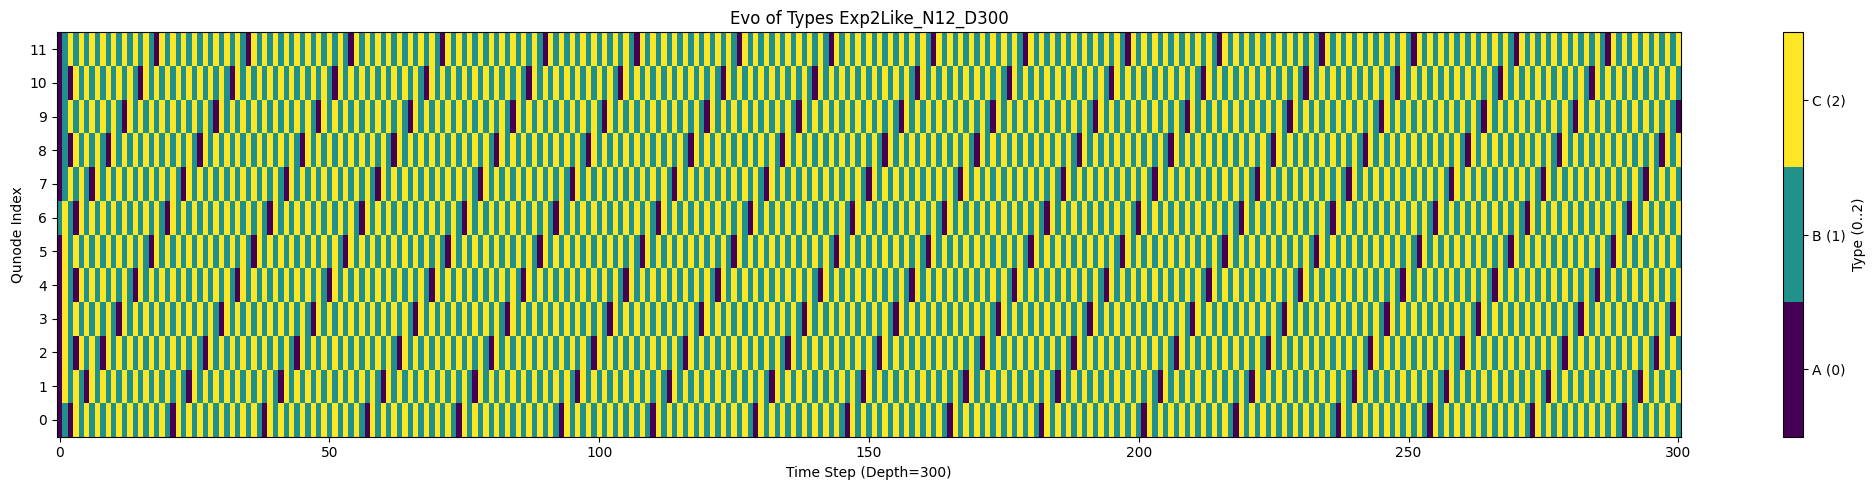

Type history for ML saved to qca_ml_prediction_output_fixed/type_history_Exp2Like_N12_D300.npy

--- Preparing Data for LSTM ---
X_sequences shape: (291, 10, 12)
y_sequences shape: (291, 12)
y_sequences_one_hot shape: (291, 12, 3)
ML Train: X(232, 10, 12), y(232, 12, 3). ML Val: X(59, 10, 12), y(59, 12, 3)

--- Defining and Training LSTM Model ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        72,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 36)             │         2,340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 12, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 12, 3)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,940 (484.14 KB)

 Trainable params: 123,940 (484.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step - accuracy: 0.3993 - loss: 1.0513 - val_accuracy: 0.4703 - val_loss: 0.9147
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4824 - loss: 0.9107 - val_accuracy: 0.4845 - val_loss: 0.8725
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4625 - loss: 0.8990 - val_accuracy: 0.4718 - val_loss: 0.8683
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4673 - loss: 0.8880 - val_accuracy: 0.5523 - val_loss: 0.8646
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5029 - loss: 0.8738 - val_accuracy: 0.5268 - val_loss: 0.8592
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5082 - loss: 0.8712 - val_accuracy: 0.5678 - val_loss: 0.8481
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5334 - loss: 0.8618 - val_accuracy: 0.8051 - val_loss: 0.8173
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6161 - loss: 0.8198 - val_accuracy: 0.8347 - 

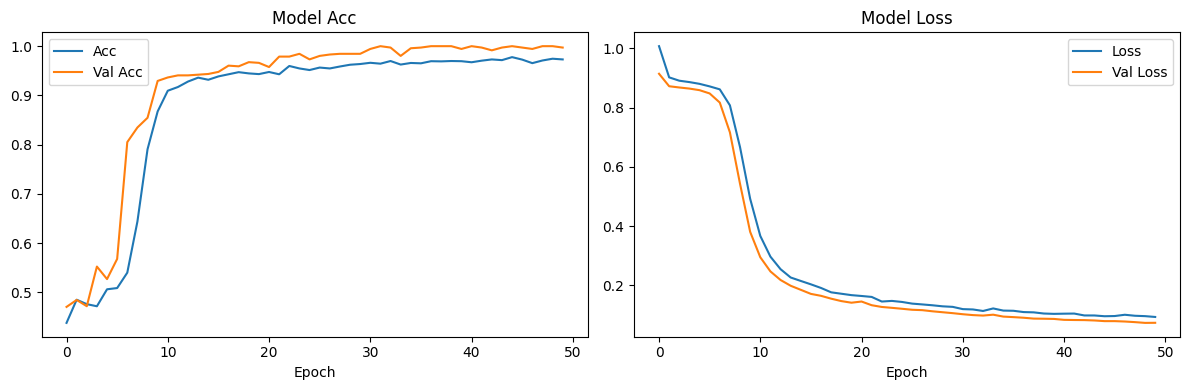

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step

--- Sample Prediction ---
Input Window (last state):[1 2 2 1 2 1 2 1 1 2 1 2]
Actual Next:[2 1 1 2 1 2 1 2 0 1 2 1]
Predicted Next:[2 1 1 2 1 2 1 2 0 1 2 1]
Match:True

=== ML Prediction Demo Complete ===


In [5]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm

# TensorFlow / Keras imports for ML model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score # For ML model eval later, not used yet

# --- QCA Parameters (Based on Exp2Long that showed complexity) ---
N_QUNODES_FOR_DATA_GEN = 12
DEPTH_FOR_DATA_GEN = 300
INITIAL_TYPES_PATTERN_DATA_GEN = "seed_A"
INITIAL_QUANTUM_STATE_PREP_DATA_GEN = "basis_from_type"
INTERACTION_CONFIG_DATA_GEN = {"AA": CXGate(), "BB": CXGate(), "AB": CXGate()}
TYPE_UPDATE_CONFIG_DATA_GEN = {"name": "simple_threshold_3types",
                               "thresh_A_to_B": 0.501, "thresh_A_to_C": 0.05,
                               "thresh_B_to_A": 0.499, "thresh_B_to_C": 0.95,
                               "thresh_C_to_A": 0.45,  "thresh_C_to_B": 0.55}
EXPERIMENT_LABEL_DATA_GEN = f"Exp2Like_N{N_QUNODES_FOR_DATA_GEN}_D{DEPTH_FOR_DATA_GEN}"

TYPE_A = 0; TYPE_B = 1; TYPE_C = 2
NUM_DISTINCT_TYPES = 3
GATES = {"CX": CXGate(), "I": IGate(), "CZ": CZGate()}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict, type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"):
        self.num_qunodes=num_qunodes; self.current_types=initial_types.copy(); self.type_history=[self.current_types.copy()]
        self.quantum_outcome_history=[]; self.interaction_config=interaction_config; self.type_update_rule_config=type_update_rule_config
        self.initial_quantum_state_prep=initial_quantum_state_prep; self.simulator=AerSimulator(method='statevector'); self.circuit_visualization_list=[]
    def _get_interaction_unitary(self,t1,t2): # ... (Same)
        k=tuple(sorted((t1,t2)))
        if k==(TYPE_A,TYPE_A):return self.interaction_config.get("AA",GATES["I"])
        if k==(TYPE_B,TYPE_B):return self.interaction_config.get("BB",GATES["I"])
        if k==(TYPE_C,TYPE_C):return self.interaction_config.get("CC",GATES["I"])
        if k==(TYPE_A,TYPE_B):return self.interaction_config.get("AB",GATES["I"])
        if k==(TYPE_A,TYPE_C):return self.interaction_config.get("AC",GATES["I"])
        if k==(TYPE_B,TYPE_C):return self.interaction_config.get("BC",GATES["I"])
        return GATES["I"]
    def _build_interaction_circuit(self): # ... (Same)
        qc=QuantumCircuit(self.num_qunodes,name=f"QCA_int"); app=False
        if self.initial_quantum_state_prep=="hadamard_all":[qc.h(i)for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep=="basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.x(i)
                elif self.current_types[i]==TYPE_C:qc.x(i)
        if self.num_qunodes>0:qc.barrier(label="init_state")
        for i in range(self.num_qunodes):
            op=self._get_interaction_unitary(self.current_types[i],self.current_types[(i+1)%self.num_qunodes])
            if op is not None and op.name.lower()!='id':qc.append(op,[i,(i+1)%self.num_qunodes]);app=True
        if app and self.num_qunodes>1:qc.barrier(label="int")
        return qc
    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray: # ... (Same, with corrected if/elif)
        new_types = self.current_types.copy();rule_params = self.type_update_rule_config
        rule_name = rule_params.get("name", "simple_threshold_3types")
        if rule_name == "simple_threshold_3types":
            for i in range(self.num_qunodes):
                my_p1 = quantum_outcomes_p1[i]; current_t = self.current_types[i]
                if current_t == TYPE_A:
                    if my_p1 > rule_params.get("thresh_A_to_B",0.60):new_types[i]=TYPE_B
                    elif my_p1 < rule_params.get("thresh_A_to_C",0.20):new_types[i]=TYPE_C
                elif current_t == TYPE_B:
                    if my_p1 < rule_params.get("thresh_B_to_A",0.40):new_types[i]=TYPE_A
                    elif my_p1 > rule_params.get("thresh_B_to_C",0.80):new_types[i]=TYPE_C
                elif current_t == TYPE_C:
                    if my_p1 > rule_params.get("thresh_C_to_B",0.55):new_types[i]=TYPE_B
                    elif my_p1 < rule_params.get("thresh_C_to_A",0.45):new_types[i]=TYPE_A
        # Add other rule_name conditions here if needed
        return new_types
    def step(self): # ... (Same)
        interaction_qc=self._build_interaction_circuit()
        if not self.circuit_visualization_list:self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj=Statevector(interaction_qc);p1_out=np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):p_qi=final_statevector_obj.probabilities([i]);p1_out[i]=p_qi[1]if len(p_qi)==2 else 0.0
        self.quantum_outcome_history.append(p1_out.copy());new_T=self._apply_type_update_rule(p1_out)
        self.current_types=new_T;self.type_history.append(self.current_types.copy());return p1_out
    def run(self,n_steps,verbose=False): # ... (Same)
        if verbose:print("Init Types:",self.current_types)
        try:it_range=tqdm(range(n_steps),desc=f"QCA({self.num_qunodes}Q)")
        except NameError:it_range=range(n_steps);print("tqdm missing.")
        for sn in it_range:
            o=self.step()
            if verbose:print(f"St{sn+1}/{n_steps}-P1:{np.round(o,2)},NewT:{self.current_types}")
            elif not isinstance(it_range,range):pass
            elif(sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1:print(f" QCA St {sn+1}/{n_steps} done...")
        if not isinstance(it_range,range):it_range.close()
        if verbose or isinstance(it_range,range)and not((sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1):print("QCA Sim Done.")
    def get_type_history_as_array(self):return np.array(self.type_history)

    def plot_type_evolution(self, title_suffix="", experiment_label=""): # CORRECTED DEFINITION
        history_arr=self.get_type_history_as_array();fig_w=max(12,history_arr.shape[0]*0.07);fig_h=max(5,self.num_qunodes*0.4)
        plt.figure(figsize=(fig_w,fig_h));
        num_distinct_types_in_history = len(np.unique(history_arr))
        cmap_num_colors = NUM_DISTINCT_TYPES if 'NUM_DISTINCT_TYPES' in globals() else num_distinct_types_in_history
        if cmap_num_colors == 0: cmap_num_colors = 1
        cmap = plt.cm.get_cmap('viridis', cmap_num_colors)
        plt.imshow(history_arr.T,cmap=cmap,aspect='auto',interpolation='nearest',origin='lower',
                   vmin=-0.5, vmax=cmap_num_colors -0.5)
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})");plt.ylabel("Qunode Index");
        title_to_display = f"Evo of Types {experiment_label}{title_suffix}" # Use experiment_label
        plt.title(title_to_display);
        type_ticks = list(range(NUM_DISTINCT_TYPES)) if 'NUM_DISTINCT_TYPES' in globals() else list(range(num_distinct_types_in_history))
        type_tick_labels = [f'{chr(65+i)} ({i})' for i in type_ticks]
        cbar=plt.colorbar(label=f"Type (0..{max(type_ticks)})",ticks=type_ticks);
        if type_ticks: cbar.ax.set_yticklabels(type_tick_labels)
        plt.yticks(np.arange(self.num_qunodes));plt.tight_layout();plt.show()

    def visualize_example_interaction_circuit(self): # ... (Same)
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- ML Data Preparation ---
def create_sequences(data, window_size): # ... (Same)
    X, y = [], [];
    for i in range(len(data)-window_size):X.append(data[i:i+window_size]);y.append(data[i+window_size])
    return np.array(X),np.array(y)

# --- Main Execution ---
if __name__ == "__main__":
    output_base_dir = "qca_ml_prediction_output_fixed" # New dir to avoid overwriting
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    print(f"===== Generating QCA Data for ML: {EXPERIMENT_LABEL_DATA_GEN} =====")
    np.random.seed(42)
    initial_types_for_gen = np.full(N_QUNODES_FOR_DATA_GEN, TYPE_A, dtype=int)
    if N_QUNODES_FOR_DATA_GEN > 0 : initial_types_for_gen[N_QUNODES_FOR_DATA_GEN // 2] = TYPE_B
    qca_data_generator = QuantumCellularAutomaton(
        num_qunodes=N_QUNODES_FOR_DATA_GEN, initial_types=initial_types_for_gen,
        interaction_config=INTERACTION_CONFIG_DATA_GEN,
        type_update_rule_config=TYPE_UPDATE_CONFIG_DATA_GEN,
        initial_quantum_state_prep=INITIAL_QUANTUM_STATE_PREP_DATA_GEN)
    qca_data_generator.run(DEPTH_FOR_DATA_GEN, verbose=False)
    type_history_data = qca_data_generator.get_type_history_as_array()

    # Call plot_type_evolution with experiment_label
    qca_data_generator.plot_type_evolution(experiment_label=EXPERIMENT_LABEL_DATA_GEN)

    history_fn = os.path.join(output_base_dir, f"type_history_{EXPERIMENT_LABEL_DATA_GEN}.npy")
    np.save(history_fn, type_history_data); print(f"Type history for ML saved to {history_fn}")

    print("\n--- Preparing Data for LSTM ---") # ... (ML Data Prep - Same as before)
    WINDOW_SIZE_ML = 10
    X_sequences, y_sequences = create_sequences(type_history_data, WINDOW_SIZE_ML)
    if X_sequences.shape[0] == 0: print("Not enough data for ML sequences.")
    else:
        print(f"X_sequences shape: {X_sequences.shape}\ny_sequences shape: {y_sequences.shape}")
        y_sequences_one_hot = to_categorical(y_sequences, num_classes=NUM_DISTINCT_TYPES)
        print(f"y_sequences_one_hot shape: {y_sequences_one_hot.shape}")
        split_idx = int(0.8 * X_sequences.shape[0])
        X_train_ml, X_val_ml = X_sequences[:split_idx], X_sequences[split_idx:]
        y_train_ml, y_val_ml = y_sequences_one_hot[:split_idx], y_sequences_one_hot[split_idx:]
        print(f"ML Train: X{X_train_ml.shape}, y{y_train_ml.shape}. ML Val: X{X_val_ml.shape}, y{y_val_ml.shape}")

        print("\n--- Defining and Training LSTM Model ---") # ... (LSTM Model - Same as before)
        model = Sequential([
            LSTM(128, input_shape=(WINDOW_SIZE_ML, N_QUNODES_FOR_DATA_GEN), return_sequences=True), Dropout(0.2),
            LSTM(64, return_sequences=False), Dropout(0.2),
            Dense(N_QUNODES_FOR_DATA_GEN * NUM_DISTINCT_TYPES),
            tf.keras.layers.Reshape((N_QUNODES_FOR_DATA_GEN, NUM_DISTINCT_TYPES)),
            tf.keras.layers.Softmax(axis=-1)])
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        model.summary()
        if X_train_ml.shape[0] > 0 and X_val_ml.shape[0] > 0 :
            history = model.fit(X_train_ml, y_train_ml, epochs=50, batch_size=16, validation_data=(X_val_ml, y_val_ml), verbose=1)
            loss, acc = model.evaluate(X_val_ml, y_val_ml, verbose=0)
            print(f"\nLSTM Model Validation Accuracy: {acc*100:.2f}%")
            plt.figure(figsize=(12,4));plt.subplot(1,2,1);plt.plot(history.history['accuracy'],label='Acc');plt.plot(history.history['val_accuracy'],label='Val Acc');plt.title('Model Acc');plt.xlabel('Epoch');plt.legend()
            plt.subplot(1,2,2);plt.plot(history.history['loss'],label='Loss');plt.plot(history.history['val_loss'],label='Val Loss');plt.title('Model Loss');plt.xlabel('Epoch');plt.legend();plt.tight_layout();plt.show()
            if X_val_ml.shape[0] > 0:
                idx=0;input_seq=X_val_ml[idx:idx+1];pred_probs=model.predict(input_seq);pred_types=np.argmax(pred_probs,axis=-1).flatten();act_types=np.argmax(y_val_ml[idx],axis=-1).flatten()
                print("\n--- Sample Prediction ---");print(f"Input Window (last state):{X_val_ml[idx][-1]}");print(f"Actual Next:{act_types}");print(f"Predicted Next:{pred_types}");print(f"Match:{np.array_equal(act_types,pred_types)}")
        else: print("Not enough training/validation data for LSTM.")
    print("\n=== ML Prediction Demo Complete ===")



===== Running Experiment: ExpA_3TypeBaseline_AllCX_Basis_Sensitive =====


QCA(12Q): 100%|██████████| 100/100 [00:01<00:00, 73.01it/s]
<ipython-input-9-a4c9dc2d6d22>:124: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpA_3TypeBaseline_AllCX_Basis_Sensitive took 1.38s.


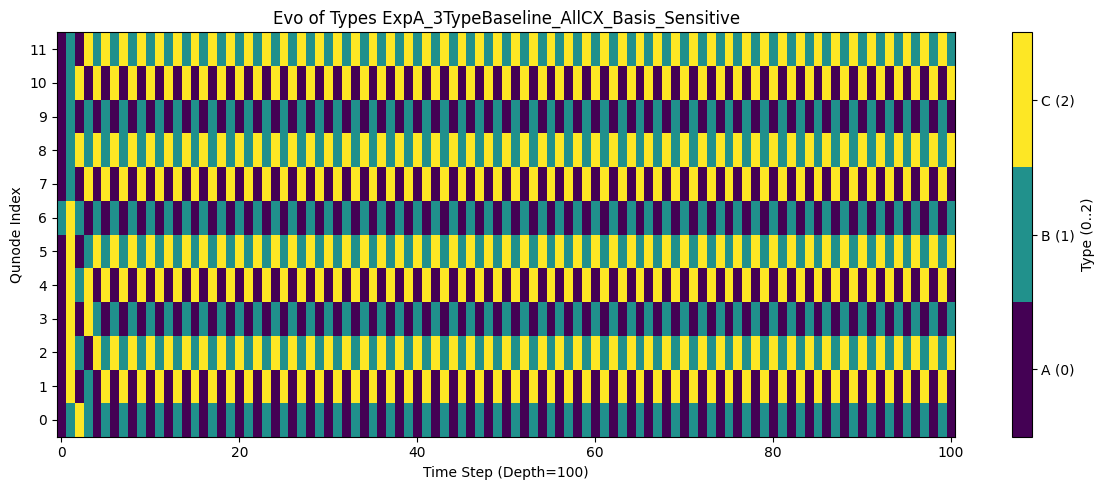

Type history saved to qca_multi_rule_eval_fixed_plot_and_softmax/type_history_ExpA_3TypeBaseline_AllCX_Basis_Sensitive.npy

--- Preparing Data & Training LSTM for ExpA_3TypeBaseline_AllCX_Basis_Sensitive ---
ML Train:X(72, 10, 12),y(72, 12, 3).ML Val:X(19, 10, 12),y(19, 12, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM for ExpA_3TypeBaseline_AllCX_Basis_Sensitive...
LSTM Val Acc for ExpA_3TypeBaseline_AllCX_Basis_Sensitive: 100.00%


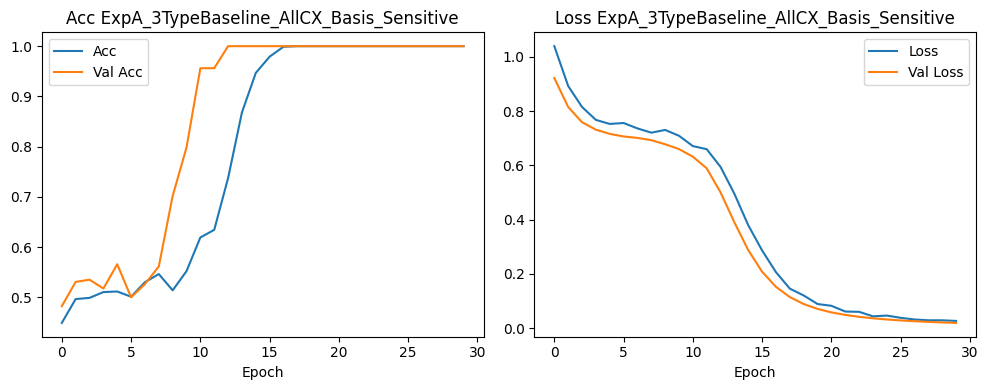



===== Running Experiment: ExpB_ComplexRule_MixedInteract_Hadamard =====


QCA(12Q): 100%|██████████| 100/100 [00:00<00:00, 238.95it/s]
<ipython-input-9-a4c9dc2d6d22>:124: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpB_ComplexRule_MixedInteract_Hadamard took 0.43s.


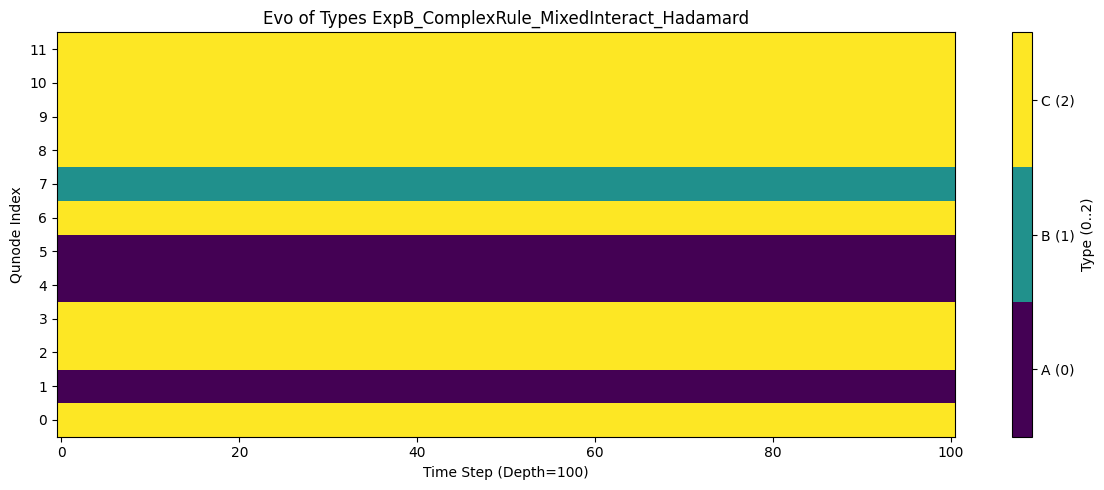

Type history saved to qca_multi_rule_eval_fixed_plot_and_softmax/type_history_ExpB_ComplexRule_MixedInteract_Hadamard.npy

--- Preparing Data & Training LSTM for ExpB_ComplexRule_MixedInteract_Hadamard ---
ML Train:X(72, 10, 12),y(72, 12, 3).ML Val:X(19, 10, 12),y(19, 12, 3)
Training LSTM for ExpB_ComplexRule_MixedInteract_Hadamard...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpB_ComplexRule_MixedInteract_Hadamard: 100.00%


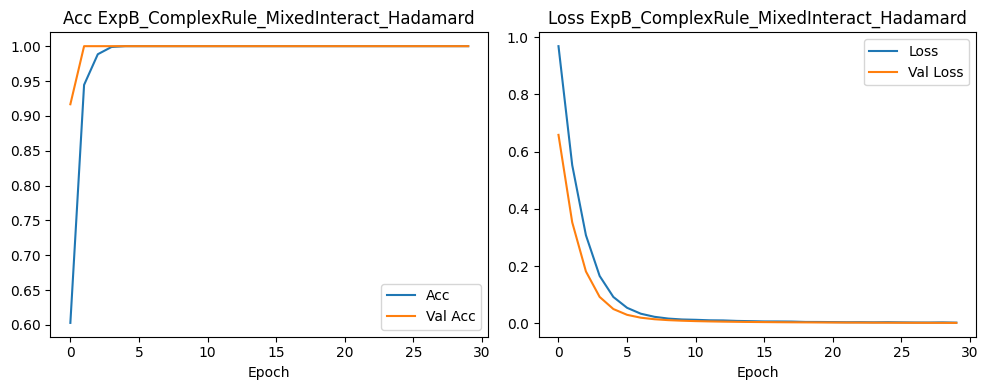



===== Running Experiment: ExpC_ComplexRule_Basis_NoHomo =====


QCA(12Q): 100%|██████████| 100/100 [00:00<00:00, 314.03it/s]
<ipython-input-9-a4c9dc2d6d22>:124: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpC_ComplexRule_Basis_NoHomo took 0.32s.


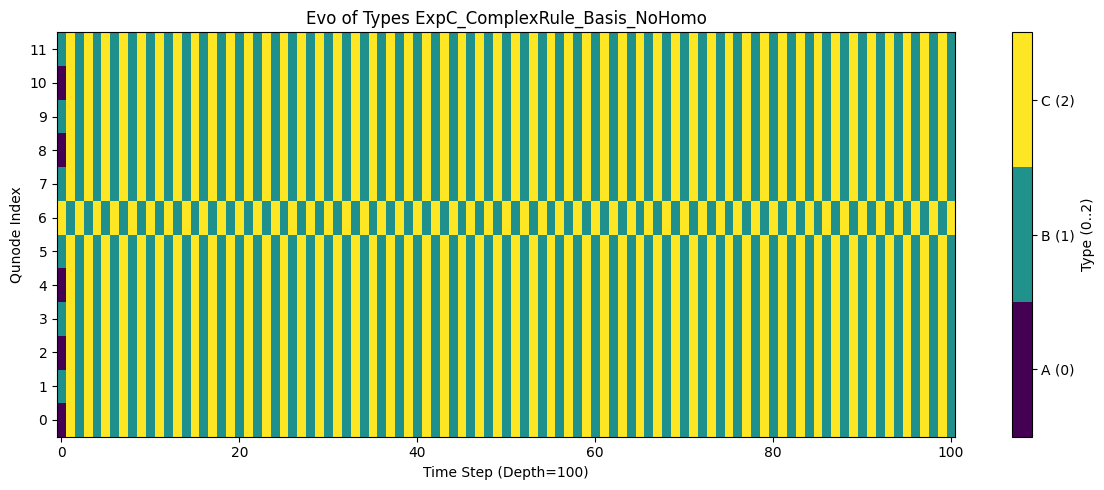

Type history saved to qca_multi_rule_eval_fixed_plot_and_softmax/type_history_ExpC_ComplexRule_Basis_NoHomo.npy

--- Preparing Data & Training LSTM for ExpC_ComplexRule_Basis_NoHomo ---
ML Train:X(72, 10, 12),y(72, 12, 3).ML Val:X(19, 10, 12),y(19, 12, 3)
Training LSTM for ExpC_ComplexRule_Basis_NoHomo...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpC_ComplexRule_Basis_NoHomo: 100.00%


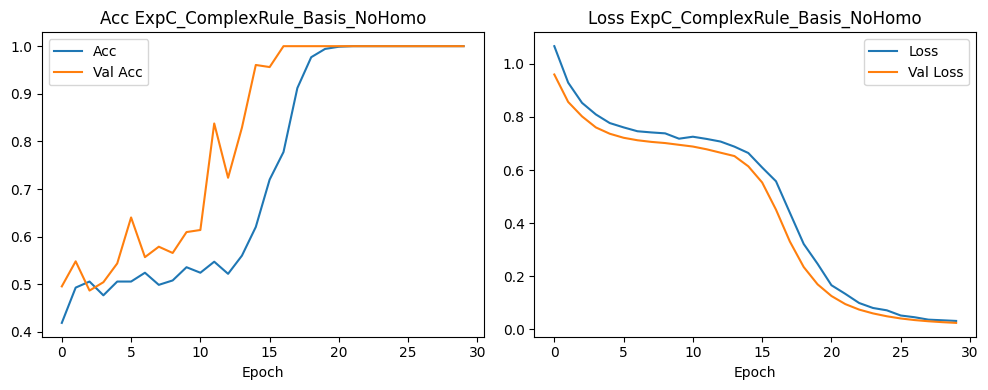



===== Running Experiment: ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh =====


QCA(12Q): 100%|██████████| 100/100 [00:00<00:00, 223.35it/s]
<ipython-input-9-a4c9dc2d6d22>:124: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh took 0.45s.


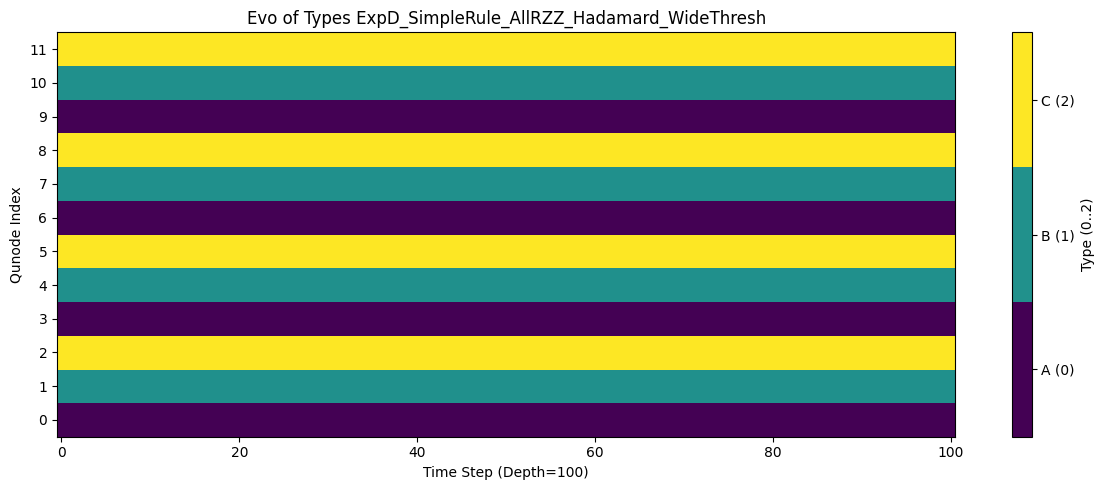

Type history saved to qca_multi_rule_eval_fixed_plot_and_softmax/type_history_ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh.npy

--- Preparing Data & Training LSTM for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh ---
ML Train:X(72, 10, 12),y(72, 12, 3).ML Val:X(19, 10, 12),y(19, 12, 3)
Training LSTM for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh: 100.00%


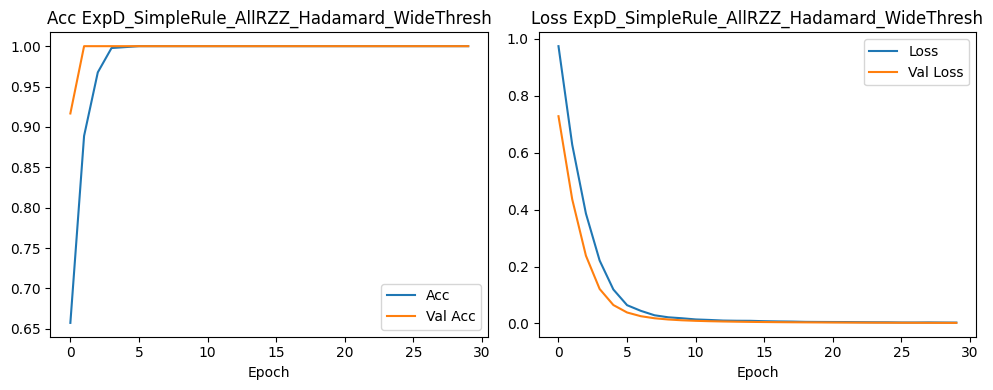



--- LSTM Model Performance Summary ---
---------------------------------------------------
Experiment Label                                   | LSTM Val. Accuracy  
---------------------------------------------------
ExpA_3TypeBaseline_AllCX_Basis_Sensitive           | 100.00%
ExpB_ComplexRule_MixedInteract_Hadamard            | 100.00%
ExpC_ComplexRule_Basis_NoHomo                      | 100.00%
ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh         | 100.00%
---------------------------------------------------

--- All Experiments and ML Evaluations Complete ---


In [9]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate, SGate, TGate, CCXGate
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm

# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Softmax
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# --- QCA Parameters (Defaults for experiments) ---
N_QUNODES_DEFAULT = 12
DEPTH_DEFAULT = 100

TYPE_A = 0; TYPE_B = 1; TYPE_C = 2
NUM_DISTINCT_TYPES = 3
GATES = {"H":HGate(),"X":XGate(),"I":IGate(),"S":SGate(),"T":TGate(),"CX":CXGate(),"CZ":CZGate(),
         "SWAP":SwapGate(),"CCX":CCXGate(),"RZZ_PIO4":RZZGate(np.pi/4),"RZZ_PIO2":RZZGate(np.pi/2),
         "RXX_PIO4":RXXGate(np.pi/4),"RYY_PIO4":RYYGate(np.pi/4)}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict, type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"):
        self.num_qunodes=num_qunodes; self.current_types=initial_types.copy(); self.type_history=[self.current_types.copy()]
        self.quantum_outcome_history=[]; self.interaction_config=interaction_config; self.type_update_rule_config=type_update_rule_config
        self.initial_quantum_state_prep=initial_quantum_state_prep; self.simulator=AerSimulator(method='statevector'); self.circuit_visualization_list=[]
    def _get_interaction_unitary(self,t1,t2): # ... (Same)
        k=tuple(sorted((t1,t2)))
        if k==(TYPE_A,TYPE_A):return self.interaction_config.get("AA",GATES["I"])
        if k==(TYPE_B,TYPE_B):return self.interaction_config.get("BB",GATES["I"])
        if k==(TYPE_C,TYPE_C):return self.interaction_config.get("CC",GATES["I"])
        if k==(TYPE_A,TYPE_B):return self.interaction_config.get("AB",GATES["I"])
        if k==(TYPE_A,TYPE_C):return self.interaction_config.get("AC",GATES["I"])
        if k==(TYPE_B,TYPE_C):return self.interaction_config.get("BC",GATES["I"])
        return GATES["I"]
    def _build_interaction_circuit(self): # ... (Same)
        qc=QuantumCircuit(self.num_qunodes,name=f"QCA_int"); app=False
        if self.initial_quantum_state_prep=="hadamard_all":[qc.h(i)for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep=="basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.x(i)
                elif self.current_types[i]==TYPE_C:qc.x(i)
        elif self.initial_quantum_state_prep=="mixed_A0_BH_CH":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.h(i)
                elif self.current_types[i]==TYPE_C:qc.h(i);qc.x(i)
        if self.num_qunodes>0:qc.barrier(label="init_state")
        for i in range(self.num_qunodes):
            op=self._get_interaction_unitary(self.current_types[i],self.current_types[(i+1)%self.num_qunodes])
            if op is not None and op.name.lower()!='id':qc.append(op,[i,(i+1)%self.num_qunodes]);app=True
        if app and self.num_qunodes>1:qc.barrier(label="int")
        return qc
    def _apply_type_update_rule(self, p1_out): # ... (Same - with fixed if/elif)
        new_T=self.current_types.copy();cfg=self.type_update_rule_config;r_name=cfg.get("name","simple_threshold_3types")
        if r_name=="simple_threshold_3types":
            for i in range(self.num_qunodes):
                p1=p1_out[i];cT=self.current_types[i]
                if cT==TYPE_A:
                    if p1>cfg.get("thresh_A_to_B",0.6):new_T[i]=TYPE_B
                    elif p1<cfg.get("thresh_A_to_C",0.2):new_T[i]=TYPE_C
                elif cT==TYPE_B:
                    if p1<cfg.get("thresh_B_to_A",0.4):new_T[i]=TYPE_A
                    elif p1>cfg.get("thresh_B_to_C",0.8):new_T[i]=TYPE_C
                elif cT==TYPE_C:
                    if p1>cfg.get("thresh_C_to_B",0.55):new_T[i]=TYPE_B
                    elif p1<cfg.get("thresh_C_to_A",0.45):new_T[i]=TYPE_A
        elif r_name=="quantum_neighborhood_logic_v1":
            p1_low=cfg.get("p1_low_thresh",0.33);p1_mid_low=cfg.get("p1_mid_low_thresh",0.45)
            p1_mid_high=cfg.get("p1_mid_high_thresh",0.55);p1_high=cfg.get("p1_high_thresh",0.67)
            for i in range(self.num_qunodes):
                my_t,my_p1=self.current_types[i],p1_out[i]
                l_idx,r_idx=(i-1+self.num_qunodes)%self.num_qunodes,(i+1)%self.num_qunodes
                l_t,r_t=self.current_types[l_idx],self.current_types[r_idx]
                if my_t==TYPE_A:
                    if l_t==TYPE_B and r_t==TYPE_B and my_p1>p1_mid_high:new_T[i]=TYPE_B
                    elif(l_t==TYPE_C or r_t==TYPE_C)and my_p1>p1_high:new_T[i]=TYPE_B
                    elif my_p1<p1_low:new_T[i]=TYPE_C
                elif my_t==TYPE_B:
                    if l_t==TYPE_A and r_t==TYPE_A and my_p1<p1_mid_low:new_T[i]=TYPE_A
                    elif(l_t==TYPE_C or r_t==TYPE_C)and my_p1<p1_low:new_T[i]=TYPE_A
                    elif my_p1>p1_high:new_T[i]=TYPE_C
                elif my_t==TYPE_C:
                    if l_t==TYPE_A and r_t==TYPE_A:new_T[i]=TYPE_A
                    elif l_t==TYPE_B and r_t==TYPE_B:new_T[i]=TYPE_B
                    elif my_p1<p1_mid_low:new_T[i]=TYPE_A
                    elif my_p1>p1_mid_high:new_T[i]=TYPE_B
        return new_T
    def step(self): # ... (Same)
        interaction_qc=self._build_interaction_circuit()
        if not self.circuit_visualization_list:self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj=Statevector(interaction_qc);p1_out=np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):p_qi=final_statevector_obj.probabilities([i]);p1_out[i]=p_qi[1]if len(p_qi)==2 else 0.0
        self.quantum_outcome_history.append(p1_out.copy());new_T=self._apply_type_update_rule(p1_out)
        self.current_types=new_T;self.type_history.append(self.current_types.copy());return p1_out
    def run(self,n_steps,verbose=False): # ... (Same)
        if verbose:print("Init Types:",self.current_types)
        try:it_range=tqdm(range(n_steps),desc=f"QCA({self.num_qunodes}Q)")
        except NameError:it_range=range(n_steps);print("tqdm missing.")
        for sn in it_range:
            o=self.step()
            if verbose:print(f"St{sn+1}/{n_steps}-P1:{np.round(o,2)},NewT:{self.current_types}")
            elif not isinstance(it_range,range):pass
            elif(sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1:print(f" QCA St {sn+1}/{n_steps} done...")
        if not isinstance(it_range,range):it_range.close()
        if verbose or isinstance(it_range,range)and not((sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1):print("QCA Sim Done.")
    def get_type_history_as_array(self):return np.array(self.type_history)

    def plot_type_evolution(self, title_suffix="", experiment_label=""): # CORRECTED SIGNATURE
        history_arr=self.get_type_history_as_array();fig_w=max(12,history_arr.shape[0]*0.07);fig_h=max(5,self.num_qunodes*0.4)
        plt.figure(figsize=(fig_w,fig_h));
        num_distinct_types_in_history = len(np.unique(history_arr))
        cmap_num_colors = NUM_DISTINCT_TYPES if 'NUM_DISTINCT_TYPES' in globals() and NUM_DISTINCT_TYPES >= num_distinct_types_in_history else num_distinct_types_in_history
        if cmap_num_colors == 0: cmap_num_colors = 1
        cmap = plt.cm.get_cmap('viridis', cmap_num_colors)
        plt.imshow(history_arr.T,cmap=cmap,aspect='auto',interpolation='nearest',origin='lower',
                   vmin=-0.5, vmax=cmap_num_colors -0.5)
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})");plt.ylabel("Qunode Index");
        title_to_display = f"Evo of Types {experiment_label}{title_suffix}" # Use experiment_label
        plt.title(title_to_display);
        type_ticks = list(range(NUM_DISTINCT_TYPES)) if 'NUM_DISTINCT_TYPES' in globals() and NUM_DISTINCT_TYPES >= num_distinct_types_in_history else list(range(num_distinct_types_in_history))
        if not type_ticks and num_distinct_types_in_history > 0 : type_ticks = list(range(num_distinct_types_in_history))
        type_tick_labels = [f'{chr(65+i)} ({i})' for i in type_ticks]
        if type_ticks :
            cbar = plt.colorbar(label=f"Type (0..{max(type_ticks)})",ticks=type_ticks);
            c_tick_labels_actual = [label for i, label in enumerate(type_tick_labels) if type_ticks[i] < cmap_num_colors]
            c_ticks_actual = [tick for tick in type_ticks if tick < cmap_num_colors]
            if c_ticks_actual: cbar.set_ticks(c_ticks_actual); cbar.ax.set_yticklabels(c_tick_labels_actual)
        else: plt.colorbar(label="Type")
        plt.yticks(np.arange(self.num_qunodes));plt.tight_layout();plt.show()

    def visualize_example_interaction_circuit(self): # ... (Same)
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- ML Data Preparation ---
def create_sequences(data, window_size): # ... (Same)
    X, y = [], [];
    for i in range(len(data)-window_size):X.append(data[i:i+window_size]);y.append(data[i+window_size])
    return np.array(X),np.array(y)

# --- Main Execution ---
if __name__ == "__main__":
    output_base_dir = "qca_multi_rule_eval_fixed_plot_and_softmax" # New dir
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    experiments_to_run = [
        {
            "label": "ExpA_3TypeBaseline_AllCX_Basis_Sensitive", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "seed_A", "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA":GATES["CX"],"BB":GATES["CX"],"CC":GATES["CX"], "AB":GATES["CX"],"AC":GATES["CX"],"BC":GATES["CX"]},
            "type_update_rule_config": {"name":"simple_threshold_3types", "thresh_A_to_B":0.501,"thresh_A_to_C":0.05,"thresh_B_to_A":0.499,"thresh_B_to_C":0.95,"thresh_C_to_A":0.45,"thresh_C_to_B":0.55}
        },
        {
            "label": "ExpB_ComplexRule_MixedInteract_Hadamard", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "random_ABC", "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": {"AA":GATES["RXX_PIO4"],"BB":GATES["RYY_PIO4"],"CC":GATES["SWAP"],"AB":GATES["RZZ_PIO2"],"AC":GATES["CZ"],"BC":GATES["CX"]},
            "type_update_rule_config": {"name":"quantum_neighborhood_logic_v1","p1_low_thresh":0.30,"p1_mid_low_thresh":0.48,"p1_mid_high_thresh":0.52,"p1_high_thresh":0.70}
        },
        {
            "label": "ExpC_ComplexRule_Basis_NoHomo", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "seed_C_in_AB_alternating", "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA":GATES["I"],"BB":GATES["I"],"CC":GATES["I"],"AB":GATES["RZZ_PIO2"],"AC":GATES["CX"],"BC":GATES["CZ"]},
            "type_update_rule_config": {"name":"quantum_neighborhood_logic_v1","p1_low_thresh":0.25,"p1_mid_low_thresh":0.45,"p1_mid_high_thresh":0.55,"p1_high_thresh":0.75}
        },
        {
            "label": "ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "alternating_ABC", "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": {"AA":GATES["RZZ_PIO4"],"BB":GATES["RZZ_PIO4"],"CC":GATES["RZZ_PIO4"],"AB":GATES["RZZ_PIO4"],"AC":GATES["RZZ_PIO4"],"BC":GATES["RZZ_PIO4"]},
            "type_update_rule_config": {"name":"simple_threshold_3types","thresh_A_to_B":0.65,"thresh_A_to_C":0.15,"thresh_B_to_A":0.35,"thresh_B_to_C":0.85,"thresh_C_to_A":0.30,"thresh_C_to_B":0.70}
        }
    ]
    ml_results_summary = []
    for exp_config in experiments_to_run:
        print(f"\n\n===== Running Experiment: {exp_config['label']} ====="); np.random.seed(42)
        n_q = exp_config["n_qunodes"]
        if exp_config["initial_types_pattern"]=="random_ABC":initial_types=np.random.choice([TYPE_A,TYPE_B,TYPE_C],size=n_q)
        elif exp_config["initial_types_pattern"]=="alternating_ABC":initial_types=np.array([(TYPE_A if i%3==0 else(TYPE_B if i%3==1 else TYPE_C))for i in range(n_q)])
        elif exp_config["initial_types_pattern"]=="seed_A":initial_types=np.full(n_q,TYPE_A,dtype=int);initial_types[n_q//2 if n_q>0 else 0]=TYPE_B
        elif exp_config["initial_types_pattern"]=="seed_C_in_AB_alternating":initial_types=np.array([(TYPE_A if i%2==0 else TYPE_B)for i in range(n_q)]);initial_types[n_q//2 if n_q>0 else 0]=TYPE_C
        else:initial_types=np.random.choice([TYPE_A,TYPE_B,TYPE_C],size=n_q)
        qca = QuantumCellularAutomaton(
            num_qunodes=n_q, initial_types=initial_types,
            interaction_config=exp_config["interaction_config"],
            type_update_rule_config=exp_config["type_update_rule_config"],
            initial_quantum_state_prep=exp_config["initial_quantum_state_prep"])
        run_st_tm=time.time(); qca.run(exp_config["depth"],verbose=False); run_end_tm=time.time()
        print(f"QCA run for {exp_config['label']} took {run_end_tm-run_st_tm:.2f}s.")

        # CORRECTED CALL to plot_type_evolution
        qca.plot_type_evolution(title_suffix="", experiment_label=exp_config['label'])

        type_history_data = qca.get_type_history_as_array()
        history_fn = os.path.join(output_base_dir,f"type_history_{exp_config['label']}.npy"); np.save(history_fn,type_history_data)
        print(f"Type history saved to {history_fn}")
        print(f"\n--- Preparing Data & Training LSTM for {exp_config['label']} ---")
        WINDOW_SIZE_ML=10; X_sequences,y_sequences=create_sequences(type_history_data,WINDOW_SIZE_ML)
        lstm_accuracy = "N/A (Not enough data)"
        if X_sequences.shape[0] < 20: print(f"Not enough sequences ({X_sequences.shape[0]}) for ML. Skipping LSTM.")
        else:
            y_sequences_one_hot=to_categorical(y_sequences,num_classes=NUM_DISTINCT_TYPES)
            split_idx=int(0.8*X_sequences.shape[0]); X_train_ml,X_val_ml=X_sequences[:split_idx],X_sequences[split_idx:]
            y_train_ml,y_val_ml=y_sequences_one_hot[:split_idx],y_sequences_one_hot[split_idx:]
            print(f"ML Train:X{X_train_ml.shape},y{y_train_ml.shape}.ML Val:X{X_val_ml.shape},y{y_val_ml.shape}")
            model=Sequential([ LSTM(128,input_shape=(WINDOW_SIZE_ML,n_q),return_sequences=True),Dropout(0.2),
                               LSTM(64,return_sequences=False),Dropout(0.2), Dense(n_q*NUM_DISTINCT_TYPES),
                               Reshape((n_q,NUM_DISTINCT_TYPES)), Softmax(axis=-1)]) # Softmax is now defined
            model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
            if X_train_ml.shape[0]>0 and X_val_ml.shape[0]>0:
                print(f"Training LSTM for {exp_config['label']}...")
                history=model.fit(X_train_ml,y_train_ml,epochs=30,batch_size=16,validation_data=(X_val_ml,y_val_ml),verbose=0)
                loss,acc=model.evaluate(X_val_ml,y_val_ml,verbose=0); lstm_accuracy = f"{acc*100:.2f}%"
                print(f"LSTM Val Acc for {exp_config['label']}: {lstm_accuracy}")
                plt.figure(figsize=(10,4)); plt.subplot(1,2,1); plt.plot(history.history['accuracy'],label='Acc'); plt.plot(history.history['val_accuracy'],label='Val Acc'); plt.title(f'Acc {exp_config["label"]}'); plt.xlabel('Epoch'); plt.legend()
                plt.subplot(1,2,2); plt.plot(history.history['loss'],label='Loss'); plt.plot(history.history['val_loss'],label='Val Loss'); plt.title(f'Loss {exp_config["label"]}'); plt.xlabel('Epoch'); plt.legend(); plt.tight_layout(); plt.show()
            else: print(f"Not enough train/val samples for LSTM for {exp_config['label']}.")
        ml_results_summary.append({"experiment_label": exp_config['label'], "lstm_val_accuracy": lstm_accuracy})

    print("\n\n--- LSTM Model Performance Summary ---")
    print("---------------------------------------------------");print(f"{'Experiment Label':<50} | {'LSTM Val. Accuracy':<20}");print("---------------------------------------------------")
    for res in ml_results_summary: print(f"{res['experiment_label']:<50} | {res['lstm_val_accuracy']}")
    print("---------------------------------------------------")
    print("\n--- All Experiments and ML Evaluations Complete ---")



===== Running Experiment: ExpA_3TypeBaseline_AllCX_Basis_Sensitive =====


QCA(20Q): 100%|██████████| 200/200 [03:25<00:00,  1.03s/it]
<ipython-input-13-7fb3a99f62fb>:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', max_possible_types)


QCA run for ExpA_3TypeBaseline_AllCX_Basis_Sensitive took 206.00s.


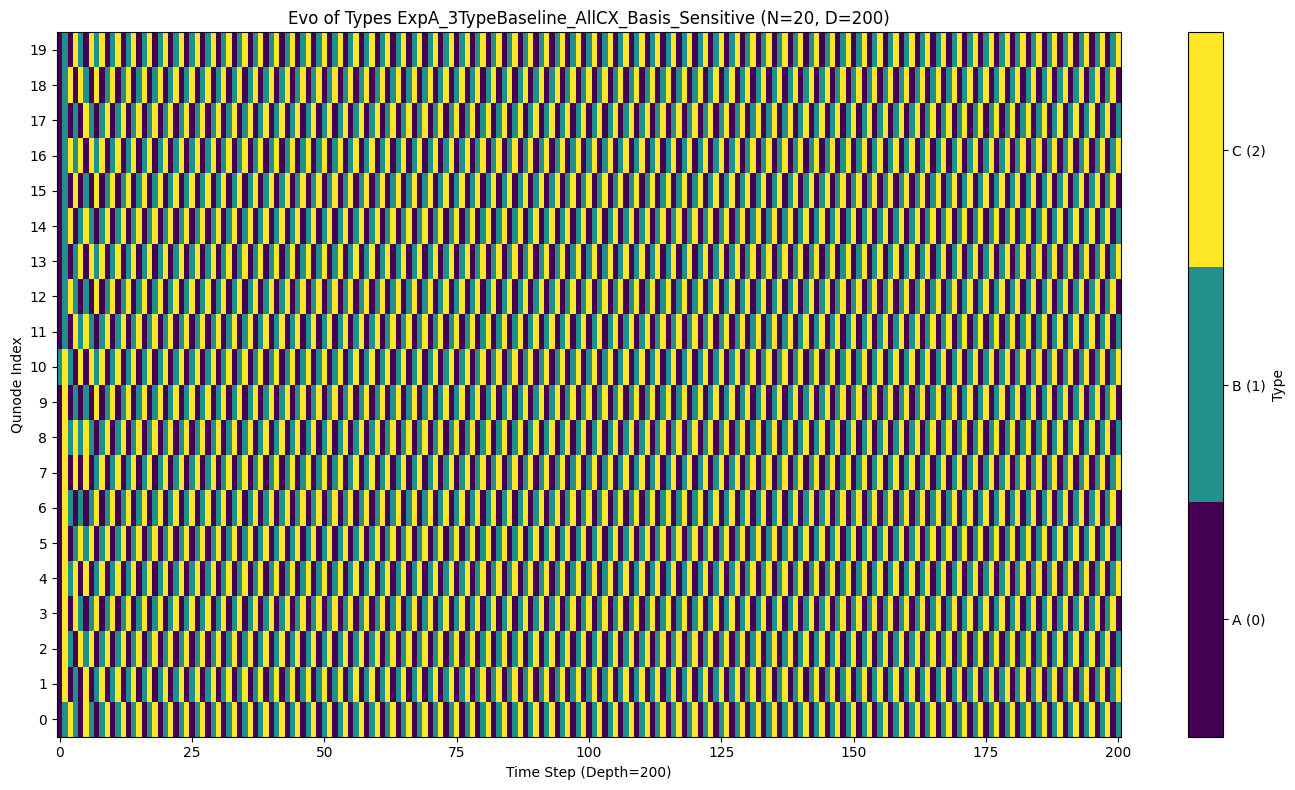

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpA_3TypeBaseline_AllCX_Basis_Sensitive.npy

--- Preparing Data & Training LSTM for ExpA_3TypeBaseline_AllCX_Basis_Sensitive ---
ML Train:X(152, 10, 20),y(152, 20, 3).ML Val:X(39, 10, 20),y(39, 20, 3)
Training LSTM for ExpA_3TypeBaseline_AllCX_Basis_Sensitive...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpA_3TypeBaseline_AllCX_Basis_Sensitive: 100.00%


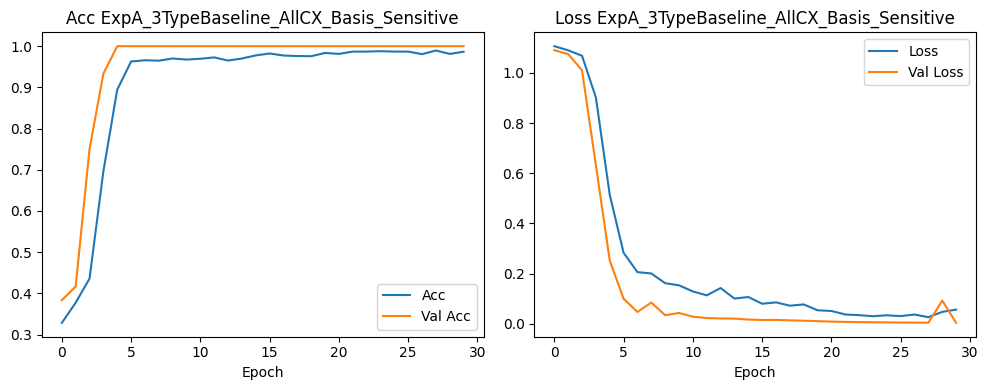



===== Running Experiment: ExpB_ComplexRule_MixedInteract_Hadamard =====


QCA(20Q): 100%|██████████| 200/200 [04:00<00:00,  1.20s/it]
<ipython-input-13-7fb3a99f62fb>:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', max_possible_types)


QCA run for ExpB_ComplexRule_MixedInteract_Hadamard took 240.52s.


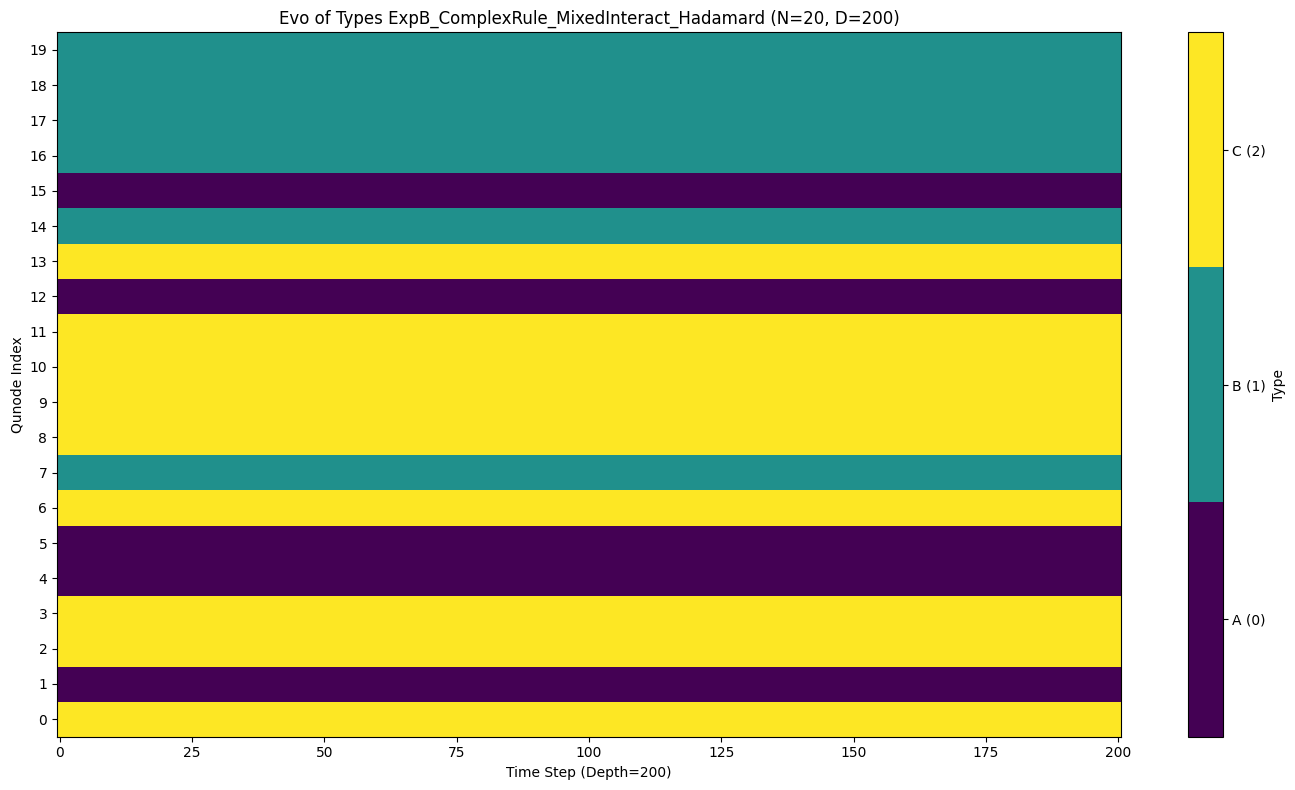

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpB_ComplexRule_MixedInteract_Hadamard.npy

--- Preparing Data & Training LSTM for ExpB_ComplexRule_MixedInteract_Hadamard ---
ML Train:X(152, 10, 20),y(152, 20, 3).ML Val:X(39, 10, 20),y(39, 20, 3)
Training LSTM for ExpB_ComplexRule_MixedInteract_Hadamard...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpB_ComplexRule_MixedInteract_Hadamard: 100.00%


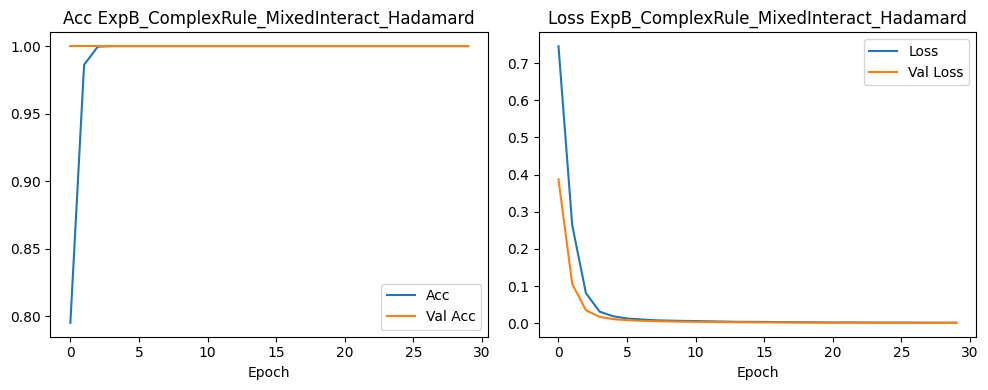



===== Running Experiment: ExpC_ComplexRule_Basis_NoHomo =====


QCA(20Q): 100%|██████████| 200/200 [02:29<00:00,  1.34it/s]
<ipython-input-13-7fb3a99f62fb>:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', max_possible_types)


QCA run for ExpC_ComplexRule_Basis_NoHomo took 149.70s.


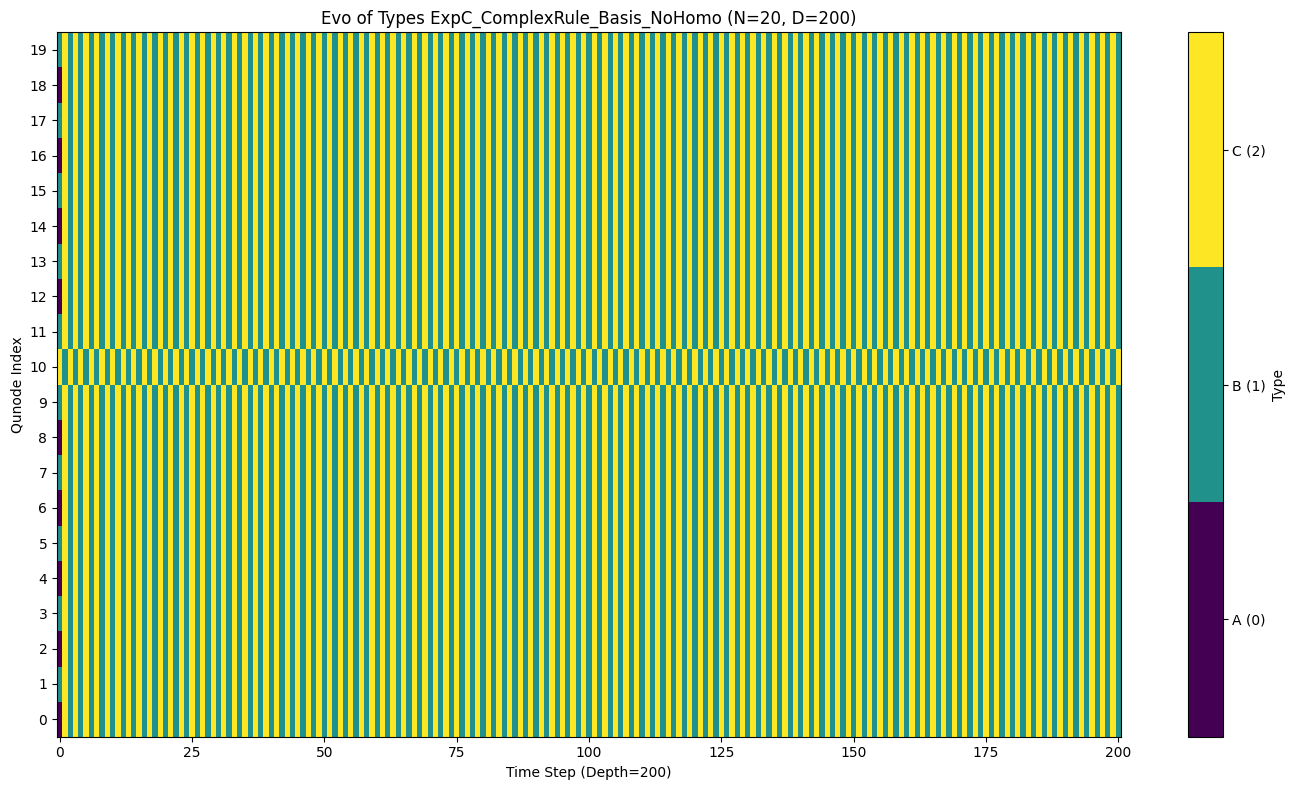

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpC_ComplexRule_Basis_NoHomo.npy

--- Preparing Data & Training LSTM for ExpC_ComplexRule_Basis_NoHomo ---
ML Train:X(152, 10, 20),y(152, 20, 3).ML Val:X(39, 10, 20),y(39, 20, 3)
Training LSTM for ExpC_ComplexRule_Basis_NoHomo...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpC_ComplexRule_Basis_NoHomo: 100.00%


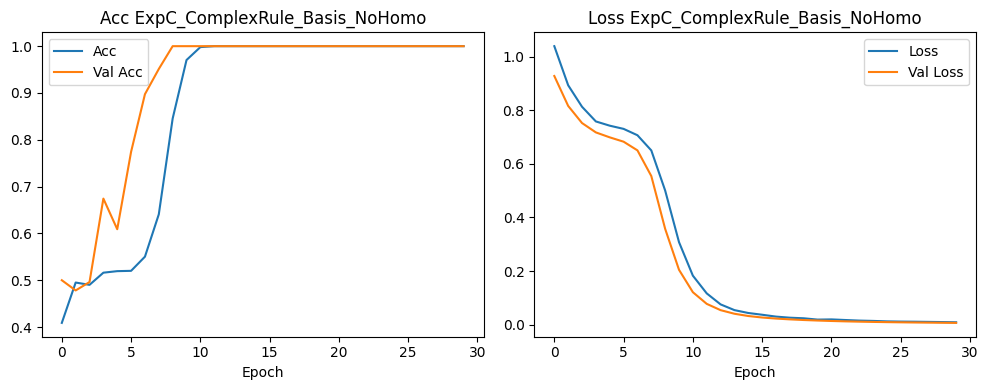



===== Running Experiment: ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh =====


QCA(20Q): 100%|██████████| 200/200 [03:56<00:00,  1.18s/it]
<ipython-input-13-7fb3a99f62fb>:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', max_possible_types)


QCA run for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh took 236.10s.


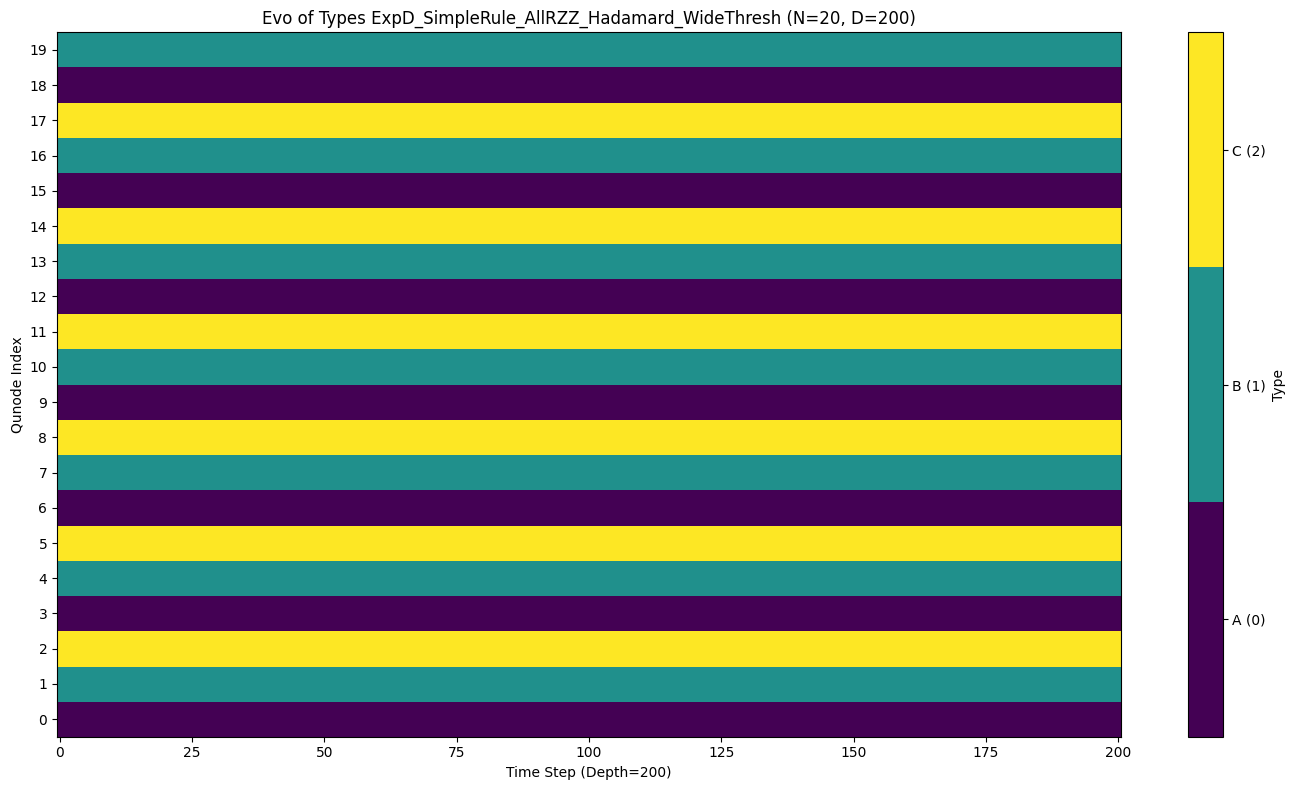

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh.npy

--- Preparing Data & Training LSTM for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh ---
ML Train:X(152, 10, 20),y(152, 20, 3).ML Val:X(39, 10, 20),y(39, 20, 3)
Training LSTM for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh: 100.00%


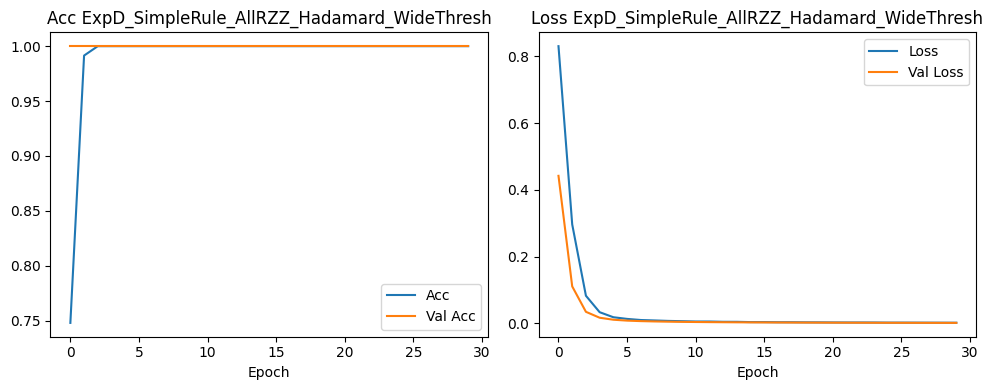



--- LSTM Model Performance Summary ---
---------------------------------------------------
Experiment Label                                        | LSTM Val. Accuracy  
---------------------------------------------------
ExpA_3TypeBaseline_AllCX_Basis_Sensitive                | 100.00%
ExpB_ComplexRule_MixedInteract_Hadamard                 | 100.00%
ExpC_ComplexRule_Basis_NoHomo                           | 100.00%
ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh              | 100.00%
---------------------------------------------------

--- All Experiments and ML Evaluations Complete ---


In [13]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate, SGate, TGate, CCXGate
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm

# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Softmax
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# --- QCA Parameters (Defaults for experiments) ---
N_QUNODES_DEFAULT = 20 # Using the N=16 from your successful run screenshot
DEPTH_DEFAULT = 200    # Using the D=200 from your successful run screenshot

TYPE_A = 0; TYPE_B = 1; TYPE_C = 2
NUM_DISTINCT_TYPES = 3 # Max number of types the system is designed for
GATES = {"H":HGate(),"X":XGate(),"I":IGate(),"S":SGate(),"T":TGate(),"CX":CXGate(),"CZ":CZGate(),
         "SWAP":SwapGate(),"CCX":CCXGate(),"RZZ_PIO4":RZZGate(np.pi/4),"RZZ_PIO2":RZZGate(np.pi/2),
         "RXX_PIO4":RXXGate(np.pi/4),"RYY_PIO4":RYYGate(np.pi/4)}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict, type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"):
        self.num_qunodes=num_qunodes; self.current_types=initial_types.copy(); self.type_history=[self.current_types.copy()]
        self.quantum_outcome_history=[]; self.interaction_config=interaction_config; self.type_update_rule_config=type_update_rule_config
        self.initial_quantum_state_prep=initial_quantum_state_prep; self.simulator=AerSimulator(method='statevector'); self.circuit_visualization_list=[]
    def _get_interaction_unitary(self,t1,t2):
        k=tuple(sorted((t1,t2)))
        if k==(TYPE_A,TYPE_A):return self.interaction_config.get("AA",GATES["I"])
        if k==(TYPE_B,TYPE_B):return self.interaction_config.get("BB",GATES["I"])
        if k==(TYPE_C,TYPE_C):return self.interaction_config.get("CC",GATES["I"])
        if k==(TYPE_A,TYPE_B):return self.interaction_config.get("AB",GATES["I"])
        if k==(TYPE_A,TYPE_C):return self.interaction_config.get("AC",GATES["I"])
        if k==(TYPE_B,TYPE_C):return self.interaction_config.get("BC",GATES["I"])
        return GATES["I"]
    def _build_interaction_circuit(self):
        qc=QuantumCircuit(self.num_qunodes,name=f"QCA_int"); app=False
        if self.initial_quantum_state_prep=="hadamard_all":[qc.h(i)for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep=="basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.x(i)
                elif self.current_types[i]==TYPE_C:qc.x(i)
        elif self.initial_quantum_state_prep=="mixed_A0_BH_CH":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.h(i)
                elif self.current_types[i]==TYPE_C:qc.h(i);qc.x(i)
        if self.num_qunodes>0:qc.barrier(label="init_state")
        for i in range(self.num_qunodes):
            op=self._get_interaction_unitary(self.current_types[i],self.current_types[(i+1)%self.num_qunodes])
            if op is not None and op.name.lower()!='id':qc.append(op,[i,(i+1)%self.num_qunodes]);app=True
        if app and self.num_qunodes>1:qc.barrier(label="int")
        return qc
    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy();cfg = self.type_update_rule_config;r_name = cfg.get("name", "simple_threshold_3types")
        if r_name == "simple_threshold_3types":
            for i in range(self.num_qunodes):
                p1 = quantum_outcomes_p1[i]; cT = self.current_types[i]
                if cT == TYPE_A:
                    if p1 > cfg.get("thresh_A_to_B", 0.6): new_types[i] = TYPE_B
                    elif p1 < cfg.get("thresh_A_to_C", 0.2): new_types[i] = TYPE_C
                elif cT == TYPE_B:
                    if p1 < cfg.get("thresh_B_to_A", 0.4): new_types[i] = TYPE_A
                    elif p1 > cfg.get("thresh_B_to_C", 0.8): new_types[i] = TYPE_C
                elif cT == TYPE_C:
                    if p1 > cfg.get("thresh_C_to_B", 0.55): new_types[i] = TYPE_B
                    elif p1 < cfg.get("thresh_C_to_A", 0.45): new_types[i] = TYPE_A
        elif r_name == "quantum_neighborhood_logic_v1":
            p1_low=cfg.get("p1_low_thresh",0.33);p1_mid_low=cfg.get("p1_mid_low_thresh",0.45)
            p1_mid_high=cfg.get("p1_mid_high_thresh",0.55);p1_high=cfg.get("p1_high_thresh",0.67)
            for i in range(self.num_qunodes):
                my_t,my_p1=self.current_types[i],quantum_outcomes_p1[i]
                l_idx,r_idx=(i-1+self.num_qunodes)%self.num_qunodes,(i+1)%self.num_qunodes
                l_t,r_t=self.current_types[l_idx],self.current_types[r_idx]
                if my_t==TYPE_A:
                    if l_t==TYPE_B and r_t==TYPE_B and my_p1>p1_mid_high:new_types[i]=TYPE_B
                    elif(l_t==TYPE_C or r_t==TYPE_C)and my_p1>p1_high:new_types[i]=TYPE_B
                    elif my_p1<p1_low:new_types[i]=TYPE_C
                elif my_t==TYPE_B:
                    if l_t==TYPE_A and r_t==TYPE_A and my_p1<p1_mid_low:new_types[i]=TYPE_A
                    elif(l_t==TYPE_C or r_t==TYPE_C)and my_p1<p1_low:new_types[i]=TYPE_A
                    elif my_p1>p1_high:new_types[i]=TYPE_C
                elif my_t==TYPE_C:
                    if l_t==TYPE_A and r_t==TYPE_A:new_types[i]=TYPE_A
                    elif l_t==TYPE_B and r_t==TYPE_B:new_types[i]=TYPE_B
                    elif my_p1<p1_mid_low:new_types[i]=TYPE_A
                    elif my_p1>p1_mid_high:new_types[i]=TYPE_B
        return new_types
    def step(self):
        interaction_qc=self._build_interaction_circuit()
        if not self.circuit_visualization_list:self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj=Statevector(interaction_qc);p1_out=np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):p_qi=final_statevector_obj.probabilities([i]);p1_out[i]=p_qi[1]if len(p_qi)==2 else 0.0
        self.quantum_outcome_history.append(p1_out.copy());new_T=self._apply_type_update_rule(p1_out)
        self.current_types=new_T;self.type_history.append(self.current_types.copy());return p1_out
    def run(self,n_steps,verbose=False):
        if verbose:print("Init Types:",self.current_types)
        try:it_range=tqdm(range(n_steps),desc=f"QCA({self.num_qunodes}Q)")
        except NameError:it_range=range(n_steps);print("tqdm missing.")
        for sn in it_range:
            o=self.step()
            if verbose:print(f"St{sn+1}/{n_steps}-P1:{np.round(o,2)},NewT:{self.current_types}")
            elif not isinstance(it_range,range):pass
            elif(sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1:print(f" QCA St {sn+1}/{n_steps} done...")
        if not isinstance(it_range,range):it_range.close()
        if verbose or isinstance(it_range,range)and not((sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1):print("QCA Sim Done.")
    def get_type_history_as_array(self):return np.array(self.type_history)

    def plot_type_evolution(self, title_suffix="", experiment_label=""): # CORRECTED SIGNATURE
        history_arr=self.get_type_history_as_array();fig_w=max(12,history_arr.shape[0]*0.07);fig_h=max(5,self.num_qunodes*0.4)
        plt.figure(figsize=(fig_w,fig_h));

        num_distinct_types_in_data = len(np.unique(history_arr))
        # Max types the system is designed for (for consistent cmap)
        max_possible_types = NUM_DISTINCT_TYPES if 'NUM_DISTINCT_TYPES' in globals() else num_distinct_types_in_data
        if max_possible_types == 0 : max_possible_types = 1 # Avoid cmap error for empty history

        cmap = plt.cm.get_cmap('viridis', max_possible_types)

        # Ensure vmin and vmax cover all potential types for consistent coloring
        plt.imshow(history_arr.T,cmap=cmap,aspect='auto',interpolation='nearest',origin='lower',
                   vmin=TYPE_A - 0.5, vmax=max(TYPE_A,TYPE_B,TYPE_C) + 0.5)
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})");plt.ylabel("Qunode Index");
        title_to_display = f"Evo of Types {experiment_label}{title_suffix}"
        plt.title(title_to_display);

        # Colorbar setup to show A, B, C if they are among the NUM_DISTINCT_TYPES
        defined_type_values = [TYPE_A, TYPE_B, TYPE_C][:NUM_DISTINCT_TYPES] # Ticks for defined types
        defined_type_labels = [f'{chr(65+i)} ({i})' for i in defined_type_values]

        cbar = plt.colorbar(label="Type", ticks=defined_type_values);
        cbar.ax.set_yticklabels(defined_type_labels)

        plt.yticks(np.arange(self.num_qunodes));
        plt.tight_layout();
        plt.show()

    def visualize_example_interaction_circuit(self):
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- ML Data Preparation ---
def create_sequences(data, window_size): # ... (Same)
    X, y = [], [];
    for i in range(len(data)-window_size):X.append(data[i:i+window_size]);y.append(data[i+window_size])
    return np.array(X),np.array(y)

# --- Main Execution ---
if __name__ == "__main__":
    output_base_dir = "qca_multi_rule_eval_final_fix"
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    experiments_to_run = [
        {
            "label": "ExpA_3TypeBaseline_AllCX_Basis_Sensitive", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "seed_A", "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA":GATES["CX"],"BB":GATES["CX"],"CC":GATES["CX"], "AB":GATES["CX"],"AC":GATES["CX"],"BC":GATES["CX"]},
            "type_update_rule_config": {"name":"simple_threshold_3types", "thresh_A_to_B":0.501,"thresh_A_to_C":0.05,"thresh_B_to_A":0.499,"thresh_B_to_C":0.95,"thresh_C_to_A":0.45,"thresh_C_to_B":0.55}
        },
        {
            "label": "ExpB_ComplexRule_MixedInteract_Hadamard", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "random_ABC", "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": {"AA":GATES["RXX_PIO4"],"BB":GATES["RYY_PIO4"],"CC":GATES["SWAP"],"AB":GATES["RZZ_PIO2"],"AC":GATES["CZ"],"BC":GATES["CX"]},
            "type_update_rule_config": {"name":"quantum_neighborhood_logic_v1","p1_low_thresh":0.30,"p1_mid_low_thresh":0.48,"p1_mid_high_thresh":0.52,"p1_high_thresh":0.70}
        },
        {
            "label": "ExpC_ComplexRule_Basis_NoHomo", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "seed_C_in_AB_alternating", "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA":GATES["I"],"BB":GATES["I"],"CC":GATES["I"],"AB":GATES["RZZ_PIO2"],"AC":GATES["CX"],"BC":GATES["CZ"]},
            "type_update_rule_config": {"name":"quantum_neighborhood_logic_v1","p1_low_thresh":0.25,"p1_mid_low_thresh":0.45,"p1_mid_high_thresh":0.55,"p1_high_thresh":0.75}
        },
        {
            "label": "ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "alternating_ABC", "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": {"AA":GATES["RZZ_PIO4"],"BB":GATES["RZZ_PIO4"],"CC":GATES["RZZ_PIO4"],"AB":GATES["RZZ_PIO4"],"AC":GATES["RZZ_PIO4"],"BC":GATES["RZZ_PIO4"]},
            "type_update_rule_config": {"name":"simple_threshold_3types","thresh_A_to_B":0.65,"thresh_A_to_C":0.15,"thresh_B_to_A":0.35,"thresh_B_to_C":0.85,"thresh_C_to_A":0.30,"thresh_C_to_B":0.70}
        }
    ]
    ml_results_summary = []
    for exp_config in experiments_to_run:
        print(f"\n\n===== Running Experiment: {exp_config['label']} ====="); np.random.seed(42)
        n_q = exp_config["n_qunodes"]
        if exp_config["initial_types_pattern"]=="random_ABC":initial_types=np.random.choice([TYPE_A,TYPE_B,TYPE_C],size=n_q)
        elif exp_config["initial_types_pattern"]=="alternating_ABC":initial_types=np.array([(TYPE_A if i%3==0 else(TYPE_B if i%3==1 else TYPE_C))for i in range(n_q)])
        elif exp_config["initial_types_pattern"]=="seed_A":initial_types=np.full(n_q,TYPE_A,dtype=int);initial_types[n_q//2 if n_q>0 else 0]=TYPE_B
        elif exp_config["initial_types_pattern"]=="seed_C_in_AB_alternating":initial_types=np.array([(TYPE_A if i%2==0 else TYPE_B)for i in range(n_q)]);initial_types[n_q//2 if n_q>0 else 0]=TYPE_C
        else:initial_types=np.random.choice([TYPE_A,TYPE_B,TYPE_C],size=n_q)
        qca = QuantumCellularAutomaton(
            num_qunodes=n_q, initial_types=initial_types,
            interaction_config=exp_config["interaction_config"],
            type_update_rule_config=exp_config["type_update_rule_config"],
            initial_quantum_state_prep=exp_config["initial_quantum_state_prep"])
        run_st_tm=time.time(); qca.run(exp_config["depth"],verbose=False); run_end_tm=time.time()
        print(f"QCA run for {exp_config['label']} took {run_end_tm-run_st_tm:.2f}s.")
        qca.plot_type_evolution(title_suffix=f" (N={n_q}, D={exp_config['depth']})", experiment_label=exp_config['label'])
        type_history_data = qca.get_type_history_as_array()
        history_fn = os.path.join(output_base_dir,f"type_history_{exp_config['label']}.npy"); np.save(history_fn,type_history_data)
        print(f"Type history saved to {history_fn}")
        print(f"\n--- Preparing Data & Training LSTM for {exp_config['label']} ---")
        WINDOW_SIZE_ML=10; X_sequences,y_sequences=create_sequences(type_history_data,WINDOW_SIZE_ML)
        lstm_accuracy = "N/A (Not enough data)"
        if X_sequences.shape[0] < 20: print(f"Not enough sequences ({X_sequences.shape[0]}) for ML. Skipping LSTM.")
        else:
            y_sequences_one_hot=to_categorical(y_sequences,num_classes=NUM_DISTINCT_TYPES)
            split_idx=int(0.8*X_sequences.shape[0]); X_train_ml,X_val_ml=X_sequences[:split_idx],X_sequences[split_idx:]
            y_train_ml,y_val_ml=y_sequences_one_hot[:split_idx],y_sequences_one_hot[split_idx:]
            print(f"ML Train:X{X_train_ml.shape},y{y_train_ml.shape}.ML Val:X{X_val_ml.shape},y{y_val_ml.shape}")
            model=Sequential([ LSTM(128,input_shape=(WINDOW_SIZE_ML,n_q),return_sequences=True),Dropout(0.2),
                               LSTM(64,return_sequences=False),Dropout(0.2), Dense(n_q*NUM_DISTINCT_TYPES),
                               Reshape((n_q,NUM_DISTINCT_TYPES)), Softmax(axis=-1)])
            model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
            if X_train_ml.shape[0]>0 and X_val_ml.shape[0]>0:
                print(f"Training LSTM for {exp_config['label']}...")
                history=model.fit(X_train_ml,y_train_ml,epochs=30,batch_size=16,validation_data=(X_val_ml,y_val_ml),verbose=0)
                loss,acc=model.evaluate(X_val_ml,y_val_ml,verbose=0); lstm_accuracy = f"{acc*100:.2f}%"
                print(f"LSTM Val Acc for {exp_config['label']}: {lstm_accuracy}")
                plt.figure(figsize=(10,4)); plt.subplot(1,2,1); plt.plot(history.history['accuracy'],label='Acc'); plt.plot(history.history['val_accuracy'],label='Val Acc'); plt.title(f'Acc {exp_config["label"]}'); plt.xlabel('Epoch'); plt.legend()
                plt.subplot(1,2,2); plt.plot(history.history['loss'],label='Loss'); plt.plot(history.history['val_loss'],label='Val Loss'); plt.title(f'Loss {exp_config["label"]}'); plt.xlabel('Epoch'); plt.legend(); plt.tight_layout(); plt.show()
            else: print(f"Not enough train/val samples for LSTM for {exp_config['label']}.")
        ml_results_summary.append({"experiment_label": exp_config['label'], "lstm_val_accuracy": lstm_accuracy})

    print("\n\n--- LSTM Model Performance Summary ---")
    print("---------------------------------------------------");print(f"{'Experiment Label':<55} | {'LSTM Val. Accuracy':<20}");print("---------------------------------------------------")
    for res in ml_results_summary: print(f"{res['experiment_label']:<55} | {res['lstm_val_accuracy']}")
    print("---------------------------------------------------")
    print("\n--- All Experiments and ML Evaluations Complete ---")



===== Running Experiment: ExpA_3TypeBaseline_AllCX_Basis_Sensitive =====


QCA(16Q): 100%|██████████| 200/200 [00:15<00:00, 12.95it/s]
<ipython-input-15-77e19f2b9cbc>:132: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpA_3TypeBaseline_AllCX_Basis_Sensitive took 15.45s.


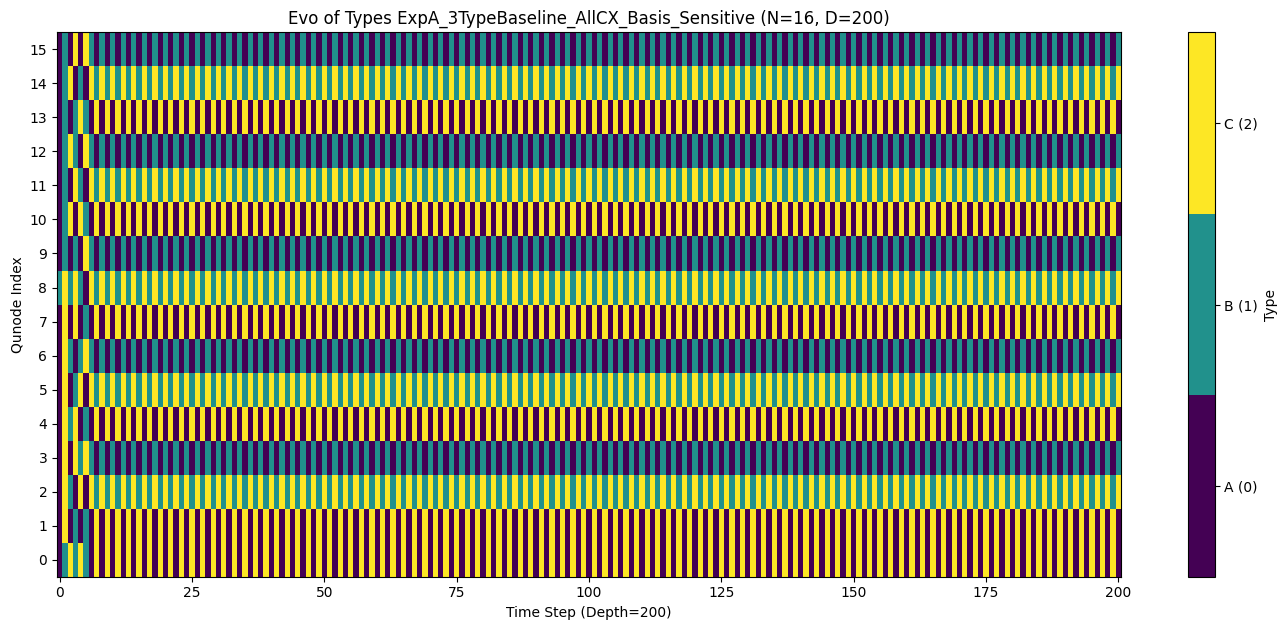

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpA_3TypeBaseline_AllCX_Basis_Sensitive.npy

--- Preparing Data & Training LSTM for ExpA_3TypeBaseline_AllCX_Basis_Sensitive ---
ML Train:X(152, 10, 16),y(152, 16, 3).ML Val:X(39, 10, 16),y(39, 16, 3)
Training LSTM for ExpA_3TypeBaseline_AllCX_Basis_Sensitive...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpA_3TypeBaseline_AllCX_Basis_Sensitive: 100.00%


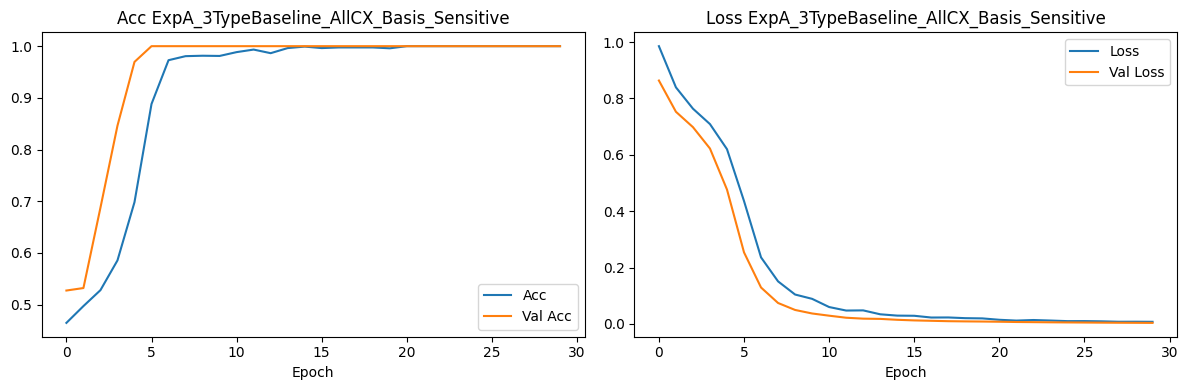



===== Running Experiment: ExpB_ComplexRule_MixedInteract_Hadamard =====


QCA(16Q): 100%|██████████| 200/200 [00:11<00:00, 16.72it/s]
<ipython-input-15-77e19f2b9cbc>:132: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpB_ComplexRule_MixedInteract_Hadamard took 11.97s.


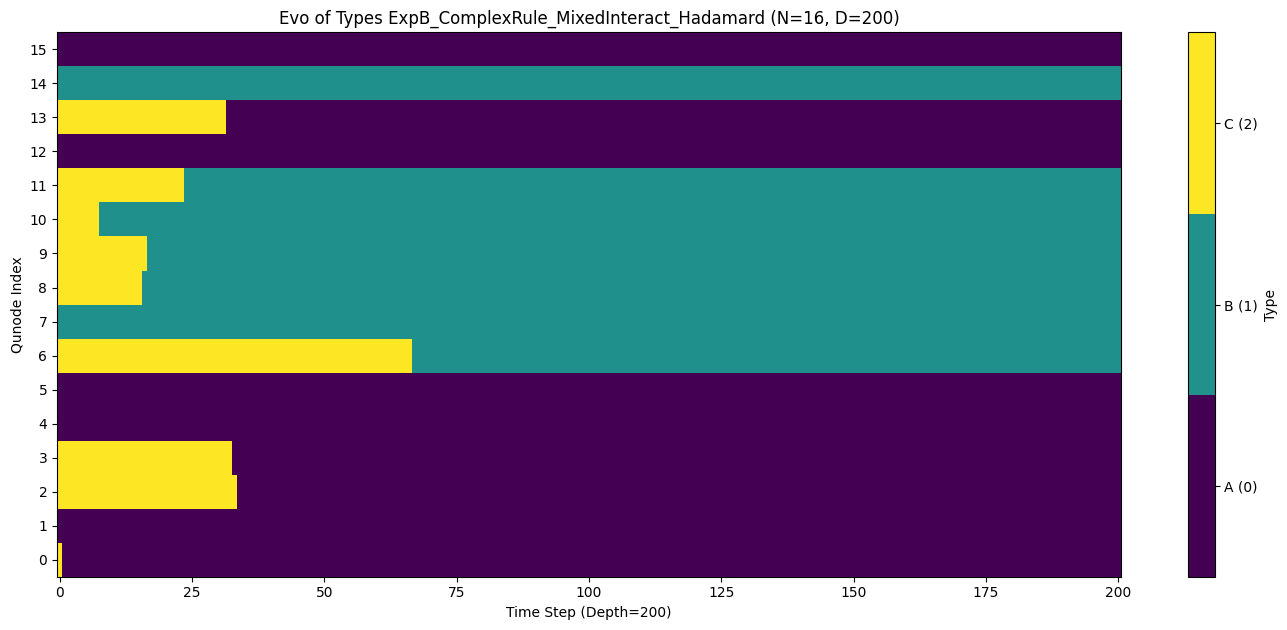

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpB_ComplexRule_MixedInteract_Hadamard.npy

--- Preparing Data & Training LSTM for ExpB_ComplexRule_MixedInteract_Hadamard ---
ML Train:X(152, 10, 16),y(152, 16, 3).ML Val:X(39, 10, 16),y(39, 16, 3)
Training LSTM for ExpB_ComplexRule_MixedInteract_Hadamard...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpB_ComplexRule_MixedInteract_Hadamard: 100.00%


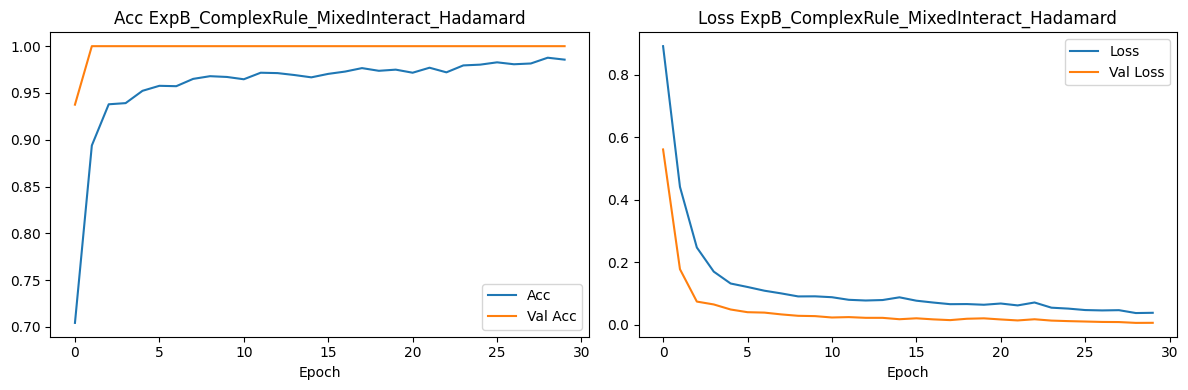



===== Running Experiment: ExpC_ComplexRule_Basis_NoHomo =====


QCA(16Q): 100%|██████████| 200/200 [00:09<00:00, 20.09it/s]
<ipython-input-15-77e19f2b9cbc>:132: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpC_ComplexRule_Basis_NoHomo took 9.96s.


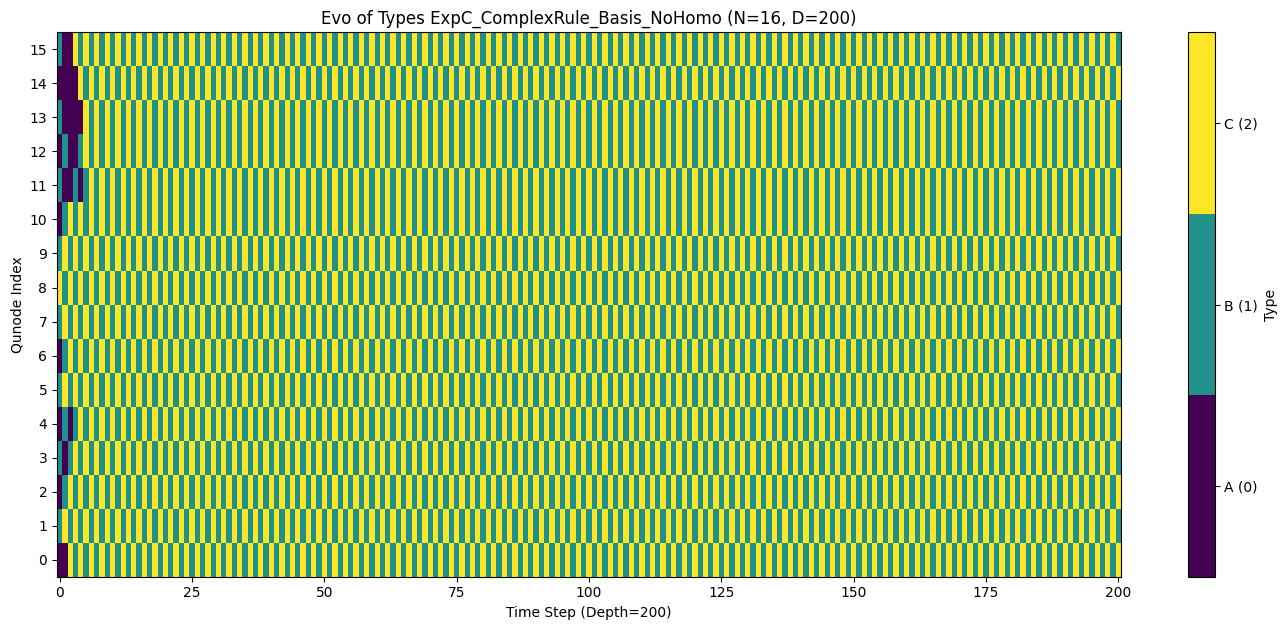

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpC_ComplexRule_Basis_NoHomo.npy

--- Preparing Data & Training LSTM for ExpC_ComplexRule_Basis_NoHomo ---
ML Train:X(152, 10, 16),y(152, 16, 3).ML Val:X(39, 10, 16),y(39, 16, 3)
Training LSTM for ExpC_ComplexRule_Basis_NoHomo...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpC_ComplexRule_Basis_NoHomo: 100.00%


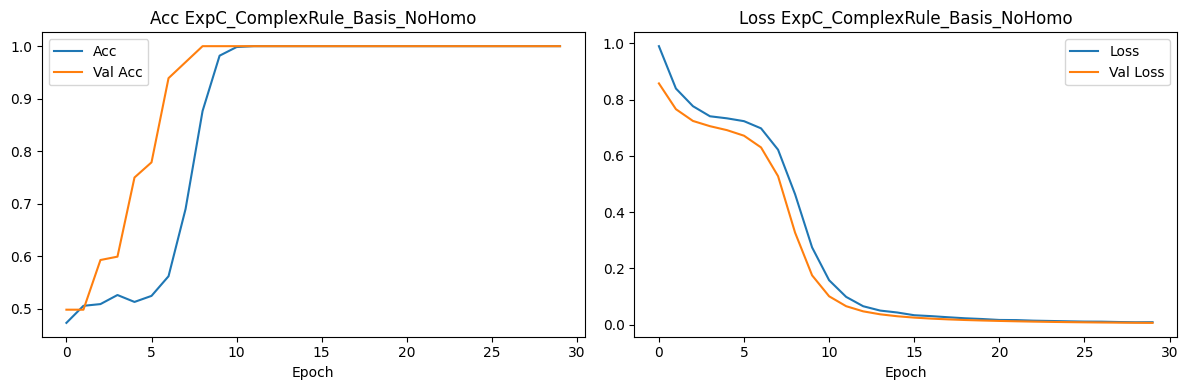



===== Running Experiment: ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh =====


QCA(16Q): 100%|██████████| 200/200 [00:11<00:00, 17.49it/s]
<ipython-input-15-77e19f2b9cbc>:132: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh took 11.45s.


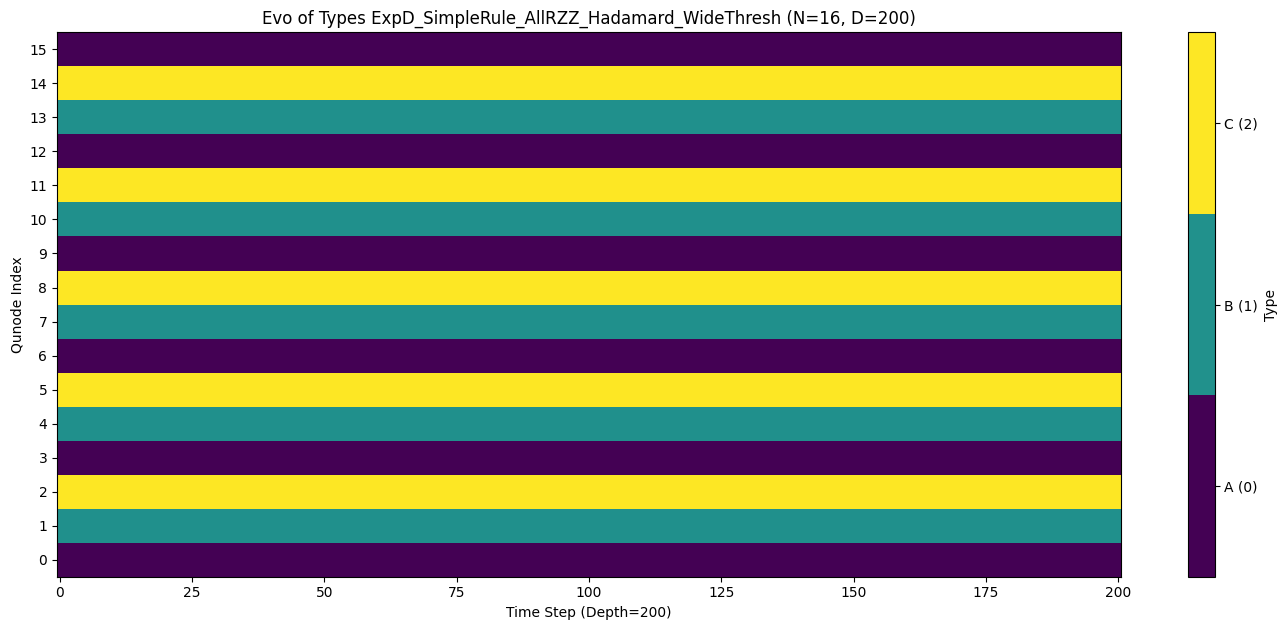

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh.npy

--- Preparing Data & Training LSTM for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh ---
ML Train:X(152, 10, 16),y(152, 16, 3).ML Val:X(39, 10, 16),y(39, 16, 3)
Training LSTM for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh: 100.00%


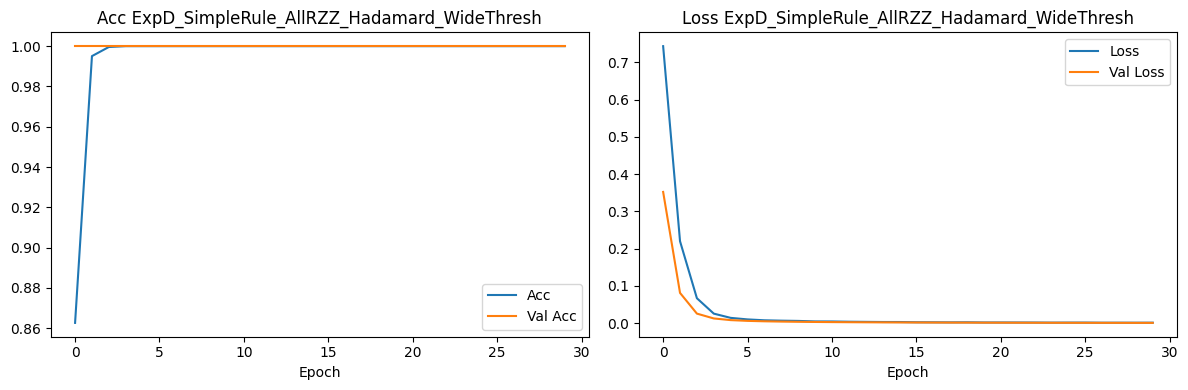



--- LSTM Model Performance Summary ---
---------------------------------------------------
Experiment Label                                             | LSTM Val. Accuracy  
---------------------------------------------------
ExpA_3TypeBaseline_AllCX_Basis_Sensitive                     | 100.00%
ExpB_ComplexRule_MixedInteract_Hadamard                      | 100.00%
ExpC_ComplexRule_Basis_NoHomo                                | 100.00%
ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh                   | 100.00%
---------------------------------------------------

--- All Experiments and ML Evaluations Complete ---


In [15]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate, SGate, TGate, CCXGate
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm

# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Softmax
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# --- QCA Parameters (Defaults for experiments) ---
N_QUNODES_DEFAULT = 16 # Matching your successful image's N
DEPTH_DEFAULT = 200    # Matching your successful image's D

TYPE_A = 0; TYPE_B = 1; TYPE_C = 2
NUM_DISTINCT_TYPES = 3
GATES = {"H":HGate(),"X":XGate(),"I":IGate(),"S":SGate(),"T":TGate(),"CX":CXGate(),"CZ":CZGate(),
         "SWAP":SwapGate(),"CCX":CCXGate(),"RZZ_PIO4":RZZGate(np.pi/4),"RZZ_PIO2":RZZGate(np.pi/2),
         "RXX_PIO4":RXXGate(np.pi/4),"RYY_PIO4":RYYGate(np.pi/4)}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict, type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"):
        self.num_qunodes=num_qunodes; self.current_types=initial_types.copy(); self.type_history=[self.current_types.copy()]
        self.quantum_outcome_history=[]; self.interaction_config=interaction_config; self.type_update_rule_config=type_update_rule_config
        self.initial_quantum_state_prep=initial_quantum_state_prep; self.simulator=AerSimulator(method='statevector'); self.circuit_visualization_list=[]
    def _get_interaction_unitary(self,t1,t2):
        k=tuple(sorted((t1,t2)))
        if k==(TYPE_A,TYPE_A):return self.interaction_config.get("AA",GATES["I"])
        if k==(TYPE_B,TYPE_B):return self.interaction_config.get("BB",GATES["I"])
        if k==(TYPE_C,TYPE_C):return self.interaction_config.get("CC",GATES["I"])
        if k==(TYPE_A,TYPE_B):return self.interaction_config.get("AB",GATES["I"])
        if k==(TYPE_A,TYPE_C):return self.interaction_config.get("AC",GATES["I"])
        if k==(TYPE_B,TYPE_C):return self.interaction_config.get("BC",GATES["I"])
        return GATES["I"]
    def _build_interaction_circuit(self):
        qc=QuantumCircuit(self.num_qunodes,name=f"QCA_int"); app=False
        if self.initial_quantum_state_prep=="hadamard_all":[qc.h(i)for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep=="basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.x(i)
                elif self.current_types[i]==TYPE_C:qc.x(i)
        elif self.initial_quantum_state_prep=="mixed_A0_BH_CH":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.h(i)
                elif self.current_types[i]==TYPE_C:qc.h(i);qc.x(i)
        if self.num_qunodes>0:qc.barrier(label="init_state")
        for i in range(self.num_qunodes):
            op=self._get_interaction_unitary(self.current_types[i],self.current_types[(i+1)%self.num_qunodes])
            if op is not None and op.name.lower()!='id':qc.append(op,[i,(i+1)%self.num_qunodes]);app=True
        if app and self.num_qunodes>1:qc.barrier(label="int")
        return qc
    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy();cfg = self.type_update_rule_config;r_name = cfg.get("name", "simple_threshold_3types")
        if r_name == "simple_threshold_3types":
            for i in range(self.num_qunodes):
                p1 = quantum_outcomes_p1[i]; cT = self.current_types[i]
                if cT == TYPE_A:
                    if p1 > cfg.get("thresh_A_to_B", 0.6): new_types[i] = TYPE_B
                    elif p1 < cfg.get("thresh_A_to_C", 0.2): new_types[i] = TYPE_C
                elif cT == TYPE_B:
                    if p1 < cfg.get("thresh_B_to_A", 0.4): new_types[i] = TYPE_A
                    elif p1 > cfg.get("thresh_B_to_C", 0.8): new_types[i] = TYPE_C
                elif cT == TYPE_C:
                    if p1 > cfg.get("thresh_C_to_B", 0.55): new_types[i] = TYPE_B
                    elif p1 < cfg.get("thresh_C_to_A", 0.45): new_types[i] = TYPE_A
        elif r_name == "quantum_neighborhood_logic_v1":
            p1_low=cfg.get("p1_low_thresh",0.33);p1_mid_low=cfg.get("p1_mid_low_thresh",0.45)
            p1_mid_high=cfg.get("p1_mid_high_thresh",0.55);p1_high=cfg.get("p1_high_thresh",0.67)
            prob_boundary_flip=cfg.get("prob_boundary_flip",0.15);prob_C_decay=cfg.get("prob_C_decay",0.05)
            for i in range(self.num_qunodes):
                my_t,my_p1=self.current_types[i],quantum_outcomes_p1[i]
                l_idx,r_idx=(i-1+self.num_qunodes)%self.num_qunodes,(i+1)%self.num_qunodes
                l_t,r_t=self.current_types[l_idx],self.current_types[r_idx]
                l_p1_dev,r_p1_dev=quantum_outcomes_p1[l_idx]-0.5,quantum_outcomes_p1[r_idx]-0.5
                if my_t==TYPE_A:
                    if my_p1>p1_high:new_types[i]=TYPE_B
                    elif(l_t==TYPE_B and l_p1_dev > cfg.get("sensitivity",0.1)*cfg.get("neighbor_influence_factor",0.5) and np.random.rand()<prob_boundary_flip)or\
                         (r_t==TYPE_B and r_p1_dev > cfg.get("sensitivity",0.1)*cfg.get("neighbor_influence_factor",0.5) and np.random.rand()<prob_boundary_flip):new_types[i]=TYPE_B
                    elif my_p1<p1_low and(l_t==TYPE_C or r_t==TYPE_C):new_types[i]=TYPE_C
                elif my_t==TYPE_B:
                    if my_p1<p1_low:new_types[i]=TYPE_A
                    elif(l_t==TYPE_A and l_p1_dev < -cfg.get("sensitivity",0.1)*cfg.get("neighbor_influence_factor",0.5) and np.random.rand()<prob_boundary_flip)or\
                         (r_t==TYPE_A and r_p1_dev < -cfg.get("sensitivity",0.1)*cfg.get("neighbor_influence_factor",0.5) and np.random.rand()<prob_boundary_flip):new_types[i]=TYPE_A
                    elif my_p1>p1_high and(l_t!=TYPE_B or r_t!=TYPE_B):new_types[i]=TYPE_C
                elif my_t==TYPE_C:
                    if l_t==TYPE_A and r_t==TYPE_A:new_types[i]=TYPE_A
                    elif l_t==TYPE_B and r_t==TYPE_B:new_types[i]=TYPE_B
                    elif my_p1<p1_mid_low:new_types[i]=TYPE_A
                    elif my_p1>p1_mid_high:new_types[i]=TYPE_B
                    elif np.random.rand()<prob_C_decay:new_types[i]=TYPE_A if np.random.rand()<0.5 else TYPE_B
        return new_types
    def step(self):
        interaction_qc=self._build_interaction_circuit()
        if not self.circuit_visualization_list:self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj=Statevector(interaction_qc);p1_out=np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):p_qi=final_statevector_obj.probabilities([i]);p1_out[i]=p_qi[1]if len(p_qi)==2 else 0.0
        self.quantum_outcome_history.append(p1_out.copy());new_T=self._apply_type_update_rule(p1_out)
        self.current_types=new_T;self.type_history.append(self.current_types.copy());return p1_out
    def run(self,n_steps,verbose=False):
        if verbose:print("Init Types:",self.current_types)
        try:it_range=tqdm(range(n_steps),desc=f"QCA({self.num_qunodes}Q)")
        except NameError:it_range=range(n_steps);print("tqdm missing.")
        for sn in it_range:
            o=self.step()
            if verbose:print(f"St{sn+1}/{n_steps}-P1:{np.round(o,2)},NewT:{self.current_types}")
            elif not isinstance(it_range,range):pass
            elif(sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1:print(f" QCA St {sn+1}/{n_steps} done...")
        if not isinstance(it_range,range):it_range.close()
        if verbose or isinstance(it_range,range)and not((sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1):print("QCA Sim Done.")
    def get_type_history_as_array(self):return np.array(self.type_history)

    def plot_type_evolution(self, title_suffix="", experiment_label=""): # CORRECTED SIGNATURE
        history_arr=self.get_type_history_as_array();fig_w=max(12,history_arr.shape[0]*0.07);fig_h=max(5,self.num_qunodes*0.4)
        plt.figure(figsize=(fig_w,fig_h));
        num_distinct_types_in_data = len(np.unique(history_arr))
        max_possible_types = NUM_DISTINCT_TYPES if 'NUM_DISTINCT_TYPES' in globals() else 3 # Fallback to 3
        cmap_num_colors = max_possible_types if max_possible_types >= num_distinct_types_in_data and num_distinct_types_in_data > 0 else num_distinct_types_in_data
        if cmap_num_colors == 0: cmap_num_colors = 1
        if num_distinct_types_in_data == 1 and cmap_num_colors < 2 : cmap_num_colors = 2
        if max_possible_types == 1 and num_distinct_types_in_data == 1: cmap_num_colors = 2
        cmap = plt.cm.get_cmap('viridis', cmap_num_colors)
        plt.imshow(history_arr.T,cmap=cmap,aspect='auto',interpolation='nearest',origin='lower',
                   vmin=TYPE_A - 0.5, vmax=max(TYPE_A,TYPE_B,TYPE_C) + 0.5)
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})");plt.ylabel("Qunode Index");
        title_to_display = f"Evo of Types {experiment_label}{title_suffix}"
        plt.title(title_to_display);
        defined_type_values = sorted(list(np.unique(history_arr).astype(int)))
        if not defined_type_values and max_possible_types > 0 : defined_type_values = list(range(max_possible_types))
        elif not defined_type_values : defined_type_values = [0]
        type_tick_labels = [f'{chr(65+i)} ({i})' for i in defined_type_values if 0 <= i < 26]
        if defined_type_values :
            cbar = plt.colorbar(label="Type", ticks=defined_type_values);
            cbar.ax.set_yticklabels(type_tick_labels)
        else: plt.colorbar(label="Type")
        plt.yticks(np.arange(self.num_qunodes));plt.tight_layout();plt.show()

    def visualize_example_interaction_circuit(self):
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- ML Data Preparation ---
def create_sequences(data, window_size):
    X, y = [], [];
    for i in range(len(data)-window_size):X.append(data[i:i+window_size]);y.append(data[i+window_size])
    return np.array(X),np.array(y)

# --- Main Execution ---
if __name__ == "__main__":
    output_base_dir = "qca_multi_rule_eval_final_fix"
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    # --- Control Flags ---
    PLOT_KERNEL_MATRICES = False # Not used in this script, but kept for consistency if merging
    PLOT_DATASET_VIS = False     # Not plotting raw dataset in this script
    PLOT_DECISION_BOUNDARIES = False # Not plotting SVM boundaries

    experiments_to_run = [
        {
            "label": "ExpA_3TypeBaseline_AllCX_Basis_Sensitive", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "seed_A", "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA":GATES["CX"],"BB":GATES["CX"],"CC":GATES["CX"], "AB":GATES["CX"],"AC":GATES["CX"],"BC":GATES["CX"]},
            "type_update_rule_config": {"name":"simple_threshold_3types", "thresh_A_to_B":0.501,"thresh_A_to_C":0.05,"thresh_B_to_A":0.499,"thresh_B_to_C":0.95,"thresh_C_to_A":0.45,"thresh_C_to_B":0.55}
        },
        {
            "label": "ExpB_ComplexRule_MixedInteract_Hadamard", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "random_ABC", "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": {"AA":GATES["RXX_PIO4"],"BB":GATES["RYY_PIO4"],"CC":GATES["SWAP"],"AB":GATES["RZZ_PIO2"],"AC":GATES["CZ"],"BC":GATES["CX"]},
            "type_update_rule_config": {"name":"quantum_neighborhood_logic_v1","sensitivity":0.15,"neighbor_influence_factor":0.5,"prob_C_decay":0.02}
        },
        {
            "label": "ExpC_ComplexRule_Basis_NoHomo", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "seed_C_in_AB_alternating", "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA":GATES["I"],"BB":GATES["I"],"CC":GATES["I"],"AB":GATES["RZZ_PIO2"],"AC":GATES["CX"],"BC":GATES["CZ"]},
            "type_update_rule_config": {"name":"quantum_neighborhood_logic_v1","sensitivity":0.20,"neighbor_influence_factor":0.6,"prob_boundary_flip":0.35,"prob_C_decay":0.1}
        },
        {
            "label": "ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "alternating_ABC", "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": {"AA":GATES["RZZ_PIO4"],"BB":GATES["RZZ_PIO4"],"CC":GATES["RZZ_PIO4"],"AB":GATES["RZZ_PIO4"],"AC":GATES["RZZ_PIO4"],"BC":GATES["RZZ_PIO4"]},
            "type_update_rule_config": {"name":"simple_threshold_3types","thresh_A_to_B":0.65,"thresh_A_to_C":0.15,"thresh_B_to_A":0.35,"thresh_B_to_C":0.85,"thresh_C_to_A":0.30,"thresh_C_to_B":0.70}
        }
    ]
    ml_results_summary = []
    for exp_config in experiments_to_run:
        print(f"\n\n===== Running Experiment: {exp_config['label']} ====="); np.random.seed(42)
        n_q = exp_config["n_qunodes"]
        if exp_config["initial_types_pattern"]=="random_ABC":initial_types=np.random.choice([TYPE_A,TYPE_B,TYPE_C],size=n_q)
        elif exp_config["initial_types_pattern"]=="alternating_ABC":initial_types=np.array([(TYPE_A if i%3==0 else(TYPE_B if i%3==1 else TYPE_C))for i in range(n_q)])
        elif exp_config["initial_types_pattern"]=="seed_A":initial_types=np.full(n_q,TYPE_A,dtype=int);initial_types[n_q//2 if n_q>0 else 0]=TYPE_B
        elif exp_config["initial_types_pattern"]=="seed_C_in_AB_alternating":initial_types=np.array([(TYPE_A if i%2==0 else TYPE_B)for i in range(n_q)]);initial_types[n_q//2 if n_q>0 else 0]=TYPE_C
        else:initial_types=np.random.choice([TYPE_A,TYPE_B,TYPE_C],size=n_q)
        qca = QuantumCellularAutomaton(
            num_qunodes=n_q, initial_types=initial_types,
            interaction_config=exp_config["interaction_config"],
            type_update_rule_config=exp_config["type_update_rule_config"],
            initial_quantum_state_prep=exp_config["initial_quantum_state_prep"])
        run_st_tm=time.time(); qca.run(exp_config["depth"],verbose=False); run_end_tm=time.time()
        print(f"QCA run for {exp_config['label']} took {run_end_tm-run_st_tm:.2f}s.")
        qca.plot_type_evolution(title_suffix=f" (N={n_q}, D={exp_config['depth']})", experiment_label=exp_config['label'])
        type_history_data = qca.get_type_history_as_array()
        history_fn = os.path.join(output_base_dir,f"type_history_{exp_config['label']}.npy"); np.save(history_fn,type_history_data)
        print(f"Type history saved to {history_fn}")
        print(f"\n--- Preparing Data & Training LSTM for {exp_config['label']} ---")
        WINDOW_SIZE_ML=10; X_sequences,y_sequences=create_sequences(type_history_data,WINDOW_SIZE_ML)
        lstm_accuracy = "N/A (Not enough data)"
        if X_sequences.shape[0] < 20: print(f"Not enough sequences ({X_sequences.shape[0]}) for ML. Skipping LSTM.")
        else:
            y_sequences_one_hot=to_categorical(y_sequences,num_classes=NUM_DISTINCT_TYPES)
            split_idx=int(0.8*X_sequences.shape[0]); X_train_ml,X_val_ml=X_sequences[:split_idx],X_sequences[split_idx:]
            y_train_ml,y_val_ml=y_sequences_one_hot[:split_idx],y_sequences_one_hot[split_idx:]
            if X_train_ml.shape[0] == 0 or X_val_ml.shape[0] == 0:
                print(f"Not enough train/val samples after split for {exp_config['label']}. Skipping LSTM.")
                lstm_accuracy = "N/A (Split too small)"
            else:
                print(f"ML Train:X{X_train_ml.shape},y{y_train_ml.shape}.ML Val:X{X_val_ml.shape},y{y_val_ml.shape}")
                model=Sequential([ LSTM(128,input_shape=(WINDOW_SIZE_ML,n_q),return_sequences=True),Dropout(0.2),
                                   LSTM(64,return_sequences=False),Dropout(0.2), Dense(n_q*NUM_DISTINCT_TYPES),
                                   Reshape((n_q,NUM_DISTINCT_TYPES)), Softmax(axis=-1)])
                model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
                print(f"Training LSTM for {exp_config['label']}...")
                history=model.fit(X_train_ml,y_train_ml,epochs=30,batch_size=16,validation_data=(X_val_ml,y_val_ml),verbose=0)
                loss,acc=model.evaluate(X_val_ml,y_val_ml,verbose=0); lstm_accuracy = f"{acc*100:.2f}%"
                print(f"LSTM Val Acc for {exp_config['label']}: {lstm_accuracy}")
                plt.figure(figsize=(12,4)); plt.subplot(1,2,1); plt.plot(history.history['accuracy'],label='Acc'); plt.plot(history.history['val_accuracy'],label='Val Acc'); plt.title(f'Acc {exp_config["label"]}'); plt.xlabel('Epoch'); plt.legend()
                plt.subplot(1,2,2); plt.plot(history.history['loss'],label='Loss'); plt.plot(history.history['val_loss'],label='Val Loss'); plt.title(f'Loss {exp_config["label"]}'); plt.xlabel('Epoch'); plt.legend(); plt.tight_layout(); plt.show()
        ml_results_summary.append({"experiment_label": exp_config['label'], "lstm_val_accuracy": lstm_accuracy})

    print("\n\n--- LSTM Model Performance Summary ---")
    print("---------------------------------------------------");print(f"{'Experiment Label':<60} | {'LSTM Val. Accuracy':<20}");print("---------------------------------------------------") # Adjusted width
    for res in ml_results_summary: print(f"{res['experiment_label']:<60} | {res['lstm_val_accuracy']}")
    print("---------------------------------------------------")
    print("\n--- All Experiments and ML Evaluations Complete ---")



===== Running Experiment: ExpA_Baseline_AllCX_Basis_Sensitive =====


QCA(16Q): 100%|██████████| 150/150 [00:16<00:00,  9.27it/s]
<ipython-input-17-ca70bdbcf9ec>:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpA_Baseline_AllCX_Basis_Sensitive took 16.19s.


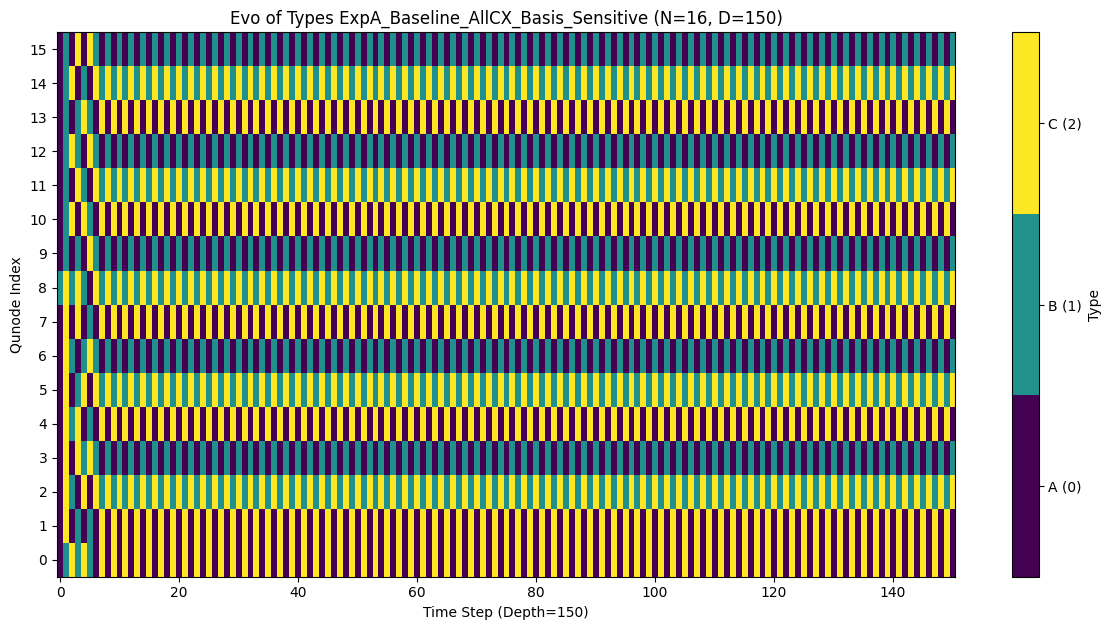

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpA_Baseline_AllCX_Basis_Sensitive.npy

--- Preparing Data & Training LSTM for ExpA_Baseline_AllCX_Basis_Sensitive ---
ML Train:X(112, 10, 16),y(112, 16, 3).ML Val:X(29, 10, 16),y(29, 16, 3)
Training LSTM for ExpA_Baseline_AllCX_Basis_Sensitive...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpA_Baseline_AllCX_Basis_Sensitive: 100.00%


===== Running Experiment: ExpB_ComplexRule_MixedInteract_Hadamard =====


QCA(16Q): 100%|██████████| 150/150 [00:09<00:00, 16.32it/s]
<ipython-input-17-ca70bdbcf9ec>:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpB_ComplexRule_MixedInteract_Hadamard took 9.20s.


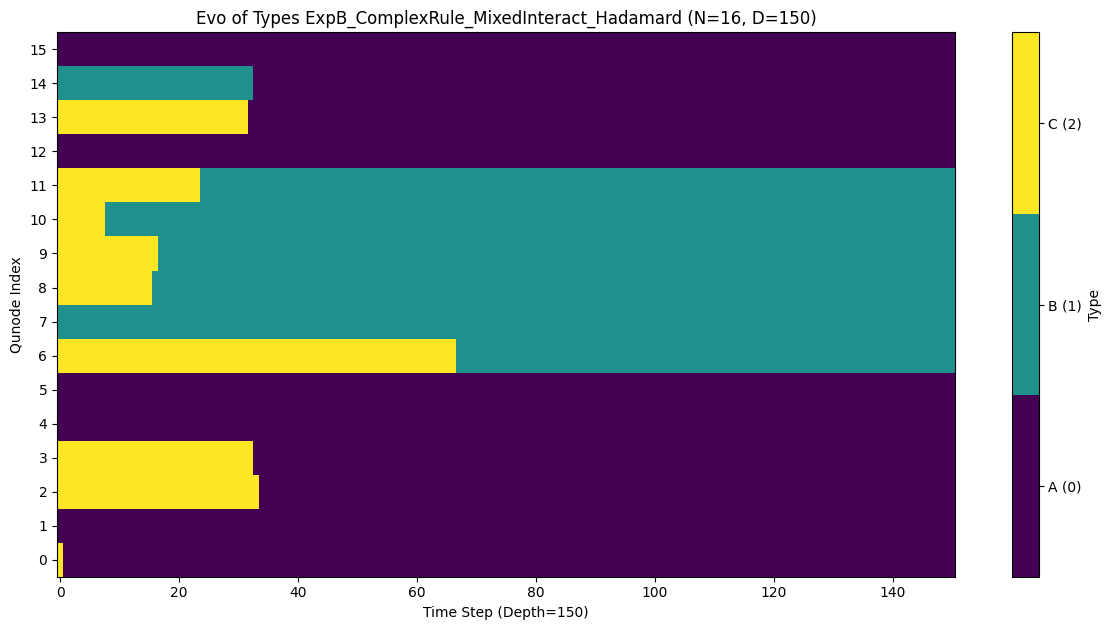

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpB_ComplexRule_MixedInteract_Hadamard.npy

--- Preparing Data & Training LSTM for ExpB_ComplexRule_MixedInteract_Hadamard ---
ML Train:X(112, 10, 16),y(112, 16, 3).ML Val:X(29, 10, 16),y(29, 16, 3)
Training LSTM for ExpB_ComplexRule_MixedInteract_Hadamard...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpB_ComplexRule_MixedInteract_Hadamard: 100.00%


===== Running Experiment: ExpC_ComplexRule_Basis_NoHomo =====


QCA(16Q): 100%|██████████| 150/150 [00:06<00:00, 22.41it/s]
<ipython-input-17-ca70bdbcf9ec>:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpC_ComplexRule_Basis_NoHomo took 6.70s.


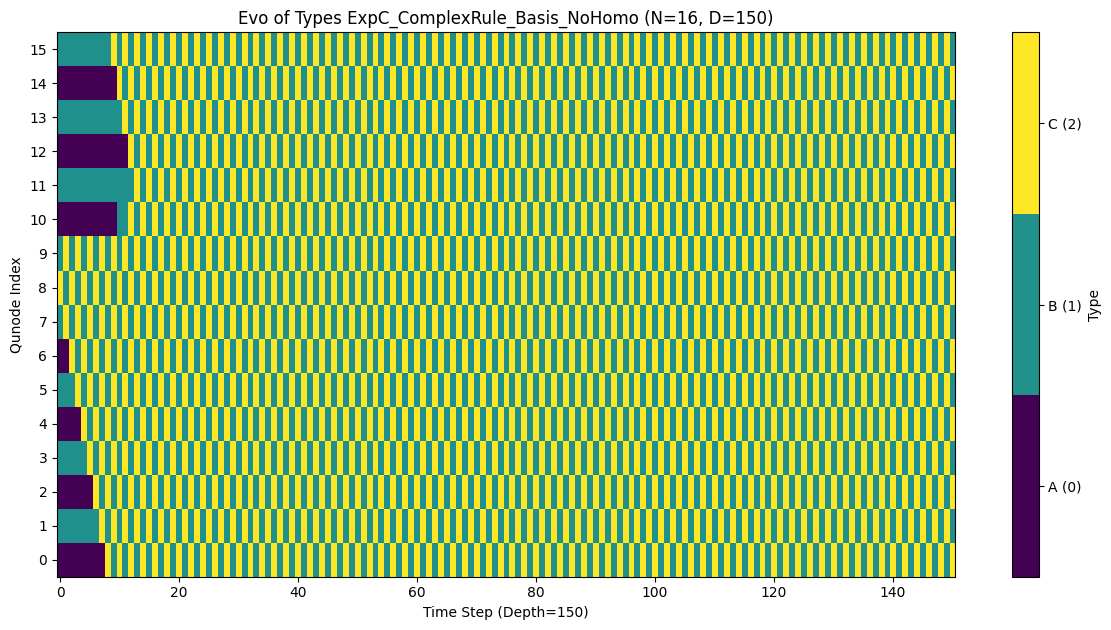

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpC_ComplexRule_Basis_NoHomo.npy

--- Preparing Data & Training LSTM for ExpC_ComplexRule_Basis_NoHomo ---
ML Train:X(112, 10, 16),y(112, 16, 3).ML Val:X(29, 10, 16),y(29, 16, 3)
Training LSTM for ExpC_ComplexRule_Basis_NoHomo...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpC_ComplexRule_Basis_NoHomo: 100.00%


===== Running Experiment: ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh =====


QCA(16Q): 100%|██████████| 150/150 [00:09<00:00, 16.44it/s]
<ipython-input-17-ca70bdbcf9ec>:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh took 9.13s.


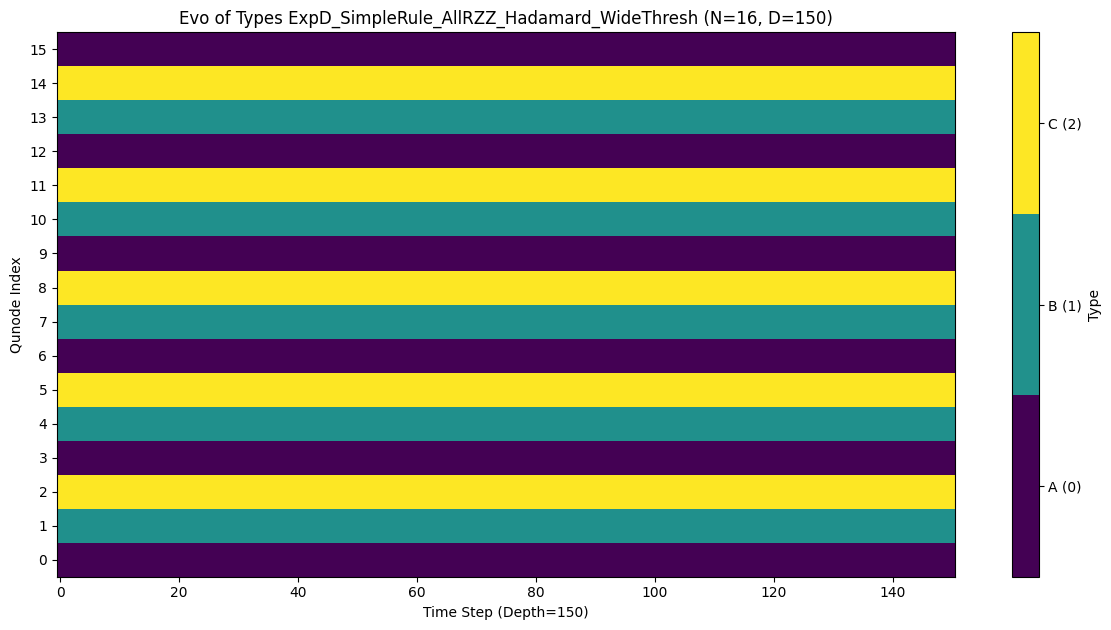

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh.npy

--- Preparing Data & Training LSTM for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh ---
ML Train:X(112, 10, 16),y(112, 16, 3).ML Val:X(29, 10, 16),y(29, 16, 3)
Training LSTM for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh: 100.00%


===== Running Experiment: ExpE_ReproduceComplexPattern_N16D200 =====


QCA(16Q): 100%|██████████| 200/200 [00:10<00:00, 19.44it/s]
<ipython-input-17-ca70bdbcf9ec>:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for ExpE_ReproduceComplexPattern_N16D200 took 10.30s.


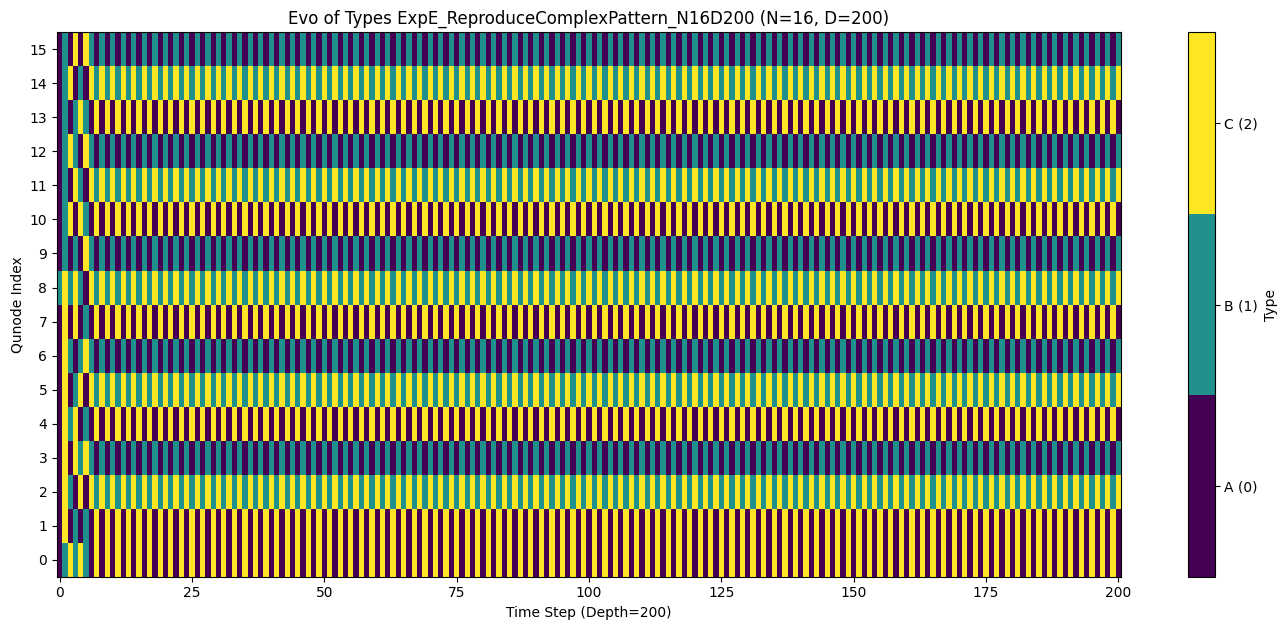

Type history saved to qca_multi_rule_eval_final_fix/type_history_ExpE_ReproduceComplexPattern_N16D200.npy

--- Preparing Data & Training LSTM for ExpE_ReproduceComplexPattern_N16D200 ---
ML Train:X(152, 10, 16),y(152, 16, 3).ML Val:X(39, 10, 16),y(39, 16, 3)
Training LSTM for ExpE_ReproduceComplexPattern_N16D200...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for ExpE_ReproduceComplexPattern_N16D200: 100.00%


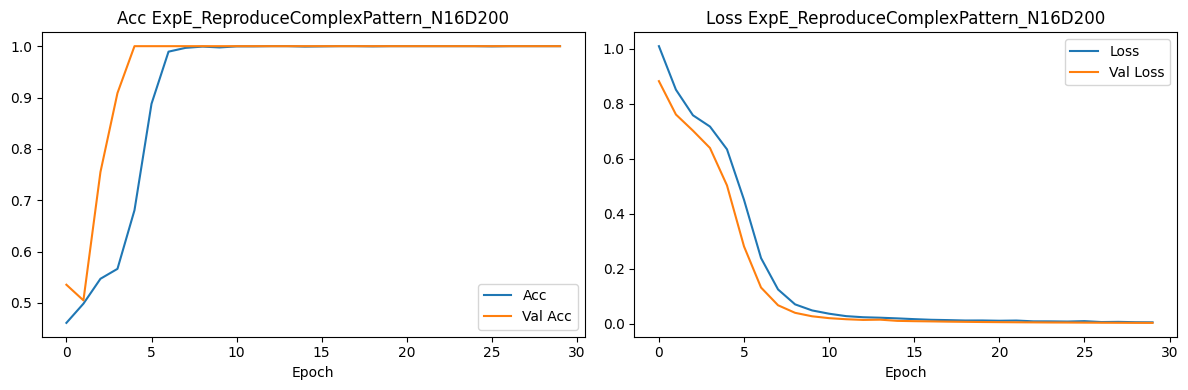



--- LSTM Model Performance Summary ---
---------------------------------------------------
Experiment Label                                             | LSTM Val. Accuracy  
---------------------------------------------------
ExpA_Baseline_AllCX_Basis_Sensitive                          | 100.00%
ExpB_ComplexRule_MixedInteract_Hadamard                      | 100.00%
ExpC_ComplexRule_Basis_NoHomo                                | 100.00%
ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh                   | 100.00%
ExpE_ReproduceComplexPattern_N16D200                         | 100.00%
---------------------------------------------------

--- All Experiments and ML Evaluations Complete ---


In [17]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate, SGate, TGate, CCXGate
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm

# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Softmax
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# --- QCA Parameters (Defaults for experiments) ---
N_QUNODES_DEFAULT = 16
DEPTH_DEFAULT = 150    # Default depth for experiments

TYPE_A = 0; TYPE_B = 1; TYPE_C = 2
NUM_DISTINCT_TYPES = 3
GATES = {"H":HGate(),"X":XGate(),"I":IGate(),"S":SGate(),"T":TGate(),"CX":CXGate(),"CZ":CZGate(),
         "SWAP":SwapGate(),"CCX":CCXGate(),"RZZ_PIO4":RZZGate(np.pi/4),"RZZ_PIO2":RZZGate(np.pi/2),
         "RXX_PIO4":RXXGate(np.pi/4),"RYY_PIO4":RYYGate(np.pi/4)}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict, type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"):
        self.num_qunodes=num_qunodes; self.current_types=initial_types.copy(); self.type_history=[self.current_types.copy()]
        self.quantum_outcome_history=[]; self.interaction_config=interaction_config; self.type_update_rule_config=type_update_rule_config
        self.initial_quantum_state_prep=initial_quantum_state_prep; self.simulator=AerSimulator(method='statevector'); self.circuit_visualization_list=[]

    def _get_interaction_unitary(self,t1,t2):
        k=tuple(sorted((t1,t2)))
        if k==(TYPE_A,TYPE_A):return self.interaction_config.get("AA",GATES["I"])
        if k==(TYPE_B,TYPE_B):return self.interaction_config.get("BB",GATES["I"])
        if k==(TYPE_C,TYPE_C):return self.interaction_config.get("CC",GATES["I"])
        if k==(TYPE_A,TYPE_B):return self.interaction_config.get("AB",GATES["I"])
        if k==(TYPE_A,TYPE_C):return self.interaction_config.get("AC",GATES["I"])
        if k==(TYPE_B,TYPE_C):return self.interaction_config.get("BC",GATES["I"])
        return GATES["I"]

    def _build_interaction_circuit(self):
        qc=QuantumCircuit(self.num_qunodes,name=f"QCA_int"); app=False
        if self.initial_quantum_state_prep=="hadamard_all":[qc.h(i)for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep=="basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.x(i)
                elif self.current_types[i]==TYPE_C:qc.x(i)
        elif self.initial_quantum_state_prep=="mixed_A0_BH_CH":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.h(i)
                elif self.current_types[i]==TYPE_C:qc.h(i);qc.x(i)
        if self.num_qunodes>0:qc.barrier(label="init_state")
        for i in range(self.num_qunodes):
            op=self._get_interaction_unitary(self.current_types[i],self.current_types[(i+1)%self.num_qunodes])
            if op is not None and op.name.lower()!='id':qc.append(op,[i,(i+1)%self.num_qunodes]);app=True
        if app and self.num_qunodes>1:qc.barrier(label="int")
        return qc

    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy();cfg = self.type_update_rule_config;r_name = cfg.get("name", "simple_threshold_3types")
        if r_name == "simple_threshold_3types":
            for i in range(self.num_qunodes):
                p1 = quantum_outcomes_p1[i]; cT = self.current_types[i]
                if cT == TYPE_A:
                    if p1 > cfg.get("thresh_A_to_B", 0.6): new_types[i] = TYPE_B
                    elif p1 < cfg.get("thresh_A_to_C", 0.2): new_types[i] = TYPE_C
                elif cT == TYPE_B:
                    if p1 < cfg.get("thresh_B_to_A", 0.4): new_types[i] = TYPE_A
                    elif p1 > cfg.get("thresh_B_to_C", 0.8): new_types[i] = TYPE_C
                elif cT == TYPE_C:
                    if p1 > cfg.get("thresh_C_to_B", 0.55): new_types[i] = TYPE_B
                    elif p1 < cfg.get("thresh_C_to_A", 0.45): new_types[i] = TYPE_A
        elif r_name == "quantum_neighborhood_logic_v1":
            sensitivity = cfg.get("sensitivity", 0.1)
            p1_dev_low = -sensitivity; p1_dev_high = sensitivity
            prob_boundary_flip = cfg.get("prob_boundary_flip", 0.2)
            prob_C_decay = cfg.get("prob_C_decay", 0.05)
            for i in range(self.num_qunodes):
                my_t,my_p1_dev=self.current_types[i],quantum_outcomes_p1[i]-0.5
                l_idx,r_idx=(i-1+self.num_qunodes)%self.num_qunodes,(i+1)%self.num_qunodes
                l_t,r_t=self.current_types[l_idx],self.current_types[r_idx]
                l_p1_dev,r_p1_dev=quantum_outcomes_p1[l_idx]-0.5,quantum_outcomes_p1[r_idx]-0.5
                if my_t==TYPE_A:
                    if my_p1_dev > p1_dev_high and (l_t==TYPE_B or r_t==TYPE_B):
                        if np.random.rand() < prob_boundary_flip : new_types[i]=TYPE_B
                    elif my_p1_dev < p1_dev_low and (l_t==TYPE_C or r_t==TYPE_C): new_types[i]=TYPE_C
                    elif (l_t==TYPE_B and r_t==TYPE_B) and abs(my_p1_dev)<sensitivity/2 : new_types[i]=TYPE_B
                elif my_t==TYPE_B:
                    if my_p1_dev < p1_dev_low and (l_t==TYPE_A or r_t==TYPE_A):
                        if np.random.rand() < prob_boundary_flip : new_types[i]=TYPE_A
                    elif my_p1_dev > p1_dev_high and (l_t==TYPE_C or r_t==TYPE_C): new_types[i]=TYPE_C
                    elif (l_t==TYPE_A and r_t==TYPE_A) and abs(my_p1_dev)<sensitivity/2 : new_types[i]=TYPE_A
                elif my_t==TYPE_C:
                    if (l_t==TYPE_A and r_t==TYPE_A): new_types[i]=TYPE_A
                    elif (l_t==TYPE_B and r_t==TYPE_B): new_types[i]=TYPE_B
                    elif my_p1_dev < -0.1: new_types[i]=TYPE_A
                    elif my_p1_dev > 0.1: new_types[i]=TYPE_B
                    elif np.random.rand() < prob_C_decay: new_types[i]=TYPE_A if np.random.rand()<0.5 else TYPE_B
        return new_types

    def step(self):
        interaction_qc=self._build_interaction_circuit()
        if not self.circuit_visualization_list:self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj=Statevector(interaction_qc);p1_out=np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):p_qi=final_statevector_obj.probabilities([i]);p1_out[i]=p_qi[1]if len(p_qi)==2 else 0.0
        self.quantum_outcome_history.append(p1_out.copy());new_T=self._apply_type_update_rule(p1_out)
        self.current_types=new_T;self.type_history.append(self.current_types.copy());return p1_out

    def run(self,n_steps,verbose=False):
        if verbose:print("Init Types:",self.current_types)
        try:it_range=tqdm(range(n_steps),desc=f"QCA({self.num_qunodes}Q)")
        except NameError:it_range=range(n_steps);print("tqdm missing, using simple print.")
        for sn in it_range:
            o=self.step()
            if verbose:print(f"St{sn+1}/{n_steps}-P1:{np.round(o,2)},NewT:{self.current_types}")
            elif not isinstance(it_range,range):pass
            elif(sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1:print(f" QCA St {sn+1}/{n_steps} done...")
        if not isinstance(it_range,range):it_range.close()
        if verbose or isinstance(it_range,range)and not((sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1):print("QCA Sim Done.")

    def get_type_history_as_array(self):return np.array(self.type_history)

    def plot_type_evolution(self, title_suffix="", experiment_label=""): # CORRECTED SIGNATURE
        history_arr=self.get_type_history_as_array();fig_w=max(12,history_arr.shape[0]*0.07);fig_h=max(5,self.num_qunodes*0.4)
        plt.figure(figsize=(fig_w,fig_h));
        num_distinct_types_in_data = len(np.unique(history_arr))
        max_possible_types = NUM_DISTINCT_TYPES if 'NUM_DISTINCT_TYPES' in globals() else 3
        cmap_num_colors = max_possible_types if max_possible_types >= num_distinct_types_in_data and num_distinct_types_in_data > 0 else num_distinct_types_in_data
        if cmap_num_colors == 0: cmap_num_colors = 1
        if num_distinct_types_in_data == 1 and cmap_num_colors < 2 : cmap_num_colors = 2
        if max_possible_types == 1 and num_distinct_types_in_data == 1: cmap_num_colors = 2
        cmap = plt.cm.get_cmap('viridis', cmap_num_colors)
        plt.imshow(history_arr.T,cmap=cmap,aspect='auto',interpolation='nearest',origin='lower',
                   vmin=TYPE_A - 0.5, vmax=max(TYPE_A,TYPE_B,TYPE_C) + 0.5)
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})");plt.ylabel("Qunode Index");
        title_to_display = f"Evo of Types {experiment_label}{title_suffix}"
        plt.title(title_to_display);
        defined_type_values = sorted(list(np.unique(history_arr).astype(int)))
        if not defined_type_values and max_possible_types > 0 : defined_type_values = list(range(max_possible_types))
        elif not defined_type_values : defined_type_values = [0]
        type_tick_labels = [f'{chr(65+i)} ({i})' for i in defined_type_values if 0 <= i < 26]
        if defined_type_values :
            cbar = plt.colorbar(label="Type", ticks=defined_type_values);
            cbar.ax.set_yticklabels(type_tick_labels)
        else: plt.colorbar(label="Type")
        plt.yticks(np.arange(self.num_qunodes));plt.tight_layout();plt.show()

    def visualize_example_interaction_circuit(self):
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- ML Data Preparation ---
def create_sequences(data, window_size):
    X, y = [], [];
    for i in range(len(data)-window_size):X.append(data[i:i+window_size]);y.append(data[i+window_size])
    return np.array(X),np.array(y)

# --- Main Execution ---
if __name__ == "__main__":
    output_base_dir = "qca_multi_rule_eval_final_fix"
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    experiments_to_run = [
        {
            "label": "ExpA_Baseline_AllCX_Basis_Sensitive", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "seed_A", "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA":GATES["CX"],"BB":GATES["CX"],"CC":GATES["CX"], "AB":GATES["CX"],"AC":GATES["CX"],"BC":GATES["CX"]},
            "type_update_rule_config": {"name":"simple_threshold_3types", "thresh_A_to_B":0.501,"thresh_A_to_C":0.05,"thresh_B_to_A":0.499,"thresh_B_to_C":0.95,"thresh_C_to_A":0.45,"thresh_C_to_B":0.55}
        },
        {
            "label": "ExpB_ComplexRule_MixedInteract_Hadamard", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "random_ABC", "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": {"AA":GATES["RXX_PIO4"],"BB":GATES["RYY_PIO4"],"CC":GATES["SWAP"],"AB":GATES["RZZ_PIO2"],"AC":GATES["CZ"],"BC":GATES["CX"]},
            "type_update_rule_config": {"name":"quantum_neighborhood_logic_v1","sensitivity":0.15,"neighbor_influence_factor":0.5,"prob_C_decay":0.02, "prob_boundary_flip": 0.25}
        },
        {
            "label": "ExpC_ComplexRule_Basis_NoHomo", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "seed_C_in_AB_alternating", "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA":GATES["I"],"BB":GATES["I"],"CC":GATES["I"],"AB":GATES["RZZ_PIO2"],"AC":GATES["CX"],"BC":GATES["CZ"]},
            "type_update_rule_config": {"name":"quantum_neighborhood_logic_v1","sensitivity":0.20,"neighbor_influence_factor":0.6,"prob_boundary_flip":0.35,"prob_C_decay":0.1}
        },
        {
            "label": "ExpD_SimpleRule_AllRZZ_Hadamard_WideThresh", "n_qunodes": N_QUNODES_DEFAULT, "depth": DEPTH_DEFAULT,
            "initial_types_pattern": "alternating_ABC", "initial_quantum_state_prep": "hadamard_all",
            "interaction_config": {"AA":GATES["RZZ_PIO4"],"BB":GATES["RZZ_PIO4"],"CC":GATES["RZZ_PIO4"],"AB":GATES["RZZ_PIO4"],"AC":GATES["RZZ_PIO4"],"BC":GATES["RZZ_PIO4"]},
            "type_update_rule_config": {"name":"simple_threshold_3types","thresh_A_to_B":0.65,"thresh_A_to_C":0.15,"thresh_B_to_A":0.35,"thresh_B_to_C":0.85,"thresh_C_to_A":0.30,"thresh_C_to_B":0.70}
        },
        { # Re-add your Exp2Long equivalent for N=16, D=200 to match the successful image
            "label": "ExpE_ReproduceComplexPattern_N16D200",
            "n_qunodes": 16, "depth": 200,
            "initial_types_pattern": "seed_A",
            "initial_quantum_state_prep": "basis_from_type",
            "interaction_config": {"AA":GATES["CX"],"BB":GATES["CX"],"CC":GATES["CX"], "AB":GATES["CX"],"AC":GATES["CX"],"BC":GATES["CX"]}, # All CX
            "type_update_rule_config": {"name":"simple_threshold_3types", "thresh_A_to_B":0.501,"thresh_A_to_C":0.05,"thresh_B_to_A":0.499,"thresh_B_to_C":0.95,"thresh_C_to_A":0.45,"thresh_C_to_B":0.55}
        }
    ]
    ml_results_summary = []
    for exp_config in experiments_to_run:
        print(f"\n\n===== Running Experiment: {exp_config['label']} ====="); np.random.seed(42)
        n_q = exp_config["n_qunodes"]
        if exp_config["initial_types_pattern"]=="random_ABC":initial_types=np.random.choice([TYPE_A,TYPE_B,TYPE_C],size=n_q)
        elif exp_config["initial_types_pattern"]=="alternating_ABC":initial_types=np.array([(TYPE_A if i%3==0 else(TYPE_B if i%3==1 else TYPE_C))for i in range(n_q)])
        elif exp_config["initial_types_pattern"]=="seed_A":initial_types=np.full(n_q,TYPE_A,dtype=int);initial_types[n_q//2 if n_q>0 else 0]=TYPE_B
        elif exp_config["initial_types_pattern"]=="seed_C_in_AB_alternating":initial_types=np.array([(TYPE_A if i%2==0 else TYPE_B)for i in range(n_q)]);initial_types[n_q//2 if n_q>0 else 0]=TYPE_C
        else:initial_types=np.random.choice([TYPE_A,TYPE_B,TYPE_C],size=n_q)
        qca = QuantumCellularAutomaton(
            num_qunodes=n_q, initial_types=initial_types,
            interaction_config=exp_config["interaction_config"],
            type_update_rule_config=exp_config["type_update_rule_config"],
            initial_quantum_state_prep=exp_config["initial_quantum_state_prep"])
        run_st_tm=time.time(); qca.run(exp_config["depth"],verbose=False); run_end_tm=time.time()
        print(f"QCA run for {exp_config['label']} took {run_end_tm-run_st_tm:.2f}s.")
        qca.plot_type_evolution(title_suffix=f" (N={n_q}, D={exp_config['depth']})", experiment_label=exp_config['label'])
        type_history_data = qca.get_type_history_as_array()
        history_fn = os.path.join(output_base_dir,f"type_history_{exp_config['label']}.npy"); np.save(history_fn,type_history_data)
        print(f"Type history saved to {history_fn}")
        print(f"\n--- Preparing Data & Training LSTM for {exp_config['label']} ---")
        WINDOW_SIZE_ML=10; X_sequences,y_sequences=create_sequences(type_history_data,WINDOW_SIZE_ML)
        lstm_accuracy = "N/A (Not enough data)"
        if X_sequences.shape[0] < 20: print(f"Not enough sequences ({X_sequences.shape[0]}) for ML. Skipping LSTM.")
        else:
            y_sequences_one_hot=to_categorical(y_sequences,num_classes=NUM_DISTINCT_TYPES)
            split_idx=int(0.8*X_sequences.shape[0]); X_train_ml,X_val_ml=X_sequences[:split_idx],X_sequences[split_idx:]
            y_train_ml,y_val_ml=y_sequences_one_hot[:split_idx],y_sequences_one_hot[split_idx:]
            if X_train_ml.shape[0] == 0 or X_val_ml.shape[0] == 0:
                print(f"Not enough train/val samples after split for {exp_config['label']}. Skipping LSTM.")
                lstm_accuracy = "N/A (Split too small)"
            else:
                print(f"ML Train:X{X_train_ml.shape},y{y_train_ml.shape}.ML Val:X{X_val_ml.shape},y{y_val_ml.shape}")
                model=Sequential([ LSTM(128,input_shape=(WINDOW_SIZE_ML,n_q),return_sequences=True),Dropout(0.2),
                                   LSTM(64,return_sequences=False),Dropout(0.2), Dense(n_q*NUM_DISTINCT_TYPES),
                                   Reshape((n_q,NUM_DISTINCT_TYPES)), Softmax(axis=-1)])
                model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
                print(f"Training LSTM for {exp_config['label']}...")
                history=model.fit(X_train_ml,y_train_ml,epochs=30,batch_size=16,validation_data=(X_val_ml,y_val_ml),verbose=0) # verbose=0 for less output
                loss,acc=model.evaluate(X_val_ml,y_val_ml,verbose=0); lstm_accuracy = f"{acc*100:.2f}%"
                print(f"LSTM Val Acc for {exp_config['label']}: {lstm_accuracy}")
                # Only plot ML history if accuracy is not perfect, or for specific exps
                if not np.isclose(acc, 1.0) or exp_config["label"] == "ExpE_ReproduceComplexPattern_N16D200":
                    plt.figure(figsize=(12,4)); plt.subplot(1,2,1); plt.plot(history.history['accuracy'],label='Acc'); plt.plot(history.history['val_accuracy'],label='Val Acc'); plt.title(f'Acc {exp_config["label"]}'); plt.xlabel('Epoch'); plt.legend()
                    plt.subplot(1,2,2); plt.plot(history.history['loss'],label='Loss'); plt.plot(history.history['val_loss'],label='Val Loss'); plt.title(f'Loss {exp_config["label"]}'); plt.xlabel('Epoch'); plt.legend(); plt.tight_layout(); plt.show()
        ml_results_summary.append({"experiment_label": exp_config['label'], "lstm_val_accuracy": lstm_accuracy})

    print("\n\n--- LSTM Model Performance Summary ---")
    print("---------------------------------------------------");print(f"{'Experiment Label':<60} | {'LSTM Val. Accuracy':<20}");print("---------------------------------------------------")
    for res in ml_results_summary: print(f"{res['experiment_label']:<60} | {res['lstm_val_accuracy']}")
    print("---------------------------------------------------")
    print("\n--- All Experiments and ML Evaluations Complete ---")



===== Running Experiment: Exp2TypeComplex_N16_D200 =====


QCA(16Q): 100%|██████████| 200/200 [00:09<00:00, 21.28it/s]
<ipython-input-21-ada5aec6e14d>:105: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for Exp2TypeComplex_N16_D200 took 9.41s.


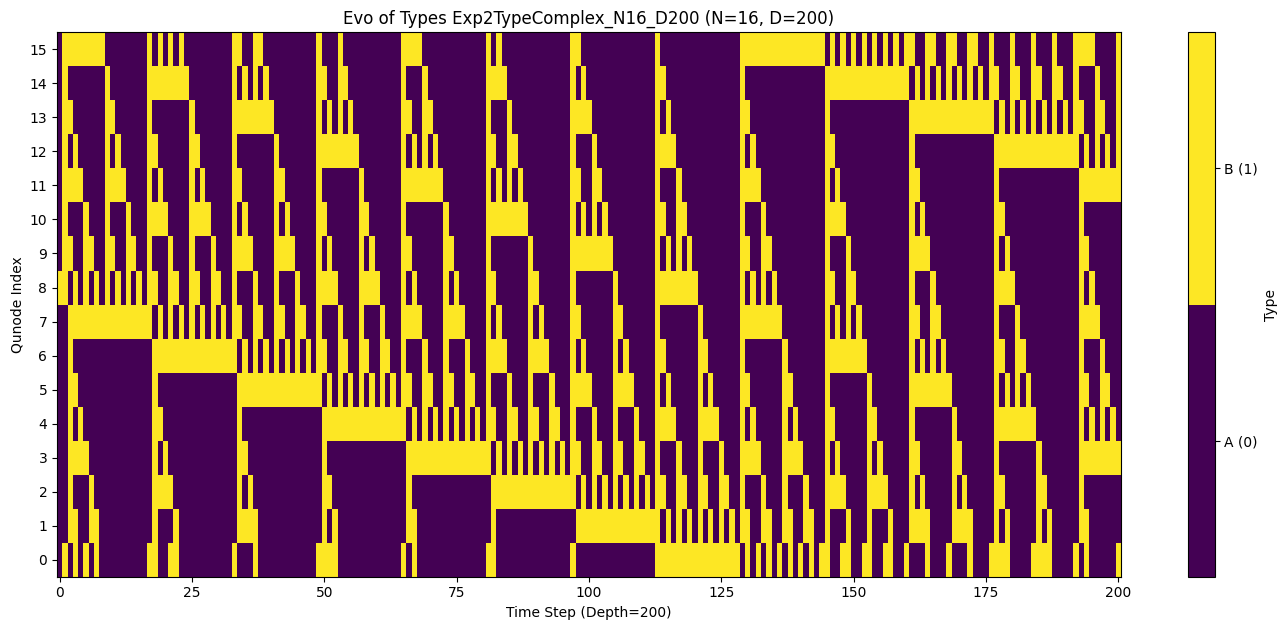

Type history saved to qca_2type_complex_lstm_eval/type_history_Exp2TypeComplex_N16_D200.npy

--- Preparing Data & Training LSTM for Exp2TypeComplex_N16_D200 ---
ML Train:X(152, 10, 16),y(152, 16, 2).ML Val:X(39, 10, 16),y(39, 16, 2)
Training LSTM for Exp2TypeComplex_N16_D200...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.6013 - loss: 0.6732 - val_accuracy: 0.6763 - val_loss: 0.6403
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6894 - loss: 0.6137 - val_accuracy: 0.6763 - val_loss: 0.6545
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6966 - loss: 0.5973 - val_accuracy: 0.6763 - val_loss: 0.6585
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7127 - loss: 0.5708 - val_accuracy: 0.6667 - val_loss: 0.6867
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7007 - loss: 0.5735 - val_accuracy: 0.6571 - val_loss: 0.7366
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6933 - loss: 0.5646 - val_accuracy: 0.6314 - val_loss: 0.8375
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7397 - loss: 0.5236 - val_accuracy: 0.6330 - val_loss: 0.7907
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7310 - loss: 0.5277 - val_accuracy: 0.6202 - val_loss: 0.

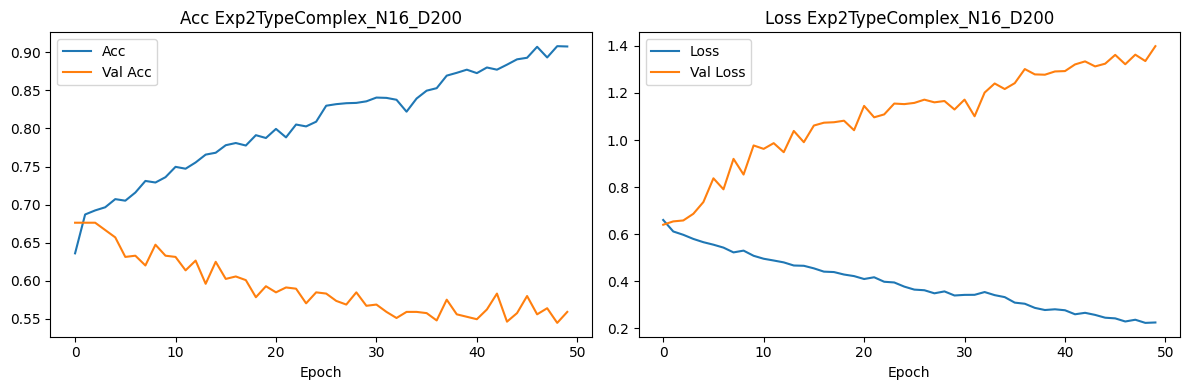



--- LSTM Model Performance Summary ---
---------------------------------------------------
Experiment Label                                             | LSTM Val. Accuracy  
---------------------------------------------------
Exp2TypeComplex_N16_D200                                     | 55.93%
---------------------------------------------------

--- Experiment Complete ---


In [21]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, HGate, IGate # Only gates needed for this specific experiment
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm

# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Softmax
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# --- QCA Parameters for this specific "complex 2-type" experiment ---
N_QUNODES_FOR_EXP = 16  # As per your successful image
DEPTH_FOR_EXP = 200     # As per your successful image

TYPE_A = 0; TYPE_B = 1
NUM_DISTINCT_TYPES = 2 # CRITICAL: Set to 2 for this experiment
GATES = {"CX": CXGate(), "I": IGate(), "H": HGate()} # Gates used in this config

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict, type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"):
        self.num_qunodes=num_qunodes; self.current_types=initial_types.copy(); self.type_history=[self.current_types.copy()]
        self.quantum_outcome_history=[]; self.interaction_config=interaction_config; self.type_update_rule_config=type_update_rule_config
        self.initial_quantum_state_prep=initial_quantum_state_prep; self.simulator=AerSimulator(method='statevector'); self.circuit_visualization_list=[]

    def _get_interaction_unitary(self,t1,t2):
        k=tuple(sorted((t1,t2))) # Handles (A,B) and (B,A) the same if only "AB" is defined
        # For 2 types, only AA, BB, AB are possible
        if k==(TYPE_A,TYPE_A):return self.interaction_config.get("AA",GATES["I"])
        if k==(TYPE_B,TYPE_B):return self.interaction_config.get("BB",GATES["I"])
        if k==(TYPE_A,TYPE_B):return self.interaction_config.get("AB",GATES["I"])
        return GATES["I"] # Should not be reached if config is complete for 2 types

    def _build_interaction_circuit(self):
        qc=QuantumCircuit(self.num_qunodes,name=f"QCA_int"); app=False
        if self.initial_quantum_state_prep=="hadamard_all":[qc.h(i)for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep=="basis_from_type":
            for i in range(self.num_qunodes): # Only Type B gets X if A=0, B=1
                if self.current_types[i]==TYPE_B:qc.x(i)
        if self.num_qunodes>0:qc.barrier(label="init_state")
        for i in range(self.num_qunodes):
            op=self._get_interaction_unitary(self.current_types[i],self.current_types[(i+1)%self.num_qunodes])
            if op is not None and op.name.lower()!='id':qc.append(op,[i,(i+1)%self.num_qunodes]);app=True
        if app and self.num_qunodes>1:qc.barrier(label="int")
        return qc

    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy();cfg = self.type_update_rule_config
        # This rule is specific to the 2-type "Exp2-like" sensitive thresholding
        thresh_A_to_B = cfg.get("thresh_A_to_B", 0.501)
        thresh_B_to_A = cfg.get("thresh_B_to_A", 0.499)

        for i in range(self.num_qunodes):
            p1 = quantum_outcomes_p1[i]; cT = self.current_types[i]
            if cT == TYPE_A:
                if p1 > thresh_A_to_B: new_types[i] = TYPE_B
            elif cT == TYPE_B: # Only other option if NUM_DISTINCT_TYPES is 2
                if p1 < thresh_B_to_A: new_types[i] = TYPE_A
        return new_types

    def step(self):
        interaction_qc=self._build_interaction_circuit()
        if not self.circuit_visualization_list:self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj=Statevector(interaction_qc);p1_out=np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):p_qi=final_statevector_obj.probabilities([i]);p1_out[i]=p_qi[1]if len(p_qi)==2 else 0.0
        self.quantum_outcome_history.append(p1_out.copy());new_T=self._apply_type_update_rule(p1_out)
        self.current_types=new_T;self.type_history.append(self.current_types.copy());return p1_out

    def run(self,n_steps,verbose=False):
        if verbose:print("Init Types:",self.current_types)
        try:it_range=tqdm(range(n_steps),desc=f"QCA({self.num_qunodes}Q)")
        except NameError:it_range=range(n_steps);print("tqdm missing, using simple print for progress.")
        for sn in it_range:
            o=self.step()
            if verbose:print(f"St{sn+1}/{n_steps}-P1:{np.round(o,2)},NewT:{self.current_types}")
            elif not isinstance(it_range,range):pass # tqdm handles its own updates
            elif(sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1:print(f" QCA St {sn+1}/{n_steps} done...") # Print progress occasionally
        if not isinstance(it_range,range):it_range.close() # Close tqdm bar
        if verbose or isinstance(it_range,range)and not((sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1):print("QCA Sim Done.")

    def get_type_history_as_array(self):return np.array(self.type_history)

    def plot_type_evolution(self, title_suffix="", experiment_label=""): # CORRECTED DEFINITION
        history_arr=self.get_type_history_as_array();fig_w=max(12,history_arr.shape[0]*0.07);fig_h=max(5,self.num_qunodes*0.4)
        plt.figure(figsize=(fig_w,fig_h));

        actual_distinct_types_in_data = np.unique(history_arr)
        num_distinct_types_in_data = len(actual_distinct_types_in_data)

        cmap_num_colors = NUM_DISTINCT_TYPES # Use the global setting for cmap consistency
        if cmap_num_colors < num_distinct_types_in_data : cmap_num_colors = num_distinct_types_in_data
        if cmap_num_colors == 0: cmap_num_colors = 1
        if num_distinct_types_in_data == 1 and cmap_num_colors < 2 : cmap_num_colors = 2

        cmap = plt.cm.get_cmap('viridis', cmap_num_colors)

        plt.imshow(history_arr.T,cmap=cmap,aspect='auto',interpolation='nearest',origin='lower',
                   vmin=TYPE_A - 0.5, vmax=max(actual_distinct_types_in_data) + 0.5 if len(actual_distinct_types_in_data)>0 else TYPE_B + 0.5)
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})");plt.ylabel("Qunode Index");
        title_to_display = f"Evo of Types {experiment_label}{title_suffix}"
        plt.title(title_to_display);

        cbar_ticks_final = sorted(list(actual_distinct_types_in_data.astype(int)))
        if not cbar_ticks_final and history_arr.size > 0: cbar_ticks_final = [int(history_arr.flat[0])] if history_arr.flat[0] is not np.nan else [0]
        elif not cbar_ticks_final: cbar_ticks_final = [TYPE_A, TYPE_B][:NUM_DISTINCT_TYPES]

        cbar_tick_labels = [f'{chr(65+i)} ({i})' for i in cbar_ticks_final if 0 <= i < 26] # Labels A, B...

        if cbar_ticks_final :
            cbar = plt.colorbar(label="Type", ticks=cbar_ticks_final);
            cbar.ax.set_yticklabels(cbar_tick_labels)
        else: plt.colorbar(label="Type")

        plt.yticks(np.arange(self.num_qunodes)); plt.tight_layout(); plt.show()

    def visualize_example_interaction_circuit(self): # ... (Same)
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- ML Data Preparation ---
def create_sequences(data, window_size): # Identical
    X, y = [], [];
    for i in range(len(data)-window_size):X.append(data[i:i+window_size]);y.append(data[i+window_size])
    return np.array(X),np.array(y)

# --- Main Execution ---
if __name__ == "__main__":
    output_base_dir = "qca_2type_complex_lstm_eval"
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    # --- Single Experiment: Reproducing the complex 2-type pattern ---
    exp_config = {
        "label": f"Exp2TypeComplex_N{N_QUNODES_FOR_EXP2_REPRO}_D{DEPTH_FOR_EXP2_REPRO}",
        "n_qunodes": N_QUNODES_FOR_EXP2_REPRO,
        "depth": DEPTH_FOR_EXP2_REPRO,
        "initial_types_pattern": "seed_A",
        "initial_quantum_state_prep": "basis_from_type",
        "interaction_config": {"AA":GATES["CX"],"BB":GATES["CX"],"AB":GATES["CX"]},
        "type_update_rule_config": {"name":"simple_threshold_2types", # Using a dedicated 2-type rule
                                    "thresh_A_to_B":0.501,
                                    "thresh_B_to_A":0.499}
    }

    ml_results_summary = []

    print(f"\n\n===== Running Experiment: {exp_config['label']} ====="); np.random.seed(42)
    n_q = exp_config["n_qunodes"]
    # Initial types for "seed_A" with 2 types
    initial_types=np.full(n_q,TYPE_A,dtype=int);
    if n_q>0: initial_types[n_q//2]=TYPE_B

    qca = QuantumCellularAutomaton(
        num_qunodes=n_q, initial_types=initial_types,
        interaction_config=exp_config["interaction_config"],
        type_update_rule_config=exp_config["type_update_rule_config"],
        initial_quantum_state_prep=exp_config["initial_quantum_state_prep"])

    run_st_tm=time.time(); qca.run(exp_config["depth"],verbose=False); run_end_tm=time.time()
    print(f"QCA run for {exp_config['label']} took {run_end_tm-run_st_tm:.2f}s.")
    qca.plot_type_evolution(title_suffix=f" (N={n_q}, D={exp_config['depth']})", experiment_label=exp_config['label'])
    type_history_data = qca.get_type_history_as_array()
    history_fn = os.path.join(output_base_dir,f"type_history_{exp_config['label']}.npy"); np.save(history_fn,type_history_data)
    print(f"Type history saved to {history_fn}")

    print(f"\n--- Preparing Data & Training LSTM for {exp_config['label']} ---")
    WINDOW_SIZE_ML=10; X_sequences,y_sequences=create_sequences(type_history_data,WINDOW_SIZE_ML)
    lstm_accuracy = "N/A (Not enough data)"
    if X_sequences.shape[0] < 20: print(f"Not enough sequences ({X_sequences.shape[0]}) for ML. Skipping LSTM.")
    else:
        y_sequences_one_hot=to_categorical(y_sequences,num_classes=NUM_DISTINCT_TYPES) # NUM_DISTINCT_TYPES is 2
        split_idx=int(0.8*X_sequences.shape[0]); X_train_ml,X_val_ml=X_sequences[:split_idx],X_sequences[split_idx:]
        y_train_ml,y_val_ml=y_sequences_one_hot[:split_idx],y_sequences_one_hot[split_idx:]
        if X_train_ml.shape[0] == 0 or X_val_ml.shape[0] == 0:
            print(f"Not enough train/val samples after split for {exp_config['label']}. Skipping LSTM.")
            lstm_accuracy = "N/A (Split too small)"
        else:
            print(f"ML Train:X{X_train_ml.shape},y{y_train_ml.shape}.ML Val:X{X_val_ml.shape},y{y_val_ml.shape}")
            model=Sequential([ LSTM(128,input_shape=(WINDOW_SIZE_ML,n_q),return_sequences=True),Dropout(0.2),
                               LSTM(64,return_sequences=False),Dropout(0.2), Dense(n_q*NUM_DISTINCT_TYPES),
                               Reshape((n_q,NUM_DISTINCT_TYPES)), Softmax(axis=-1)])
            model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
            print(f"Training LSTM for {exp_config['label']}...")
            history=model.fit(X_train_ml,y_train_ml,epochs=50,batch_size=16,validation_data=(X_val_ml,y_val_ml),verbose=1) # verbose=1 for LSTM train
            loss,acc=model.evaluate(X_val_ml,y_val_ml,verbose=0); lstm_accuracy = f"{acc*100:.2f}%"
            print(f"LSTM Val Acc for {exp_config['label']}: {lstm_accuracy}")
            plt.figure(figsize=(12,4)); plt.subplot(1,2,1); plt.plot(history.history['accuracy'],label='Acc'); plt.plot(history.history['val_accuracy'],label='Val Acc'); plt.title(f'Acc {exp_config["label"]}'); plt.xlabel('Epoch'); plt.legend()
            plt.subplot(1,2,2); plt.plot(history.history['loss'],label='Loss'); plt.plot(history.history['val_loss'],label='Val Loss'); plt.title(f'Loss {exp_config["label"]}'); plt.xlabel('Epoch'); plt.legend(); plt.tight_layout(); plt.show()
    ml_results_summary.append({"experiment_label": exp_config['label'], "lstm_val_accuracy": lstm_accuracy})

    print("\n\n--- LSTM Model Performance Summary ---")
    print("---------------------------------------------------");print(f"{'Experiment Label':<60} | {'LSTM Val. Accuracy':<20}");print("---------------------------------------------------")
    for res in ml_results_summary: print(f"{res['experiment_label']:<60} | {res['lstm_val_accuracy']}")
    print("---------------------------------------------------")
    print("\n--- Experiment Complete ---")



===== Running QCA: Exp2TypeComplex_N16_D200 =====


QCA(16Q): 100%|██████████| 200/200 [00:29<00:00,  6.72it/s]
<ipython-input-23-7948585abc96>:99: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


QCA run for Exp2TypeComplex_N16_D200 took 29.77s.


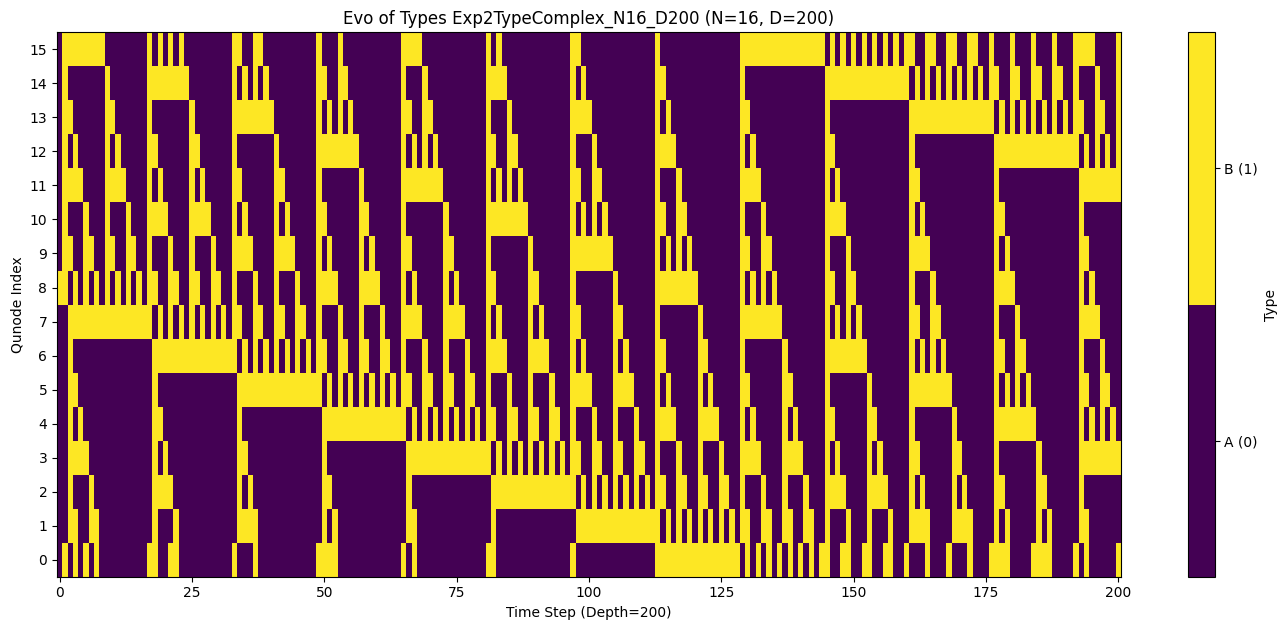

Type history saved to qca_analysis_Exp2TypeComplex_N16_D200/type_history_Exp2TypeComplex_N16_D200.npy

--- Calculating Spatial Shannon Entropy ---


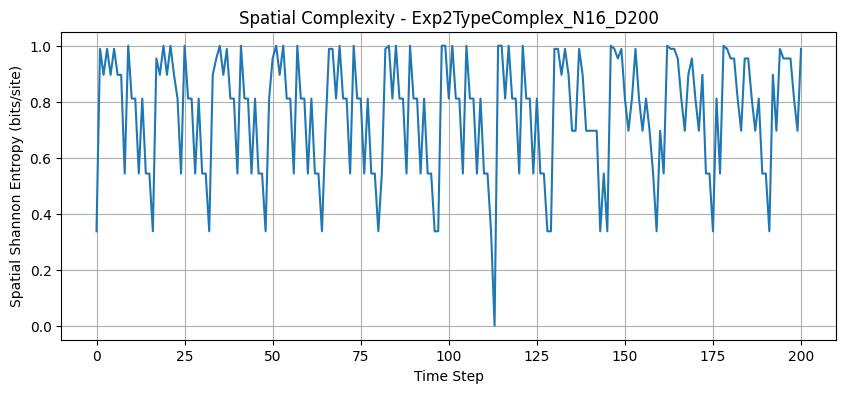

Mean Spatial Entropy: 0.7614, Std: 0.2091

--- Performing Damage Spreading Analysis ---

--- Damage Spreading: Flipping site 6 ---


QCA(16Q): 100%|██████████| 200/200 [00:09<00:00, 20.51it/s]


Orig type at flip site: 0, Perturbed to: 1


QCA(16Q): 100%|██████████| 200/200 [00:10<00:00, 19.93it/s]


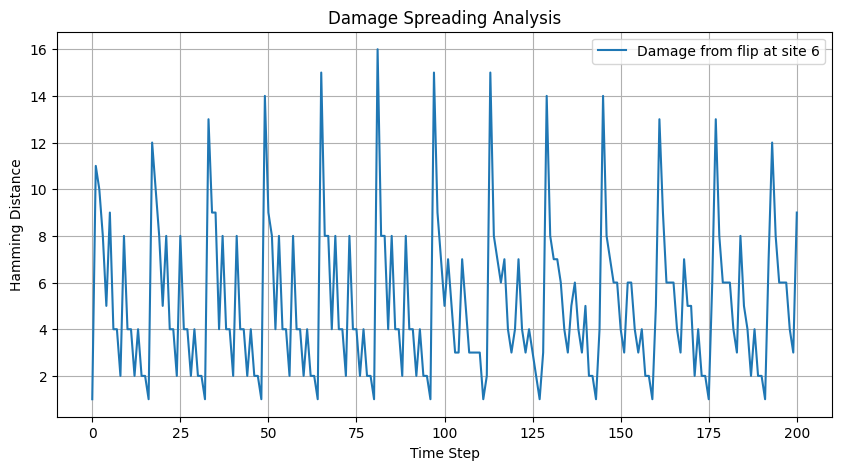


--- Preparing Data & Training LSTM for Exp2TypeComplex_N16_D200 (Complexity Probe) ---
ML Train:X(152, 10, 16),y(152, 16, 2).ML Val:X(39, 10, 16),y(39, 16, 2)
Training LSTM for Exp2TypeComplex_N16_D200...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.5840 - loss: 0.6753 - val_accuracy: 0.6763 - val_loss: 0.6510
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6914 - loss: 0.6079 - val_accuracy: 0.6763 - val_loss: 0.6756
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7099 - loss: 0.5809 - val_accuracy: 0.6763 - val_loss: 0.6652
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6942 - loss: 0.5890 - val_accuracy: 0.6763 - val_loss: 0.6781
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6943 - loss: 0.5806 - val_accuracy: 0.6763 - val_loss: 0.7188
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7121 - loss: 0.5579 - val_accuracy: 0.6587 - val_loss: 0.7214
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7129 - loss: 0.5516 - val_accuracy: 0.6426 - val_loss: 0.7849
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7339 - loss: 0.5229 - val_accuracy: 0.6186 - val_loss: 0.

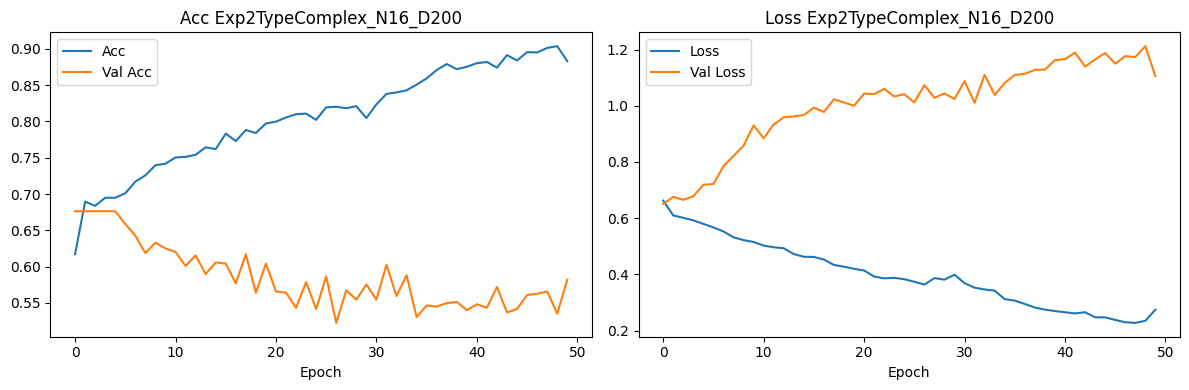


--- LSTM Predictability for Exp2TypeComplex_N16_D200: 58.17% ---

--- Experiment Analyses Complete ---


In [23]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, HGate, IGate
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm
from scipy.stats import entropy as shannon_entropy

# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Softmax
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# --- QCA Parameters for this specific "complex 2-type" experiment ---
N_QUNODES_EXPERIMENT = 16
DEPTH_EXPERIMENT = 200
EXPERIMENT_LABEL = f"Exp2TypeComplex_N{N_QUNODES_EXPERIMENT}_D{DEPTH_EXPERIMENT}" # Used for file naming

TYPE_A = 0; TYPE_B = 1
NUM_DISTINCT_TYPES = 2 # CRITICAL: Set to 2 for this experiment
GATES = {"CX": CXGate(), "I": IGate(), "H": HGate()}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict, type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"):
        self.num_qunodes=num_qunodes; self.current_types=initial_types.copy(); self.type_history=[self.current_types.copy()]
        self.quantum_outcome_history=[]; self.interaction_config=interaction_config; self.type_update_rule_config=type_update_rule_config
        self.initial_quantum_state_prep=initial_quantum_state_prep; self.simulator=AerSimulator(method='statevector'); self.circuit_visualization_list=[]

    def _get_interaction_unitary(self,t1,t2):
        k=tuple(sorted((t1,t2)))
        if k==(TYPE_A,TYPE_A):return self.interaction_config.get("AA",GATES["I"])
        if k==(TYPE_B,TYPE_B):return self.interaction_config.get("BB",GATES["I"])
        if k==(TYPE_A,TYPE_B):return self.interaction_config.get("AB",GATES["I"])
        return GATES["I"]

    def _build_interaction_circuit(self):
        qc=QuantumCircuit(self.num_qunodes,name=f"QCA_int"); app=False
        if self.initial_quantum_state_prep=="hadamard_all":[qc.h(i)for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep=="basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.x(i)
        if self.num_qunodes>0:qc.barrier(label="init_state")
        for i in range(self.num_qunodes):
            op=self._get_interaction_unitary(self.current_types[i],self.current_types[(i+1)%self.num_qunodes])
            if op is not None and op.name.lower()!='id':qc.append(op,[i,(i+1)%self.num_qunodes]);app=True
        if app and self.num_qunodes>1:qc.barrier(label="int")
        return qc

    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy();cfg = self.type_update_rule_config
        thresh_A_to_B = cfg.get("thresh_A_to_B", 0.501)
        thresh_B_to_A = cfg.get("thresh_B_to_A", 0.499)
        for i in range(self.num_qunodes):
            p1 = quantum_outcomes_p1[i]; cT = self.current_types[i]
            if cT == TYPE_A:
                if p1 > thresh_A_to_B: new_types[i] = TYPE_B
            elif cT == TYPE_B:
                if p1 < thresh_B_to_A: new_types[i] = TYPE_A
        return new_types

    def step(self):
        interaction_qc=self._build_interaction_circuit()
        if not self.circuit_visualization_list:self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj=Statevector(interaction_qc);p1_out=np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):p_qi=final_statevector_obj.probabilities([i]);p1_out[i]=p_qi[1]if len(p_qi)==2 else 0.0
        self.quantum_outcome_history.append(p1_out.copy());new_T=self._apply_type_update_rule(p1_out)
        self.current_types=new_T;self.type_history.append(self.current_types.copy());return p1_out

    def run(self,n_steps,verbose=False):
        if verbose:print("Init Types:",self.current_types)
        try:it_range=tqdm(range(n_steps),desc=f"QCA({self.num_qunodes}Q)")
        except NameError:it_range=range(n_steps);print("tqdm missing, using simple print for progress.")
        for sn in it_range:
            o=self.step()
            if verbose:print(f"St{sn+1}/{n_steps}-P1:{np.round(o,2)},NewT:{self.current_types}")
            elif not isinstance(it_range,range):pass
            elif(sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1:print(f" QCA St {sn+1}/{n_steps} done...")
        if not isinstance(it_range,range):it_range.close()
        if verbose or isinstance(it_range,range)and not((sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1):print("QCA Sim Done.")

    def get_type_history_as_array(self):return np.array(self.type_history)

    def plot_type_evolution(self, title_suffix="", experiment_label=""): # CORRECTED SIGNATURE
        history_arr=self.get_type_history_as_array();fig_w=max(12,history_arr.shape[0]*0.07);fig_h=max(5,self.num_qunodes*0.4)
        plt.figure(figsize=(fig_w,fig_h));
        actual_distinct_types_in_data = np.unique(history_arr); num_actual_distinct = len(actual_distinct_types_in_data)
        cmap_num_colors = NUM_DISTINCT_TYPES if NUM_DISTINCT_TYPES >= num_actual_distinct else num_actual_distinct
        if cmap_num_colors == 0: cmap_num_colors = 1
        if num_actual_distinct == 1 and cmap_num_colors < 2: cmap_num_colors = 2
        cmap = plt.cm.get_cmap('viridis', cmap_num_colors)
        min_val_imshow = TYPE_A - 0.5
        max_val_imshow = max(actual_distinct_types_in_data) + 0.5 if num_actual_distinct > 0 else TYPE_B + 0.5
        plt.imshow(history_arr.T,cmap=cmap,aspect='auto',interpolation='nearest',origin='lower', vmin=min_val_imshow, vmax=max_val_imshow)
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})");plt.ylabel("Qunode Index");
        title_to_display = f"Evo of Types {experiment_label}{title_suffix}"; plt.title(title_to_display);
        cbar_ticks_final = sorted(list(actual_distinct_types_in_data.astype(int)))
        if not cbar_ticks_final and history_arr.size>0: cbar_ticks_final = [int(history_arr.flat[0])] if not np.isnan(history_arr.flat[0]) else [0]
        elif not cbar_ticks_final: cbar_ticks_final = [TYPE_A, TYPE_B][:NUM_DISTINCT_TYPES]
        cbar_tick_labels = [f'{chr(65+i)} ({i})' for i in cbar_ticks_final if 0 <= i < 26]
        if cbar_ticks_final :
            cbar = plt.colorbar(label="Type", ticks=cbar_ticks_final);
            if len(cbar_tick_labels) == len(cbar_ticks_final): cbar.ax.set_yticklabels(cbar_tick_labels)
        else: plt.colorbar(label="Type")
        plt.yticks(np.arange(self.num_qunodes)); plt.tight_layout(); plt.show()

    def visualize_example_interaction_circuit(self):
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- Analysis Functions ---
def calculate_spatial_entropy_history(type_history_array): # ... (Same as before)
    entropies = []
    for t in range(type_history_array.shape[0]):
        type_config = type_history_array[t, :];
        if len(type_config) == 0: entropies.append(0); continue
        _, counts = np.unique(type_config, return_counts=True); probabilities = counts / len(type_config)
        entropies.append(shannon_entropy(probabilities, base=2))
    return np.array(entropies)

def run_qca_for_damage_spreading(base_qca_params: Dict, num_qunodes: int, depth: int,
                                 initial_types_orig: np.ndarray, flip_site_idx: int, flip_to_type: Optional[int] = None): # ... (Same)
    print(f"\n--- Damage Spreading: Flipping site {flip_site_idx} ---")
    qca_orig = QuantumCellularAutomaton(num_qunodes=num_qunodes, initial_types=initial_types_orig.copy(), **base_qca_params); qca_orig.run(depth)
    history_orig = qca_orig.get_type_history_as_array()
    initial_types_perturbed = initial_types_orig.copy()
    if flip_to_type is None: initial_types_perturbed[flip_site_idx] = TYPE_B if initial_types_perturbed[flip_site_idx] == TYPE_A else TYPE_A
    else: initial_types_perturbed[flip_site_idx] = flip_to_type
    print(f"Orig type at flip site: {initial_types_orig[flip_site_idx]}, Perturbed to: {initial_types_perturbed[flip_site_idx]}")
    qca_pert = QuantumCellularAutomaton(num_qunodes=num_qunodes, initial_types=initial_types_perturbed, **base_qca_params); qca_pert.run(depth)
    history_pert = qca_pert.get_type_history_as_array()
    hamming_distances = np.array([np.sum(history_orig[t] != history_pert[t]) for t in range(depth + 1)])
    plt.figure(figsize=(10,5)); plt.plot(hamming_distances, label=f"Damage from flip at site {flip_site_idx}"); plt.xlabel("Time Step"); plt.ylabel("Hamming Distance"); plt.title("Damage Spreading Analysis"); plt.legend(); plt.grid(True); plt.show()
    return hamming_distances, history_orig, history_pert

# --- ML Data Preparation ---
def create_sequences(data, window_size): # ... (Same)
    X, y = [], [];
    for i in range(len(data)-window_size):X.append(data[i:i+window_size]);y.append(data[i+window_size])
    return np.array(X),np.array(y)

# --- Main Execution ---
if __name__ == "__main__":
    output_base_dir = f"qca_analysis_{EXPERIMENT_LABEL}"
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    exp_config = {
        "label": EXPERIMENT_LABEL, "n_qunodes": N_QUNODES_EXPERIMENT, "depth": DEPTH_EXPERIMENT,
        "initial_types_pattern": "seed_A", "initial_quantum_state_prep": "basis_from_type",
        "interaction_config": {"AA":GATES["CX"],"BB":GATES["CX"],"AB":GATES["CX"]},
        "type_update_rule_config": {"name":"simple_threshold_2types", "thresh_A_to_B":0.501, "thresh_B_to_A":0.499}}

    print(f"\n\n===== Running QCA: {exp_config['label']} ====="); np.random.seed(42)
    n_q = exp_config["n_qunodes"]
    initial_types=np.full(n_q,TYPE_A,dtype=int);
    if n_q>0: initial_types[n_q//2]=TYPE_B
    qca = QuantumCellularAutomaton(
        num_qunodes=n_q, initial_types=initial_types,
        interaction_config=exp_config["interaction_config"],
        type_update_rule_config=exp_config["type_update_rule_config"],
        initial_quantum_state_prep=exp_config["initial_quantum_state_prep"])
    run_st_tm=time.time(); qca.run(exp_config["depth"],verbose=False); run_end_tm=time.time()
    print(f"QCA run for {exp_config['label']} took {run_end_tm-run_st_tm:.2f}s.")
    qca.plot_type_evolution(title_suffix=f" (N={n_q}, D={exp_config['depth']})", experiment_label=exp_config['label'])
    type_history_data = qca.get_type_history_as_array()
    history_fn = os.path.join(output_base_dir,f"type_history_{exp_config['label']}.npy"); np.save(history_fn,type_history_data)
    print(f"Type history saved to {history_fn}")
    # qca.visualize_example_interaction_circuit() # Optional: view circuit

    print("\n--- Calculating Spatial Shannon Entropy ---") # ... (Entropy analysis)
    spatial_entropies = calculate_spatial_entropy_history(type_history_data)
    plt.figure(figsize=(10,4)); plt.plot(spatial_entropies); plt.xlabel("Time Step"); plt.ylabel("Spatial Shannon Entropy (bits/site)"); plt.title(f"Spatial Complexity - {exp_config['label']}"); plt.grid(True); plt.savefig(os.path.join(output_base_dir,f"spatial_entropy_{exp_config['label']}.png")); plt.show()
    print(f"Mean Spatial Entropy: {np.mean(spatial_entropies):.4f}, Std: {np.std(spatial_entropies):.4f}")

    print("\n--- Performing Damage Spreading Analysis ---") # ... (Damage spreading)
    base_qca_params_ds = {"interaction_config":exp_config["interaction_config"],"type_update_rule_config":exp_config["type_update_rule_config"],"initial_quantum_state_prep":exp_config["initial_quantum_state_prep"]}
    flip_idx_ds = n_q//2 - 2 if n_q//2-2 >=0 else 0
    run_qca_for_damage_spreading(base_qca_params_ds, n_q, exp_config["depth"], initial_types.copy(), flip_idx_ds)

    print(f"\n--- Preparing Data & Training LSTM for {exp_config['label']} (Complexity Probe) ---") # ... (LSTM)
    WINDOW_SIZE_ML=10; X_sequences,y_sequences=create_sequences(type_history_data,WINDOW_SIZE_ML)
    lstm_accuracy_str = "N/A (Not enough data)"
    if X_sequences.shape[0] < 20: print(f"Not enough sequences ({X_sequences.shape[0]}) for ML. Skipping LSTM.")
    else:
        y_sequences_one_hot=to_categorical(y_sequences,num_classes=NUM_DISTINCT_TYPES)
        split_idx=int(0.8*X_sequences.shape[0]); X_train_ml,X_val_ml=X_sequences[:split_idx],X_sequences[split_idx:]
        y_train_ml,y_val_ml=y_sequences_one_hot[:split_idx],y_sequences_one_hot[split_idx:]
        if X_train_ml.shape[0]>0 and X_val_ml.shape[0]>0:
            print(f"ML Train:X{X_train_ml.shape},y{y_train_ml.shape}.ML Val:X{X_val_ml.shape},y{y_val_ml.shape}")
            model=Sequential([ LSTM(128,input_shape=(WINDOW_SIZE_ML,n_q),return_sequences=True),Dropout(0.2),
                               LSTM(64,return_sequences=False),Dropout(0.2), Dense(n_q*NUM_DISTINCT_TYPES),
                               Reshape((n_q,NUM_DISTINCT_TYPES)), Softmax(axis=-1)])
            model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
            print(f"Training LSTM for {exp_config['label']}...")
            history=model.fit(X_train_ml,y_train_ml,epochs=50,batch_size=16,validation_data=(X_val_ml,y_val_ml),verbose=1)
            loss,acc=model.evaluate(X_val_ml,y_val_ml,verbose=0); lstm_accuracy_str = f"{acc*100:.2f}%"
            print(f"LSTM Val Acc for {exp_config['label']}: {lstm_accuracy_str}")
            plt.figure(figsize=(12,4)); plt.subplot(1,2,1); plt.plot(history.history['accuracy'],label='Acc'); plt.plot(history.history['val_accuracy'],label='Val Acc'); plt.title(f'Acc {exp_config["label"]}'); plt.xlabel('Epoch'); plt.legend()
            plt.subplot(1,2,2); plt.plot(history.history['loss'],label='Loss'); plt.plot(history.history['val_loss'],label='Val Loss'); plt.title(f'Loss {exp_config["label"]}'); plt.xlabel('Epoch'); plt.legend(); plt.tight_layout(); plt.show()
        else: print(f"Not enough train/val samples after split for {exp_config['label']}. Skipping LSTM.")
    print(f"\n--- LSTM Predictability for {exp_config['label']}: {lstm_accuracy_str} ---")

    print("\n--- Experiment Analyses Complete ---")



===== Ouroboros Loop Step 1/10 =====
Running QCA for Ouro_S0 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'cx', 'AB': 'cx', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': 0.501, 'thresh_A_to_C': 0.05, 'thresh_B_to_A': 0.499, 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 200.59it/s]
<ipython-input-26-f0ab5fcae2a9>:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


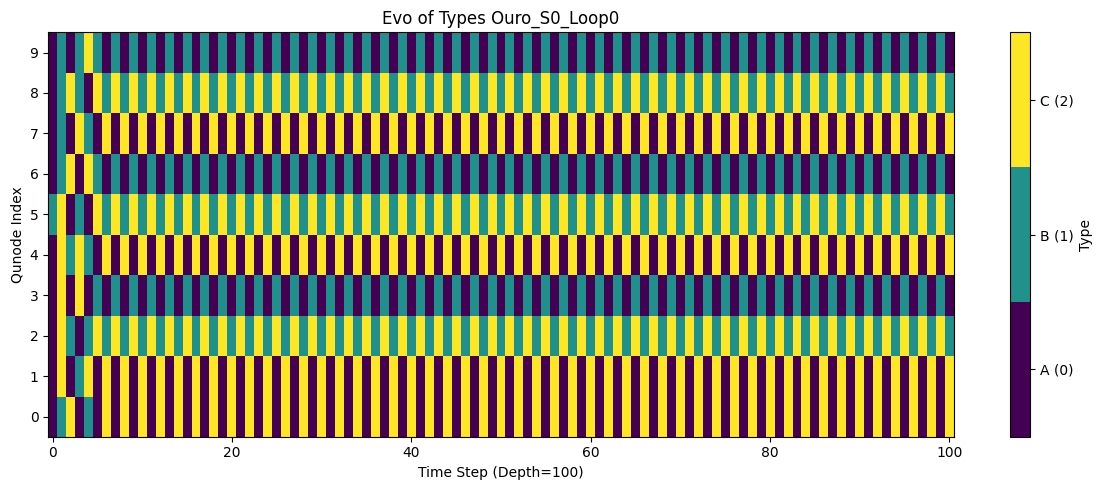

Training LSTM for Ouro_S0...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S0: 100.00%
*** New best (lowest LSTM acc): 1.0000 with config from step 0 ***
LSTM accuracy high, perturbing QCA parameters for next step...
  New thresholds: A->B 0.556, B->A 0.515


===== Ouroboros Loop Step 2/10 =====
Running QCA for Ouro_S1 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'cx', 'AB': 'cx', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': np.float64(0.5561397459414564), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.5151402609776541), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 407.73it/s]
<ipython-input-26-f0ab5fcae2a9>:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


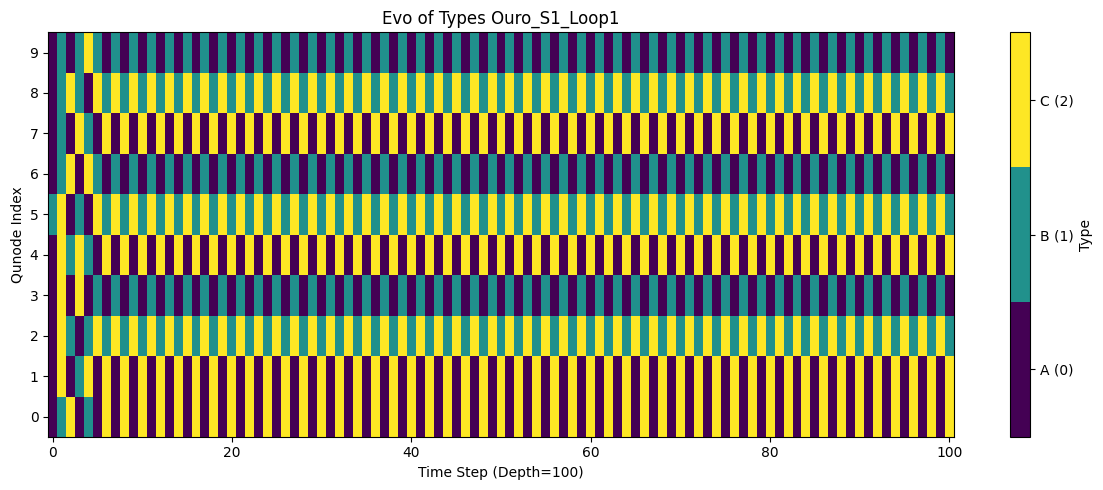

Training LSTM for Ouro_S1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S1: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New interaction: AB changed to RYY_PIO4


===== Ouroboros Loop Step 3/10 =====
Running QCA for Ouro_S2 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'cx', 'AB': 'ryy', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': np.float64(0.5561397459414564), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.5151402609776541), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 420.14it/s]
<ipython-input-26-f0ab5fcae2a9>:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


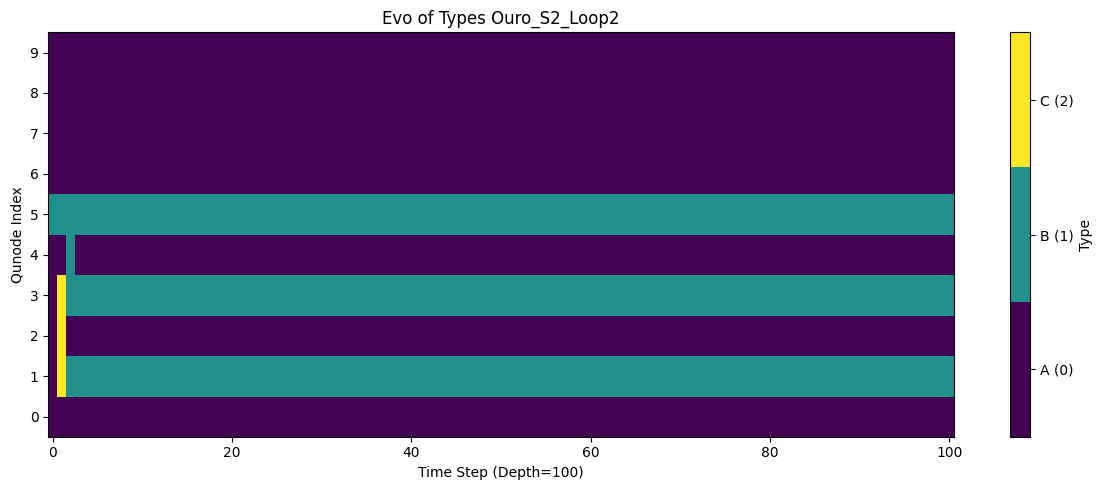

Training LSTM for Ouro_S2...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S2: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New thresholds: A->B 0.499, B->A 0.533


===== Ouroboros Loop Step 4/10 =====
Running QCA for Ouro_S3 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'cx', 'AB': 'ryy', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': np.float64(0.49887176272769646), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.5331223899800864), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 432.68it/s]
<ipython-input-26-f0ab5fcae2a9>:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


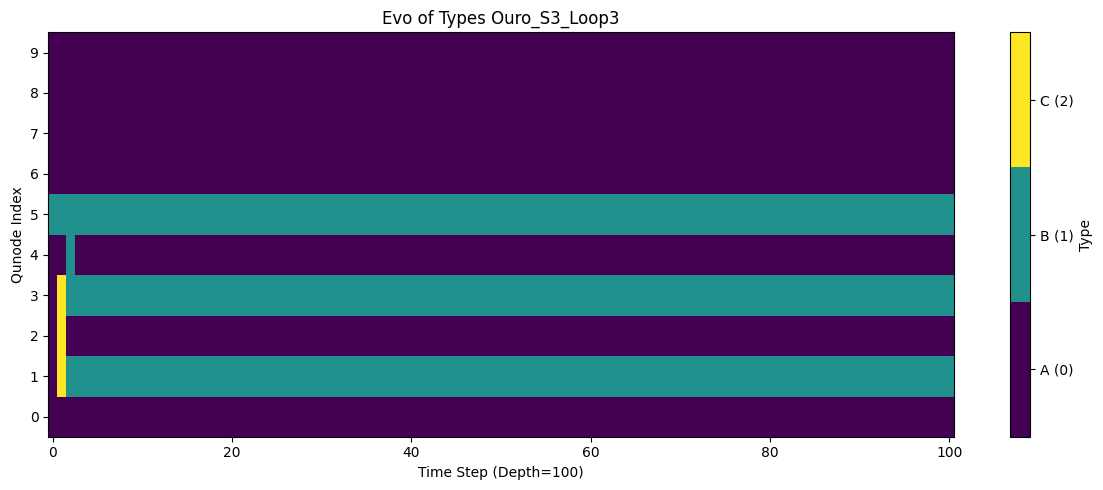

Training LSTM for Ouro_S3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S3: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New initial quantum state prep: hadamard_all


===== Ouroboros Loop Step 5/10 =====
Running QCA for Ouro_S4 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'cx', 'AB': 'ryy', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': np.float64(0.49887176272769646), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.5331223899800864), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: hadamard_all, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 368.11it/s]
<ipython-input-26-f0ab5fcae2a9>:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


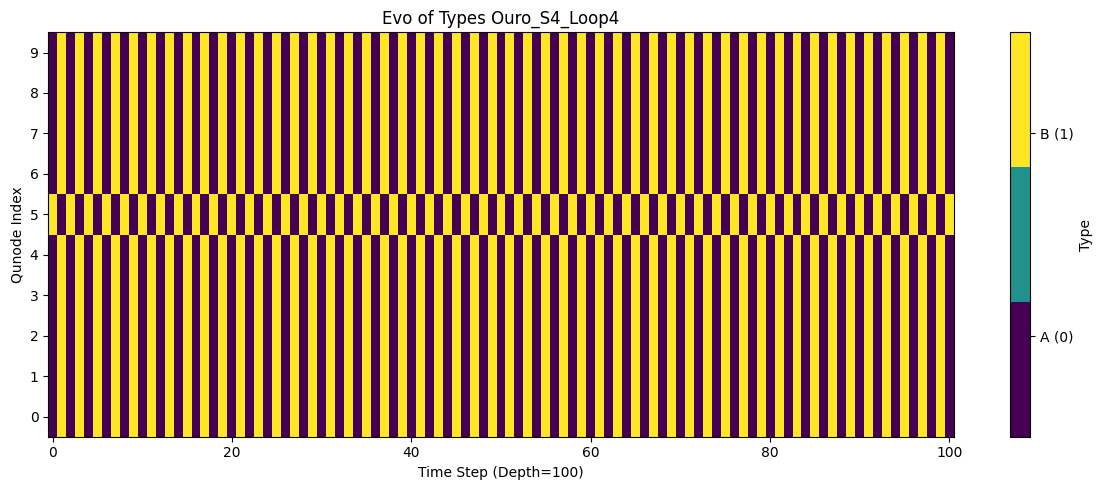

Training LSTM for Ouro_S4...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S4: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New initial quantum state prep: zero_all


===== Ouroboros Loop Step 6/10 =====
Running QCA for Ouro_S5 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'cx', 'AB': 'ryy', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': np.float64(0.49887176272769646), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.5331223899800864), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: zero_all, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 562.77it/s]
<ipython-input-26-f0ab5fcae2a9>:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


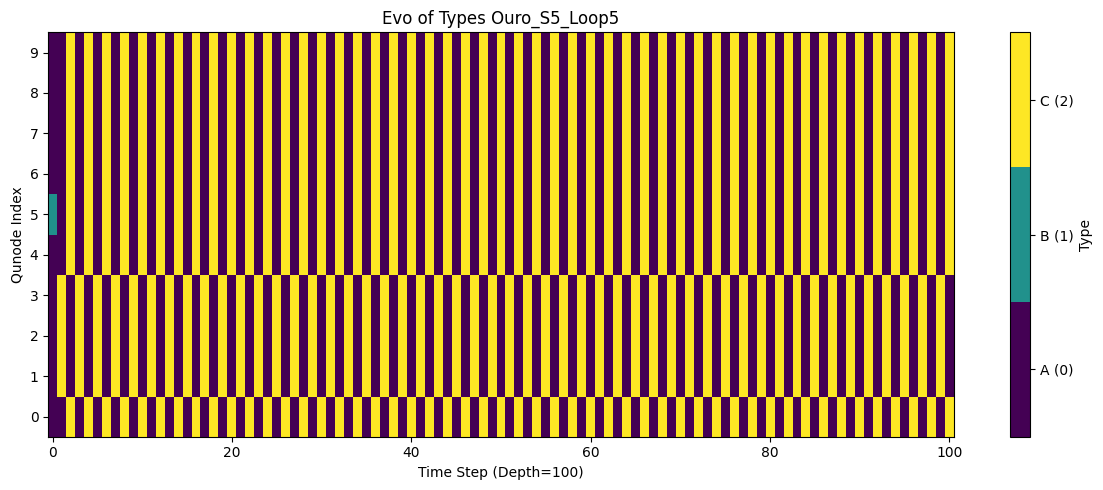

Training LSTM for Ouro_S5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S5: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New initial quantum state prep: mixed_A0_BH_CH


===== Ouroboros Loop Step 7/10 =====
Running QCA for Ouro_S6 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'cx', 'AB': 'ryy', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': np.float64(0.49887176272769646), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.5331223899800864), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: mixed_A0_BH_CH, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 384.37it/s]
<ipython-input-26-f0ab5fcae2a9>:139: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


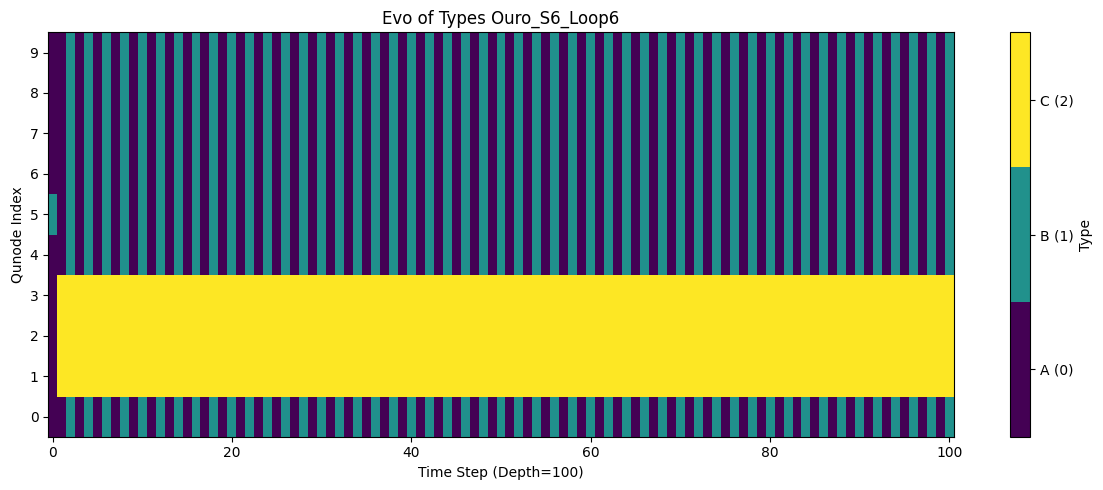

Training LSTM for Ouro_S6...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S6: 81.05%
*** New best (lowest LSTM acc): 0.8105 with config from step 6 ***
LSTM accuracy is low or moderate, trying more significant random tweak to interactions.
  Major tweak: CC changed to RZZ_PIO4
  Major tweak: AB changed to T


===== Ouroboros Loop Step 8/10 =====
Running QCA for Ouro_S7 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'rzz', 'AB': 't', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': np.float64(0.49887176272769646), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.5331223899800864), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: mixed_A0_BH_CH, Init Types: seed_A


QCA(10Q):   0%|          | 0/100 [00:00<?, ?it/s]


CircuitError: 'The amount of qubit(2)/clbit(0) arguments does not match the gate expectation (1).'

In [26]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate, SGate, TGate, CCXGate
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm

# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Softmax
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# --- QCA Parameters ---
N_QUNODES_DEFAULT = 10
DEPTH_DEFAULT = 100

TYPE_A = 0; TYPE_B = 1; TYPE_C = 2
NUM_DISTINCT_TYPES = 3
GATES = {"H":HGate(),"X":XGate(),"I":IGate(),"S":SGate(),"T":TGate(),"CX":CXGate(),"CZ":CZGate(),
         "SWAP":SwapGate(),"CCX":CCXGate(),"RZZ_PIO4":RZZGate(np.pi/4),"RZZ_PIO2":RZZGate(np.pi/2),
         "RXX_PIO4":RXXGate(np.pi/4),"RYY_PIO4":RYYGate(np.pi/4)}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict, type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"):
        self.num_qunodes=num_qunodes; self.current_types=initial_types.copy(); self.type_history=[self.current_types.copy()]
        self.quantum_outcome_history=[]; self.interaction_config=interaction_config; self.type_update_rule_config=type_update_rule_config
        self.initial_quantum_state_prep=initial_quantum_state_prep; self.simulator=AerSimulator(method='statevector'); self.circuit_visualization_list=[]

    def _get_interaction_unitary(self,t1,t2):
        k=tuple(sorted((t1,t2)))
        if k==(TYPE_A,TYPE_A):return self.interaction_config.get("AA",GATES["I"])
        if k==(TYPE_B,TYPE_B):return self.interaction_config.get("BB",GATES["I"])
        if k==(TYPE_C,TYPE_C):return self.interaction_config.get("CC",GATES["I"])
        if k==(TYPE_A,TYPE_B):return self.interaction_config.get("AB",GATES["I"])
        if k==(TYPE_A,TYPE_C):return self.interaction_config.get("AC",GATES["I"])
        if k==(TYPE_B,TYPE_C):return self.interaction_config.get("BC",GATES["I"])
        return GATES["I"]

    def _build_interaction_circuit(self):
        qc=QuantumCircuit(self.num_qunodes,name=f"QCA_int"); app=False
        if self.initial_quantum_state_prep=="hadamard_all":[qc.h(i)for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep=="basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.x(i)
                elif self.current_types[i]==TYPE_C:qc.x(i)
        elif self.initial_quantum_state_prep=="mixed_A0_BH_CH":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.h(i)
                elif self.current_types[i]==TYPE_C:qc.h(i);qc.x(i)
        if self.num_qunodes>0:qc.barrier(label="init_state")
        for i in range(self.num_qunodes):
            op=self._get_interaction_unitary(self.current_types[i],self.current_types[(i+1)%self.num_qunodes])
            if op is not None and op.name.lower()!='id':qc.append(op,[i,(i+1)%self.num_qunodes]);app=True
        if app and self.num_qunodes>1:qc.barrier(label="int")
        return qc

    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy();cfg = self.type_update_rule_config;r_name = cfg.get("name", "simple_threshold_3types")
        if r_name == "simple_threshold_3types":
            for i in range(self.num_qunodes):
                p1 = quantum_outcomes_p1[i]; cT = self.current_types[i]
                if cT == TYPE_A:
                    if p1 > cfg.get("thresh_A_to_B", 0.6): new_types[i] = TYPE_B
                    elif p1 < cfg.get("thresh_A_to_C", 0.2): new_types[i] = TYPE_C
                elif cT == TYPE_B:
                    if p1 < cfg.get("thresh_B_to_A", 0.4): new_types[i] = TYPE_A
                    elif p1 > cfg.get("thresh_B_to_C", 0.8): new_types[i] = TYPE_C
                elif cT == TYPE_C:
                    if p1 > cfg.get("thresh_C_to_B", 0.55): new_types[i] = TYPE_B
                    elif p1 < cfg.get("thresh_C_to_A", 0.45): new_types[i] = TYPE_A
        elif r_name == "quantum_neighborhood_logic_v1":
            sensitivity = cfg.get("sensitivity", 0.1)
            p1_dev_low = -sensitivity; p1_dev_high = sensitivity
            prob_boundary_flip = cfg.get("prob_boundary_flip", 0.2)
            prob_C_decay = cfg.get("prob_C_decay", 0.05)
            for i in range(self.num_qunodes):
                my_t,my_p1_dev=self.current_types[i],quantum_outcomes_p1[i]-0.5
                l_idx,r_idx=(i-1+self.num_qunodes)%self.num_qunodes,(i+1)%self.num_qunodes
                l_t,r_t=self.current_types[l_idx],self.current_types[r_idx]
                l_p1_dev,r_p1_dev=quantum_outcomes_p1[l_idx]-0.5,quantum_outcomes_p1[r_idx]-0.5
                if my_t==TYPE_A:
                    if my_p1_dev > p1_dev_high and (l_t==TYPE_B or r_t==TYPE_B):
                        if np.random.rand() < prob_boundary_flip : new_types[i]=TYPE_B
                    elif my_p1_dev < p1_dev_low and (l_t==TYPE_C or r_t==TYPE_C): new_types[i]=TYPE_C
                    elif (l_t==TYPE_B and r_t==TYPE_B) and abs(my_p1_dev)<sensitivity/2 : new_types[i]=TYPE_B
                elif my_t==TYPE_B:
                    if my_p1_dev < p1_dev_low and (l_t==TYPE_A or r_t==TYPE_A):
                        if np.random.rand() < prob_boundary_flip : new_types[i]=TYPE_A
                    elif my_p1_dev > p1_dev_high and (l_t==TYPE_C or r_t==TYPE_C): new_types[i]=TYPE_C
                    elif (l_t==TYPE_A and r_t==TYPE_A) and abs(my_p1_dev)<sensitivity/2 : new_types[i]=TYPE_A
                elif my_t==TYPE_C:
                    if (l_t==TYPE_A and r_t==TYPE_A): new_types[i]=TYPE_A
                    elif (l_t==TYPE_B and r_t==TYPE_B): new_types[i]=TYPE_B
                    elif my_p1_dev < -0.1: new_types[i]=TYPE_A
                    elif my_p1_dev > 0.1: new_types[i]=TYPE_B
                    elif np.random.rand() < prob_C_decay: new_types[i]=TYPE_A if np.random.rand()<0.5 else TYPE_B
        return new_types

    def step(self):
        interaction_qc=self._build_interaction_circuit()
        if not self.circuit_visualization_list:self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj=Statevector(interaction_qc);p1_out=np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):p_qi=final_statevector_obj.probabilities([i]);p1_out[i]=p_qi[1]if len(p_qi)==2 else 0.0
        self.quantum_outcome_history.append(p1_out.copy());new_T=self._apply_type_update_rule(p1_out)
        self.current_types=new_T;self.type_history.append(self.current_types.copy());return p1_out

    def run(self,n_steps,verbose=False):
        if verbose:print("Init Types:",self.current_types)
        try:it_range=tqdm(range(n_steps),desc=f"QCA({self.num_qunodes}Q)")
        except NameError:it_range=range(n_steps);print("tqdm missing, using simple print for progress.")
        for sn in it_range:
            o=self.step()
            if verbose:print(f"St{sn+1}/{n_steps}-P1:{np.round(o,2)},NewT:{self.current_types}")
            elif not isinstance(it_range,range):pass
            elif(sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1:print(f" QCA St {sn+1}/{n_steps} done...")
        if not isinstance(it_range,range):it_range.close()
        if verbose or isinstance(it_range,range)and not((sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1):print("QCA Sim Done.")

    def get_type_history_as_array(self):return np.array(self.type_history)

    def plot_type_evolution(self, title_suffix="", experiment_label=""): # CORRECTED SIGNATURE
        history_arr=self.get_type_history_as_array();fig_w=max(12,history_arr.shape[0]*0.07);fig_h=max(5,self.num_qunodes*0.4)
        plt.figure(figsize=(fig_w,fig_h));
        actual_distinct_types_in_data = np.unique(history_arr); num_actual_distinct = len(actual_distinct_types_in_data)
        cmap_num_colors = NUM_DISTINCT_TYPES if 'NUM_DISTINCT_TYPES' in globals() and NUM_DISTINCT_TYPES >= num_actual_distinct and num_actual_distinct > 0 else num_actual_distinct
        if cmap_num_colors == 0: cmap_num_colors = 1
        if num_actual_distinct == 1 and cmap_num_colors < 2 : cmap_num_colors = 2
        if 'NUM_DISTINCT_TYPES' in globals() and NUM_DISTINCT_TYPES == 1 and cmap_num_colors < 2: cmap_num_colors = 2 # Ensure at least 2 colors for cmap if only 1 type is possible globally

        cmap = plt.cm.get_cmap('viridis', cmap_num_colors)
        min_val_imshow = TYPE_A - 0.5
        max_val_imshow = max(actual_distinct_types_in_data) + 0.5 if num_actual_distinct > 0 else (NUM_DISTINCT_TYPES -1) + 0.5

        plt.imshow(history_arr.T,cmap=cmap,aspect='auto',interpolation='nearest',origin='lower',
                   vmin=min_val_imshow, vmax=max_val_imshow)
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})");plt.ylabel("Qunode Index");
        title_to_display = f"Evo of Types {experiment_label}{title_suffix}"
        plt.title(title_to_display);

        cbar_ticks_final = sorted(list(actual_distinct_types_in_data.astype(int)))
        if not cbar_ticks_final and history_arr.size > 0 and not np.all(np.isnan(history_arr)): cbar_ticks_final = [int(history_arr.flat[0])]
        elif not cbar_ticks_final: cbar_ticks_final = list(range(NUM_DISTINCT_TYPES)) if 'NUM_DISTINCT_TYPES' in globals() else [0]

        cbar_tick_labels = [f'{chr(65+i)} ({i})' for i in cbar_ticks_final if 0 <= i < 26]

        if cbar_ticks_final :
            cbar = plt.colorbar(label="Type", ticks=cbar_ticks_final);
            if len(cbar_tick_labels) == len(cbar_ticks_final): cbar.ax.set_yticklabels(cbar_tick_labels)
        else: plt.colorbar(label="Type")

        plt.yticks(np.arange(self.num_qunodes)); plt.tight_layout(); plt.show()

    def visualize_example_interaction_circuit(self):
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- ML Data Preparation ---
def create_sequences(data, window_size):
    X, y = [], [];
    for i in range(len(data)-window_size):X.append(data[i:i+window_size]);y.append(data[i+window_size])
    return np.array(X),np.array(y)

# --- Main Execution with Parameter Feedback Loop ---
if __name__ == "__main__":
    output_base_dir = "qca_ouroboros_loop_v1_fixed_plot"
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    N_QUNODES_LOOP = 10
    DEPTH_LOOP = 100
    N_OUROBOROS_STEPS = 10
    LSTM_EPOCHS_LOOP = 20

    current_interaction_config = {"AA":GATES["CX"],"BB":GATES["CX"],"CC":GATES["CX"],
                                  "AB":GATES["CX"],"AC":GATES["CX"],"BC":GATES["CX"]}
    current_type_update_config = {"name":"simple_threshold_3types",
                                  "thresh_A_to_B":0.501,"thresh_A_to_C":0.05,
                                  "thresh_B_to_A":0.499,"thresh_B_to_C":0.95,
                                  "thresh_C_to_A":0.45,"thresh_C_to_B":0.55}
    current_initial_quantum_state_prep = "basis_from_type"
    current_initial_types_pattern = "seed_A"

    best_config_so_far = {"lstm_acc": 1.01} # Initialize higher than possible accuracy
    lowest_lstm_accuracy = 1.01
    all_ouroboros_results = []

    for ouroboros_step in range(N_OUROBOROS_STEPS):
        print(f"\n\n===== Ouroboros Loop Step {ouroboros_step + 1}/{N_OUROBOROS_STEPS} =====")
        experiment_label = f"Ouro_S{ouroboros_step}"
        np.random.seed(ouroboros_step)
        n_q = N_QUNODES_LOOP
        if current_initial_types_pattern=="random_ABC":initial_types=np.random.choice([TYPE_A,TYPE_B,TYPE_C],size=n_q)
        elif current_initial_types_pattern=="alternating_ABC":initial_types=np.array([(TYPE_A if i%3==0 else(TYPE_B if i%3==1 else TYPE_C))for i in range(n_q)])
        elif current_initial_types_pattern=="seed_A":initial_types=np.full(n_q,TYPE_A,dtype=int);initial_types[n_q//2 if n_q>0 else 0]=TYPE_B
        else:initial_types=np.random.choice([TYPE_A,TYPE_B],size=n_q) # Default to 2 types if pattern unknown

        qca = QuantumCellularAutomaton(
            num_qunodes=n_q, initial_types=initial_types,
            interaction_config=current_interaction_config,
            type_update_rule_config=current_type_update_config,
            initial_quantum_state_prep=current_initial_quantum_state_prep)
        print(f"Running QCA for {experiment_label} (N={n_q}, D={DEPTH_LOOP})")
        print(f" Interactions: { {k:v.name for k,v in current_interaction_config.items()} }") # Print gate names
        print(f" Type Update: {current_type_update_config}")
        print(f" Init Q Prep: {current_initial_quantum_state_prep}, Init Types: {current_initial_types_pattern}")

        qca.run(DEPTH_LOOP, verbose=False)
        type_history_data = qca.get_type_history_as_array()
        qca.plot_type_evolution(experiment_label=experiment_label, title_suffix=f"_Loop{ouroboros_step}")

        print(f"Training LSTM for {experiment_label}...")
        WINDOW_SIZE_ML=10; X_sequences,y_sequences=create_sequences(type_history_data,WINDOW_SIZE_ML)
        current_lstm_accuracy_val = 1.0
        current_lstm_accuracy_str = "N/A (Skipped)"
        if X_sequences.shape[0] < 20: print(f"Not enough sequences ({X_sequences.shape[0]}) for ML.")
        else:
            y_sequences_one_hot=to_categorical(y_sequences,num_classes=NUM_DISTINCT_TYPES)
            split_idx=int(0.8*X_sequences.shape[0]); X_train_ml,X_val_ml=X_sequences[:split_idx],X_sequences[split_idx:]
            y_train_ml,y_val_ml=y_sequences_one_hot[:split_idx],y_sequences_one_hot[split_idx:]
            if X_train_ml.shape[0] > 0 and X_val_ml.shape[0] > 0:
                model=Sequential([ LSTM(64,input_shape=(WINDOW_SIZE_ML,n_q),return_sequences=True),Dropout(0.2),
                                   LSTM(32,return_sequences=False),Dropout(0.2), Dense(n_q*NUM_DISTINCT_TYPES),
                                   Reshape((n_q,NUM_DISTINCT_TYPES)), Softmax(axis=-1)])
                model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
                history=model.fit(X_train_ml,y_train_ml,epochs=LSTM_EPOCHS_LOOP,batch_size=16,validation_data=(X_val_ml,y_val_ml),verbose=0)
                loss,acc=model.evaluate(X_val_ml,y_val_ml,verbose=0); current_lstm_accuracy_val = acc
                current_lstm_accuracy_str = f"{acc*100:.2f}%"
                print(f"LSTM Val Acc for {experiment_label}: {current_lstm_accuracy_str}")
            else: print(f"Not enough train/val samples for LSTM for {experiment_label}.")

        all_ouroboros_results.append({
            "step": ouroboros_step, "label": experiment_label, "lstm_acc": current_lstm_accuracy_val,
            "interactions": {k:v.name for k,v in current_interaction_config.items()}, "type_update": current_type_update_config.copy(),
            "init_q": current_initial_quantum_state_prep, "init_types": current_initial_types_pattern
        })

        if current_lstm_accuracy_val < lowest_lstm_accuracy:
            lowest_lstm_accuracy = current_lstm_accuracy_val
            best_config_so_far = all_ouroboros_results[-1].copy()
            print(f"*** New best (lowest LSTM acc): {lowest_lstm_accuracy:.4f} with config from step {ouroboros_step} ***")

        if current_lstm_accuracy_val > 0.90 and ouroboros_step < N_OUROBOROS_STEPS -1:
            print("LSTM accuracy high, perturbing QCA parameters for next step...")
            perturb_choice = np.random.choice(['thresholds', 'interactions', 'init_q'])
            if perturb_choice == 'thresholds':
                # Example: Make thresholds more chaotic / closer to 0.5
                current_type_update_config["thresh_A_to_B"] = np.clip(0.5 + np.random.normal(0, 0.05), 0.01, 0.99) # closer to 0.5
                current_type_update_config["thresh_B_to_A"] = np.clip(0.5 + np.random.normal(0, 0.05), 0.01, 0.99) # closer to 0.5
                # ... (similar for C if used actively)
                print(f"  New thresholds: A->B {current_type_update_config['thresh_A_to_B']:.3f}, B->A {current_type_update_config['thresh_B_to_A']:.3f}")
            elif perturb_choice == 'interactions':
                interaction_key = np.random.choice(list(current_interaction_config.keys()))
                new_gate_key = np.random.choice(list(GATES.keys()))
                current_interaction_config[interaction_key] = GATES[new_gate_key]
                print(f"  New interaction: {interaction_key} changed to {new_gate_key}")
            else:
                current_initial_quantum_state_prep = np.random.choice(["hadamard_all", "basis_from_type", "zero_all", "mixed_A0_BH_CH"])
                print(f"  New initial quantum state prep: {current_initial_quantum_state_prep}")
        elif ouroboros_step < N_OUROBOROS_STEPS -1:
             print("LSTM accuracy is low or moderate, trying more significant random tweak to interactions.")
             for _ in range(2): # Tweak 2 interactions
                interaction_key = np.random.choice(list(current_interaction_config.keys()))
                new_gate_key = np.random.choice(list(GATES.keys()))
                current_interaction_config[interaction_key] = GATES[new_gate_key]
                print(f"  Major tweak: {interaction_key} changed to {new_gate_key}")

    print("\n\n--- Ouroboros Loop Complete ---")
    if best_config_so_far["lstm_acc"] < 1.01 : # Check if a "best" was actually found
        print("\nBest configuration found (lowest LSTM accuracy):")
        for key, value in best_config_so_far.items():
            if isinstance(value, dict):
                print(f"  {key}:")
                for k,v_item in value.items(): print(f"    {k}: {v_item}") # Removed .name for non-gate items
            else:
                print(f"  {key}: {value}")
    else:
        print("No configurations resulted in LSTM accuracy significantly below 1.0, or loop was too short.")

    print("\n=== Demo Complete: Ouroboros Loop for QCA Parameter Exploration ===")



===== Ouroboros Loop Step 1/10 =====
Running QCA for Ouro_S0 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'cx', 'AB': 'cx', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': 0.501, 'thresh_A_to_C': 0.05, 'thresh_B_to_A': 0.499, 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 233.70it/s]
<ipython-input-4-5016a90dbe01>:138: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


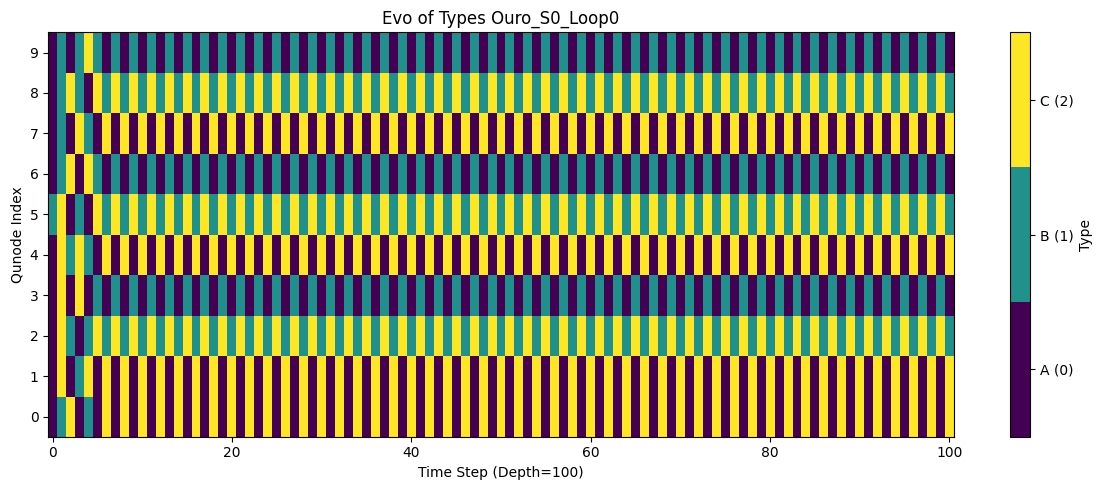

Training LSTM for Ouro_S0...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S0: 100.00%
*** New best (lowest LSTM acc): 1.0000 with config from step 0 ***
LSTM accuracy high, perturbing QCA parameters for next step...
  New thresholds: A->B 0.668, B->A 0.545


===== Ouroboros Loop Step 2/10 =====
Running QCA for Ouro_S1 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'cx', 'AB': 'cx', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': np.float64(0.6684192378243693), 'thresh_A_to_C': np.float64(0.3431782470491027), 'thresh_B_to_A': np.float64(0.5454207829329623), 'thresh_B_to_C': np.float64(0.9389006955136502), 'thresh_C_to_A': np.float64(0.4741382180715834), 'thresh_C_to_B': np.float64(0.53062902437562)}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 353.44it/s]
<ipython-input-4-5016a90dbe01>:138: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


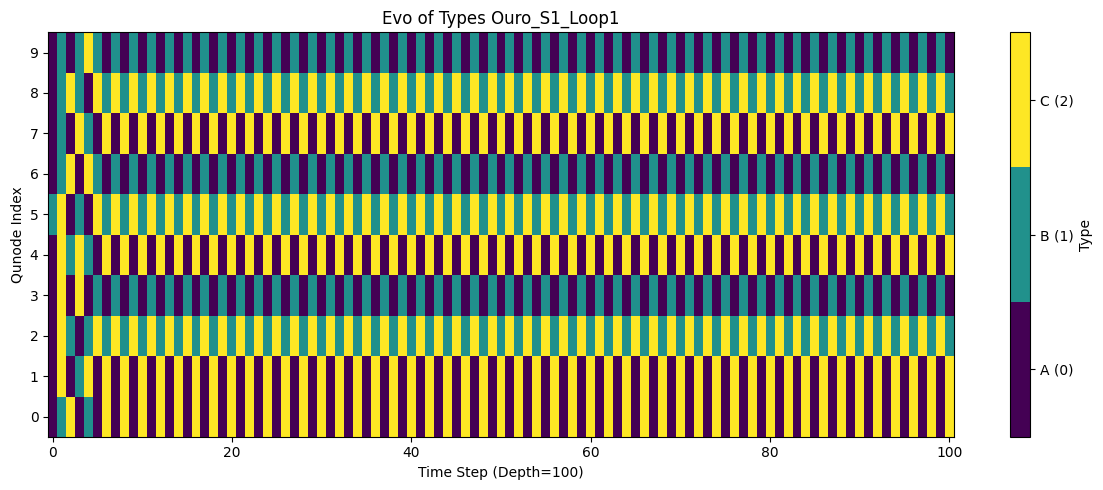

Training LSTM for Ouro_S1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S1: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New interaction: AB changed to RYY_PIO4


===== Ouroboros Loop Step 3/10 =====
Running QCA for Ouro_S2 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'cx', 'AB': 'ryy', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': np.float64(0.6684192378243693), 'thresh_A_to_C': np.float64(0.3431782470491027), 'thresh_B_to_A': np.float64(0.5454207829329623), 'thresh_B_to_C': np.float64(0.9389006955136502), 'thresh_C_to_A': np.float64(0.4741382180715834), 'thresh_C_to_B': np.float64(0.53062902437562)}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 401.31it/s]
<ipython-input-4-5016a90dbe01>:138: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


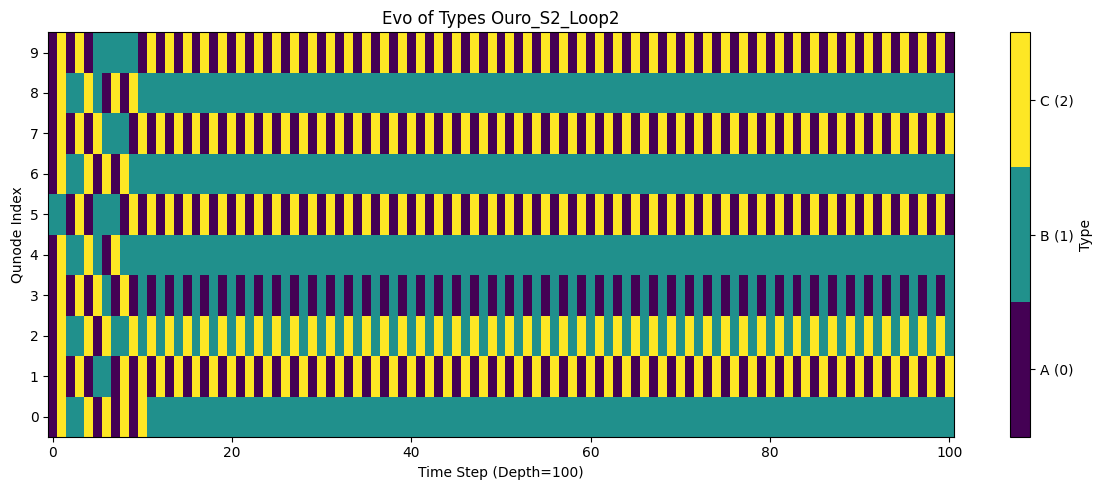

Training LSTM for Ouro_S2...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S2: 95.26%
*** New best (lowest LSTM acc): 0.9526 with config from step 2 ***
LSTM accuracy high, perturbing QCA parameters for next step...
  New thresholds: A->B 0.497, B->A 0.599


===== Ouroboros Loop Step 4/10 =====
Running QCA for Ouro_S3 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'cx', 'AB': 'ryy', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': np.float64(0.4966152881830894), 'thresh_A_to_C': np.float64(0.1282145748446429), 'thresh_B_to_A': np.float64(0.5993671699402593), 'thresh_B_to_C': np.float64(0.661770669235732), 'thresh_C_to_A': np.float64(0.5193176148203208), 'thresh_C_to_B': np.float64(0.3719703255578339)}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 427.82it/s]
<ipython-input-4-5016a90dbe01>:138: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


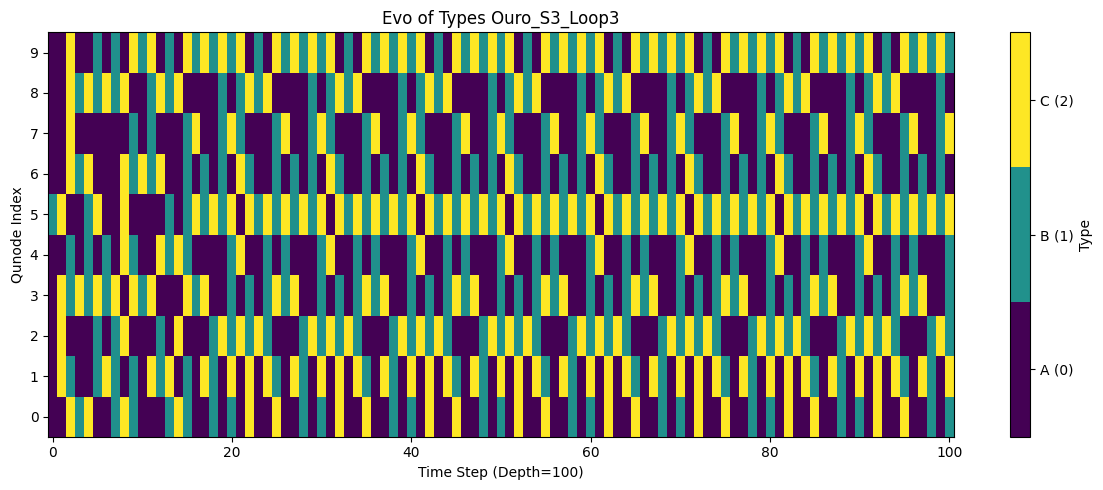

Training LSTM for Ouro_S3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S3: 63.68%
*** New best (lowest LSTM acc): 0.6368 with config from step 3 ***
LSTM accuracy is low or moderate, trying more significant random tweak to interactions.
  Major tweak: AA changed to RZZ_PIO4
  Major tweak: AB changed to CCX
  Major tweak: AA changed to H


===== Ouroboros Loop Step 5/10 =====
Running QCA for Ouro_S4 (N=10, D=100)
 Interactions: {'AA': 'h', 'BB': 'cx', 'CC': 'cx', 'AB': 'ccx', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': np.float64(0.4966152881830894), 'thresh_A_to_C': np.float64(0.1282145748446429), 'thresh_B_to_A': np.float64(0.5993671699402593), 'thresh_B_to_C': np.float64(0.661770669235732), 'thresh_C_to_A': np.float64(0.5193176148203208), 'thresh_C_to_B': np.float64(0.3719703255578339)}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q):   0%|          | 0/100 [00:00<?, ?it/s]


CircuitError: 'The amount of qubit(2)/clbit(0) arguments does not match the gate expectation (1).'

In [4]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate, SGate, TGate, CCXGate
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm

# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Softmax
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# --- QCA Parameters ---
N_QUNODES_DEFAULT = 10
DEPTH_DEFAULT = 100

TYPE_A = 0; TYPE_B = 1; TYPE_C = 2
NUM_DISTINCT_TYPES = 3 # Max number of types system is designed for
GATES = {"H":HGate(),"X":XGate(),"I":IGate(),"S":SGate(),"T":TGate(),"CX":CXGate(),"CZ":CZGate(),
         "SWAP":SwapGate(),"CCX":CCXGate(),"RZZ_PIO4":RZZGate(np.pi/4),"RZZ_PIO2":RZZGate(np.pi/2),
         "RXX_PIO4":RXXGate(np.pi/4),"RYY_PIO4":RYYGate(np.pi/4)}

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict, type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"):
        self.num_qunodes=num_qunodes; self.current_types=initial_types.copy(); self.type_history=[self.current_types.copy()]
        self.quantum_outcome_history=[]; self.interaction_config=interaction_config; self.type_update_rule_config=type_update_rule_config
        self.initial_quantum_state_prep=initial_quantum_state_prep; self.simulator=AerSimulator(method='statevector'); self.circuit_visualization_list=[]

    def _get_interaction_unitary(self,t1,t2):
        k=tuple(sorted((t1,t2)))
        if k==(TYPE_A,TYPE_A):return self.interaction_config.get("AA",GATES["I"])
        if k==(TYPE_B,TYPE_B):return self.interaction_config.get("BB",GATES["I"])
        if k==(TYPE_C,TYPE_C):return self.interaction_config.get("CC",GATES["I"])
        if k==(TYPE_A,TYPE_B):return self.interaction_config.get("AB",GATES["I"])
        if k==(TYPE_A,TYPE_C):return self.interaction_config.get("AC",GATES["I"])
        if k==(TYPE_B,TYPE_C):return self.interaction_config.get("BC",GATES["I"])
        return GATES["I"]

    def _build_interaction_circuit(self):
        qc=QuantumCircuit(self.num_qunodes,name=f"QCA_int"); app=False
        if self.initial_quantum_state_prep=="hadamard_all":[qc.h(i)for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep=="basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.x(i)
                elif self.current_types[i]==TYPE_C:qc.x(i)
        elif self.initial_quantum_state_prep=="mixed_A0_BH_CH":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.h(i)
                elif self.current_types[i]==TYPE_C:qc.h(i);qc.x(i)
        if self.num_qunodes>0:qc.barrier(label="init_state")
        for i in range(self.num_qunodes):
            op=self._get_interaction_unitary(self.current_types[i],self.current_types[(i+1)%self.num_qunodes])
            if op is not None and op.name.lower()!='id':qc.append(op,[i,(i+1)%self.num_qunodes]);app=True
        if app and self.num_qunodes>1:qc.barrier(label="int")
        return qc

    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy();cfg = self.type_update_rule_config;r_name = cfg.get("name", "simple_threshold_3types")
        if r_name == "simple_threshold_3types":
            for i in range(self.num_qunodes):
                p1 = quantum_outcomes_p1[i]; cT = self.current_types[i]
                if cT == TYPE_A:
                    if p1 > cfg.get("thresh_A_to_B", 0.6): new_types[i] = TYPE_B
                    elif p1 < cfg.get("thresh_A_to_C", 0.2): new_types[i] = TYPE_C
                elif cT == TYPE_B:
                    if p1 < cfg.get("thresh_B_to_A", 0.4): new_types[i] = TYPE_A
                    elif p1 > cfg.get("thresh_B_to_C", 0.8): new_types[i] = TYPE_C
                elif cT == TYPE_C:
                    if p1 > cfg.get("thresh_C_to_B", 0.55): new_types[i] = TYPE_B
                    elif p1 < cfg.get("thresh_C_to_A", 0.45): new_types[i] = TYPE_A
        elif r_name == "quantum_neighborhood_logic_v1": # Ensure this logic is what you intend
            sensitivity = cfg.get("sensitivity", 0.1)
            p1_dev_low = -sensitivity; p1_dev_high = sensitivity
            prob_boundary_flip = cfg.get("prob_boundary_flip", 0.2)
            prob_C_decay = cfg.get("prob_C_decay", 0.05)
            for i in range(self.num_qunodes):
                my_t,my_p1_dev=self.current_types[i],quantum_outcomes_p1[i]-0.5
                l_idx,r_idx=(i-1+self.num_qunodes)%self.num_qunodes,(i+1)%self.num_qunodes
                l_t,r_t=self.current_types[l_idx],self.current_types[r_idx]
                l_p1_dev,r_p1_dev=quantum_outcomes_p1[l_idx]-0.5,quantum_outcomes_p1[r_idx]-0.5
                if my_t==TYPE_A:
                    if my_p1_dev > p1_dev_high and (l_t==TYPE_B or r_t==TYPE_B):
                        if np.random.rand() < prob_boundary_flip : new_types[i]=TYPE_B
                    elif my_p1_dev < p1_dev_low and (l_t==TYPE_C or r_t==TYPE_C): new_types[i]=TYPE_C
                    elif (l_t==TYPE_B and r_t==TYPE_B) and abs(my_p1_dev)<sensitivity/2 : new_types[i]=TYPE_B
                elif my_t==TYPE_B:
                    if my_p1_dev < p1_dev_low and (l_t==TYPE_A or r_t==TYPE_A):
                        if np.random.rand() < prob_boundary_flip : new_types[i]=TYPE_A
                    elif my_p1_dev > p1_dev_high and (l_t==TYPE_C or r_t==TYPE_C): new_types[i]=TYPE_C
                    elif (l_t==TYPE_A and r_t==TYPE_A) and abs(my_p1_dev)<sensitivity/2 : new_types[i]=TYPE_A
                elif my_t==TYPE_C:
                    if (l_t==TYPE_A and r_t==TYPE_A): new_types[i]=TYPE_A
                    elif (l_t==TYPE_B and r_t==TYPE_B): new_types[i]=TYPE_B
                    elif my_p1_dev < -0.1: new_types[i]=TYPE_A
                    elif my_p1_dev > 0.1: new_types[i]=TYPE_B
                    elif np.random.rand() < prob_C_decay: new_types[i]=TYPE_A if np.random.rand()<0.5 else TYPE_B
        return new_types

    def step(self):
        interaction_qc=self._build_interaction_circuit()
        if not self.circuit_visualization_list:self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj=Statevector(interaction_qc);p1_out=np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):p_qi=final_statevector_obj.probabilities([i]);p1_out[i]=p_qi[1]if len(p_qi)==2 else 0.0
        self.quantum_outcome_history.append(p1_out.copy());new_T=self._apply_type_update_rule(p1_out)
        self.current_types=new_T;self.type_history.append(self.current_types.copy());return p1_out

    def run(self,n_steps,verbose=False):
        if verbose:print("Init Types:",self.current_types)
        try:it_range=tqdm(range(n_steps),desc=f"QCA({self.num_qunodes}Q)")
        except NameError:it_range=range(n_steps);print("tqdm missing, using simple print for progress.")
        for sn in it_range:
            o=self.step()
            if verbose:print(f"St{sn+1}/{n_steps}-P1:{np.round(o,2)},NewT:{self.current_types}")
            elif not isinstance(it_range,range):pass
            elif(sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1:print(f" QCA St {sn+1}/{n_steps} done...")
        if not isinstance(it_range,range):it_range.close()
        if verbose or isinstance(it_range,range)and not((sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1):print("QCA Sim Done.")

    def get_type_history_as_array(self):return np.array(self.type_history)

    def plot_type_evolution(self, title_suffix="", experiment_label=""): # THIS IS THE CORRECTED DEFINITION
        history_arr=self.get_type_history_as_array();fig_w=max(12,history_arr.shape[0]*0.07);fig_h=max(5,self.num_qunodes*0.4)
        plt.figure(figsize=(fig_w,fig_h));
        actual_distinct_types_in_data = np.unique(history_arr); num_actual_distinct = len(actual_distinct_types_in_data)
        cmap_num_colors = NUM_DISTINCT_TYPES if 'NUM_DISTINCT_TYPES' in globals() and NUM_DISTINCT_TYPES >= num_actual_distinct and num_actual_distinct > 0 else num_actual_distinct
        if cmap_num_colors == 0: cmap_num_colors = 1
        if num_actual_distinct == 1 and cmap_num_colors < 2 : cmap_num_colors = 2
        if 'NUM_DISTINCT_TYPES' in globals() and NUM_DISTINCT_TYPES == 1 and cmap_num_colors < 2: cmap_num_colors = 2
        cmap = plt.cm.get_cmap('viridis', cmap_num_colors)
        min_val_imshow = TYPE_A - 0.5
        max_val_imshow = max(actual_distinct_types_in_data) + 0.5 if num_actual_distinct > 0 else TYPE_B + 0.5
        if 'TYPE_C' in globals() and max_val_imshow < TYPE_C + 0.5 and max(TYPE_A, TYPE_B, TYPE_C) < cmap_num_colors: max_val_imshow = TYPE_C + 0.5
        plt.imshow(history_arr.T,cmap=cmap,aspect='auto',interpolation='nearest',origin='lower', vmin=min_val_imshow, vmax=max_val_imshow)
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})");plt.ylabel("Qunode Index");
        title_to_display = f"Evo of Types {experiment_label}{title_suffix}"
        plt.title(title_to_display);
        cbar_ticks_final = sorted(list(actual_distinct_types_in_data.astype(int)))
        if not cbar_ticks_final and history_arr.size > 0 and not np.all(np.isnan(history_arr)): cbar_ticks_final = [int(history_arr.flat[0])]
        elif not cbar_ticks_final: cbar_ticks_final = list(range(NUM_DISTINCT_TYPES)) if 'NUM_DISTINCT_TYPES' in globals() else [0]
        cbar_tick_labels = [f'{chr(65+i)} ({i})' for i in cbar_ticks_final if 0 <= i < 26]
        if cbar_ticks_final :
            cbar = plt.colorbar(label="Type", ticks=cbar_ticks_final);
            if len(cbar_tick_labels) == len(cbar_ticks_final): cbar.ax.set_yticklabels(cbar_tick_labels)
        else: plt.colorbar(label="Type")
        plt.yticks(np.arange(self.num_qunodes)); plt.tight_layout(); plt.show()

    def visualize_example_interaction_circuit(self):
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- ML Data Preparation ---
def create_sequences(data, window_size):
    X, y = [], [];
    for i in range(len(data)-window_size):X.append(data[i:i+window_size]);y.append(data[i+window_size])
    return np.array(X),np.array(y)

# --- Main Execution with Parameter Feedback Loop ---
if __name__ == "__main__":
    output_base_dir = "qca_ouroboros_loop_v1_final"
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    N_QUNODES_LOOP = 10
    DEPTH_LOOP = 100
    N_OUROBOROS_STEPS = 10 # Number of QCA configurations to test in the loop
    LSTM_EPOCHS_LOOP = 20 # Epochs for each LSTM training

    # Initial QCA Configuration
    current_interaction_config = {"AA":GATES["CX"],"BB":GATES["CX"],"CC":GATES["CX"],
                                  "AB":GATES["CX"],"AC":GATES["CX"],"BC":GATES["CX"]}
    current_type_update_config = {"name":"simple_threshold_3types",
                                  "thresh_A_to_B":0.501,"thresh_A_to_C":0.05,
                                  "thresh_B_to_A":0.499,"thresh_B_to_C":0.95,
                                  "thresh_C_to_A":0.45,"thresh_C_to_B":0.55}
    current_initial_quantum_state_prep = "basis_from_type"
    current_initial_types_pattern = "seed_A"

    best_config_so_far = {"lstm_acc": 1.01}
    lowest_lstm_accuracy = 1.01
    all_ouroboros_results = []

    for ouroboros_step in range(N_OUROBOROS_STEPS):
        print(f"\n\n===== Ouroboros Loop Step {ouroboros_step + 1}/{N_OUROBOROS_STEPS} =====")
        experiment_label = f"Ouro_S{ouroboros_step}"
        np.random.seed(ouroboros_step) # Seed for initial types if random, and for probabilistic rules
        n_q = N_QUNODES_LOOP
        if current_initial_types_pattern=="random_ABC":initial_types=np.random.choice([TYPE_A,TYPE_B,TYPE_C],size=n_q)
        elif current_initial_types_pattern=="alternating_ABC":initial_types=np.array([(TYPE_A if i%3==0 else(TYPE_B if i%3==1 else TYPE_C))for i in range(n_q)])
        elif current_initial_types_pattern=="seed_A":initial_types=np.full(n_q,TYPE_A,dtype=int);initial_types[n_q//2 if n_q>0 else 0]=TYPE_B
        else:initial_types=np.random.choice([TYPE_A,TYPE_B],size=n_q)

        qca = QuantumCellularAutomaton(
            num_qunodes=n_q, initial_types=initial_types,
            interaction_config=current_interaction_config,
            type_update_rule_config=current_type_update_config,
            initial_quantum_state_prep=current_initial_quantum_state_prep)
        print(f"Running QCA for {experiment_label} (N={n_q}, D={DEPTH_LOOP})")
        print(f" Interactions: { {k:v.name for k,v in current_interaction_config.items()} }")
        print(f" Type Update: {current_type_update_config}")
        print(f" Init Q Prep: {current_initial_quantum_state_prep}, Init Types: {current_initial_types_pattern}")

        qca.run(DEPTH_LOOP, verbose=False)
        type_history_data = qca.get_type_history_as_array()
        # Call plot_type_evolution with the corrected signature
        qca.plot_type_evolution(experiment_label=experiment_label, title_suffix=f"_Loop{ouroboros_step}")

        print(f"Training LSTM for {experiment_label}...")
        WINDOW_SIZE_ML=10; X_sequences,y_sequences=create_sequences(type_history_data,WINDOW_SIZE_ML)
        current_lstm_accuracy_val = 1.0
        current_lstm_accuracy_str = "N/A (Skipped)"
        if X_sequences.shape[0] < 20: print(f"Not enough sequences ({X_sequences.shape[0]}) for ML.")
        else:
            y_sequences_one_hot=to_categorical(y_sequences,num_classes=NUM_DISTINCT_TYPES)
            split_idx=int(0.8*X_sequences.shape[0]); X_train_ml,X_val_ml=X_sequences[:split_idx],X_sequences[split_idx:]
            y_train_ml,y_val_ml=y_sequences_one_hot[:split_idx],y_sequences_one_hot[split_idx:]
            if X_train_ml.shape[0] > 0 and X_val_ml.shape[0] > 0:
                model=Sequential([ LSTM(64,input_shape=(WINDOW_SIZE_ML,n_q),return_sequences=True),Dropout(0.2),
                                   LSTM(32,return_sequences=False),Dropout(0.2), Dense(n_q*NUM_DISTINCT_TYPES),
                                   Reshape((n_q,NUM_DISTINCT_TYPES)), Softmax(axis=-1)])
                model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
                history=model.fit(X_train_ml,y_train_ml,epochs=LSTM_EPOCHS_LOOP,batch_size=16,validation_data=(X_val_ml,y_val_ml),verbose=0)
                loss,acc=model.evaluate(X_val_ml,y_val_ml,verbose=0); current_lstm_accuracy_val = acc
                current_lstm_accuracy_str = f"{acc*100:.2f}%"
                print(f"LSTM Val Acc for {experiment_label}: {current_lstm_accuracy_str}")
            else: print(f"Not enough train/val samples for LSTM for {experiment_label}.")

        all_ouroboros_results.append({
            "step": ouroboros_step, "label": experiment_label, "lstm_acc": current_lstm_accuracy_val,
            "interactions": {k:v.name for k,v in current_interaction_config.items()}, "type_update": current_type_update_config.copy(),
            "init_q": current_initial_quantum_state_prep, "init_types": current_initial_types_pattern
        })

        if current_lstm_accuracy_val < lowest_lstm_accuracy:
            lowest_lstm_accuracy = current_lstm_accuracy_val
            best_config_so_far = all_ouroboros_results[-1].copy()
            print(f"*** New best (lowest LSTM acc): {lowest_lstm_accuracy:.4f} with config from step {ouroboros_step} ***")

        if current_lstm_accuracy_val > 0.90 and ouroboros_step < N_OUROBOROS_STEPS -1:
            print("LSTM accuracy high, perturbing QCA parameters for next step...")
            perturb_choice = np.random.choice(['thresholds', 'interactions', 'init_q'])
            if perturb_choice == 'thresholds':
                current_type_update_config["thresh_A_to_B"] = np.clip(0.5 + np.random.normal(0, 0.15), 0.01, 0.99) # Wider perturbation
                current_type_update_config["thresh_B_to_A"] = np.clip(0.5 + np.random.normal(0, 0.15), 0.01, 0.99)
                current_type_update_config["thresh_A_to_C"] = np.clip(np.random.uniform(0.0,0.4), 0.01, 0.99)
                current_type_update_config["thresh_B_to_C"] = np.clip(np.random.uniform(0.6,1.0), 0.01, 0.99)
                current_type_update_config["thresh_C_to_A"] = np.clip(np.random.uniform(0.1,0.7), 0.01, 0.99)
                current_type_update_config["thresh_C_to_B"] = np.clip(np.random.uniform(0.3,0.9), 0.01, 0.99)
                print(f"  New thresholds: A->B {current_type_update_config['thresh_A_to_B']:.3f}, B->A {current_type_update_config['thresh_B_to_A']:.3f}")
            elif perturb_choice == 'interactions':
                interaction_key = np.random.choice(list(current_interaction_config.keys()))
                new_gate_key = np.random.choice(list(GATES.keys())) # Use full GATES dict
                current_interaction_config[interaction_key] = GATES[new_gate_key]
                print(f"  New interaction: {interaction_key} changed to {new_gate_key}")
            else:
                current_initial_quantum_state_prep = np.random.choice(["hadamard_all", "basis_from_type", "zero_all", "mixed_A0_BH_CH"])
                print(f"  New initial quantum state prep: {current_initial_quantum_state_prep}")
        elif ouroboros_step < N_OUROBOROS_STEPS -1:
             print("LSTM accuracy is low or moderate, trying more significant random tweak to interactions.")
             for _ in range(np.random.randint(1,4)): # Tweak 1 to 3 interactions
                interaction_key = np.random.choice(list(current_interaction_config.keys()))
                new_gate_key = np.random.choice(list(GATES.keys()))
                current_interaction_config[interaction_key] = GATES[new_gate_key]
                print(f"  Major tweak: {interaction_key} changed to {new_gate_key}")
             if np.random.rand() < 0.3: # Also perturb thresholds sometimes
                current_type_update_config["thresh_A_to_B"] = np.clip(0.5 + np.random.normal(0, 0.2), 0.01, 0.99)
                current_type_update_config["thresh_B_to_A"] = np.clip(0.5 + np.random.normal(0, 0.2), 0.01, 0.99)
                print(f"  Also tweaked thresholds: A->B {current_type_update_config['thresh_A_to_B']:.3f}, B->A {current_type_update_config['thresh_B_to_A']:.3f}")


    print("\n\n--- Ouroboros Loop Complete ---")
    if best_config_so_far["lstm_acc"] < 1.01 :
        print("\nBest configuration found (lowest LSTM accuracy that isn't perfect/skipped):")
        for key, value in best_config_so_far.items():
            if isinstance(value, dict):
                print(f"  {key}:")
                for k_inner,v_inner in value.items(): print(f"    {k_inner}: {v_inner}")
            else:
                print(f"  {key}: {value}")
    else:
        print("No configurations resulted in LSTM accuracy significantly below 1.0, or loop was too short.")

    print("\n=== Demo Complete: Ouroboros Loop for QCA Parameter Exploration ===")



===== Ouroboros Loop Step 1/10 =====
Running QCA for Ouro_S0 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'cx', 'AB': 'cx', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': 0.501, 'thresh_A_to_C': 0.05, 'thresh_B_to_A': 0.499, 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:01<00:00, 94.12it/s]
<ipython-input-3-44a361006e7b>:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


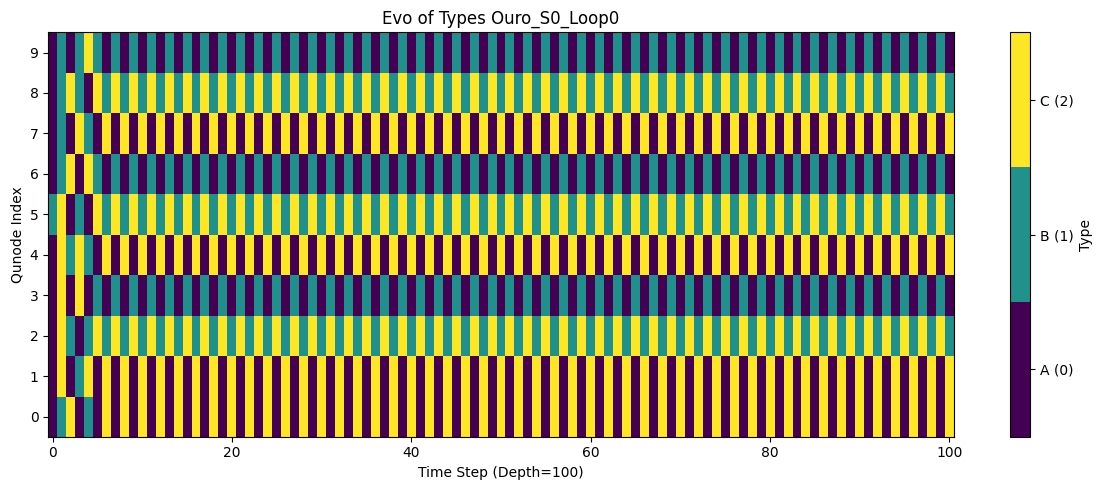

Training LSTM for Ouro_S0...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S0: 100.00%
*** New best (lowest LSTM acc): 1.0000 with config from step 0 ***
LSTM accuracy high, perturbing QCA parameters for next step...
  New interaction: CC changed to RYY_PIO4


===== Ouroboros Loop Step 2/10 =====
Running QCA for Ouro_S1 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'cx', 'CC': 'ryy', 'AB': 'cx', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': 'simple_threshold_3types', 'thresh_A_to_B': 0.501, 'thresh_A_to_C': 0.05, 'thresh_B_to_A': 0.499, 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 266.70it/s]
<ipython-input-3-44a361006e7b>:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


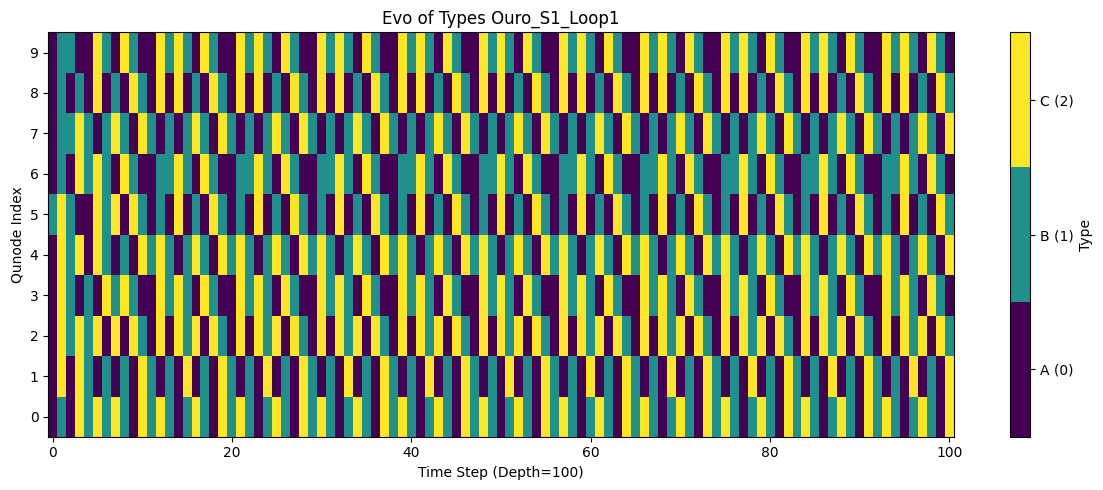

Training LSTM for Ouro_S1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S1: 61.05%
*** New best (lowest LSTM acc): 0.6105 with config from step 1 ***
LSTM accuracy is low/moderate, trying more significant random tweak to interactions & type update rule.
  Major tweak: CC changed to RYY_PIO4
  Major tweak: AB changed to RYY_PIO4
  Major tweak: BB changed to SWAP
  Changed type update rule to: quantum_neighborhood_logic_v1
  Also tweaked thresholds: A->B 0.694, B->A 0.100


===== Ouroboros Loop Step 3/10 =====
Running QCA for Ouro_S2 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'swap', 'CC': 'ryy', 'AB': 'ryy', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': np.str_('quantum_neighborhood_logic_v1'), 'thresh_A_to_B': np.float64(0.693639826255263), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.1), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 499.42it/s]
<ipython-input-3-44a361006e7b>:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


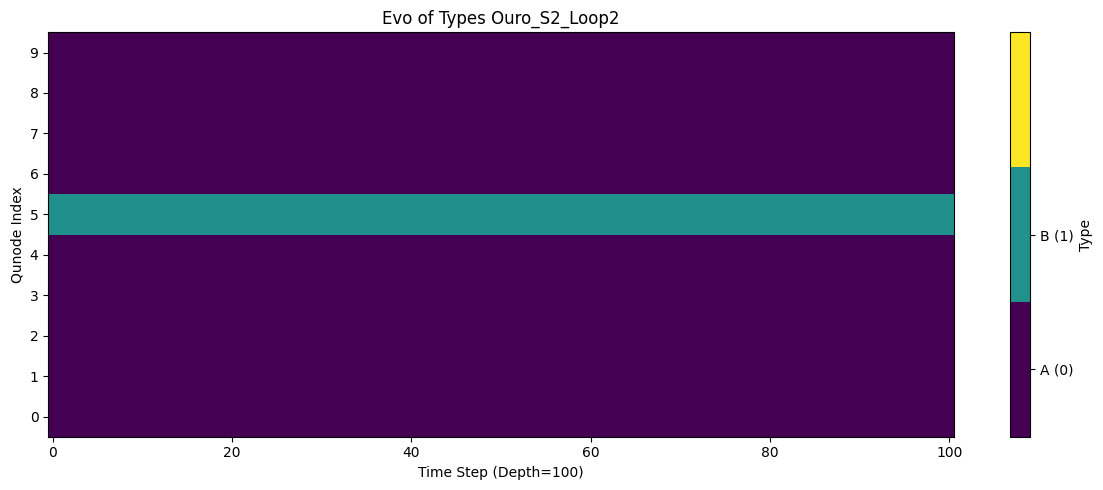

Training LSTM for Ouro_S2...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S2: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New interaction: AB changed to SWAP


===== Ouroboros Loop Step 4/10 =====
Running QCA for Ouro_S3 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'swap', 'CC': 'ryy', 'AB': 'swap', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': np.str_('quantum_neighborhood_logic_v1'), 'thresh_A_to_B': np.float64(0.693639826255263), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.1), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 510.14it/s]
<ipython-input-3-44a361006e7b>:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


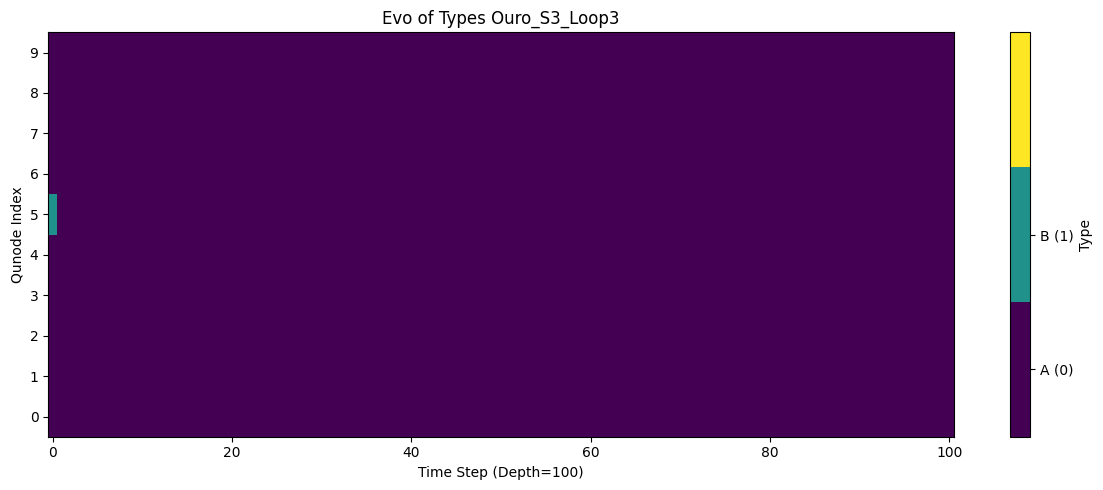

Training LSTM for Ouro_S3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S3: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New initial quantum state prep: mixed_A0_BH_CH


===== Ouroboros Loop Step 5/10 =====
Running QCA for Ouro_S4 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'swap', 'CC': 'ryy', 'AB': 'swap', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': np.str_('quantum_neighborhood_logic_v1'), 'thresh_A_to_B': np.float64(0.693639826255263), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.1), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: mixed_A0_BH_CH, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 500.65it/s]
<ipython-input-3-44a361006e7b>:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


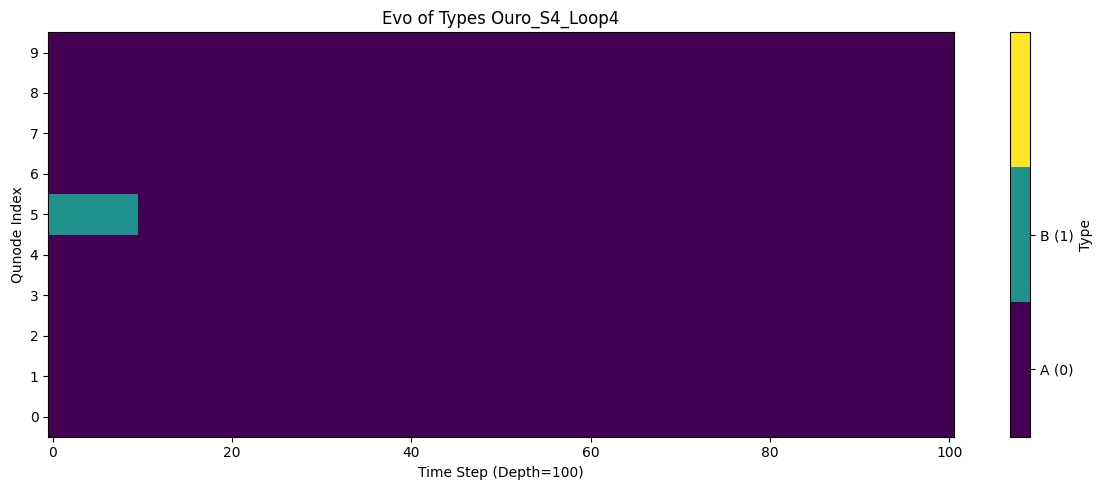

Training LSTM for Ouro_S4...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S4: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New interaction: CC changed to RYY_PIO4


===== Ouroboros Loop Step 6/10 =====
Running QCA for Ouro_S5 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'swap', 'CC': 'ryy', 'AB': 'swap', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': np.str_('quantum_neighborhood_logic_v1'), 'thresh_A_to_B': np.float64(0.693639826255263), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.1), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: mixed_A0_BH_CH, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 515.88it/s]
<ipython-input-3-44a361006e7b>:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


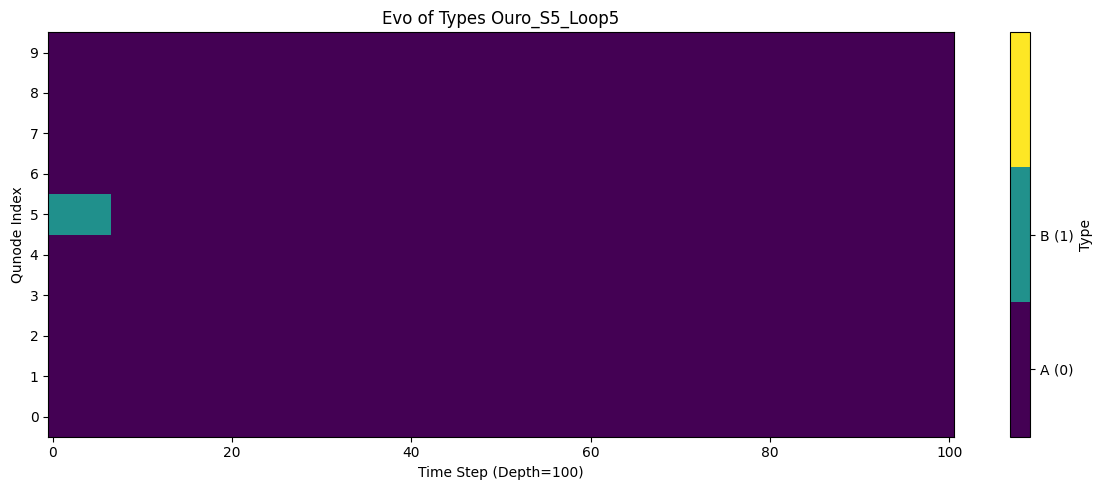

Training LSTM for Ouro_S5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S5: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New interaction: CC changed to CX


===== Ouroboros Loop Step 7/10 =====
Running QCA for Ouro_S6 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'swap', 'CC': 'cx', 'AB': 'swap', 'AC': 'cx', 'BC': 'cx'}
 Type Update: {'name': np.str_('quantum_neighborhood_logic_v1'), 'thresh_A_to_B': np.float64(0.693639826255263), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.1), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: mixed_A0_BH_CH, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 564.85it/s]
<ipython-input-3-44a361006e7b>:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


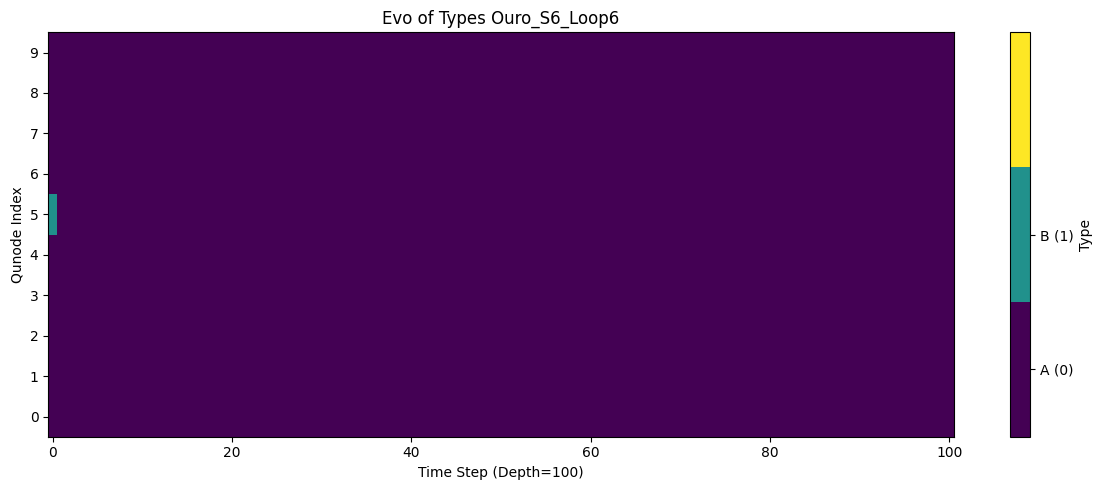

Training LSTM for Ouro_S6...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S6: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New interaction: AC changed to RZZ_PIO2


===== Ouroboros Loop Step 8/10 =====
Running QCA for Ouro_S7 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'swap', 'CC': 'cx', 'AB': 'swap', 'AC': 'rzz', 'BC': 'cx'}
 Type Update: {'name': np.str_('quantum_neighborhood_logic_v1'), 'thresh_A_to_B': np.float64(0.693639826255263), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.1), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: mixed_A0_BH_CH, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 335.13it/s]
<ipython-input-3-44a361006e7b>:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


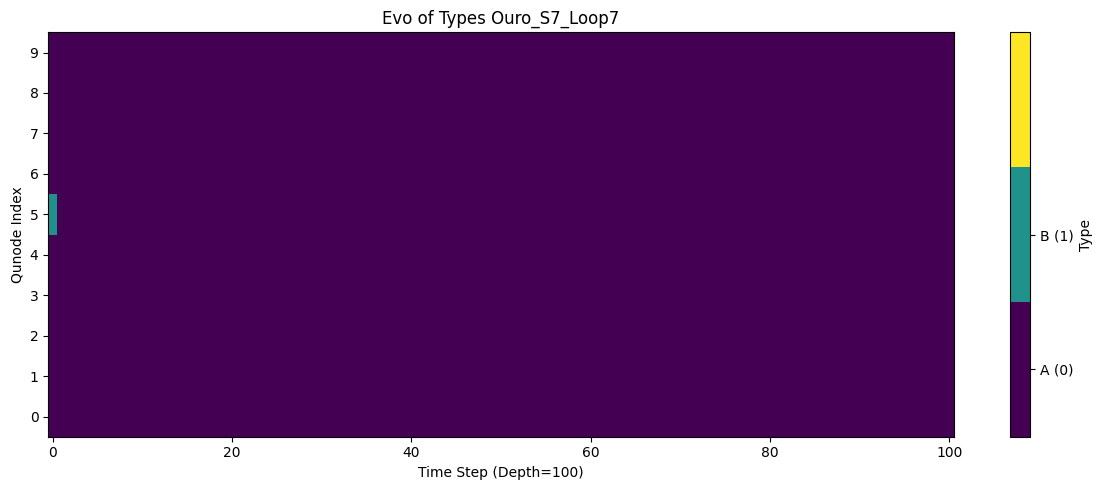

Training LSTM for Ouro_S7...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S7: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New initial quantum state prep: basis_from_type


===== Ouroboros Loop Step 9/10 =====
Running QCA for Ouro_S8 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'swap', 'CC': 'cx', 'AB': 'swap', 'AC': 'rzz', 'BC': 'cx'}
 Type Update: {'name': np.str_('quantum_neighborhood_logic_v1'), 'thresh_A_to_B': np.float64(0.693639826255263), 'thresh_A_to_C': 0.05, 'thresh_B_to_A': np.float64(0.1), 'thresh_B_to_C': 0.95, 'thresh_C_to_A': 0.45, 'thresh_C_to_B': 0.55}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 392.68it/s]
<ipython-input-3-44a361006e7b>:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


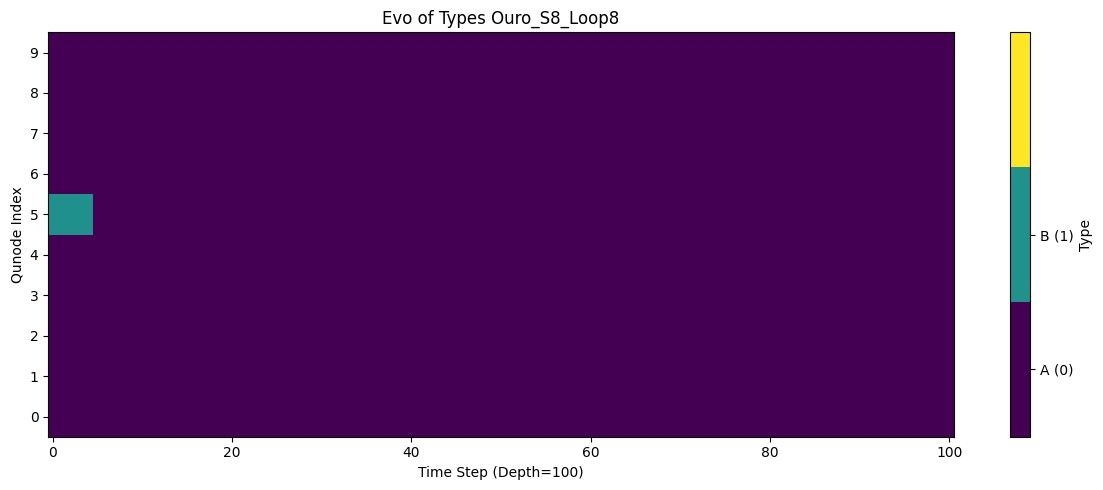

Training LSTM for Ouro_S8...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S8: 100.00%
LSTM accuracy high, perturbing QCA parameters for next step...
  New thresholds: A->B 0.629, B->A 0.273


===== Ouroboros Loop Step 10/10 =====
Running QCA for Ouro_S9 (N=10, D=100)
 Interactions: {'AA': 'cx', 'BB': 'swap', 'CC': 'cx', 'AB': 'swap', 'AC': 'rzz', 'BC': 'cx'}
 Type Update: {'name': np.str_('quantum_neighborhood_logic_v1'), 'thresh_A_to_B': np.float64(0.6293841975640261), 'thresh_A_to_C': np.float64(0.01), 'thresh_B_to_A': np.float64(0.2725562080195373), 'thresh_B_to_C': np.float64(0.7816450290829857), 'thresh_C_to_A': np.float64(0.6469953203798683), 'thresh_C_to_B': np.float64(0.7991403030847124)}
 Init Q Prep: basis_from_type, Init Types: seed_A


QCA(10Q): 100%|██████████| 100/100 [00:00<00:00, 452.86it/s]
<ipython-input-3-44a361006e7b>:143: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', cmap_num_colors)


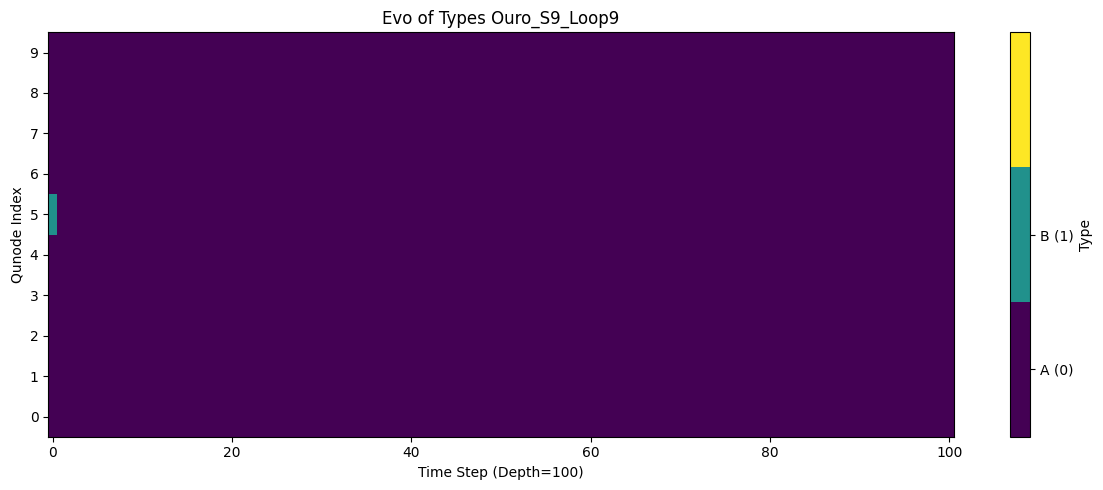

Training LSTM for Ouro_S9...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM Val Acc for Ouro_S9: 100.00%


--- Ouroboros Loop Complete ---

Best configuration found (lowest LSTM accuracy that isn't perfect/skipped):
  step: 1
  label: Ouro_S1
  lstm_acc: 0.6105263233184814
  interactions:
    AA: cx
    BB: cx
    CC: ryy
    AB: cx
    AC: cx
    BC: cx
  type_update:
    name: simple_threshold_3types
    thresh_A_to_B: 0.501
    thresh_A_to_C: 0.05
    thresh_B_to_A: 0.499
    thresh_B_to_C: 0.95
    thresh_C_to_A: 0.45
    thresh_C_to_B: 0.55
  init_q: basis_from_type
  init_types: seed_A

=== Demo Complete: Ouroboros Loop for QCA Parameter Exploration ===


In [3]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import CXGate, CZGate, RZZGate, RXXGate, RYYGate, SwapGate, HGate, XGate, IGate, SGate, TGate, CCXGate
import matplotlib.pyplot as plt
import time
import os
from typing import List, Optional, Tuple, Dict
from tqdm import tqdm

# TensorFlow / Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape, Softmax
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# --- QCA Parameters ---
N_QUNODES_DEFAULT = 10
DEPTH_DEFAULT = 100

TYPE_A = 0; TYPE_B = 1; TYPE_C = 2
NUM_DISTINCT_TYPES = 3 # Max number of types system is designed for
GATES = {"H":HGate(),"X":XGate(),"I":IGate(),"S":SGate(),"T":TGate(),"CX":CXGate(),"CZ":CZGate(),
         "SWAP":SwapGate(),"CCX":CCXGate(),"RZZ_PIO4":RZZGate(np.pi/4),"RZZ_PIO2":RZZGate(np.pi/2),
         "RXX_PIO4":RXXGate(np.pi/4),"RYY_PIO4":RYYGate(np.pi/4)}
GATES_2Q = {k:v for k,v in GATES.items() if hasattr(v,'num_qubits') and v.num_qubits==2}
GATES_2Q["I"] = IGate() # Add Identity for 2Q interactions default

class QuantumCellularAutomaton:
    def __init__(self, num_qunodes: int, initial_types: np.ndarray,
                 interaction_config: Dict, type_update_rule_config: Dict,
                 initial_quantum_state_prep: str = "hadamard_all"):
        self.num_qunodes=num_qunodes; self.current_types=initial_types.copy(); self.type_history=[self.current_types.copy()]
        self.quantum_outcome_history=[]; self.interaction_config=interaction_config; self.type_update_rule_config=type_update_rule_config
        self.initial_quantum_state_prep=initial_quantum_state_prep; self.simulator=AerSimulator(method='statevector'); self.circuit_visualization_list=[]

    def _get_interaction_unitary(self,t1,t2):
        k=tuple(sorted((t1,t2)))
        gate_instruction = GATES_2Q["I"]
        if k==(TYPE_A,TYPE_A):gate_instruction = self.interaction_config.get("AA",GATES_2Q["I"])
        elif k==(TYPE_B,TYPE_B):gate_instruction = self.interaction_config.get("BB",GATES_2Q["I"])
        elif k==(TYPE_C,TYPE_C):gate_instruction = self.interaction_config.get("CC",GATES_2Q["I"])
        elif k==(TYPE_A,TYPE_B):gate_instruction = self.interaction_config.get("AB",GATES_2Q["I"])
        elif k==(TYPE_A,TYPE_C):gate_instruction = self.interaction_config.get("AC",GATES_2Q["I"])
        elif k==(TYPE_B,TYPE_C):gate_instruction = self.interaction_config.get("BC",GATES_2Q["I"])
        if hasattr(gate_instruction, 'num_qubits') and gate_instruction.num_qubits != 2 and gate_instruction.name.lower() != 'id':
            return GATES_2Q["I"]
        return gate_instruction

    def _build_interaction_circuit(self):
        qc=QuantumCircuit(self.num_qunodes,name=f"QCA_int"); app=False
        if self.initial_quantum_state_prep=="hadamard_all":[qc.h(i)for i in range(self.num_qunodes)]
        elif self.initial_quantum_state_prep=="basis_from_type":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.x(i)
                elif self.current_types[i]==TYPE_C:qc.x(i)
        elif self.initial_quantum_state_prep=="mixed_A0_BH_CH":
            for i in range(self.num_qunodes):
                if self.current_types[i]==TYPE_B:qc.h(i)
                elif self.current_types[i]==TYPE_C:qc.h(i);qc.x(i)
        if self.num_qunodes>0:qc.barrier(label="init_state")
        for i in range(self.num_qunodes):
            op=self._get_interaction_unitary(self.current_types[i],self.current_types[(i+1)%self.num_qunodes])
            if op is not None and op.name.lower()!='id':qc.append(op,[i,(i+1)%self.num_qunodes]);app=True
        if app and self.num_qunodes>1:qc.barrier(label="int")
        return qc

    def _apply_type_update_rule(self, quantum_outcomes_p1: np.ndarray) -> np.ndarray:
        new_types = self.current_types.copy();cfg = self.type_update_rule_config;r_name = cfg.get("name", "simple_threshold_3types")
        if r_name == "simple_threshold_3types":
            for i in range(self.num_qunodes):
                p1 = quantum_outcomes_p1[i]; cT = self.current_types[i]
                if cT == TYPE_A:
                    if p1 > cfg.get("thresh_A_to_B", 0.6): new_types[i] = TYPE_B
                    elif p1 < cfg.get("thresh_A_to_C", 0.2): new_types[i] = TYPE_C
                elif cT == TYPE_B:
                    if p1 < cfg.get("thresh_B_to_A", 0.4): new_types[i] = TYPE_A
                    elif p1 > cfg.get("thresh_B_to_C", 0.8): new_types[i] = TYPE_C
                elif cT == TYPE_C:
                    if p1 > cfg.get("thresh_C_to_B", 0.55): new_types[i] = TYPE_B
                    elif p1 < cfg.get("thresh_C_to_A", 0.45): new_types[i] = TYPE_A
        elif r_name == "quantum_neighborhood_logic_v1":
            sensitivity = cfg.get("sensitivity", 0.1)
            p1_dev_low = -sensitivity; p1_dev_high = sensitivity
            prob_boundary_flip = cfg.get("prob_boundary_flip", 0.2)
            prob_C_decay = cfg.get("prob_C_decay", 0.05)
            for i in range(self.num_qunodes):
                my_t,my_p1_dev=self.current_types[i],quantum_outcomes_p1[i]-0.5
                l_idx,r_idx=(i-1+self.num_qunodes)%self.num_qunodes,(i+1)%self.num_qunodes
                l_t,r_t=self.current_types[l_idx],self.current_types[r_idx]
                l_p1_dev,r_p1_dev=quantum_outcomes_p1[l_idx]-0.5,quantum_outcomes_p1[r_idx]-0.5
                if my_t==TYPE_A:
                    if my_p1_dev > p1_dev_high and (l_t==TYPE_B or r_t==TYPE_B):
                        if np.random.rand() < prob_boundary_flip : new_types[i]=TYPE_B
                    elif my_p1_dev < p1_dev_low and (l_t==TYPE_C or r_t==TYPE_C): new_types[i]=TYPE_C
                    elif (l_t==TYPE_B and r_t==TYPE_B) and abs(my_p1_dev)<sensitivity/2 : new_types[i]=TYPE_B
                elif my_t==TYPE_B:
                    if my_p1_dev < p1_dev_low and (l_t==TYPE_A or r_t==TYPE_A):
                        if np.random.rand() < prob_boundary_flip : new_types[i]=TYPE_A
                    elif my_p1_dev > p1_dev_high and (l_t==TYPE_C or r_t==TYPE_C): new_types[i]=TYPE_C
                    elif (l_t==TYPE_A and r_t==TYPE_A) and abs(my_p1_dev)<sensitivity/2 : new_types[i]=TYPE_A
                elif my_t==TYPE_C:
                    if (l_t==TYPE_A and r_t==TYPE_A): new_types[i]=TYPE_A
                    elif (l_t==TYPE_B and r_t==TYPE_B): new_types[i]=TYPE_B
                    elif my_p1_dev < -0.1: new_types[i]=TYPE_A
                    elif my_p1_dev > 0.1: new_types[i]=TYPE_B
                    elif np.random.rand() < prob_C_decay: new_types[i]=TYPE_A if np.random.rand()<0.5 else TYPE_B
        return new_types

    def step(self):
        interaction_qc=self._build_interaction_circuit()
        if not self.circuit_visualization_list:self.circuit_visualization_list.append(interaction_qc.copy())
        final_statevector_obj=Statevector(interaction_qc);p1_out=np.zeros(self.num_qunodes)
        for i in range(self.num_qunodes):p_qi=final_statevector_obj.probabilities([i]);p1_out[i]=p_qi[1]if len(p_qi)==2 else 0.0
        self.quantum_outcome_history.append(p1_out.copy());new_T=self._apply_type_update_rule(p1_out)
        self.current_types=new_T;self.type_history.append(self.current_types.copy());return p1_out

    def run(self,n_steps,verbose=False):
        if verbose:print("Init Types:",self.current_types)
        try:it_range=tqdm(range(n_steps),desc=f"QCA({self.num_qunodes}Q)")
        except NameError:it_range=range(n_steps);print("tqdm missing, using simple print for progress.")
        for sn in it_range:
            o=self.step()
            if verbose:print(f"St{sn+1}/{n_steps}-P1:{np.round(o,2)},NewT:{self.current_types}")
            elif not isinstance(it_range,range):pass
            elif(sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1:print(f" QCA St {sn+1}/{n_steps} done...")
        if not isinstance(it_range,range):it_range.close()
        if verbose or isinstance(it_range,range)and not((sn+1)%(max(1,n_steps//20))==0 or sn==n_steps-1):print("QCA Sim Done.")

    def get_type_history_as_array(self):return np.array(self.type_history)

    def plot_type_evolution(self, title_suffix="", experiment_label=""): # CORRECTED SIGNATURE
        history_arr=self.get_type_history_as_array();fig_w=max(12,history_arr.shape[0]*0.07);fig_h=max(5,self.num_qunodes*0.4)
        plt.figure(figsize=(fig_w,fig_h));
        actual_distinct_types_in_data = np.unique(history_arr); num_actual_distinct = len(actual_distinct_types_in_data)
        cmap_num_colors = NUM_DISTINCT_TYPES if 'NUM_DISTINCT_TYPES' in globals() and NUM_DISTINCT_TYPES >= num_actual_distinct and num_actual_distinct > 0 else num_actual_distinct
        if cmap_num_colors == 0: cmap_num_colors = 1
        if num_actual_distinct == 1 and cmap_num_colors < 2 : cmap_num_colors = 2
        if 'NUM_DISTINCT_TYPES' in globals() and NUM_DISTINCT_TYPES == 1 and cmap_num_colors < 2: cmap_num_colors = 2
        cmap = plt.cm.get_cmap('viridis', cmap_num_colors)
        min_val_imshow = TYPE_A - 0.5
        max_val_imshow = max(actual_distinct_types_in_data) + 0.5 if num_actual_distinct > 0 else TYPE_B + 0.5
        if 'TYPE_C' in globals() and max_val_imshow < TYPE_C + 0.5 and max(TYPE_A,TYPE_B,TYPE_C) < cmap_num_colors: max_val_imshow = TYPE_C + 0.5
        plt.imshow(history_arr.T,cmap=cmap,aspect='auto',interpolation='nearest',origin='lower', vmin=min_val_imshow, vmax=max_val_imshow)
        plt.xlabel(f"Time Step (Depth={history_arr.shape[0]-1})");plt.ylabel("Qunode Index");
        title_to_display = f"Evo of Types {experiment_label}{title_suffix}" # Uses experiment_label
        plt.title(title_to_display);
        cbar_ticks_final = sorted(list(actual_distinct_types_in_data.astype(int)))
        if not cbar_ticks_final and history_arr.size > 0 and not np.all(np.isnan(history_arr)): cbar_ticks_final = [int(history_arr.flat[0])]
        elif not cbar_ticks_final: cbar_ticks_final = list(range(NUM_DISTINCT_TYPES)) if 'NUM_DISTINCT_TYPES' in globals() else [0]
        cbar_tick_labels = [f'{chr(65+i)} ({i})' for i in cbar_ticks_final if 0 <= i < 26]
        if cbar_ticks_final :
            cbar = plt.colorbar(label="Type", ticks=cbar_ticks_final);
            if len(cbar_tick_labels) == len(cbar_ticks_final): cbar.ax.set_yticklabels(cbar_tick_labels)
        else: plt.colorbar(label="Type")
        plt.yticks(np.arange(self.num_qunodes)); plt.tight_layout(); plt.show()

    def visualize_example_interaction_circuit(self):
        if self.circuit_visualization_list:
            print("\n--- Example Interaction Circuit (first step) ---")
            try:from IPython.display import display;display(self.circuit_visualization_list[0].draw(output='mpl',fold=-1,initial_state=True))
            except ImportError:print(self.circuit_visualization_list[0].draw(output='text',fold=-1))
        else:print("No interaction circuit stored.")

# --- ML Data Preparation ---
def create_sequences(data, window_size):
    X, y = [], [];
    for i in range(len(data)-window_size):X.append(data[i:i+window_size]);y.append(data[i+window_size])
    return np.array(X),np.array(y)

# --- Main Execution with Parameter Feedback Loop ---
if __name__ == "__main__":
    output_base_dir = "qca_ouroboros_loop_v1_final_corrected" # New output dir name
    if not os.path.exists(output_base_dir): os.makedirs(output_base_dir)

    N_QUNODES_LOOP = 10
    DEPTH_LOOP = 100
    N_OUROBOROS_STEPS = 10
    LSTM_EPOCHS_LOOP = 20

    current_interaction_config = {"AA":GATES_2Q["CX"],"BB":GATES_2Q["CX"],"CC":GATES_2Q["CX"],
                                  "AB":GATES_2Q["CX"],"AC":GATES_2Q["CX"],"BC":GATES_2Q["CX"]}
    current_type_update_config = {"name":"simple_threshold_3types",
                                  "thresh_A_to_B":0.501,"thresh_A_to_C":0.05,
                                  "thresh_B_to_A":0.499,"thresh_B_to_C":0.95,
                                  "thresh_C_to_A":0.45,"thresh_C_to_B":0.55}
    current_initial_quantum_state_prep = "basis_from_type"
    current_initial_types_pattern = "seed_A"

    best_config_so_far = {"lstm_acc": 1.01}
    lowest_lstm_accuracy = 1.01
    all_ouroboros_results = []

    for ouroboros_step in range(N_OUROBOROS_STEPS):
        print(f"\n\n===== Ouroboros Loop Step {ouroboros_step + 1}/{N_OUROBOROS_STEPS} =====")
        experiment_label = f"Ouro_S{ouroboros_step}"
        # np.random.seed(ouroboros_step) # Keep seed fixed for initial types, or vary
        n_q = N_QUNODES_LOOP
        if current_initial_types_pattern=="random_ABC":initial_types=np.random.choice([TYPE_A,TYPE_B,TYPE_C],size=n_q)
        elif current_initial_types_pattern=="alternating_ABC":initial_types=np.array([(TYPE_A if i%3==0 else(TYPE_B if i%3==1 else TYPE_C))for i in range(n_q)])
        elif current_initial_types_pattern=="seed_A":initial_types=np.full(n_q,TYPE_A,dtype=int);initial_types[n_q//2 if n_q>0 else 0]=TYPE_B
        else:initial_types=np.random.choice([TYPE_A,TYPE_B],size=n_q)

        qca = QuantumCellularAutomaton(
            num_qunodes=n_q, initial_types=initial_types,
            interaction_config=current_interaction_config,
            type_update_rule_config=current_type_update_config,
            initial_quantum_state_prep=current_initial_quantum_state_prep)
        print(f"Running QCA for {experiment_label} (N={n_q}, D={DEPTH_LOOP})")
        print(f" Interactions: { {k:v.name for k,v in current_interaction_config.items()} }")
        print(f" Type Update: {current_type_update_config}")
        print(f" Init Q Prep: {current_initial_quantum_state_prep}, Init Types: {current_initial_types_pattern}")

        qca.run(DEPTH_LOOP, verbose=False)
        type_history_data = qca.get_type_history_as_array()
        # Call plot_type_evolution with experiment_label
        qca.plot_type_evolution(experiment_label=experiment_label, title_suffix=f"_Loop{ouroboros_step}")

        print(f"Training LSTM for {experiment_label}...")
        WINDOW_SIZE_ML=10; X_sequences,y_sequences=create_sequences(type_history_data,WINDOW_SIZE_ML)
        current_lstm_accuracy_val = 1.0
        current_lstm_accuracy_str = "N/A (Skipped)"
        if X_sequences.shape[0] < 20: print(f"Not enough sequences ({X_sequences.shape[0]}) for ML.")
        else:
            y_sequences_one_hot=to_categorical(y_sequences,num_classes=NUM_DISTINCT_TYPES)
            split_idx=int(0.8*X_sequences.shape[0]); X_train_ml,X_val_ml=X_sequences[:split_idx],X_sequences[split_idx:]
            y_train_ml,y_val_ml=y_sequences_one_hot[:split_idx],y_sequences_one_hot[split_idx:]
            if X_train_ml.shape[0] > 0 and X_val_ml.shape[0] > 0:
                model=Sequential([ LSTM(64,input_shape=(WINDOW_SIZE_ML,n_q),return_sequences=True),Dropout(0.2),
                                   LSTM(32,return_sequences=False),Dropout(0.2), Dense(n_q*NUM_DISTINCT_TYPES),
                                   Reshape((n_q,NUM_DISTINCT_TYPES)), Softmax(axis=-1)])
                model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
                history=model.fit(X_train_ml,y_train_ml,epochs=LSTM_EPOCHS_LOOP,batch_size=16,validation_data=(X_val_ml,y_val_ml),verbose=0)
                loss,acc=model.evaluate(X_val_ml,y_val_ml,verbose=0); current_lstm_accuracy_val = acc
                current_lstm_accuracy_str = f"{acc*100:.2f}%"
                print(f"LSTM Val Acc for {experiment_label}: {current_lstm_accuracy_str}")
            else: print(f"Not enough train/val samples for LSTM for {experiment_label}.")

        all_ouroboros_results.append({
            "step": ouroboros_step, "label": experiment_label, "lstm_acc": current_lstm_accuracy_val,
            "interactions": {k:v.name for k,v in current_interaction_config.items()},
            "type_update": current_type_update_config.copy(),
            "init_q": current_initial_quantum_state_prep,
            "init_types": current_initial_types_pattern
        })

        if current_lstm_accuracy_val < lowest_lstm_accuracy:
            lowest_lstm_accuracy = current_lstm_accuracy_val
            best_config_so_far = all_ouroboros_results[-1].copy()
            print(f"*** New best (lowest LSTM acc): {lowest_lstm_accuracy:.4f} with config from step {ouroboros_step} ***")

        # Parameter Update Rule ("Sabotage")
        if current_lstm_accuracy_val > 0.90 and ouroboros_step < N_OUROBOROS_STEPS -1:
            print("LSTM accuracy high, perturbing QCA parameters for next step...")
            perturb_choice = np.random.choice(['thresholds', 'interactions', 'init_q_prep']) # Renamed from init_q
            if perturb_choice == 'thresholds':
                current_type_update_config["thresh_A_to_B"] = np.clip(0.5 + np.random.normal(0, 0.15), 0.01, 0.99)
                current_type_update_config["thresh_B_to_A"] = np.clip(0.5 + np.random.normal(0, 0.15), 0.01, 0.99)
                current_type_update_config["thresh_A_to_C"] = np.clip(np.random.uniform(0.0,0.4), 0.01, 0.99)
                current_type_update_config["thresh_B_to_C"] = np.clip(np.random.uniform(0.6,1.0), 0.01, 0.99)
                current_type_update_config["thresh_C_to_A"] = np.clip(np.random.uniform(0.2,0.8), 0.01, 0.99)
                current_type_update_config["thresh_C_to_B"] = np.clip(np.random.uniform(0.2,0.8), 0.01, 0.99)
                print(f"  New thresholds: A->B {current_type_update_config['thresh_A_to_B']:.3f}, B->A {current_type_update_config['thresh_B_to_A']:.3f}")
            elif perturb_choice == 'interactions':
                interaction_key = np.random.choice(list(current_interaction_config.keys()))
                new_gate_key = np.random.choice(list(GATES_2Q.keys())) # Use GATES_2Q
                current_interaction_config[interaction_key] = GATES_2Q[new_gate_key]
                print(f"  New interaction: {interaction_key} changed to {new_gate_key}")
            else: # init_q_prep
                current_initial_quantum_state_prep = np.random.choice(["hadamard_all", "basis_from_type", "zero_all", "mixed_A0_BH_CH"])
                print(f"  New initial quantum state prep: {current_initial_quantum_state_prep}")
        elif ouroboros_step < N_OUROBOROS_STEPS -1:
             print("LSTM accuracy is low/moderate, trying more significant random tweak to interactions & type update rule.")
             for _ in range(np.random.randint(1,4)):
                interaction_key = np.random.choice(list(current_interaction_config.keys()))
                new_gate_key = np.random.choice(list(GATES_2Q.keys())) # Use GATES_2Q
                current_interaction_config[interaction_key] = GATES_2Q[new_gate_key]
                print(f"  Major tweak: {interaction_key} changed to {new_gate_key}")
             if np.random.rand() < 0.5: # 50% chance to also switch type update rule or init Q state
                if np.random.rand() < 0.5:
                    current_type_update_config["name"] = np.random.choice(["simple_threshold_3types", "quantum_neighborhood_logic_v1"])
                    print(f"  Changed type update rule to: {current_type_update_config['name']}")
                else:
                    current_initial_quantum_state_prep = np.random.choice(["hadamard_all", "basis_from_type", "zero_all", "mixed_A0_BH_CH"])
                    print(f"  Also changed initial quantum state prep to: {current_initial_quantum_state_prep}")
             # Also perturb thresholds more aggressively
             current_type_update_config["thresh_A_to_B"] = np.clip(np.random.rand(), 0.1, 0.9) # More random
             current_type_update_config["thresh_B_to_A"] = np.clip(np.random.rand(), 0.1, 0.9) # More random
             print(f"  Also tweaked thresholds: A->B {current_type_update_config['thresh_A_to_B']:.3f}, B->A {current_type_update_config['thresh_B_to_A']:.3f}")


    print("\n\n--- Ouroboros Loop Complete ---")
    if best_config_so_far["lstm_acc"] < 1.01 :
        print("\nBest configuration found (lowest LSTM accuracy that isn't perfect/skipped):")
        for key, value in best_config_so_far.items():
            if isinstance(value, dict):
                print(f"  {key}:")
                for k_inner,v_inner in value.items(): print(f"    {k_inner}: {v_inner}")
            else:
                print(f"  {key}: {value}")
    else:
        print("No configurations resulted in LSTM accuracy significantly below 1.0 (or 1.01 default), or loop was too short.")
        if all_ouroboros_results:
             print("Last configuration tried:")
             last_conf = all_ouroboros_results[-1]
             for key, value in last_conf.items():
                if isinstance(value, dict):print(f"  {key}:"); [print(f"    {k_inner}: {v_inner}") for k_inner,v_inner in value.items()]
                else: print(f"  {key}: {value}")


    print("\n=== Demo Complete: Ouroboros Loop for QCA Parameter Exploration ===")